In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
import os

In [7]:
import joblib
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

In [41]:
train_a = pd.read_csv('data/train/TRAIN_A.csv')
train_b = pd.read_csv('data/train/TRAIN_B.csv')
train_a.head(3)

timestamp     Q1         Q2         Q3    Q4     Q5  M1  M2  M3  M4  \
0  24/05/27 00:00  17880  37151.001  24834.001  6321  85828   0   0   0   1   
1  24/05/27 00:01  17970  37069.001  25016.001  6367  85212   0   0   0   1   
2  24/05/27 00:02  17280  37345.000  24462.000  6431  85655   0   0   0   1   

   ...  P17_flag  P18_flag  P19_flag  P20_flag  P21_flag  P22_flag  P23_flag  \
0  ...         0         0         0         0         0         0         0   
1  ...         0         0         0         0         0         0         0   
2  ...         0         0         0         0         0         0         0   

   P24_flag  P25_flag  P26_flag  
0         0         0         0  
1         0         0         0  
2         0         0         0  

[3 rows x 73 columns]

In [9]:
train_a.columns

Index(['timestamp', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'M1', 'M2', 'M3', 'M4', 'M5',
       'M6', 'M7', 'M8', 'M9', 'M10', 'M11', 'M12', 'M13', 'M14', 'P1', 'P2',
       'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13',
       'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23',
       'P24', 'P25', 'P26', 'anomaly', 'P1_flag', 'P2_flag', 'P3_flag',
       'P4_flag', 'P5_flag', 'P6_flag', 'P7_flag', 'P8_flag', 'P9_flag',
       'P10_flag', 'P11_flag', 'P12_flag', 'P13_flag', 'P14_flag', 'P15_flag',
       'P16_flag', 'P17_flag', 'P18_flag', 'P19_flag', 'P20_flag', 'P21_flag',
       'P22_flag', 'P23_flag', 'P24_flag', 'P25_flag', 'P26_flag'],
      dtype='object')

In [22]:
train_a.isna().sum()
# 결측치 깔끔

timestamp    0
Q1           0
Q2           0
Q3           0
Q4           0
Q5           0
M1           0
M2           0
M3           0
M4           0
M5           0
M6           0
M7           0
M8           0
M9           0
M10          0
M11          0
M12          0
M13          0
M14          0
P1           0
P2           0
P3           0
P4           0
P5           0
P6           0
P7           0
P8           0
P9           0
P10          0
P11          0
P12          0
P13          0
P14          0
P15          0
P16          0
P17          0
P18          0
P19          0
P20          0
P21          0
P22          0
P23          0
P24          0
P25          0
P26          0
anomaly      0
dtype: int64

## Train A 단변량 분석

- 일단 A 기준으로 분석 ㄱ. B는 비슷 하겠지 머.
- 그림은 주말에 시간남으면 보기. 당장은 봐도 모르겠음.

- Q: 유량
- M: 펌프가동정보 (On=1, Off=0)
- P: 압력
- anomaly: 해당 시점에서의 정상(0), 이상(1) 여부
- P_flag: 해당 시점에서의 압력계의 정상(0), 이상(1) 여부

In [10]:
# 숫자형 단변량
def univariate_analysis(dataframe:pd.DataFrame, column:str):
    plt.figure(figsize=(12,5))
    
    plt.subplot(1,2,1)
    sns.histplot(data=dataframe, x=column)
    plt.title('Histogram (kde)')
    
    plt.subplot(1,2,2)
    sns.boxplot(x=dataframe[column])
    plt.title('Boc plot')
    
    plt.title('Histogram (kde)')

    print('기술통계량')
    print(dataframe[column].describe())

In [13]:
target = 'anomaly'

기술통계량
count    44101.000000
mean     21642.090882
std       7437.921740
min      15080.000000
25%      17250.000000
50%      17620.000000
75%      18340.000000
max      37690.000000
Name: Q1, dtype: float64
기술통계량
count    44101.000000
mean     38889.877793
std       8867.575713
min      15641.000000
25%      32873.000000
50%      36766.001000
75%      48387.002000
max      54093.999000
Name: Q2, dtype: float64
기술통계량
count    44101.000000
mean     26553.822750
std       8215.647448
min          0.000000
25%      17435.000000
50%      24848.000000
75%      33600.000000
max      42921.001000
Name: Q3, dtype: float64
기술통계량
count    44101.000000
mean      4713.110360
std       2580.822258
min      -3228.000000
25%       3273.000000
50%       4849.000000
75%       6367.000000
max      12955.000000
Name: Q4, dtype: float64
기술통계량
count     44101.000000
mean      91646.376001
std        4582.532974
min       73424.000000
25%       89417.000000
50%       92719.000000
75%       94841.000000
max  

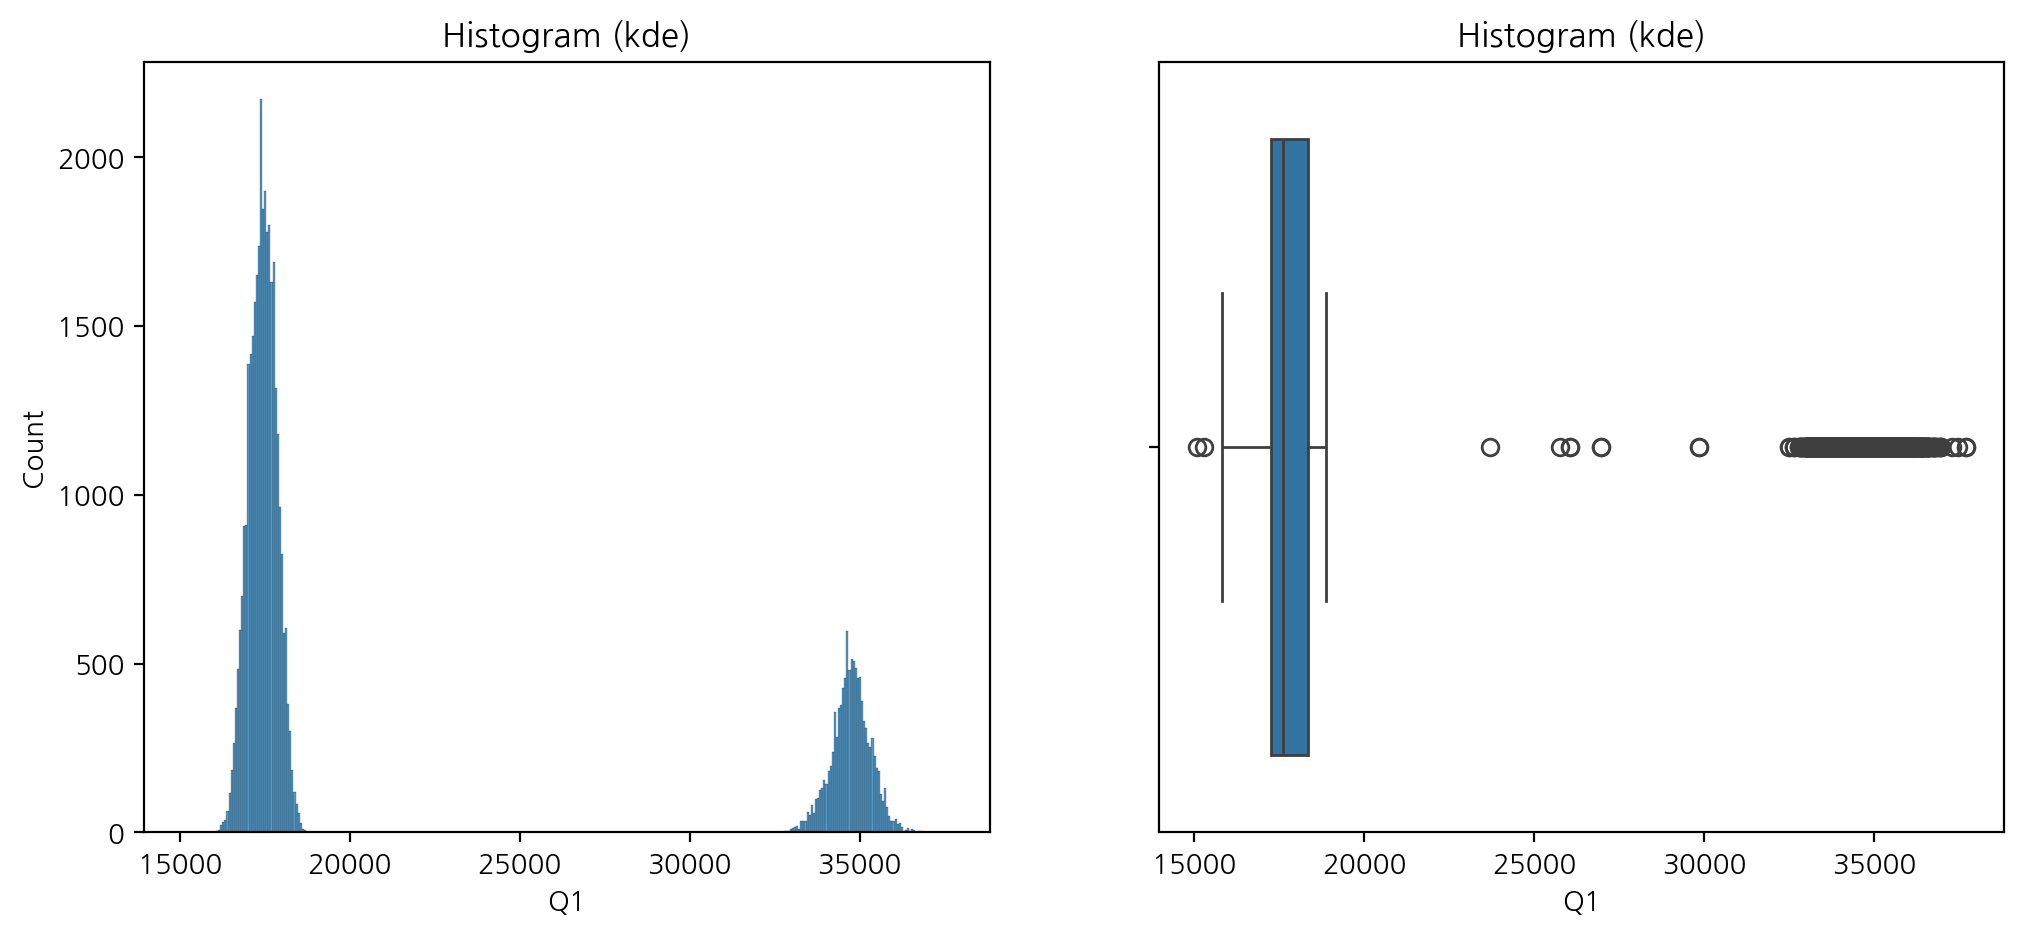

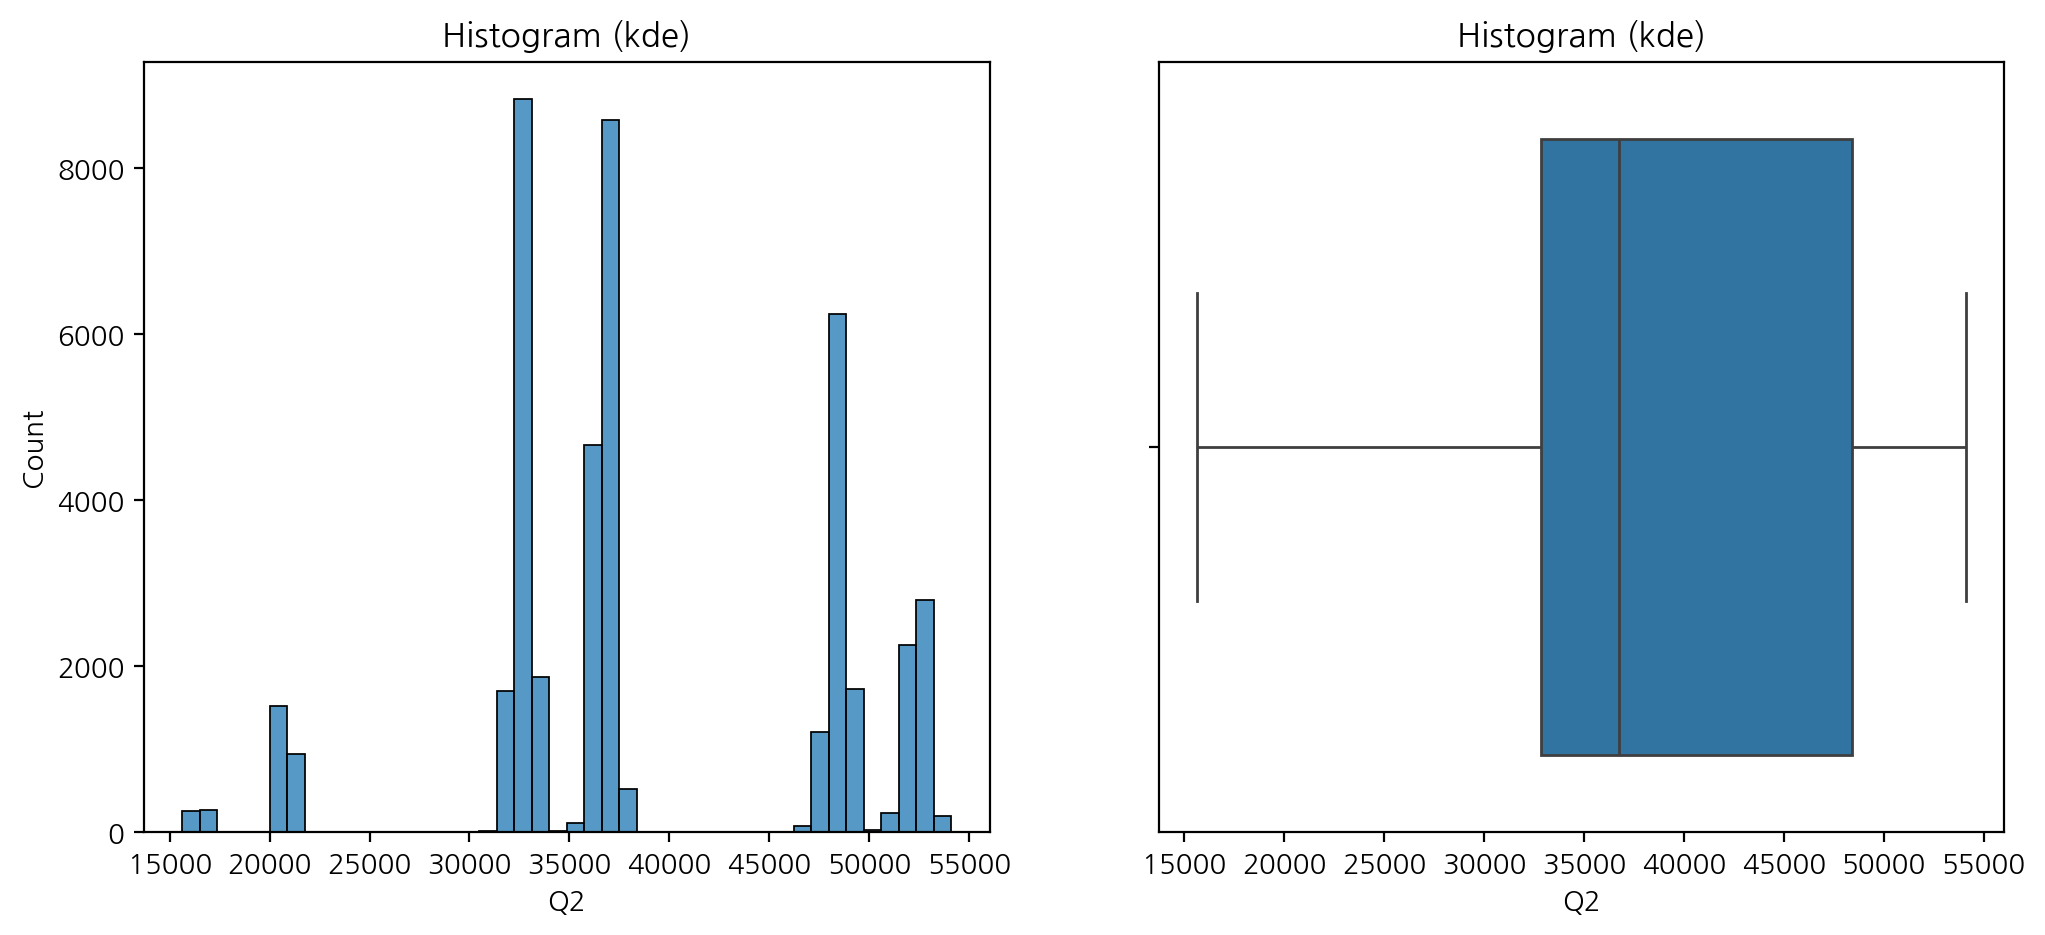

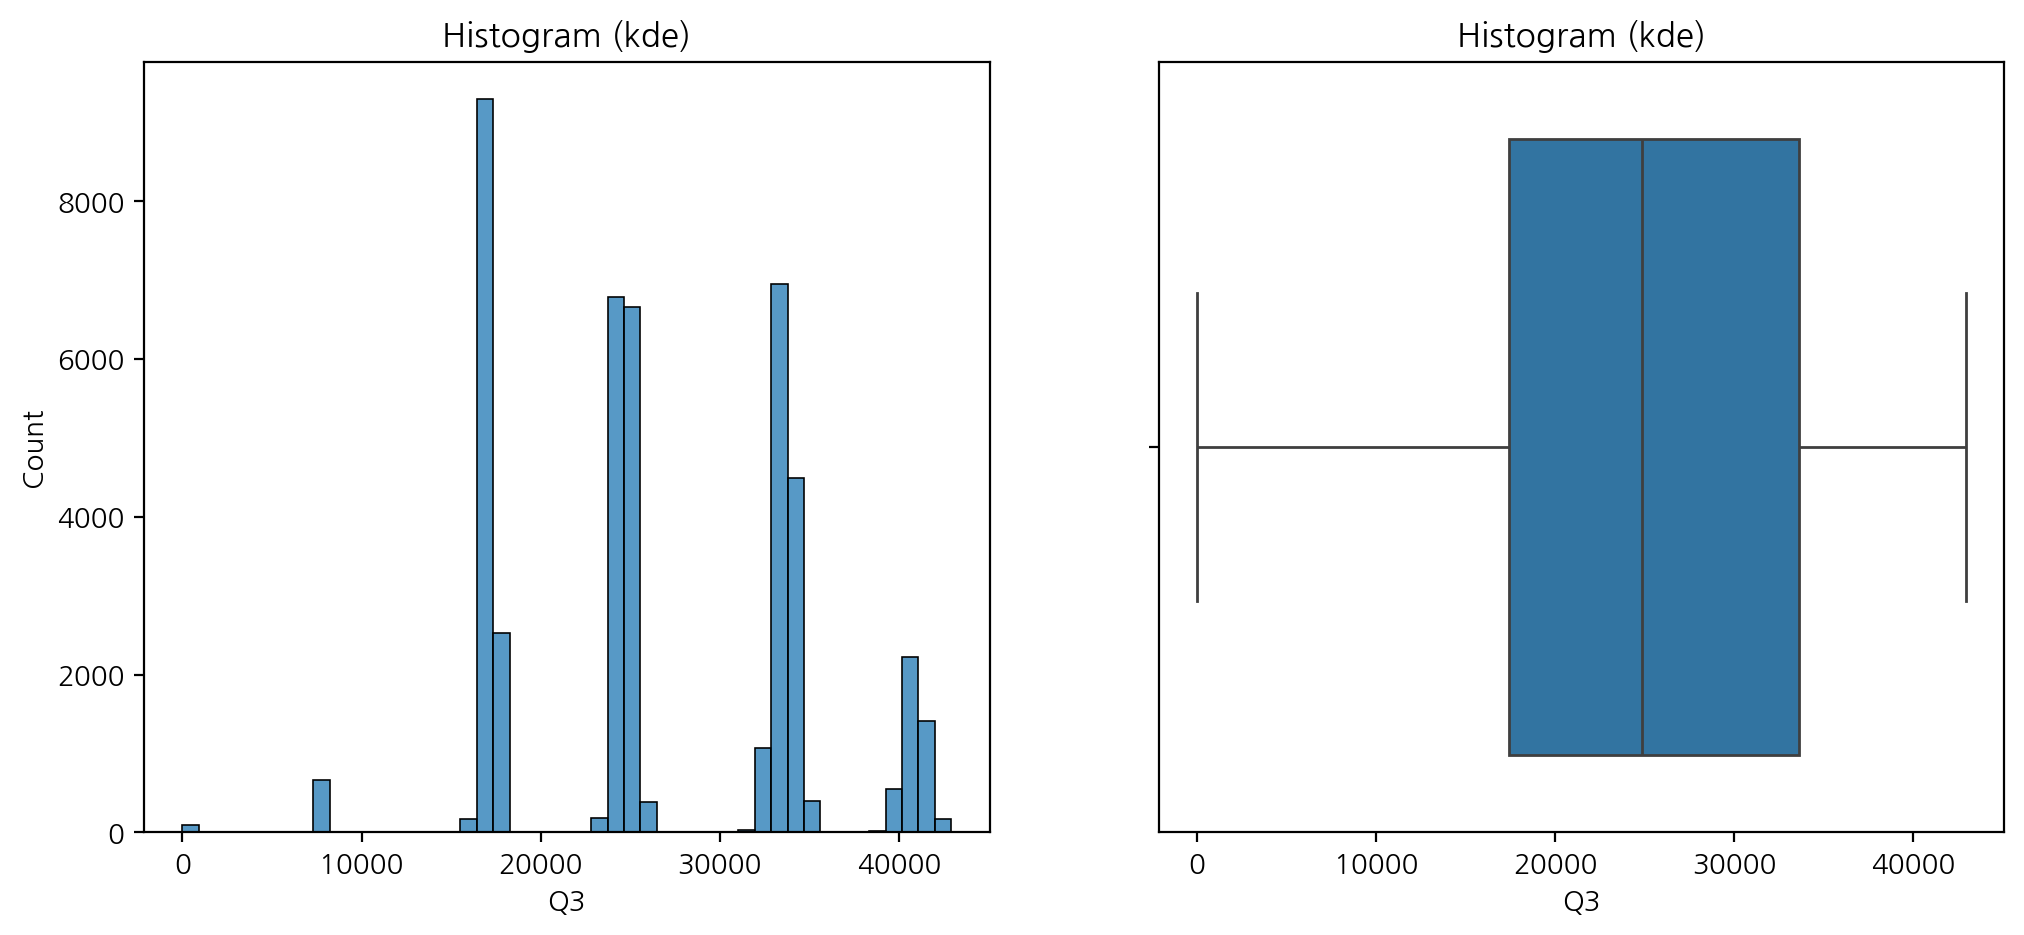

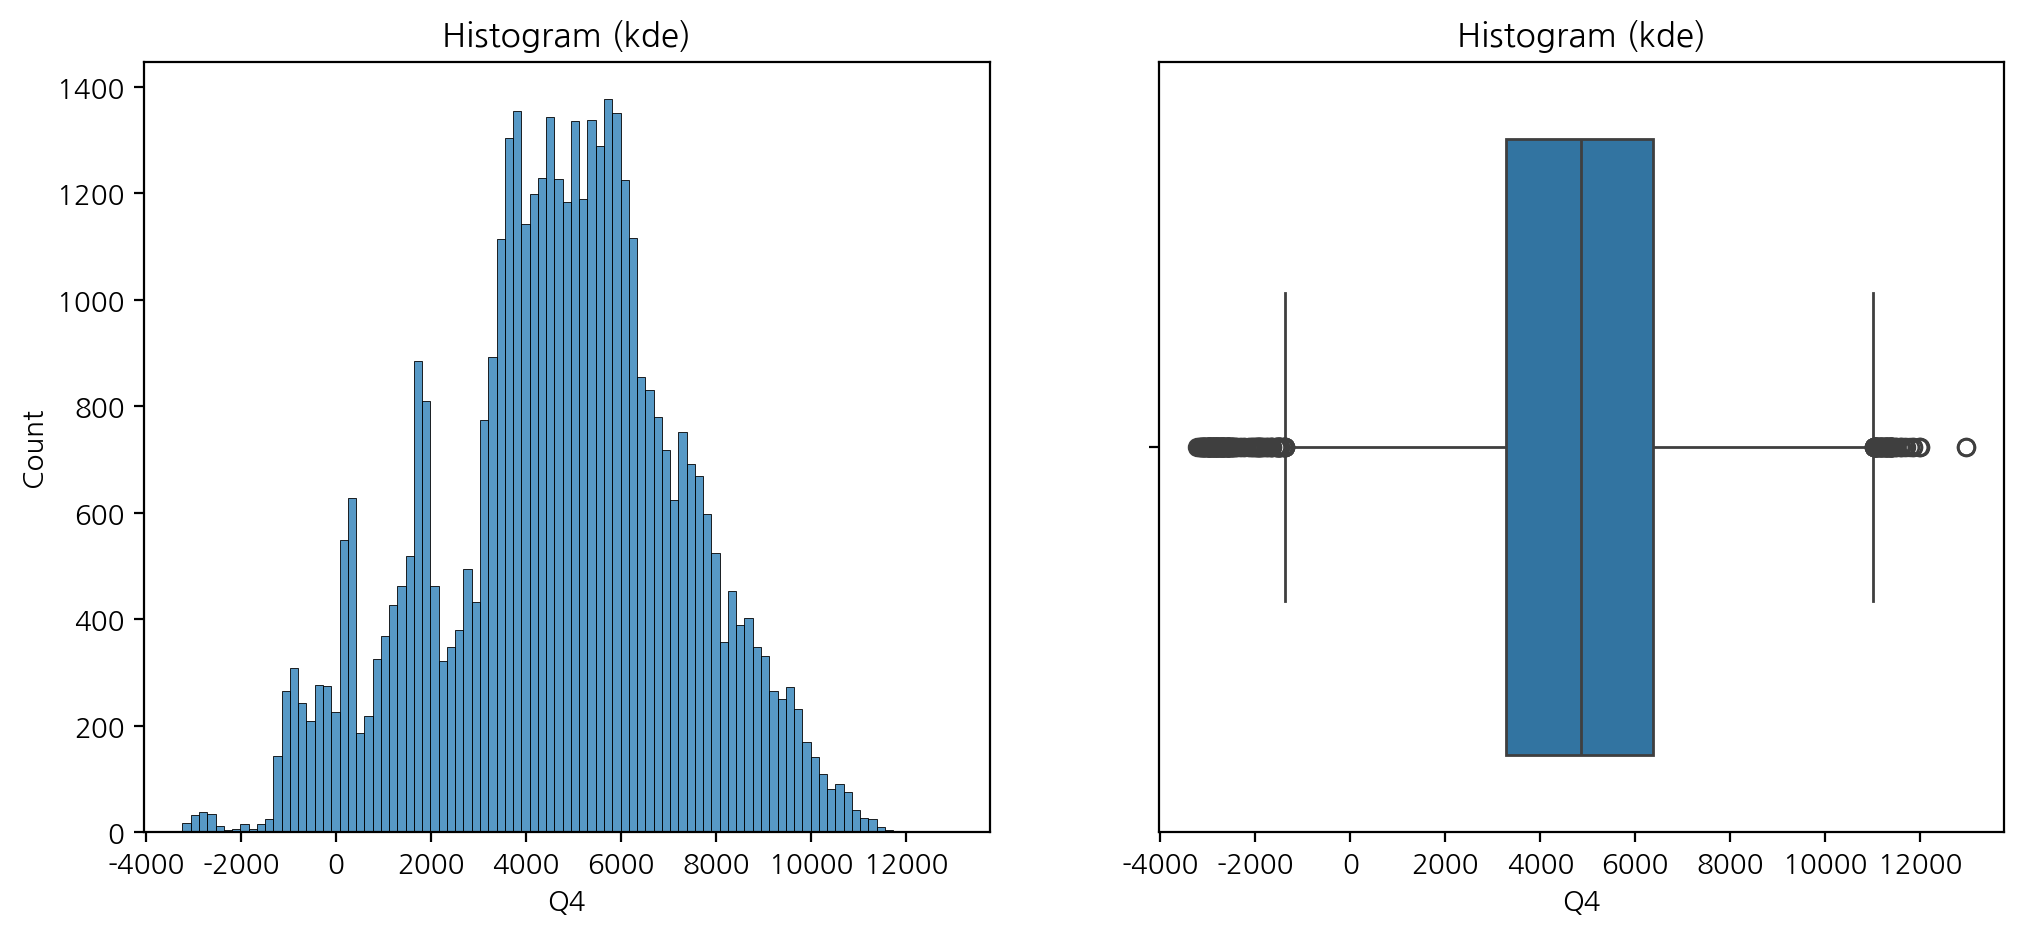

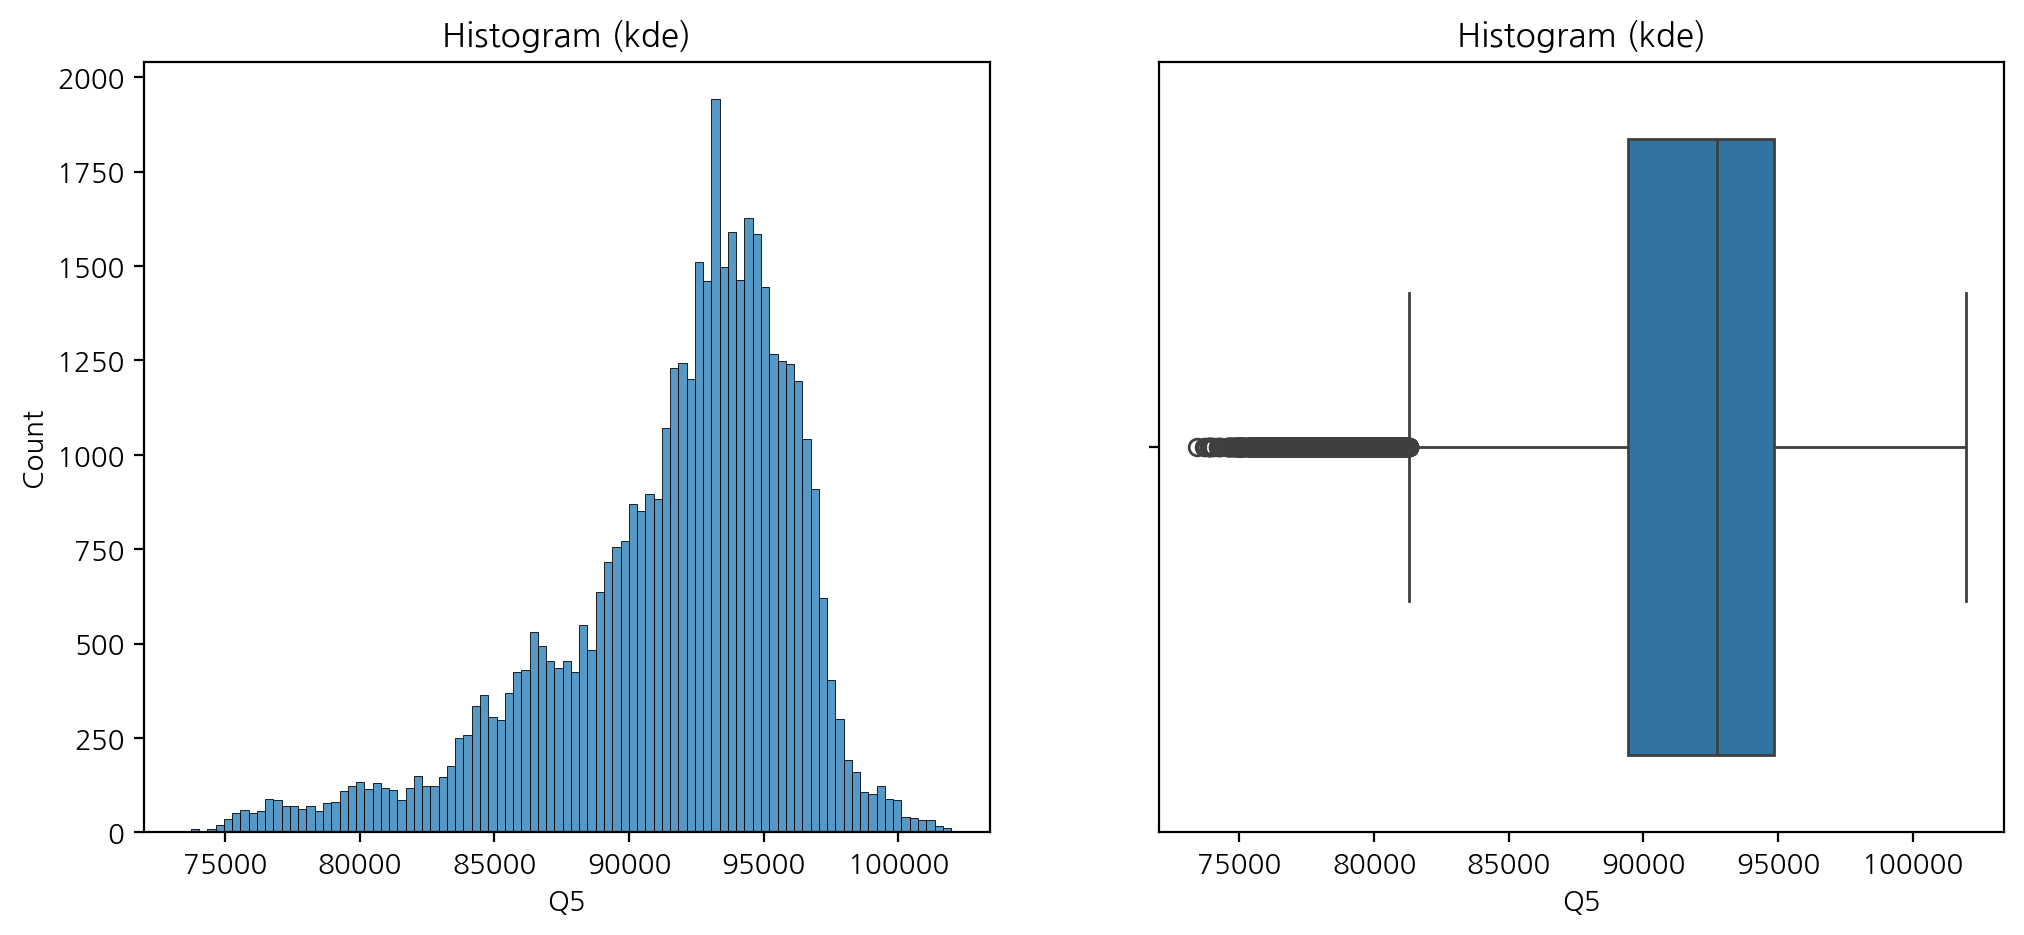

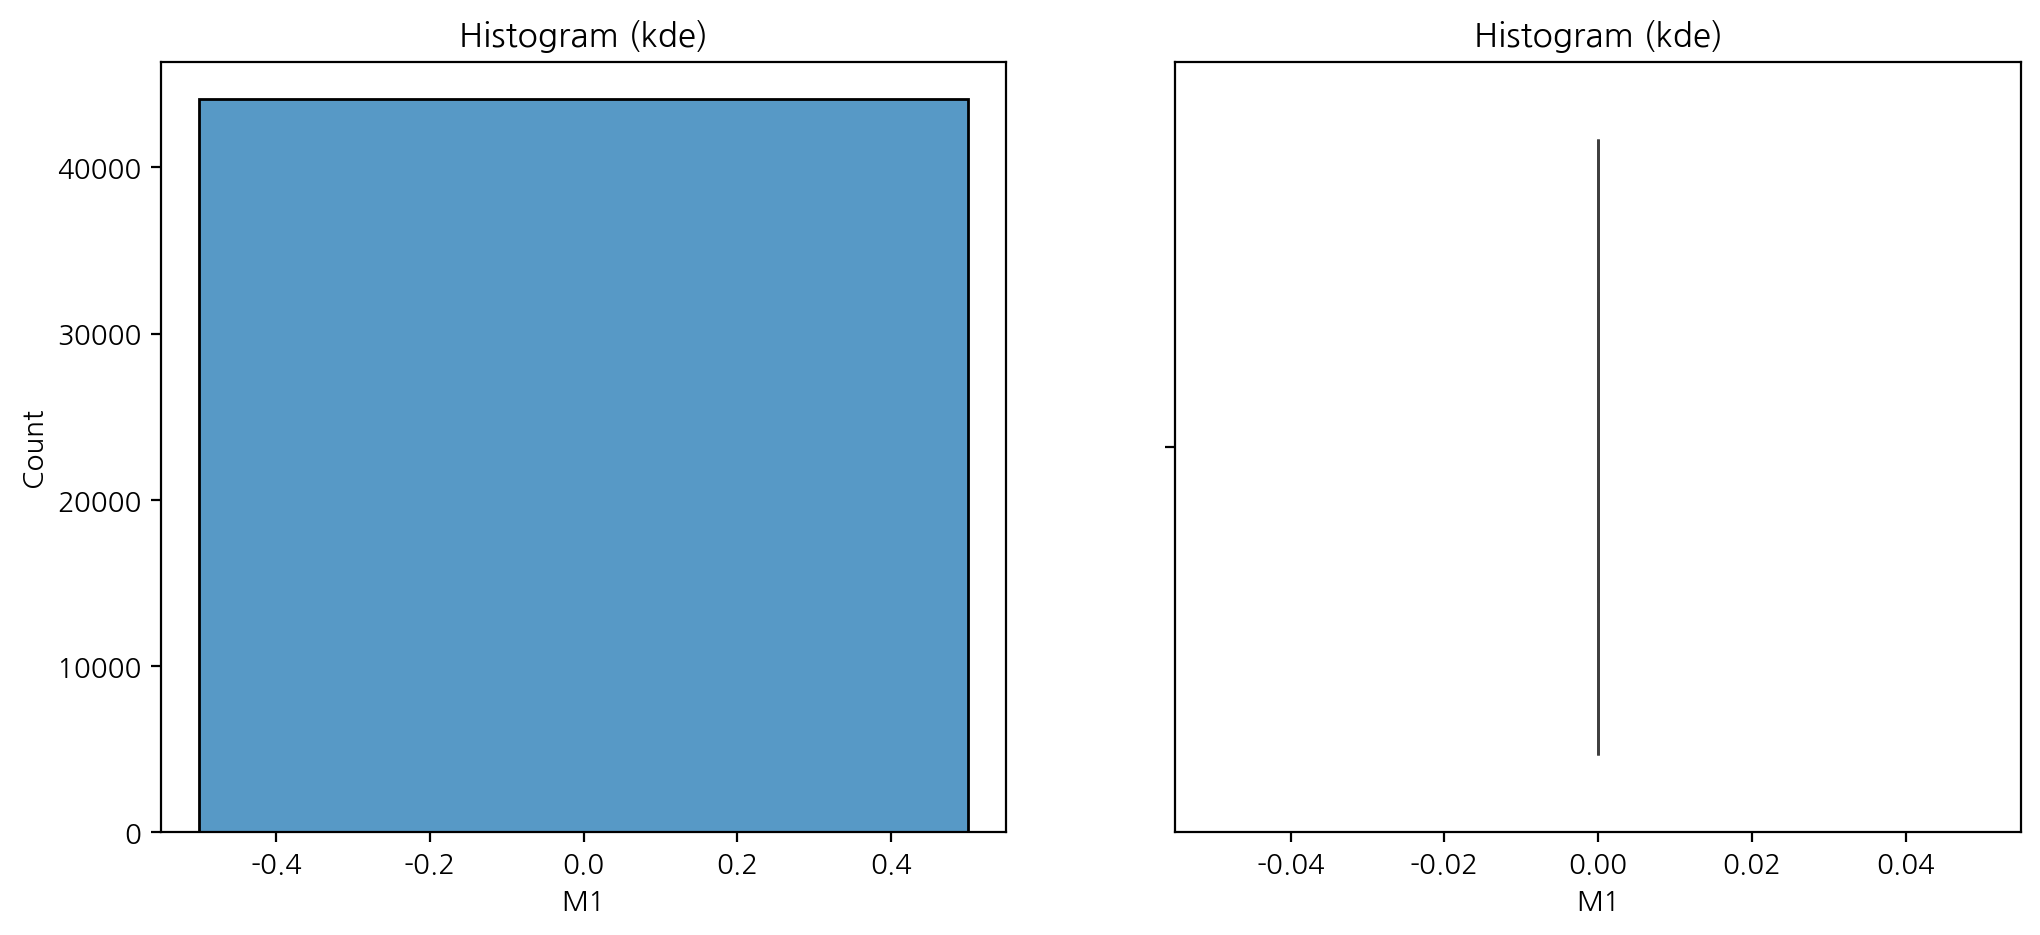

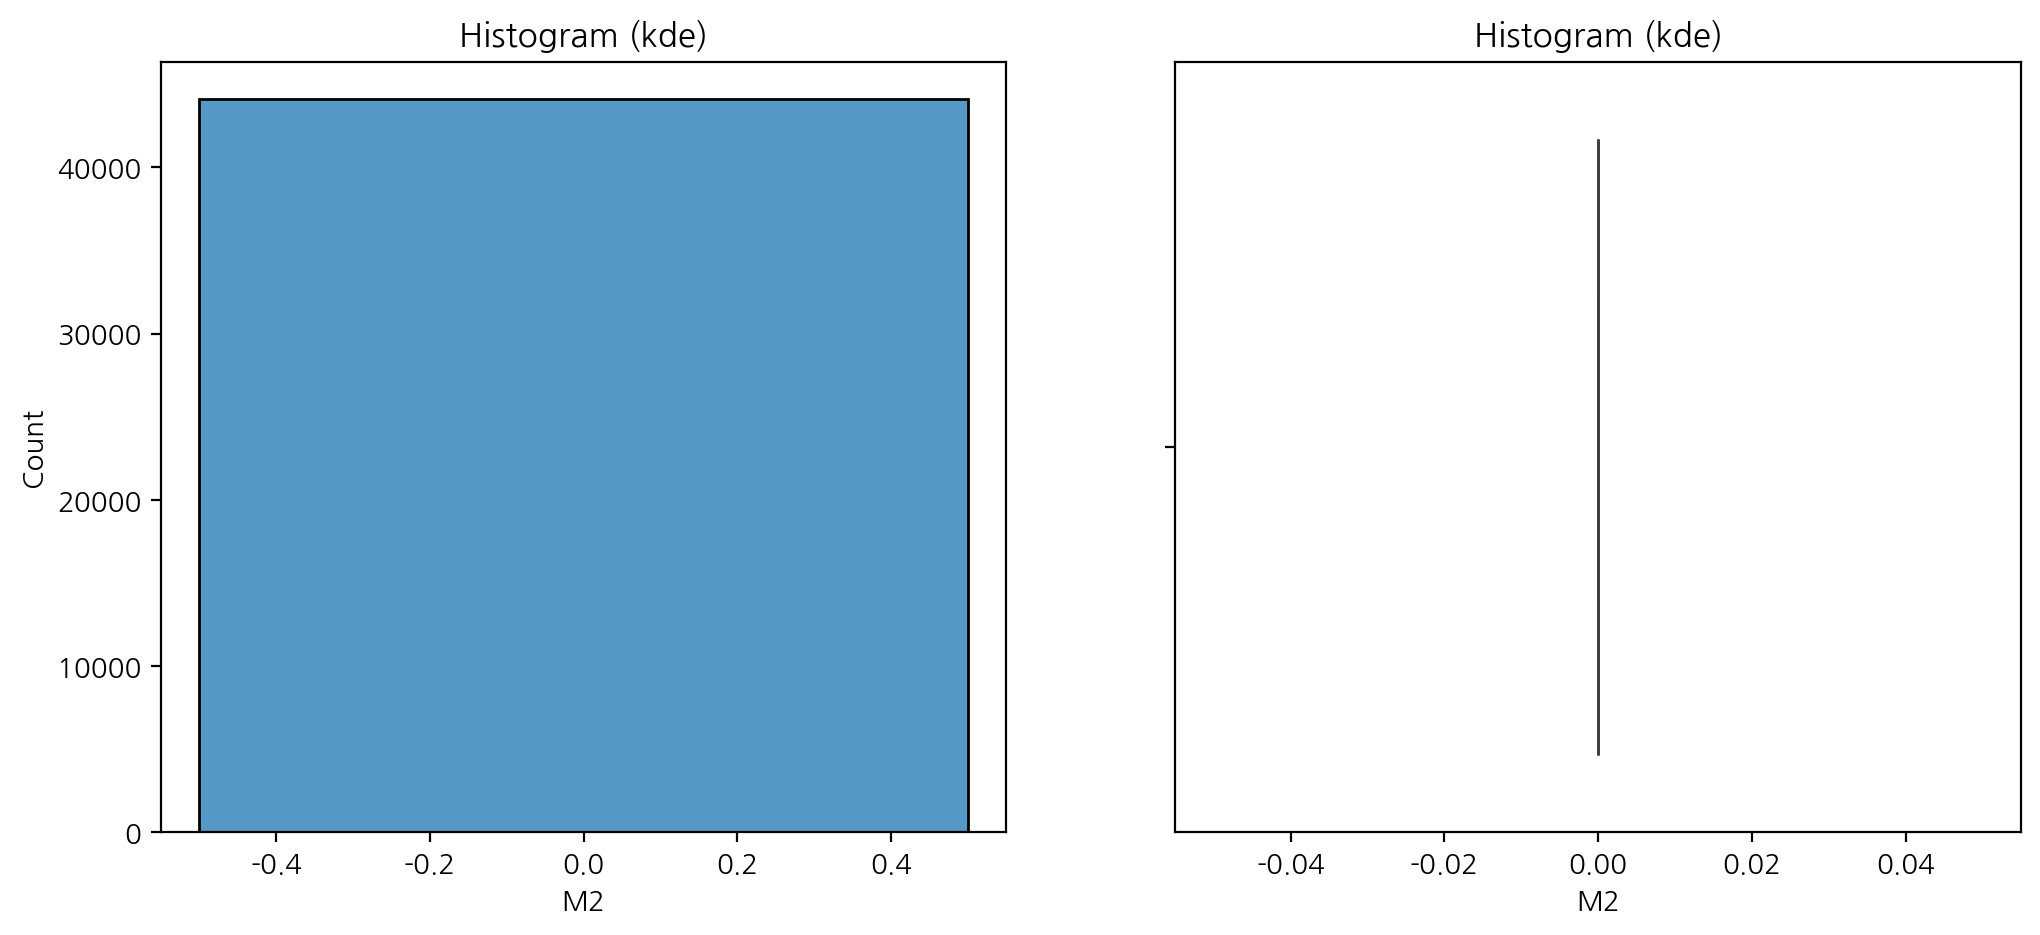

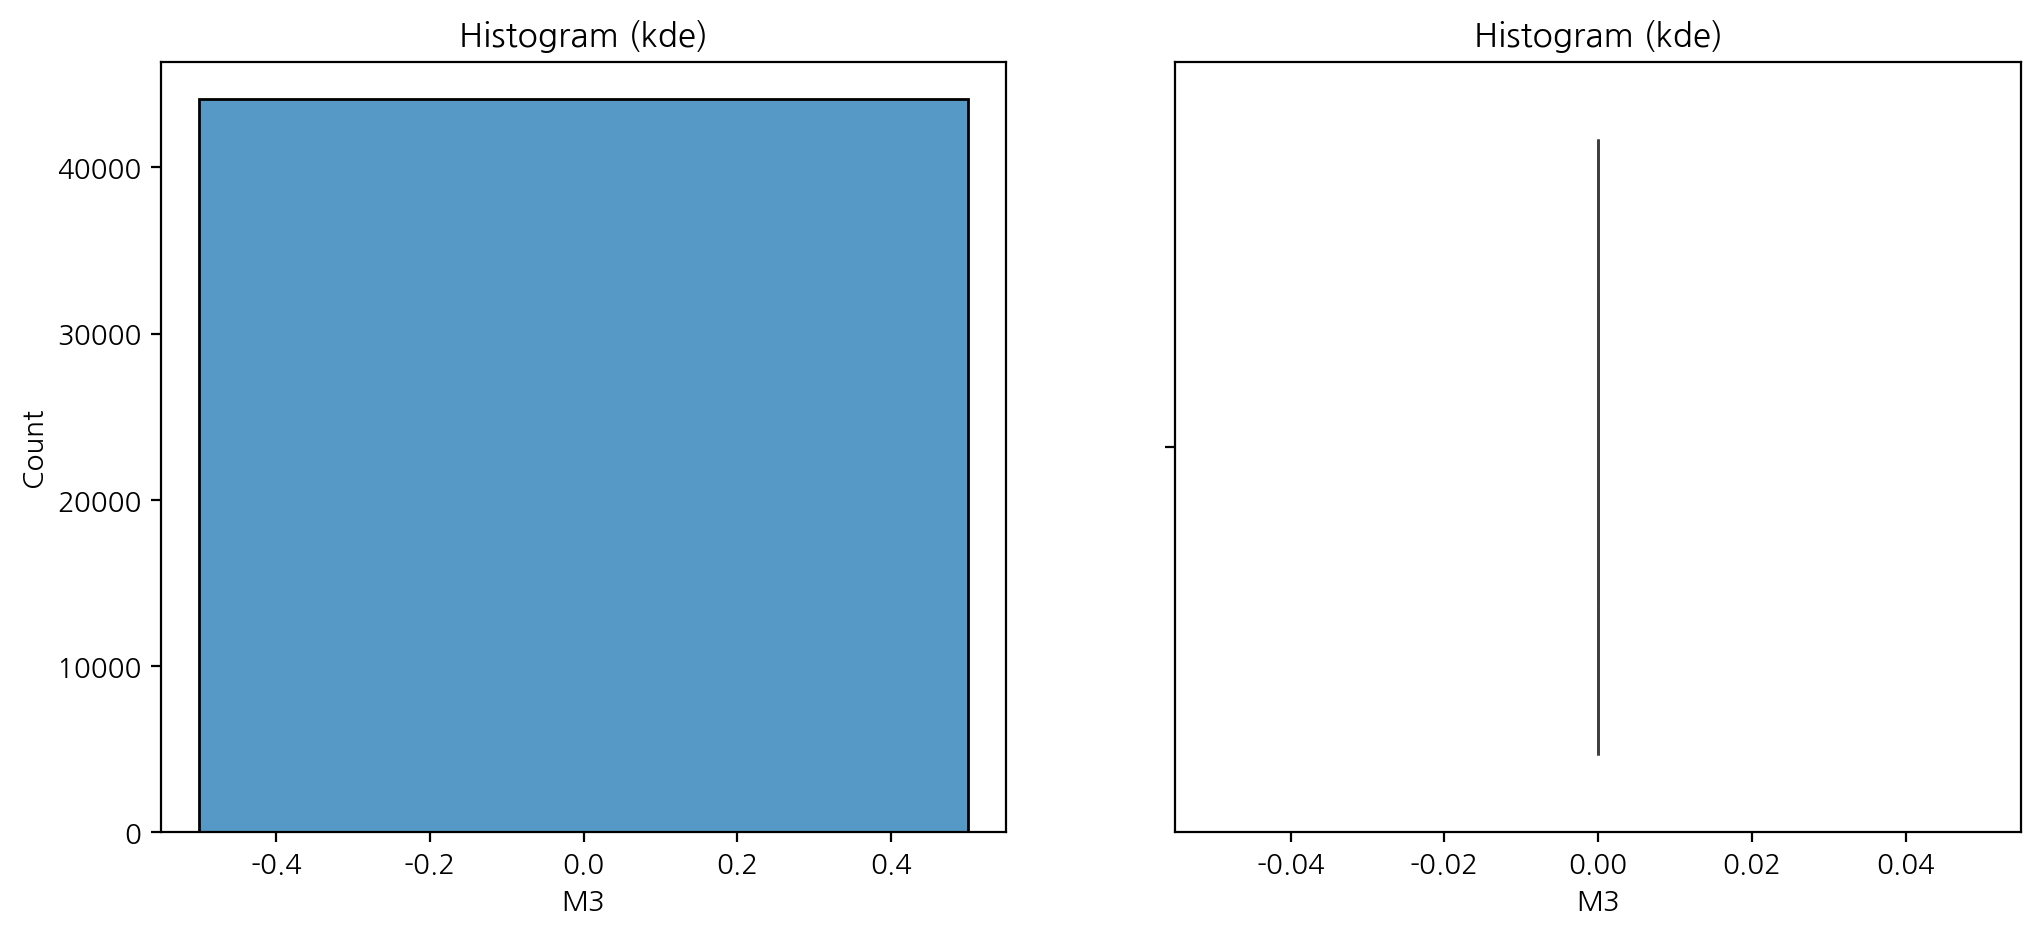

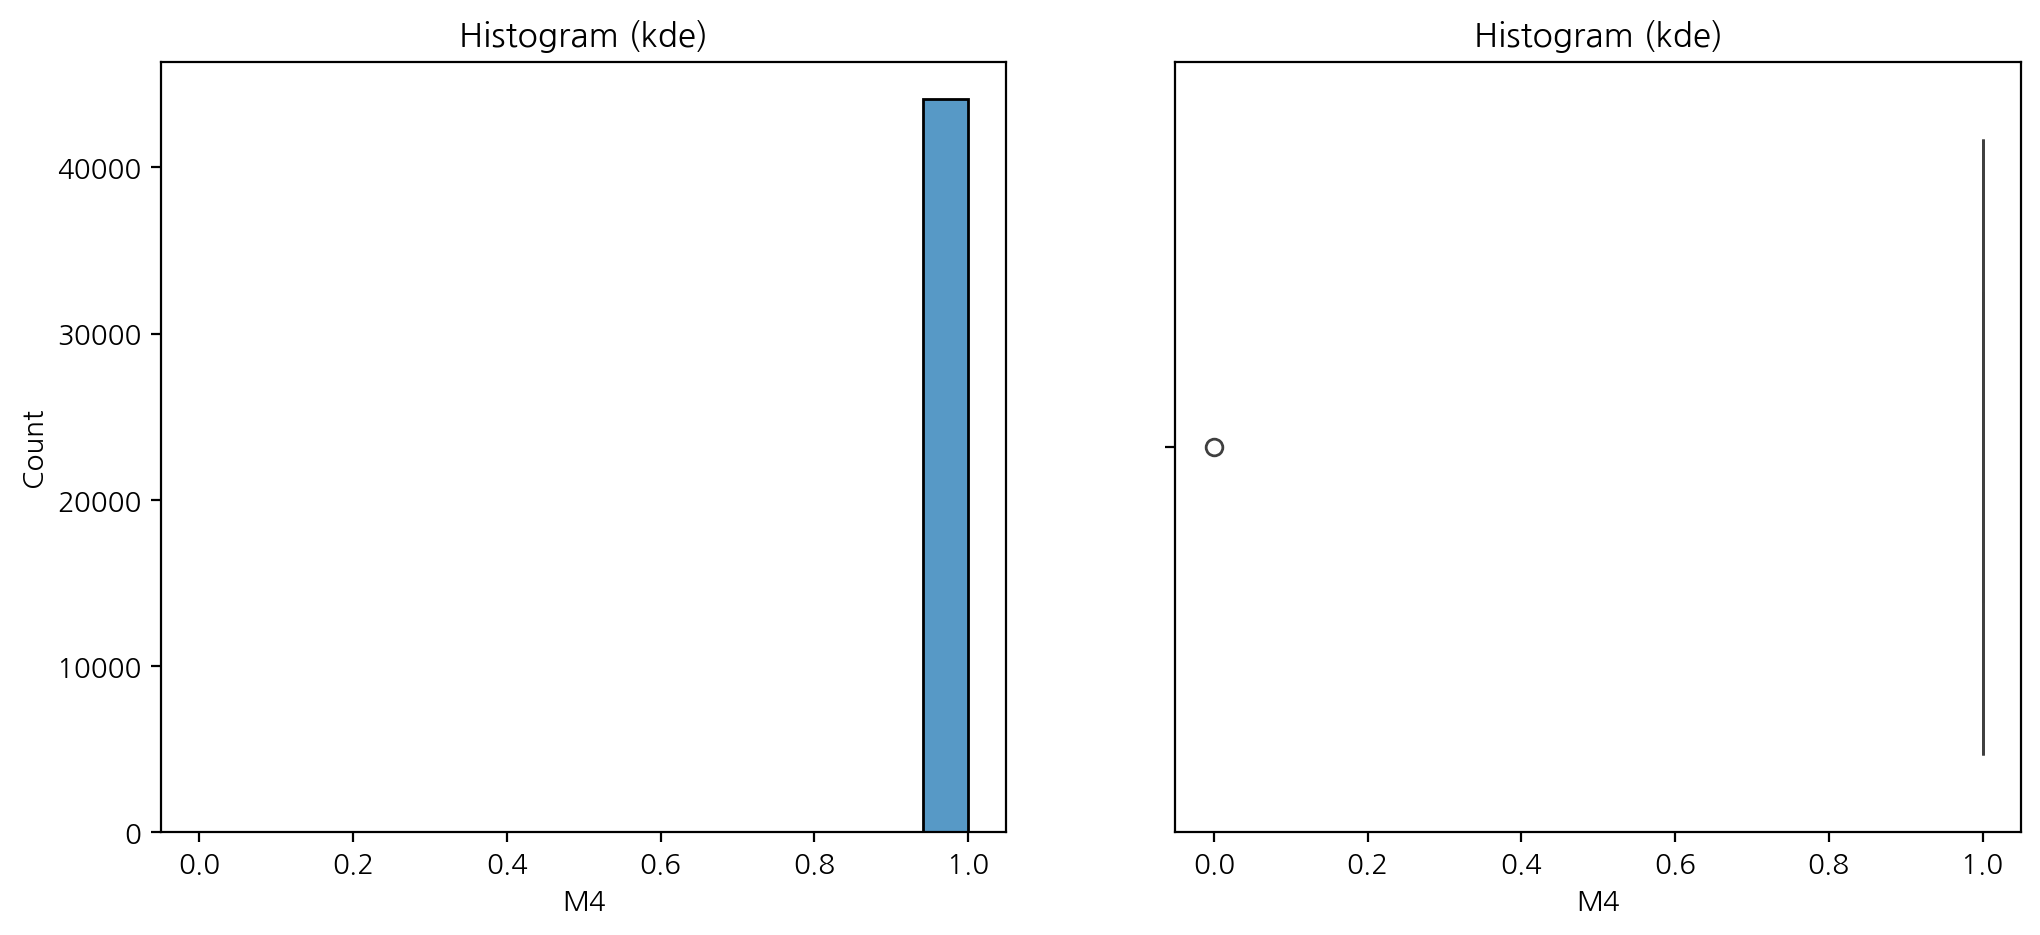

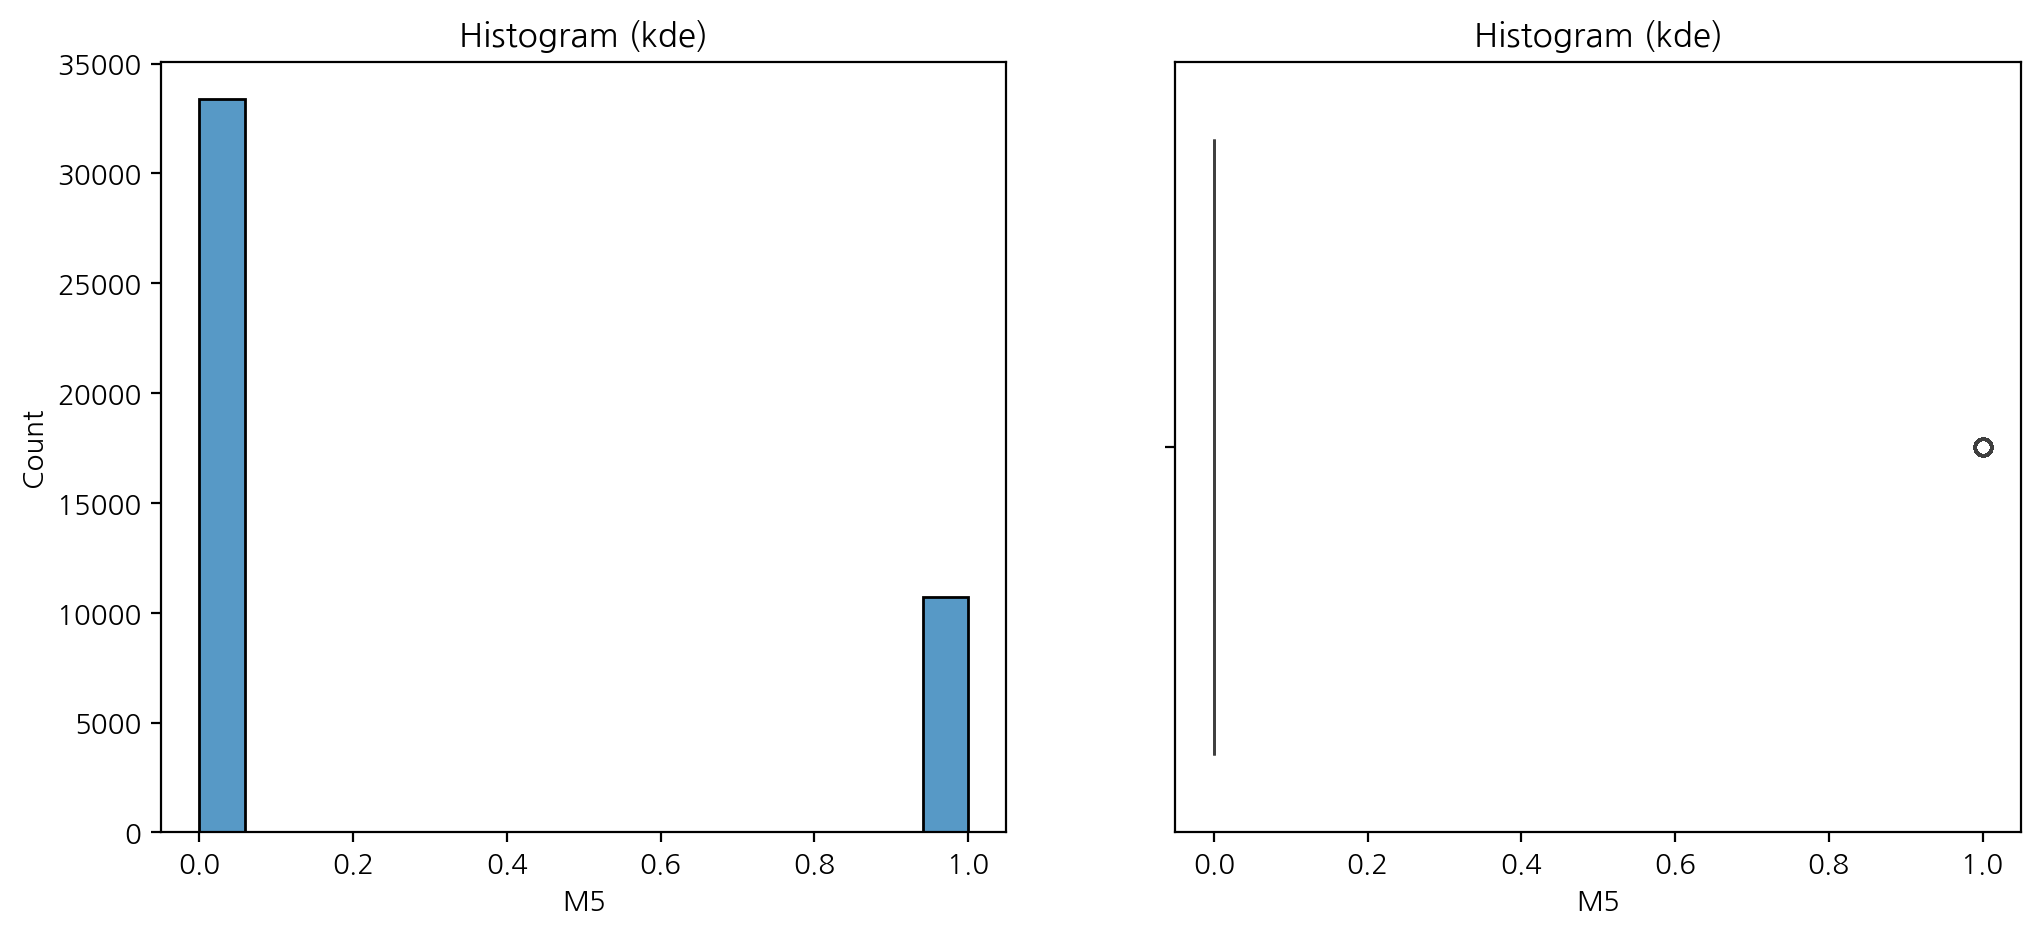

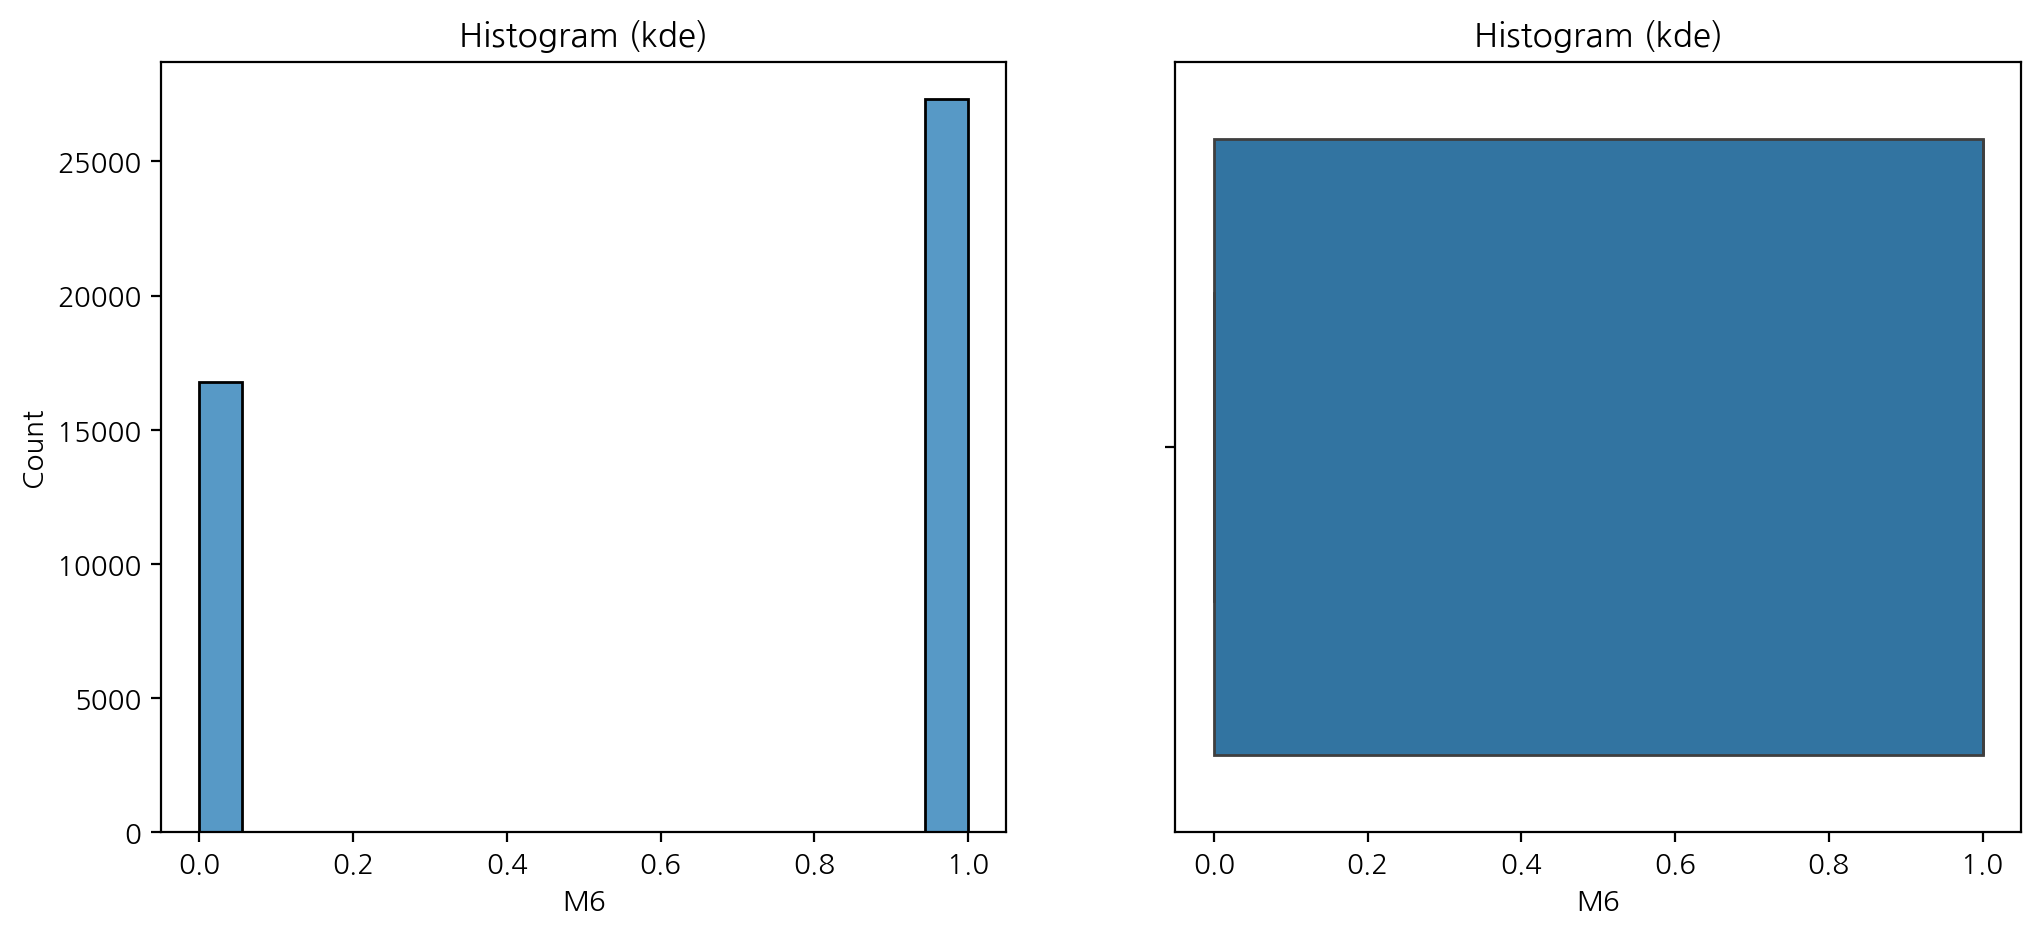

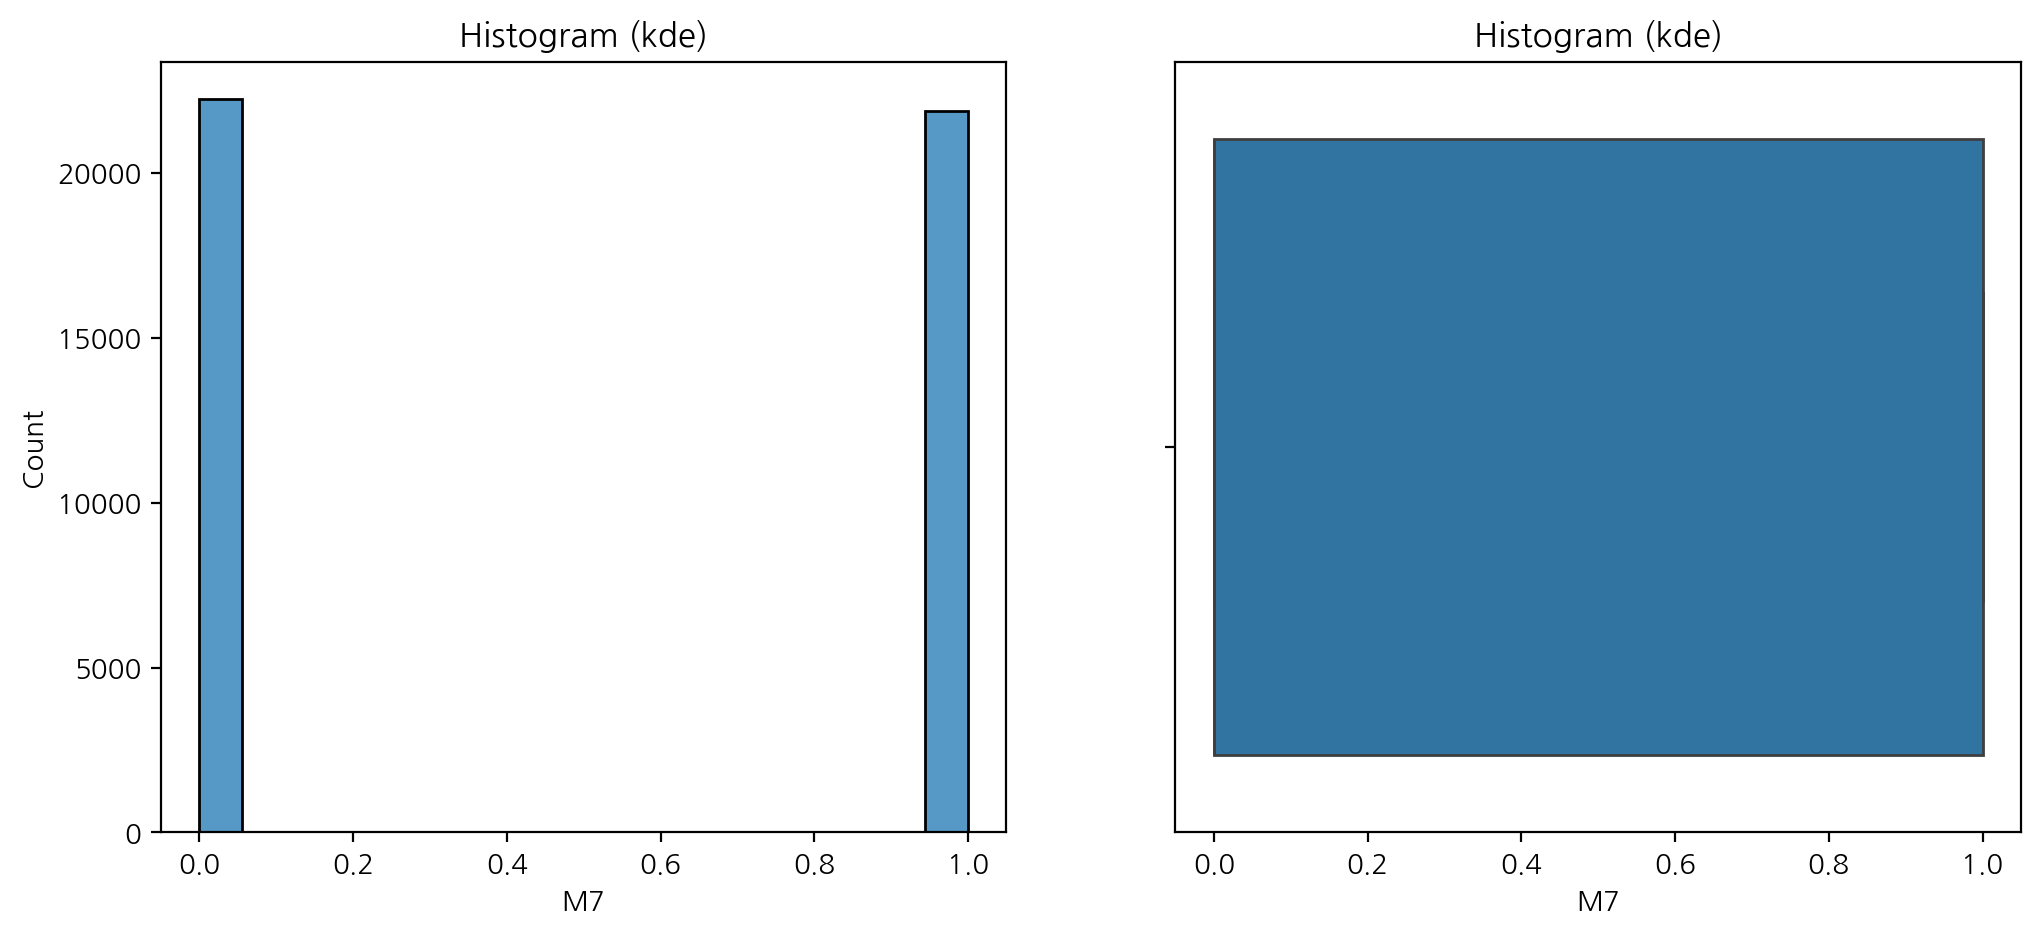

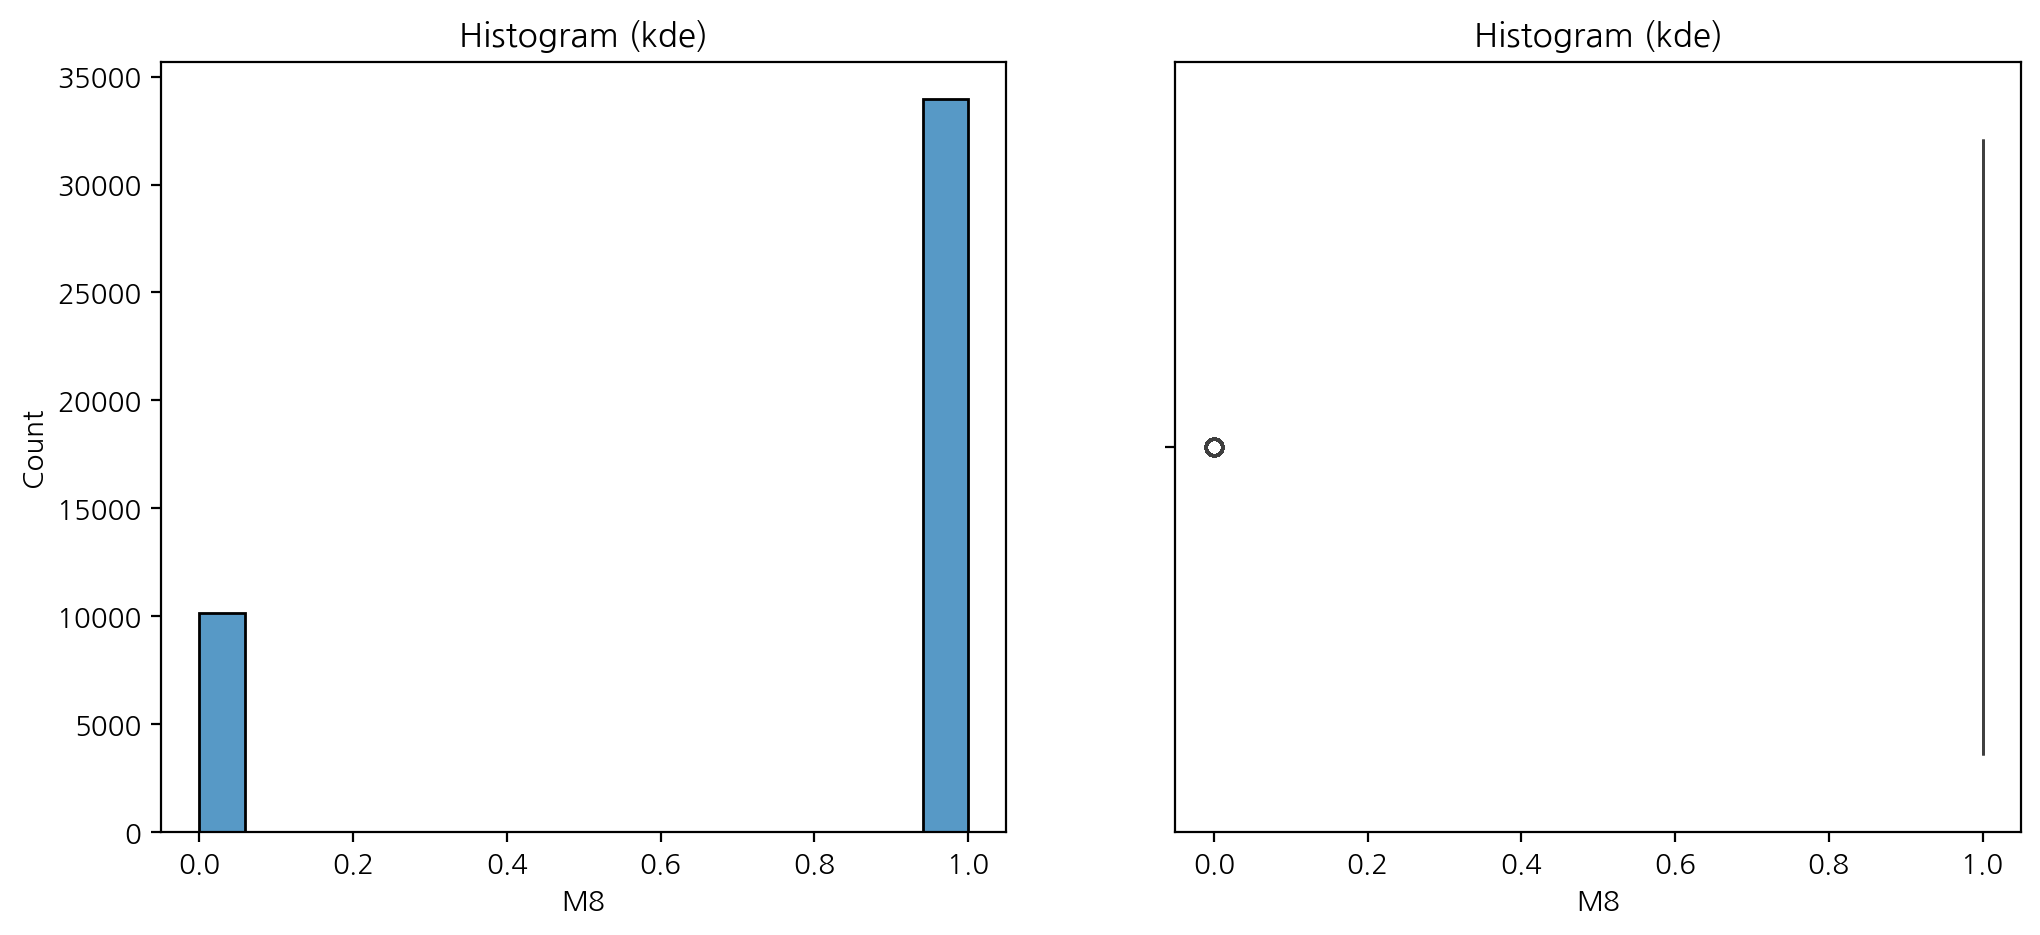

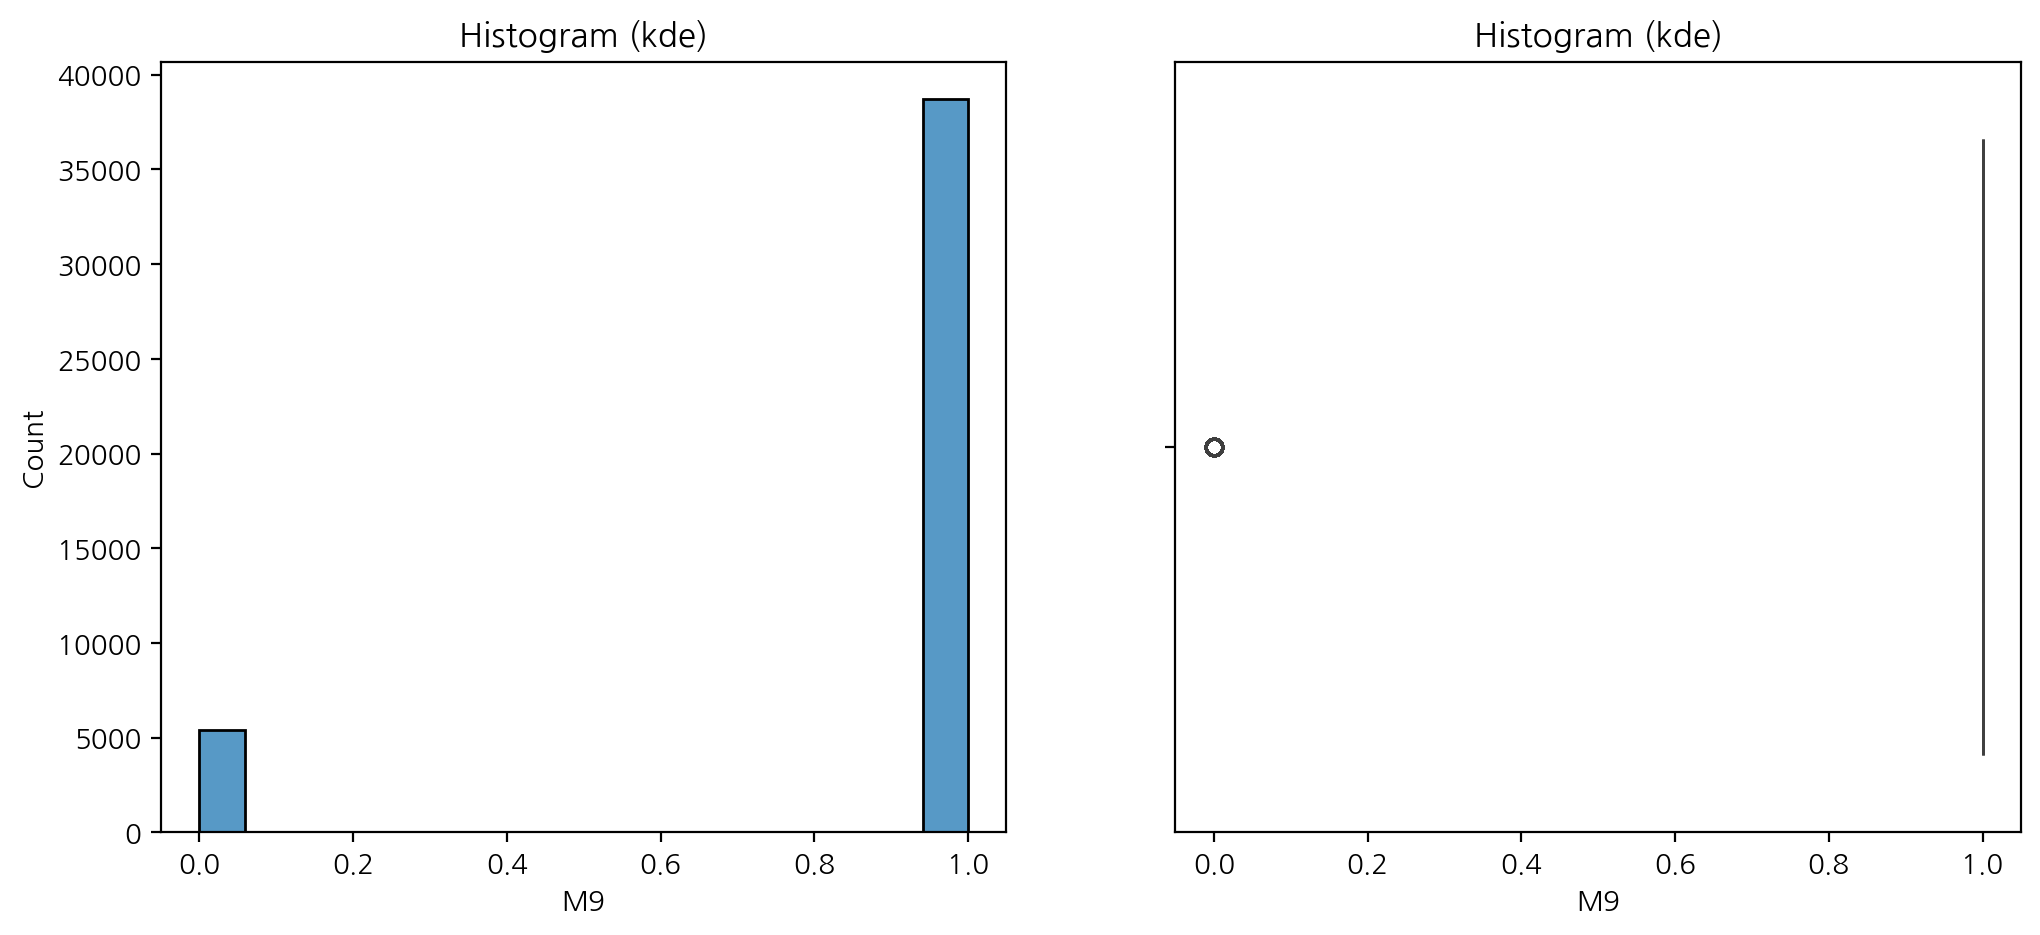

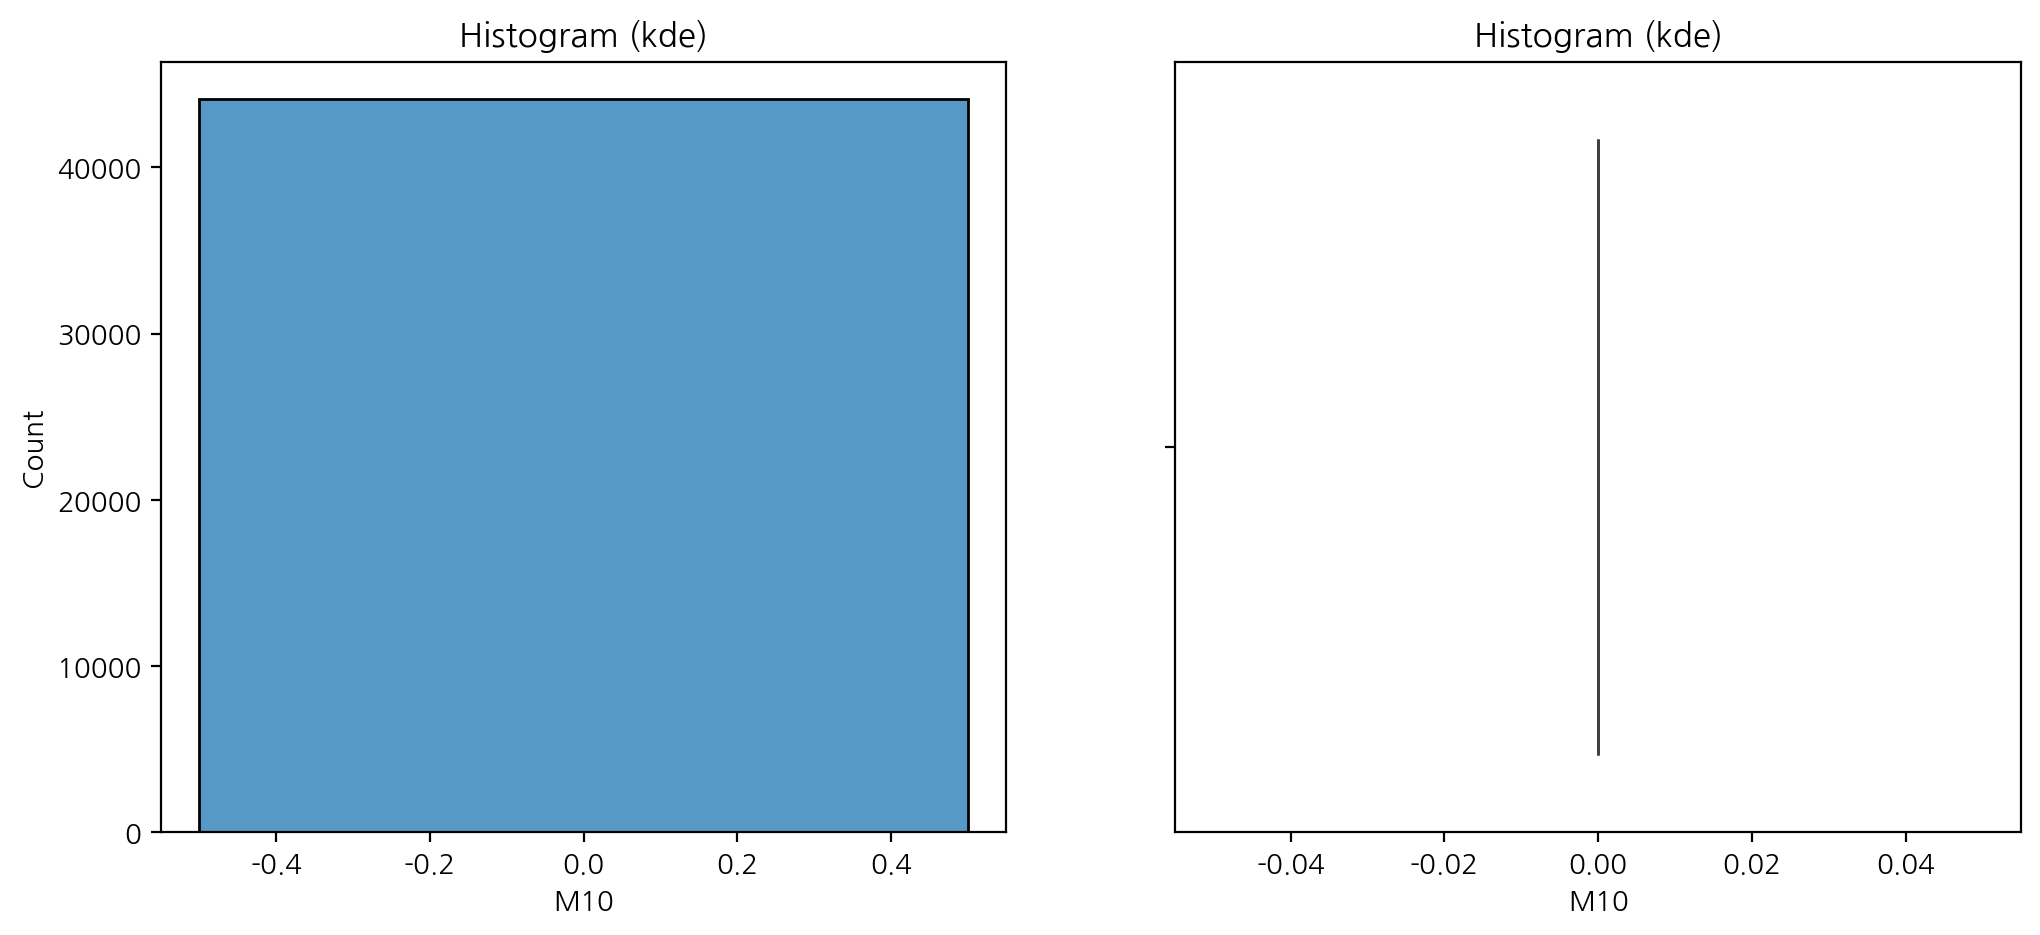

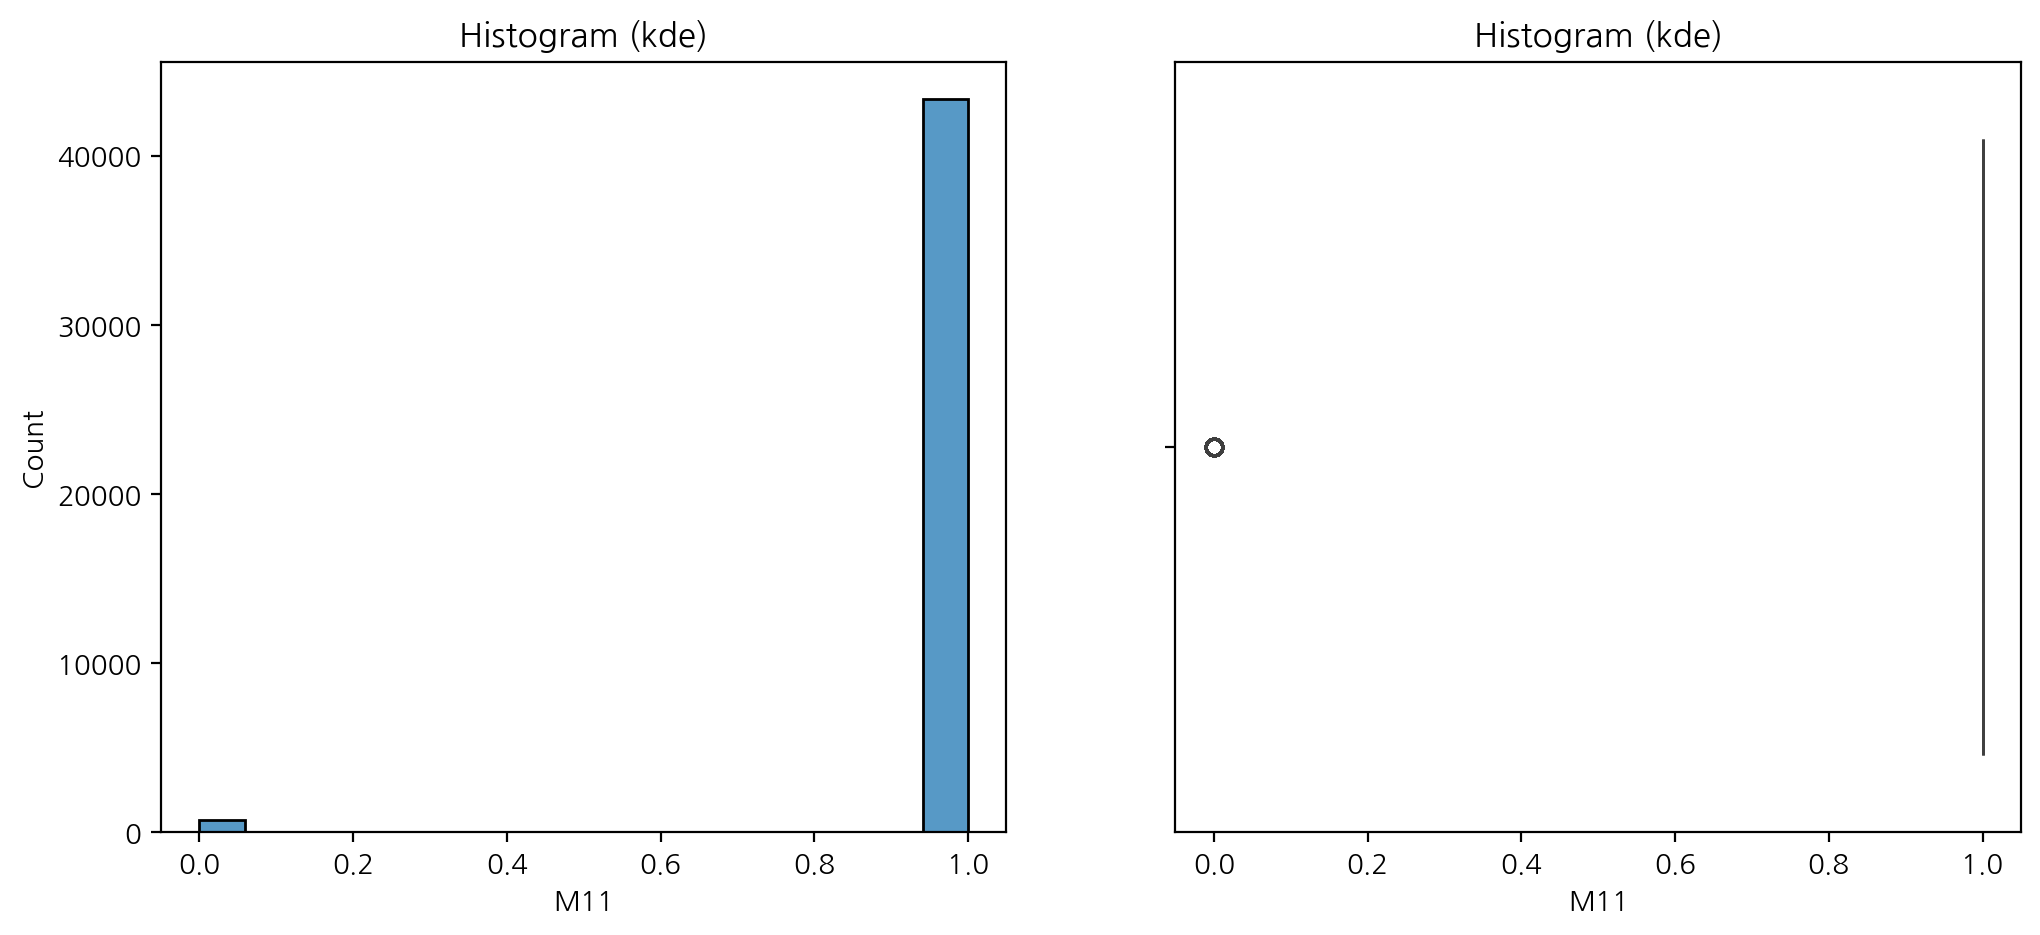

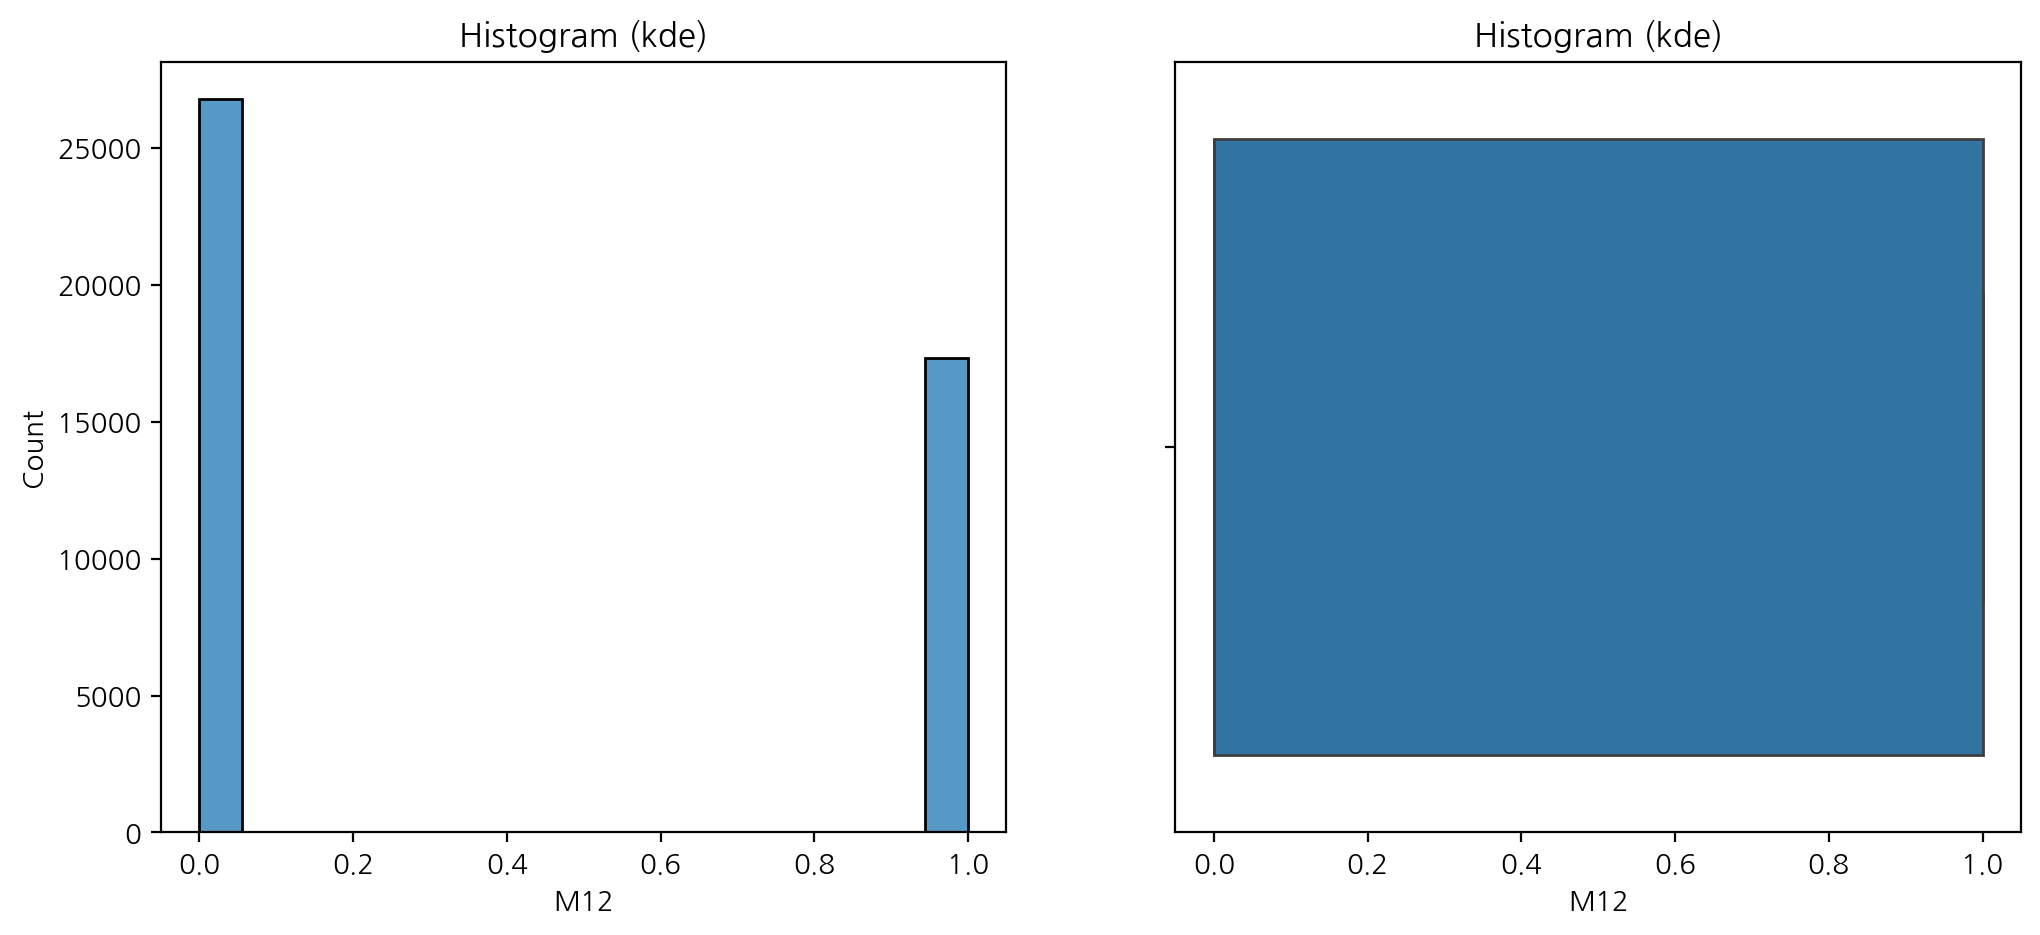

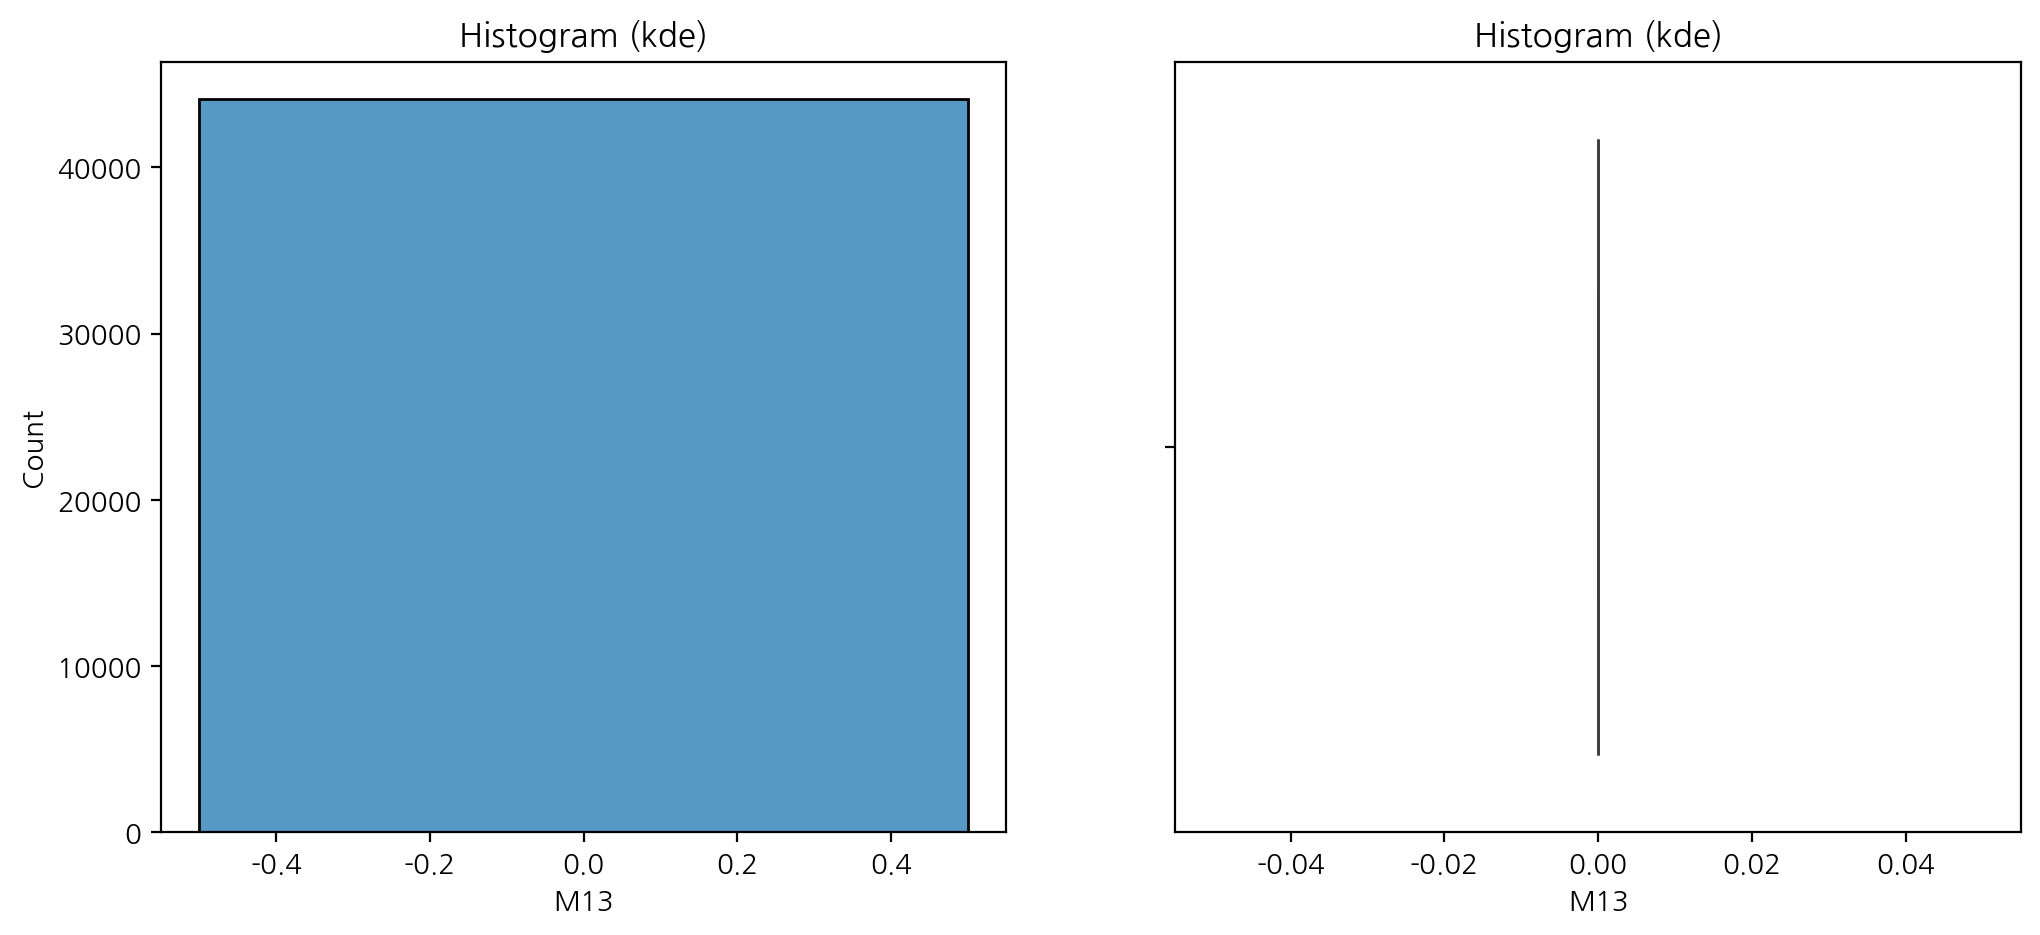

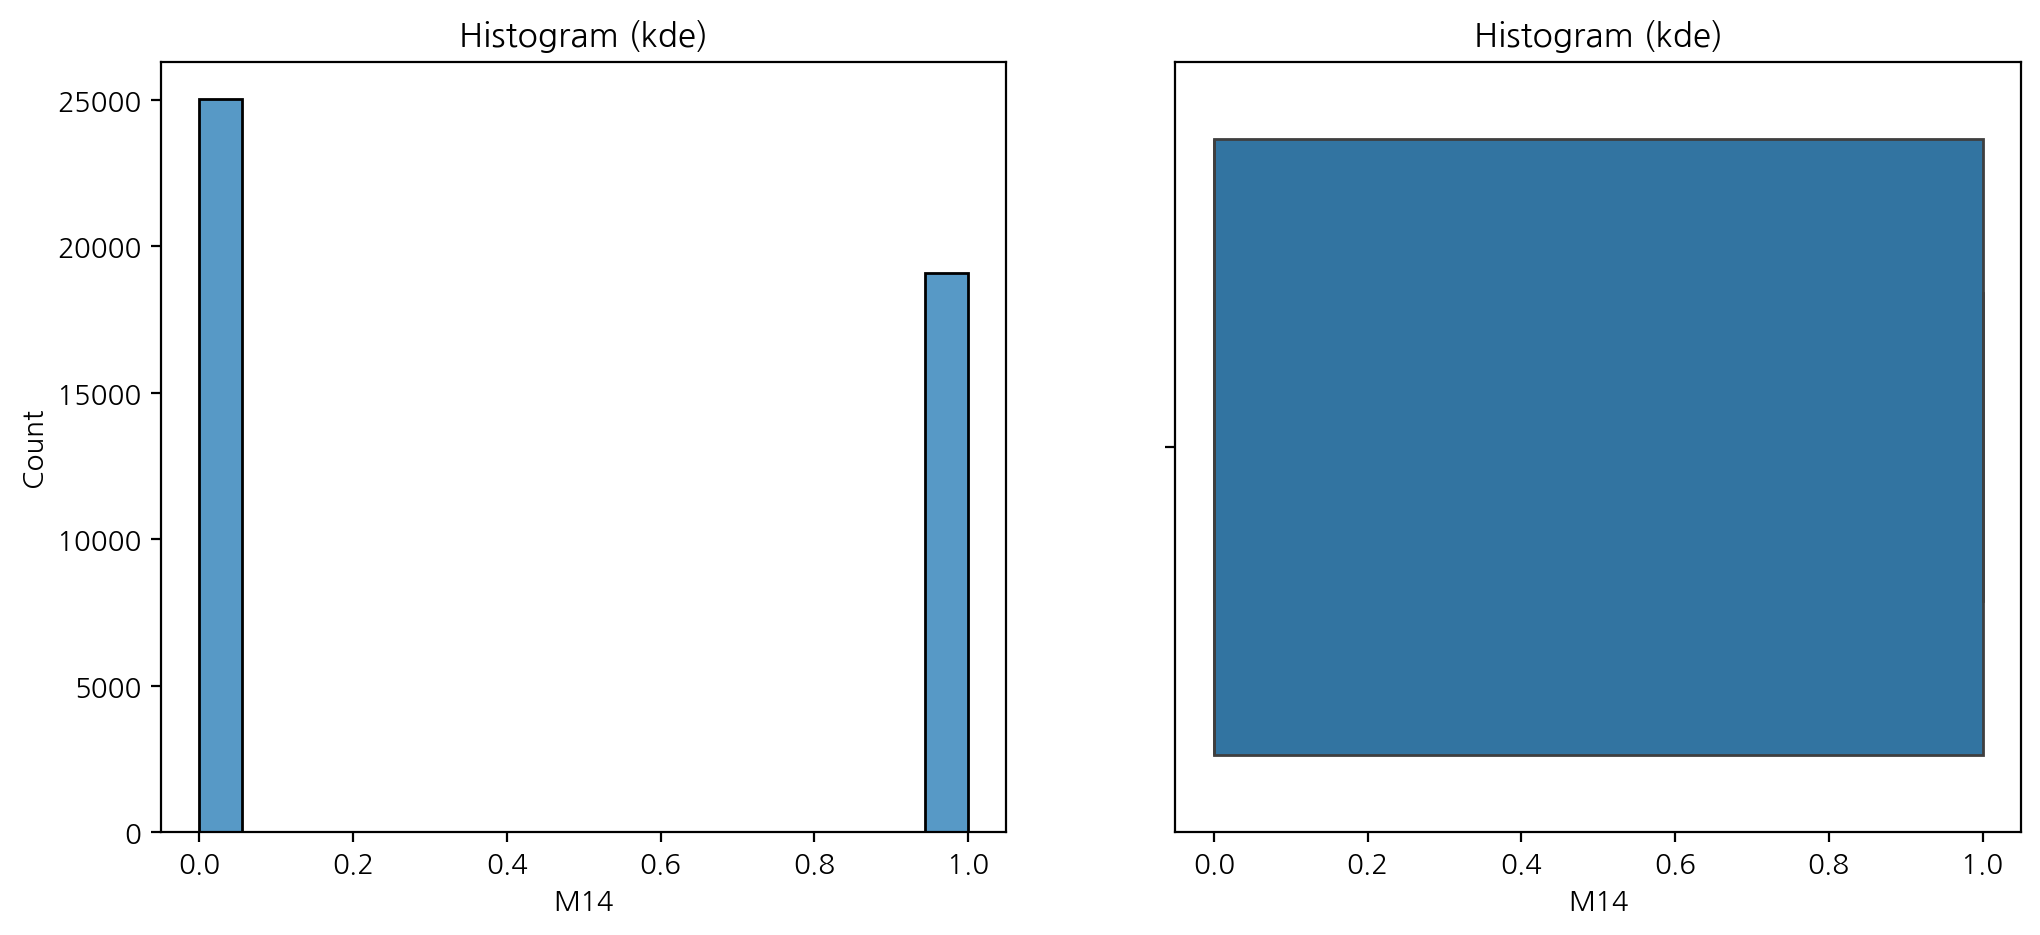

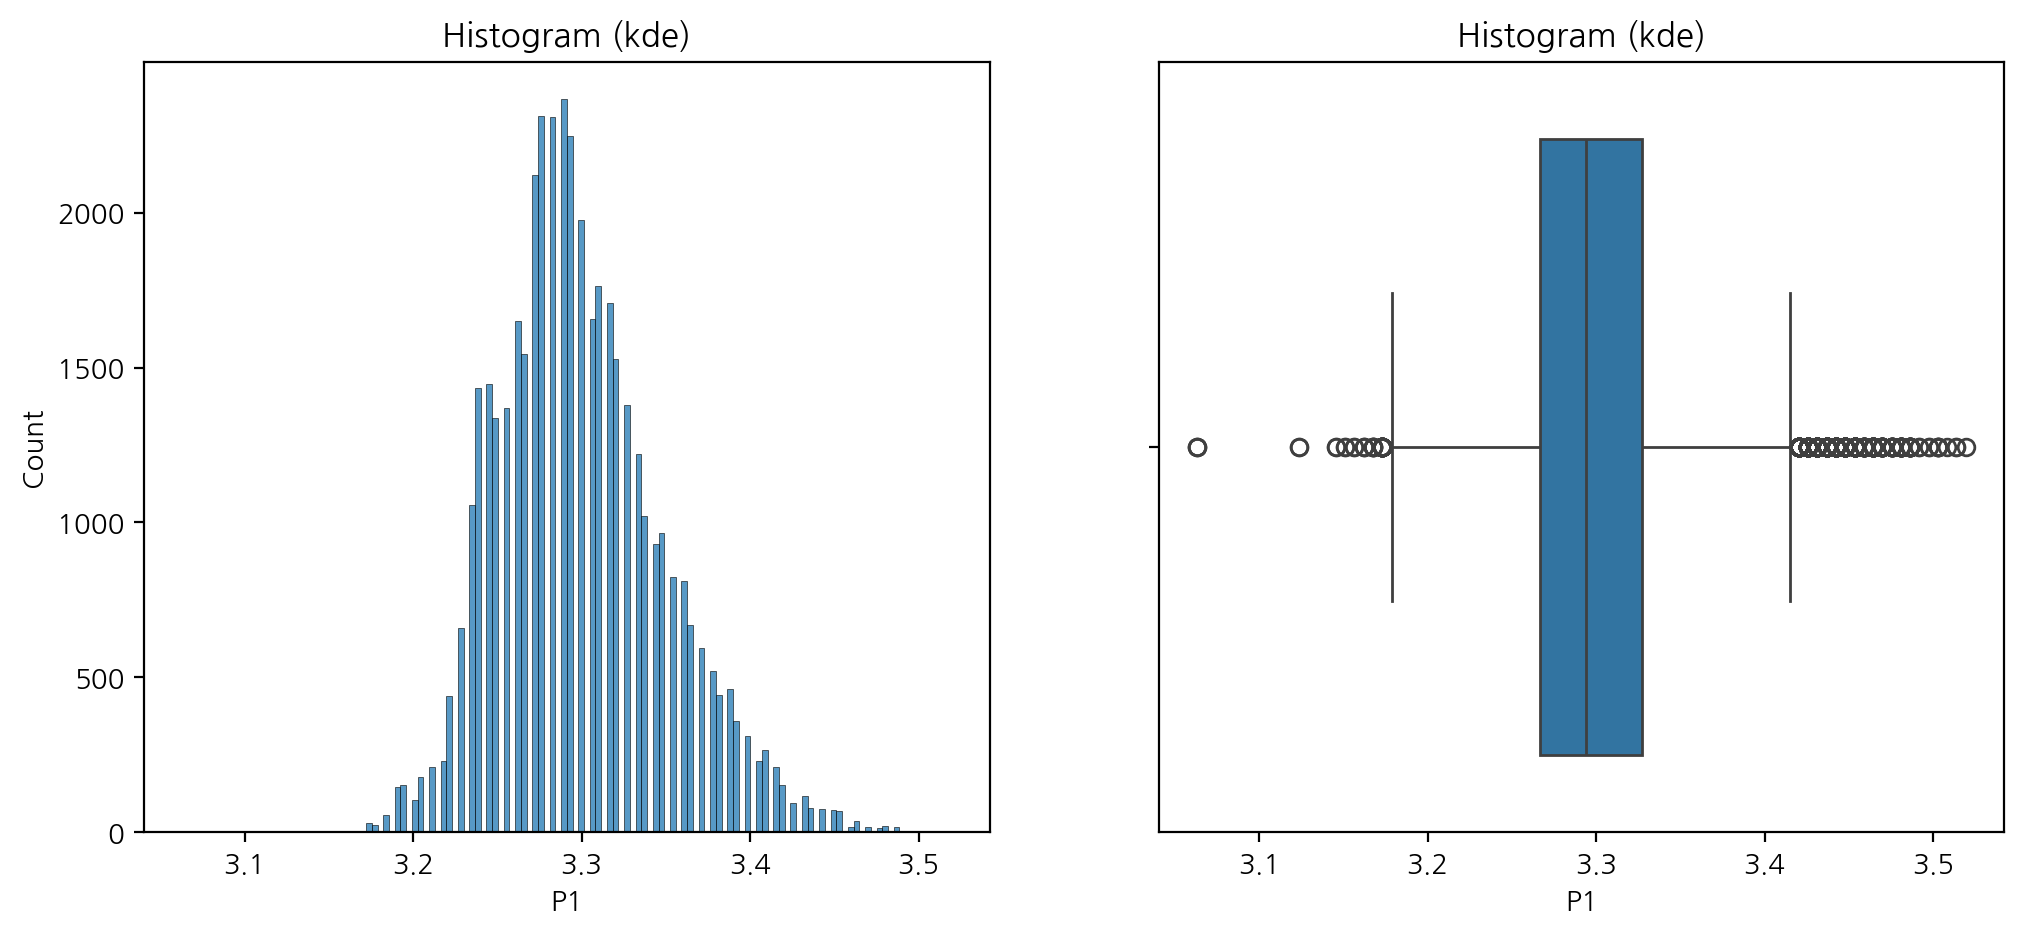

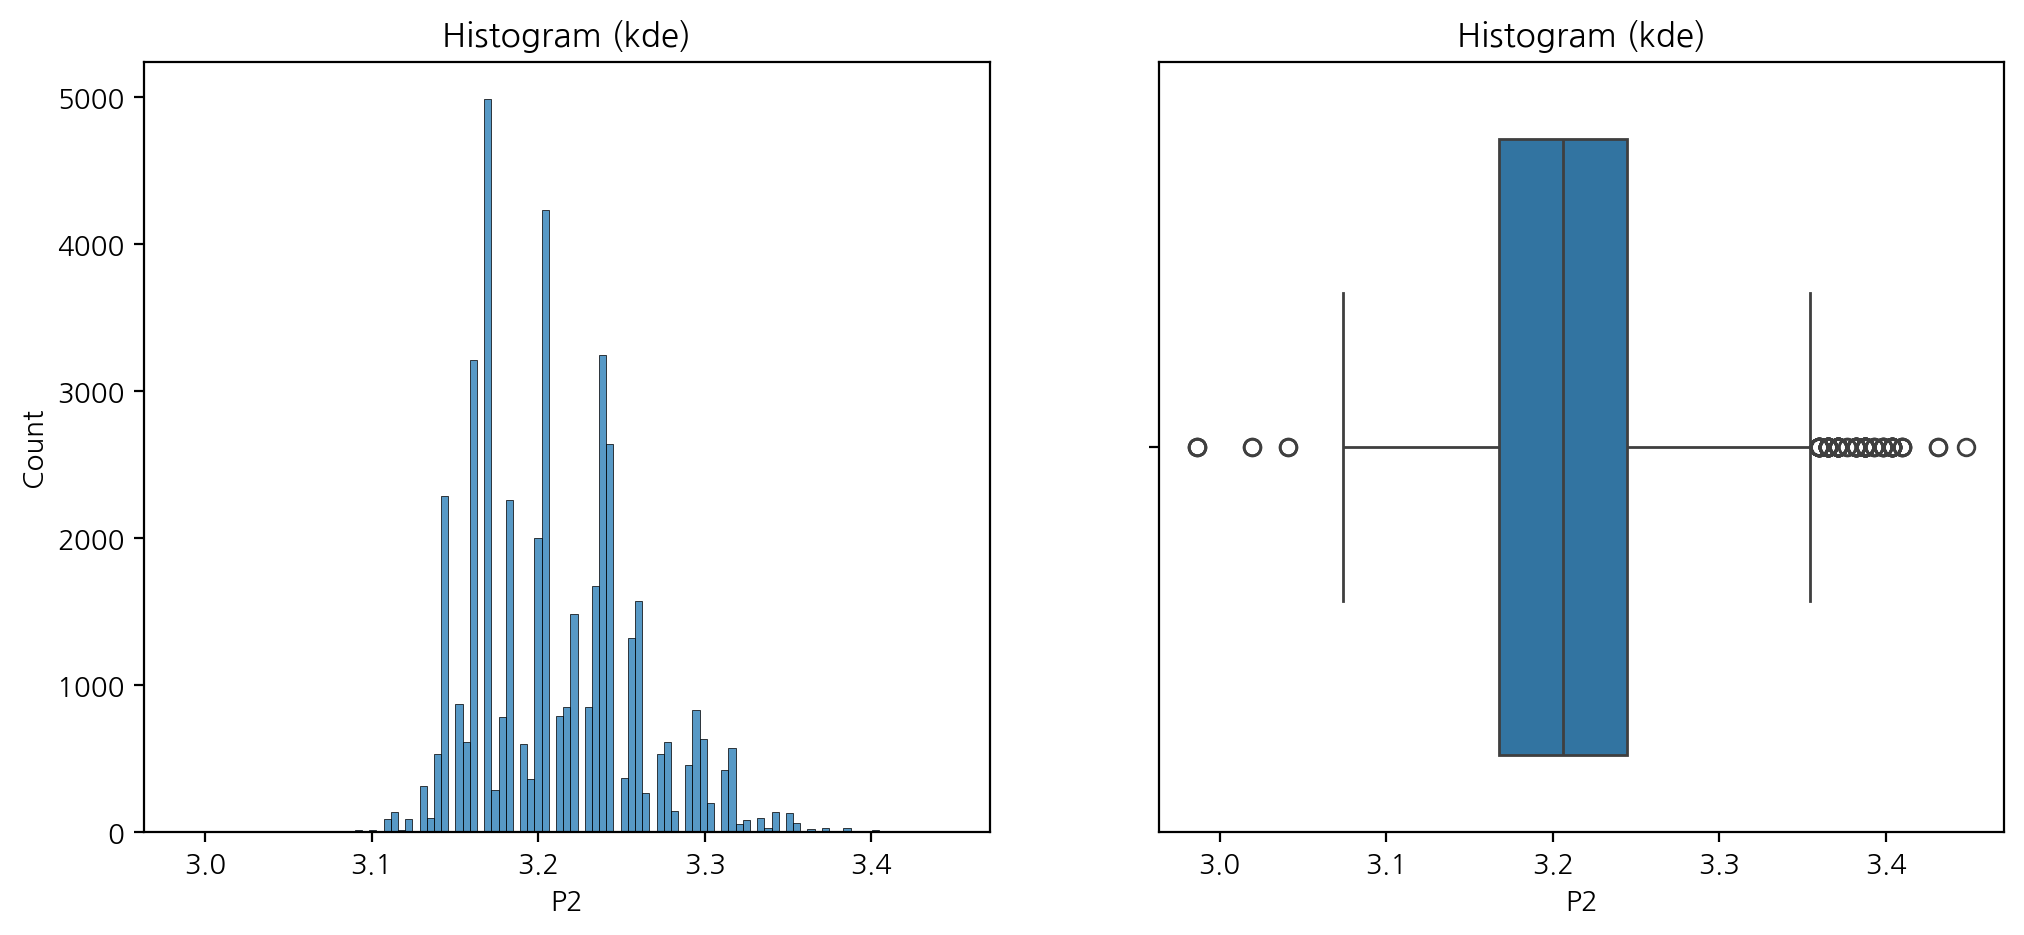

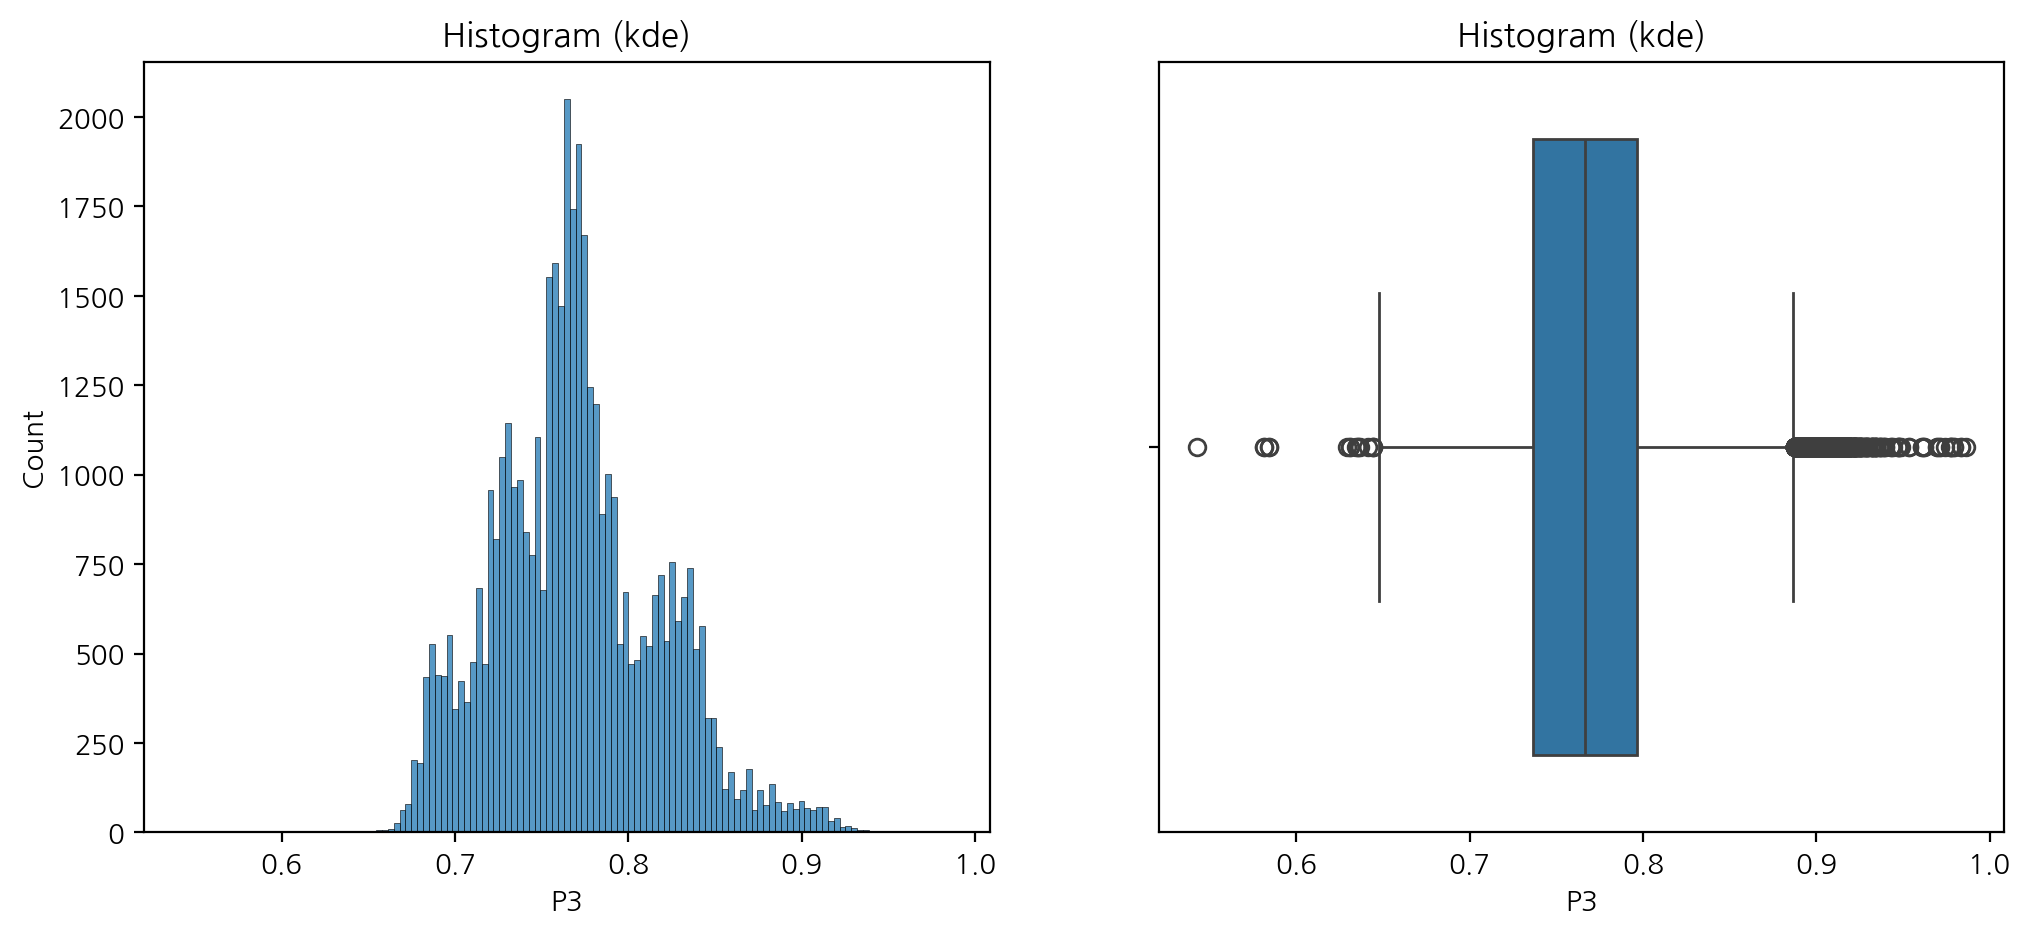

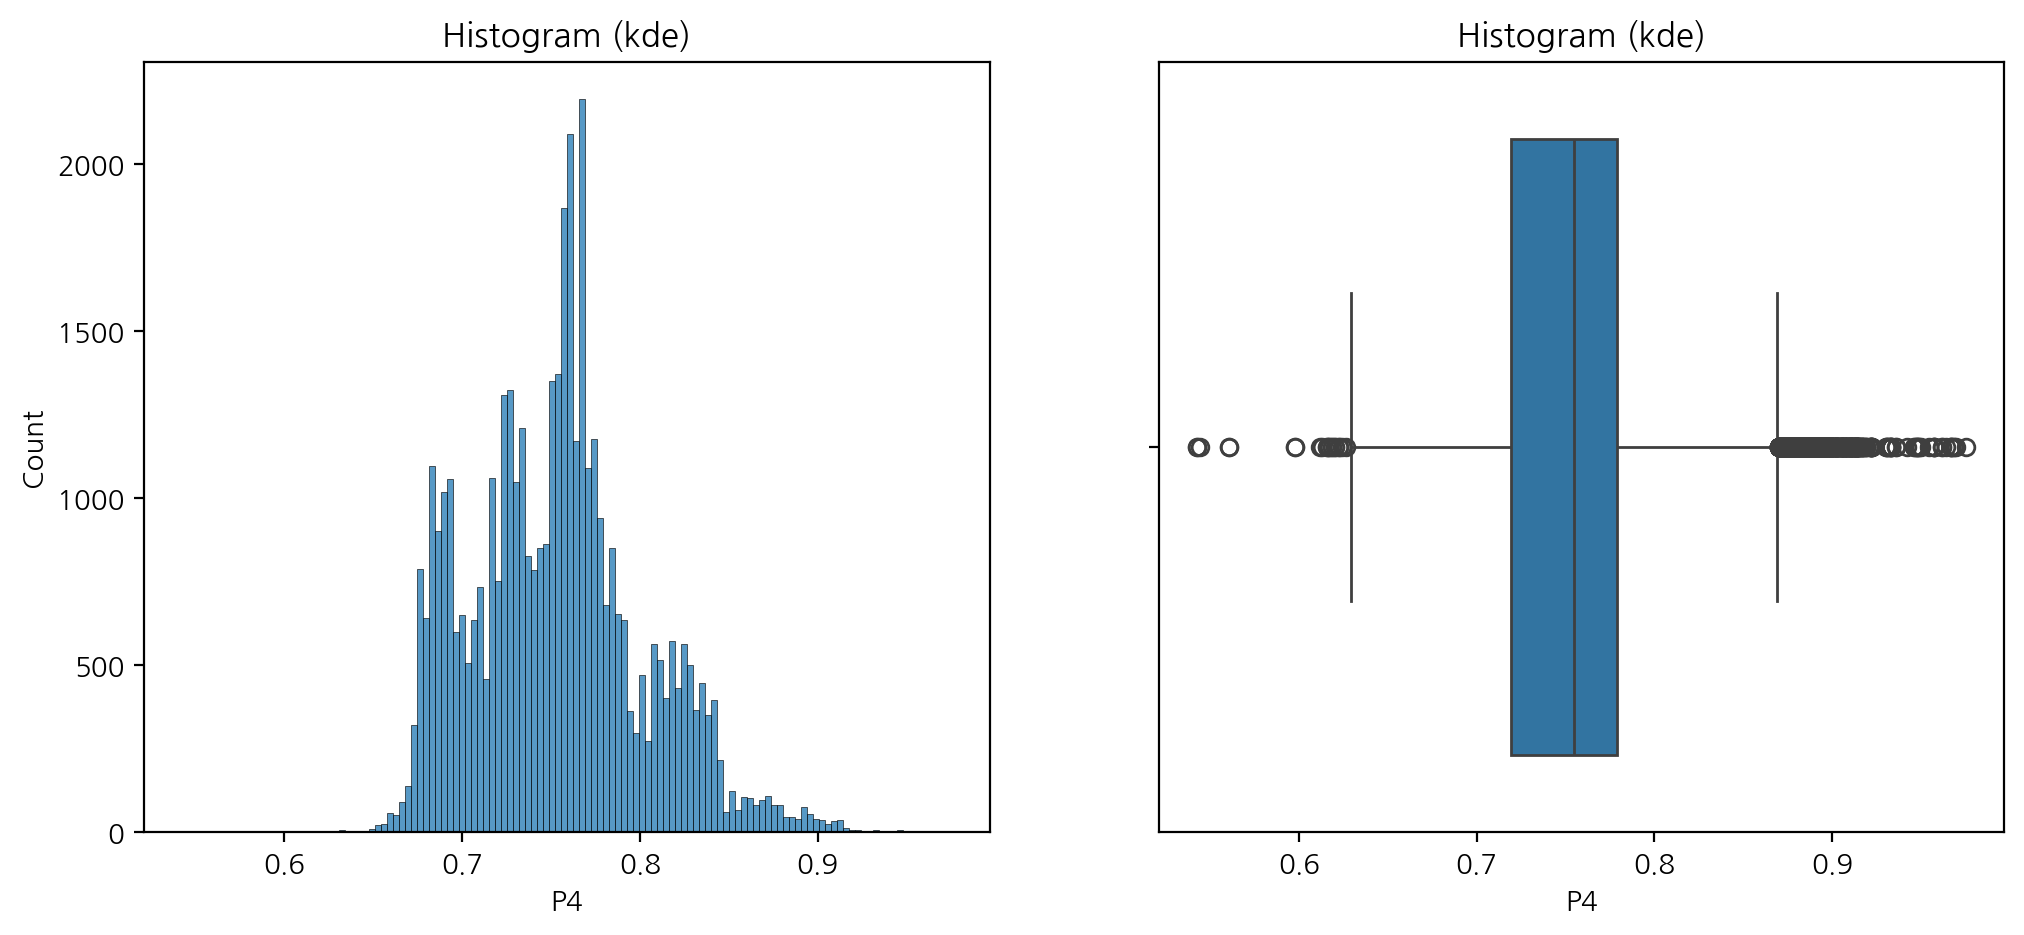

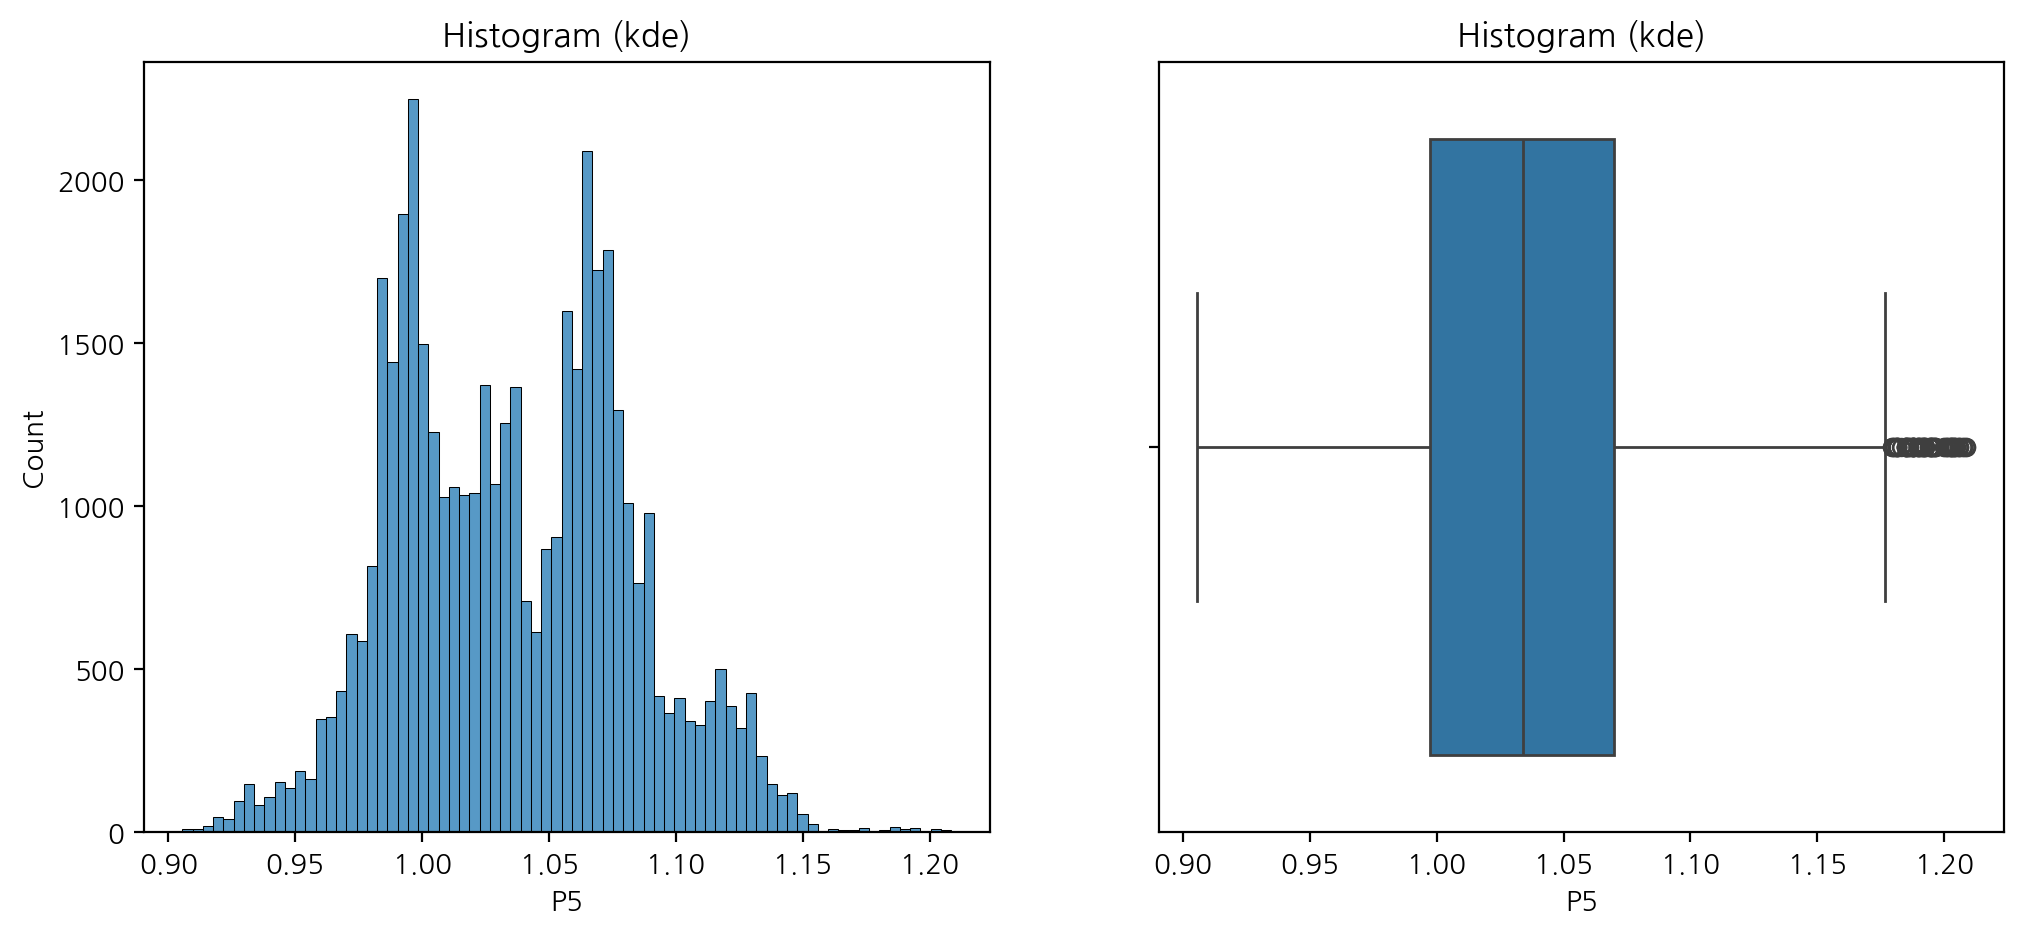

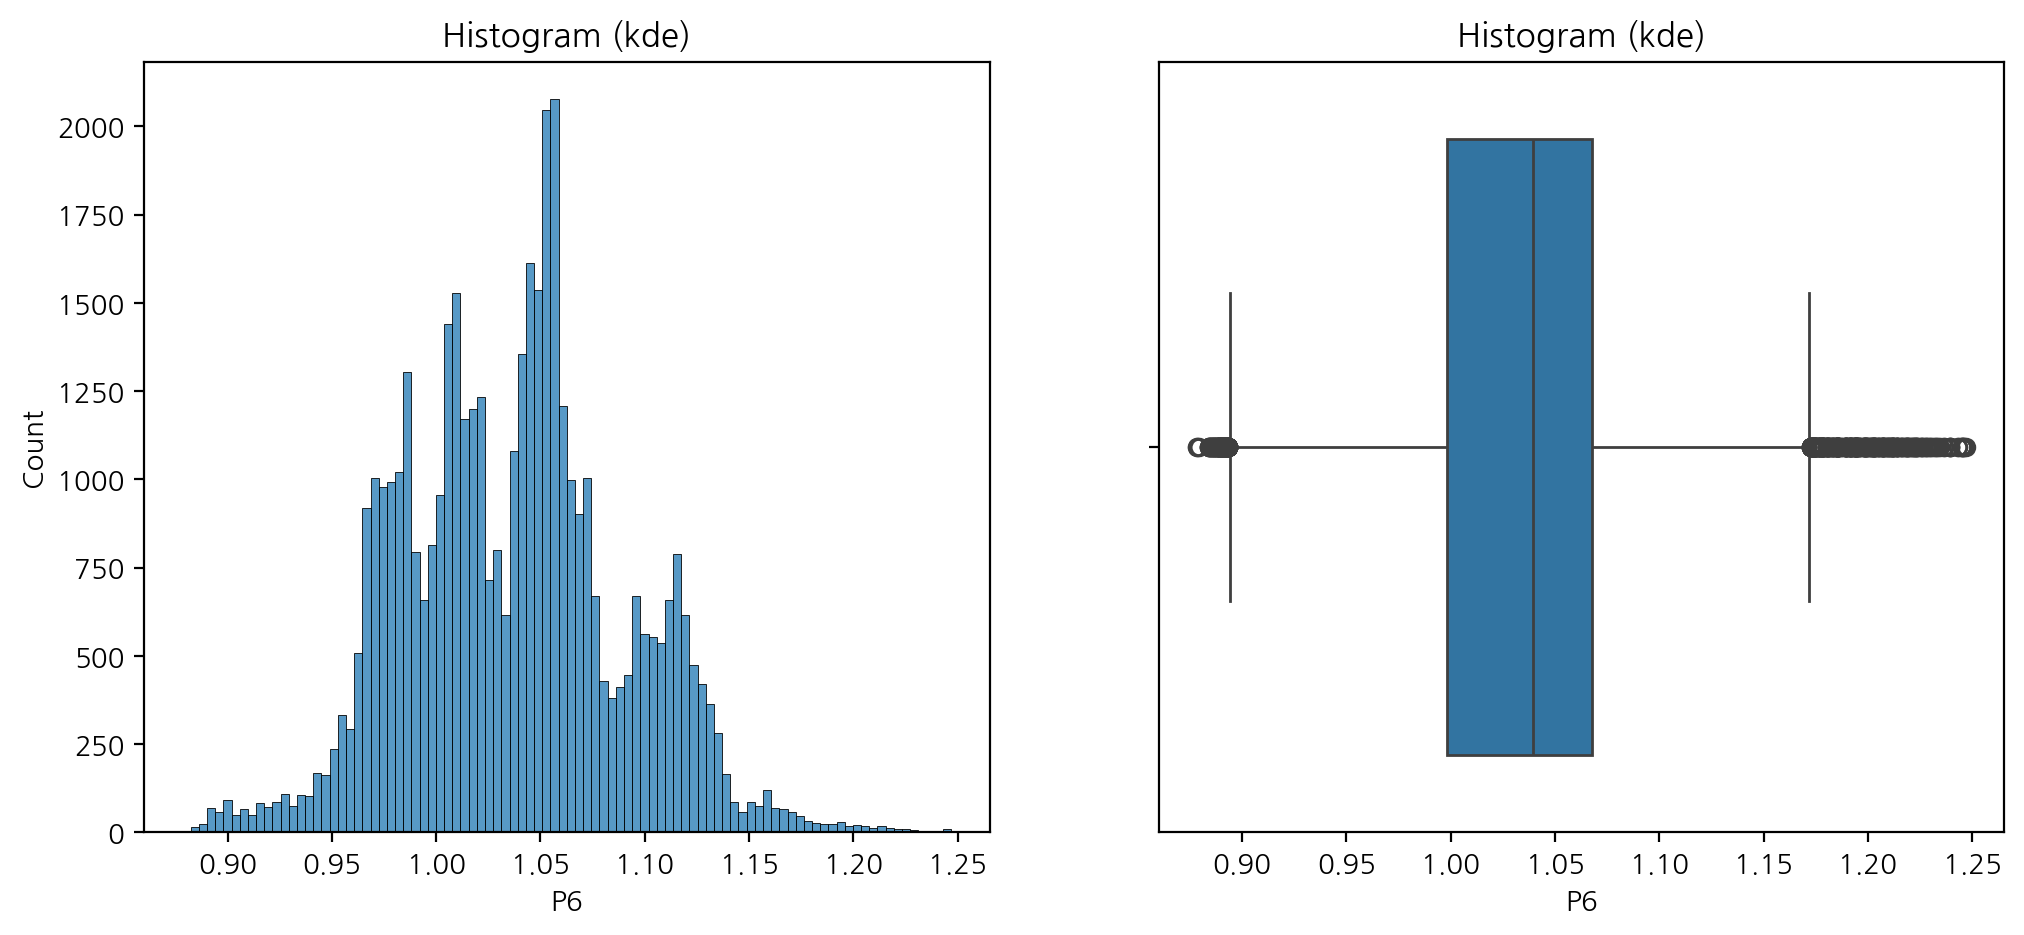

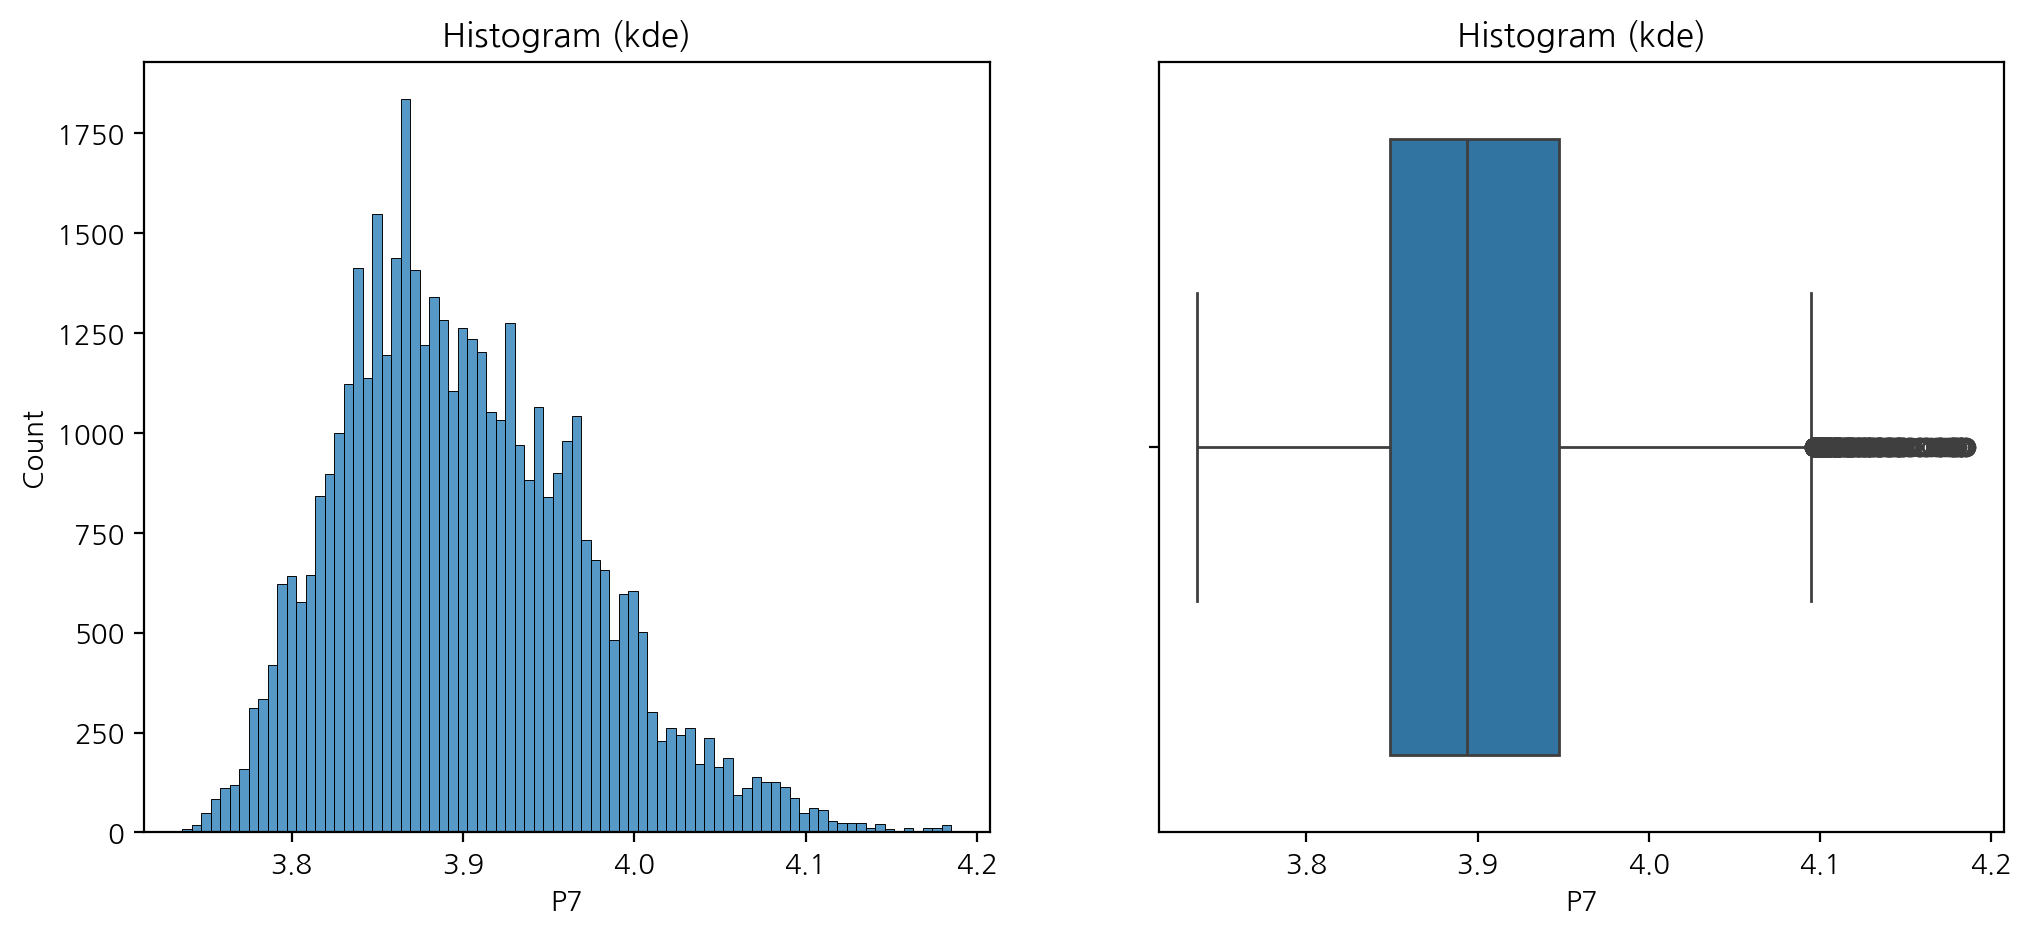

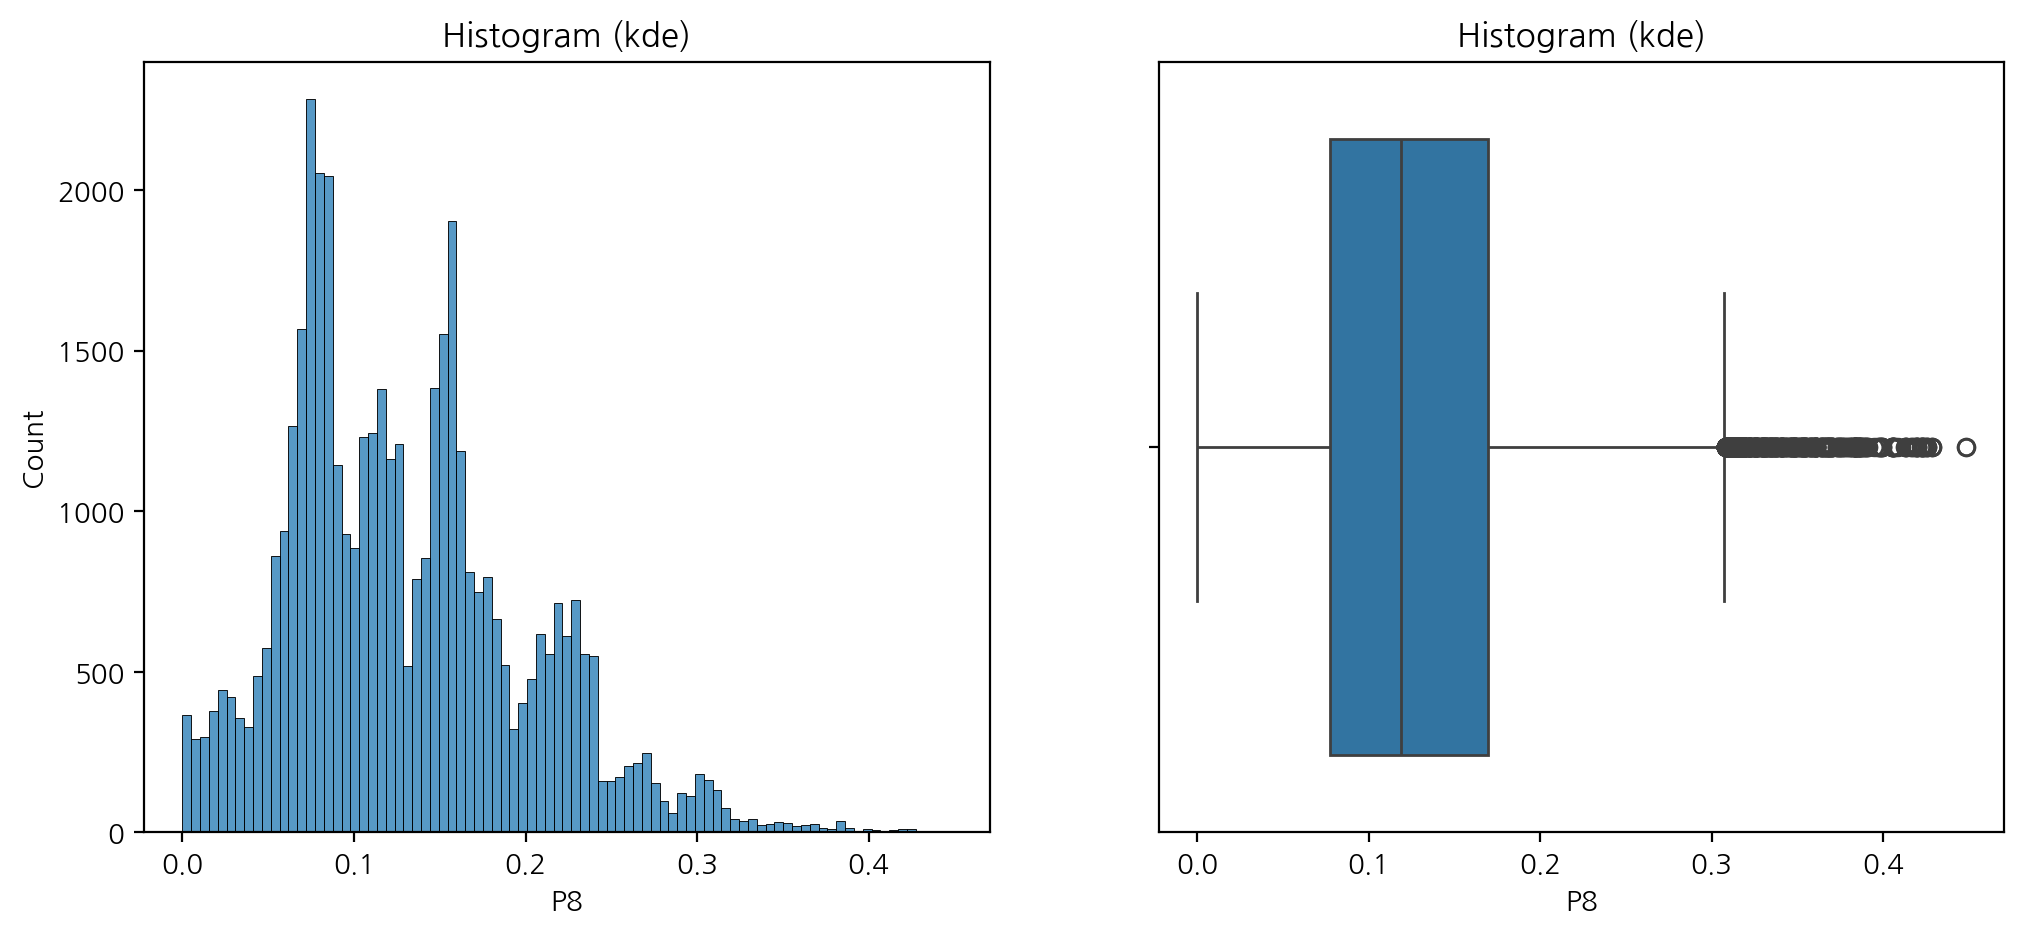

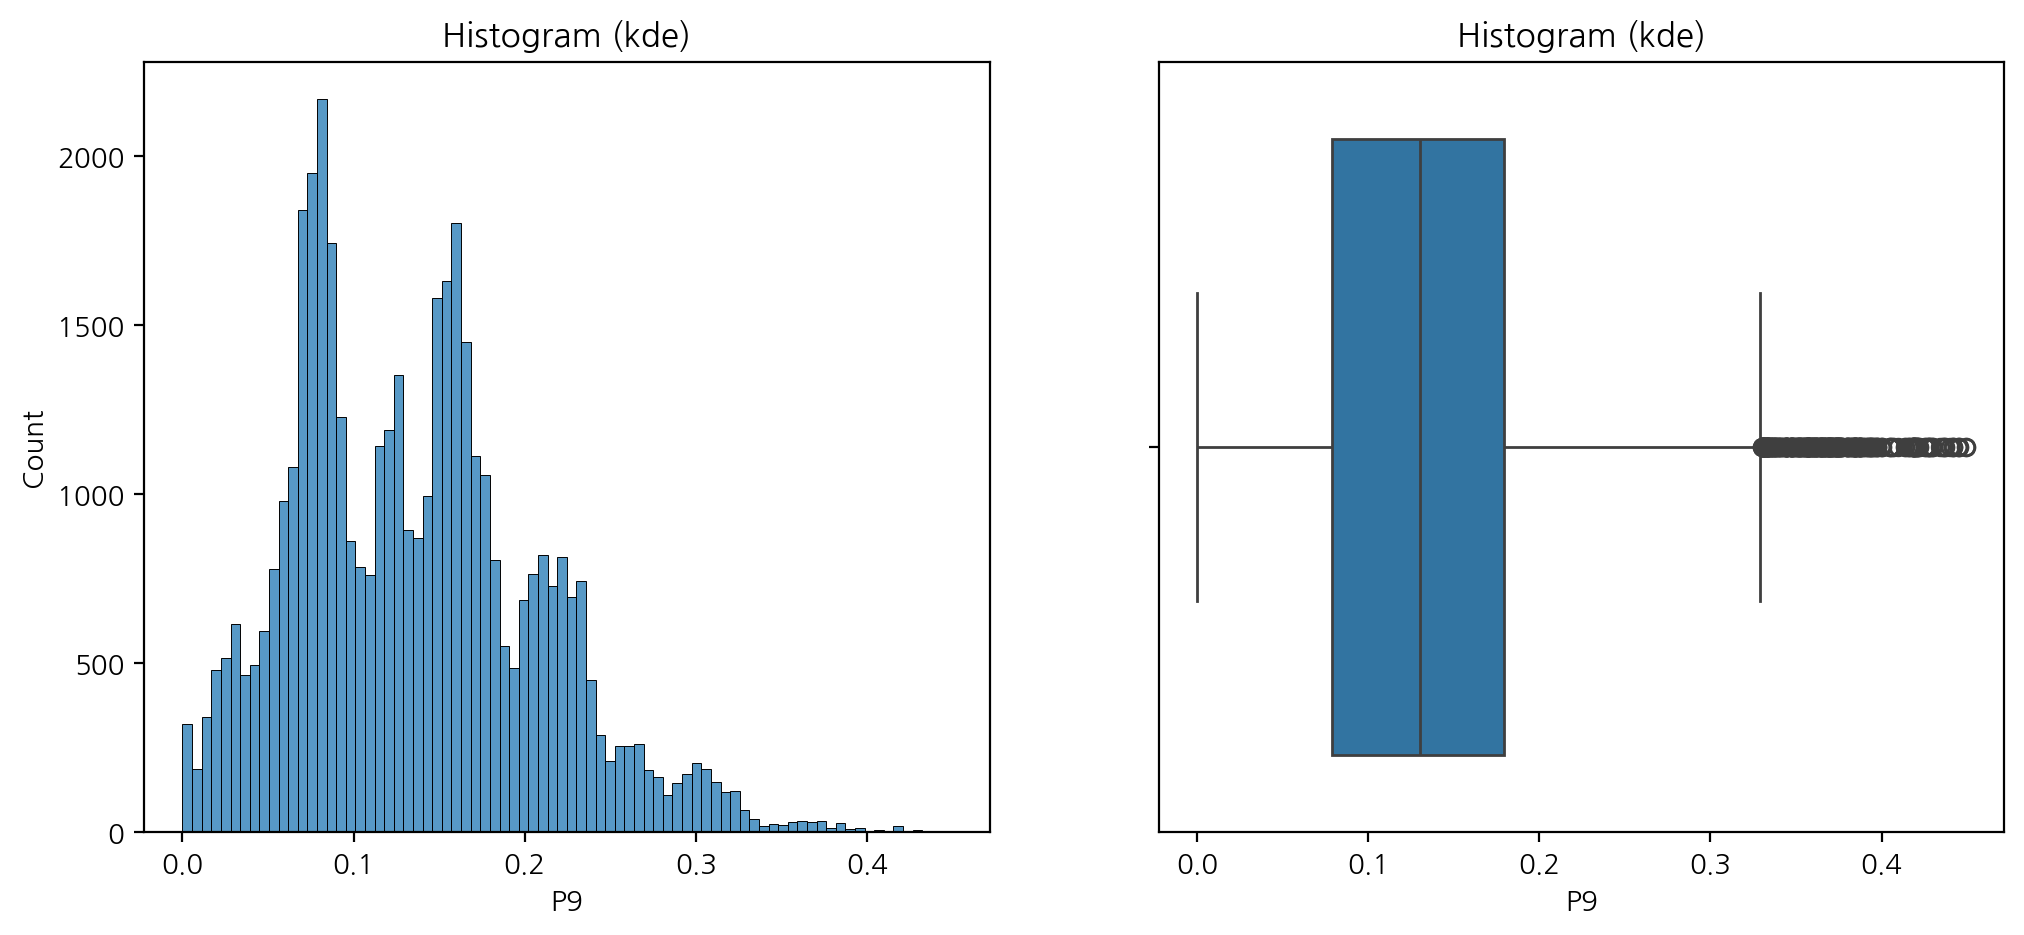

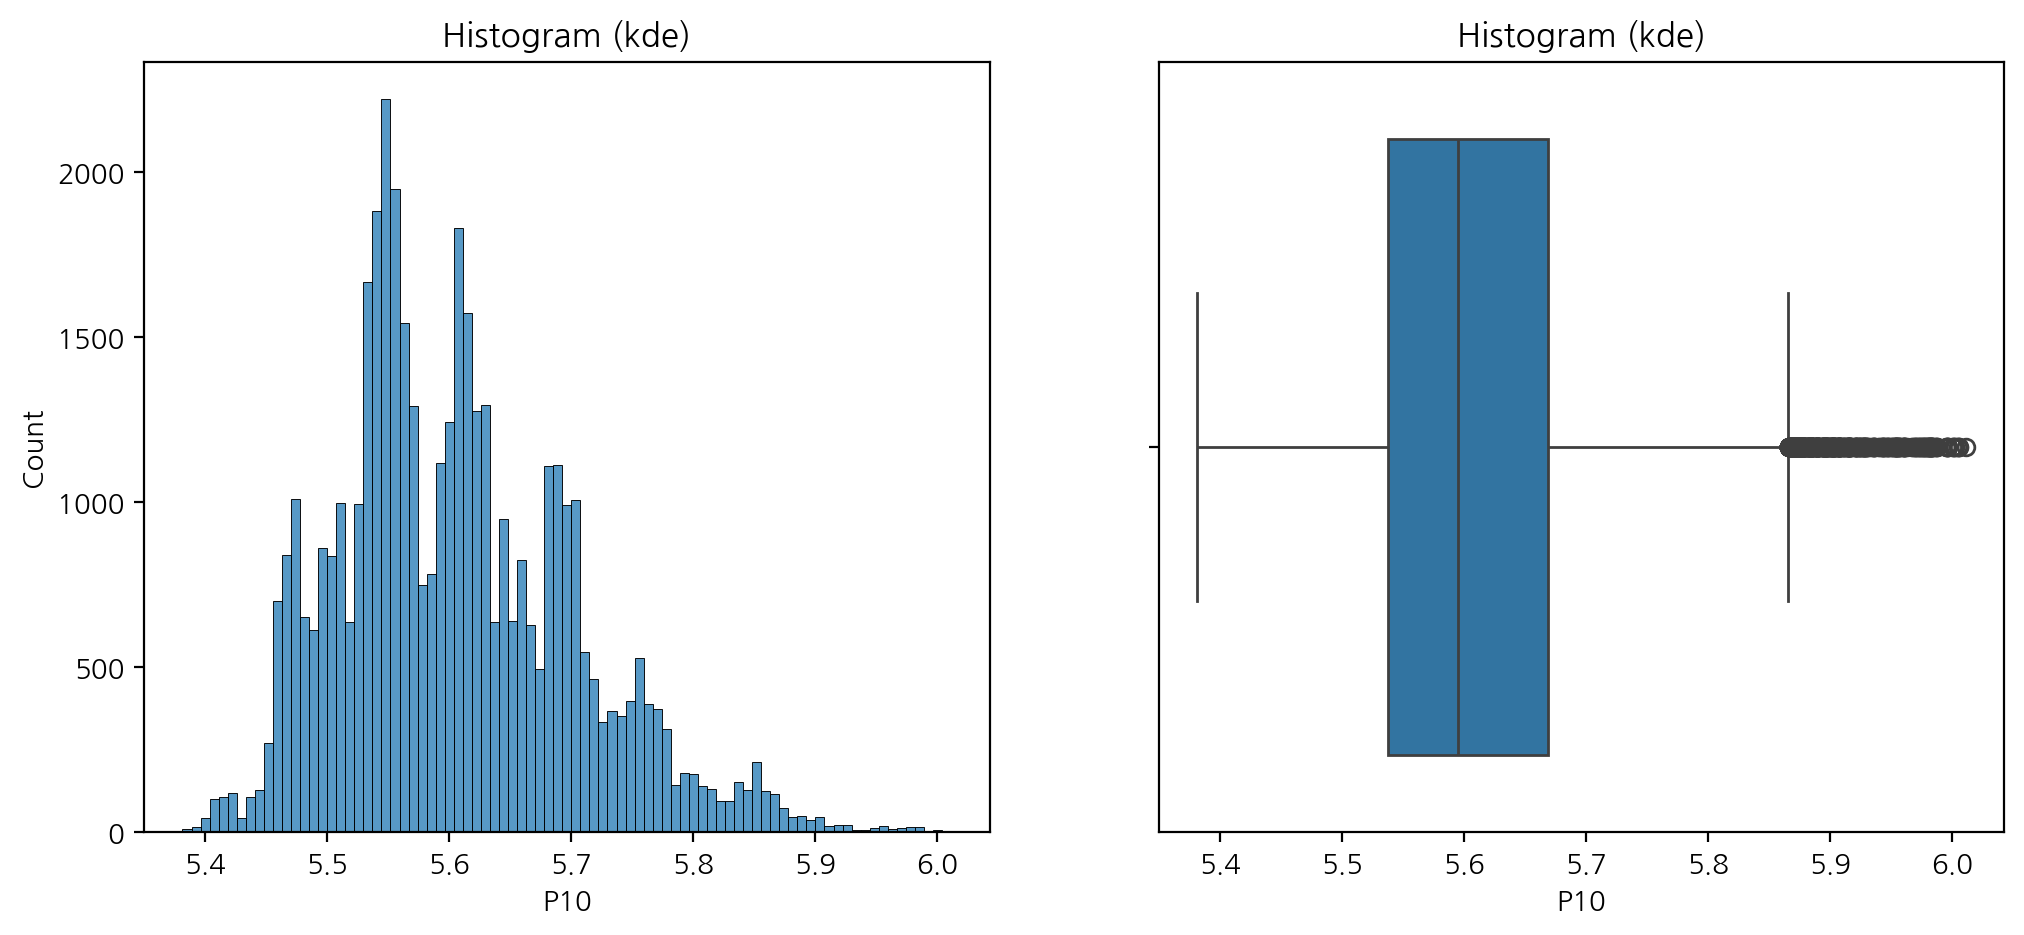

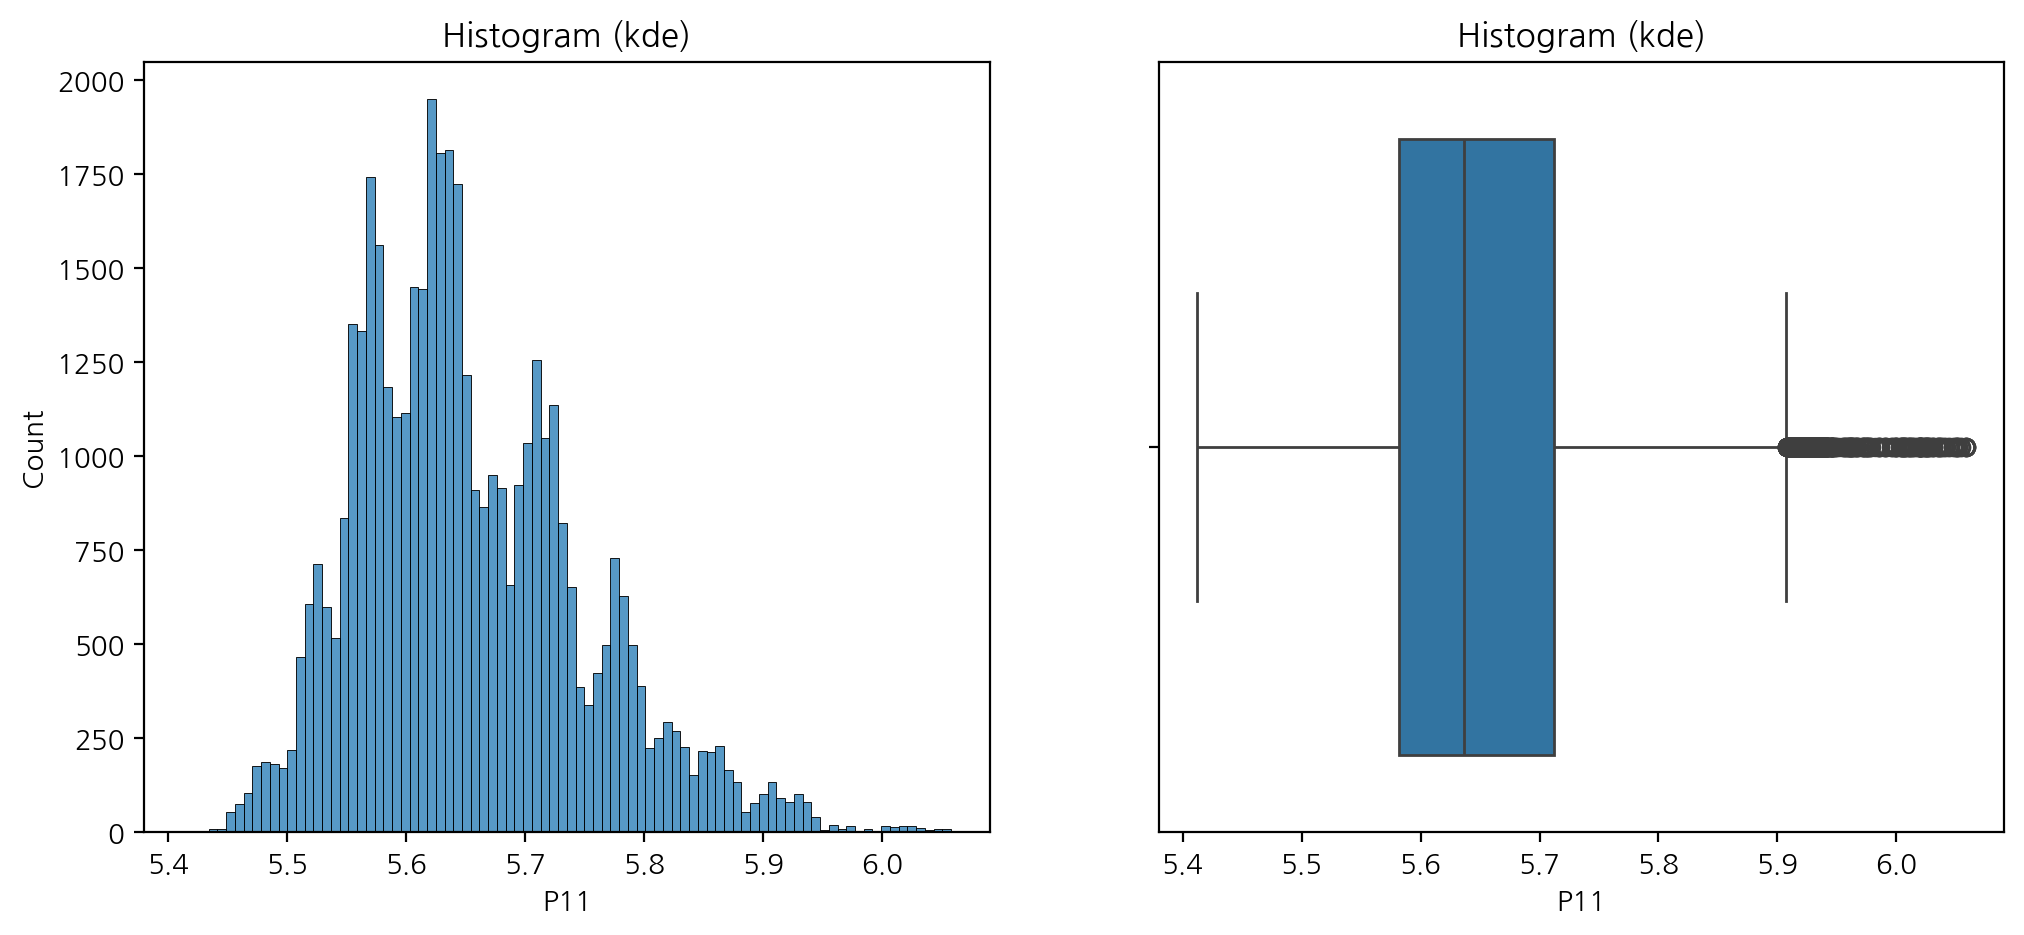

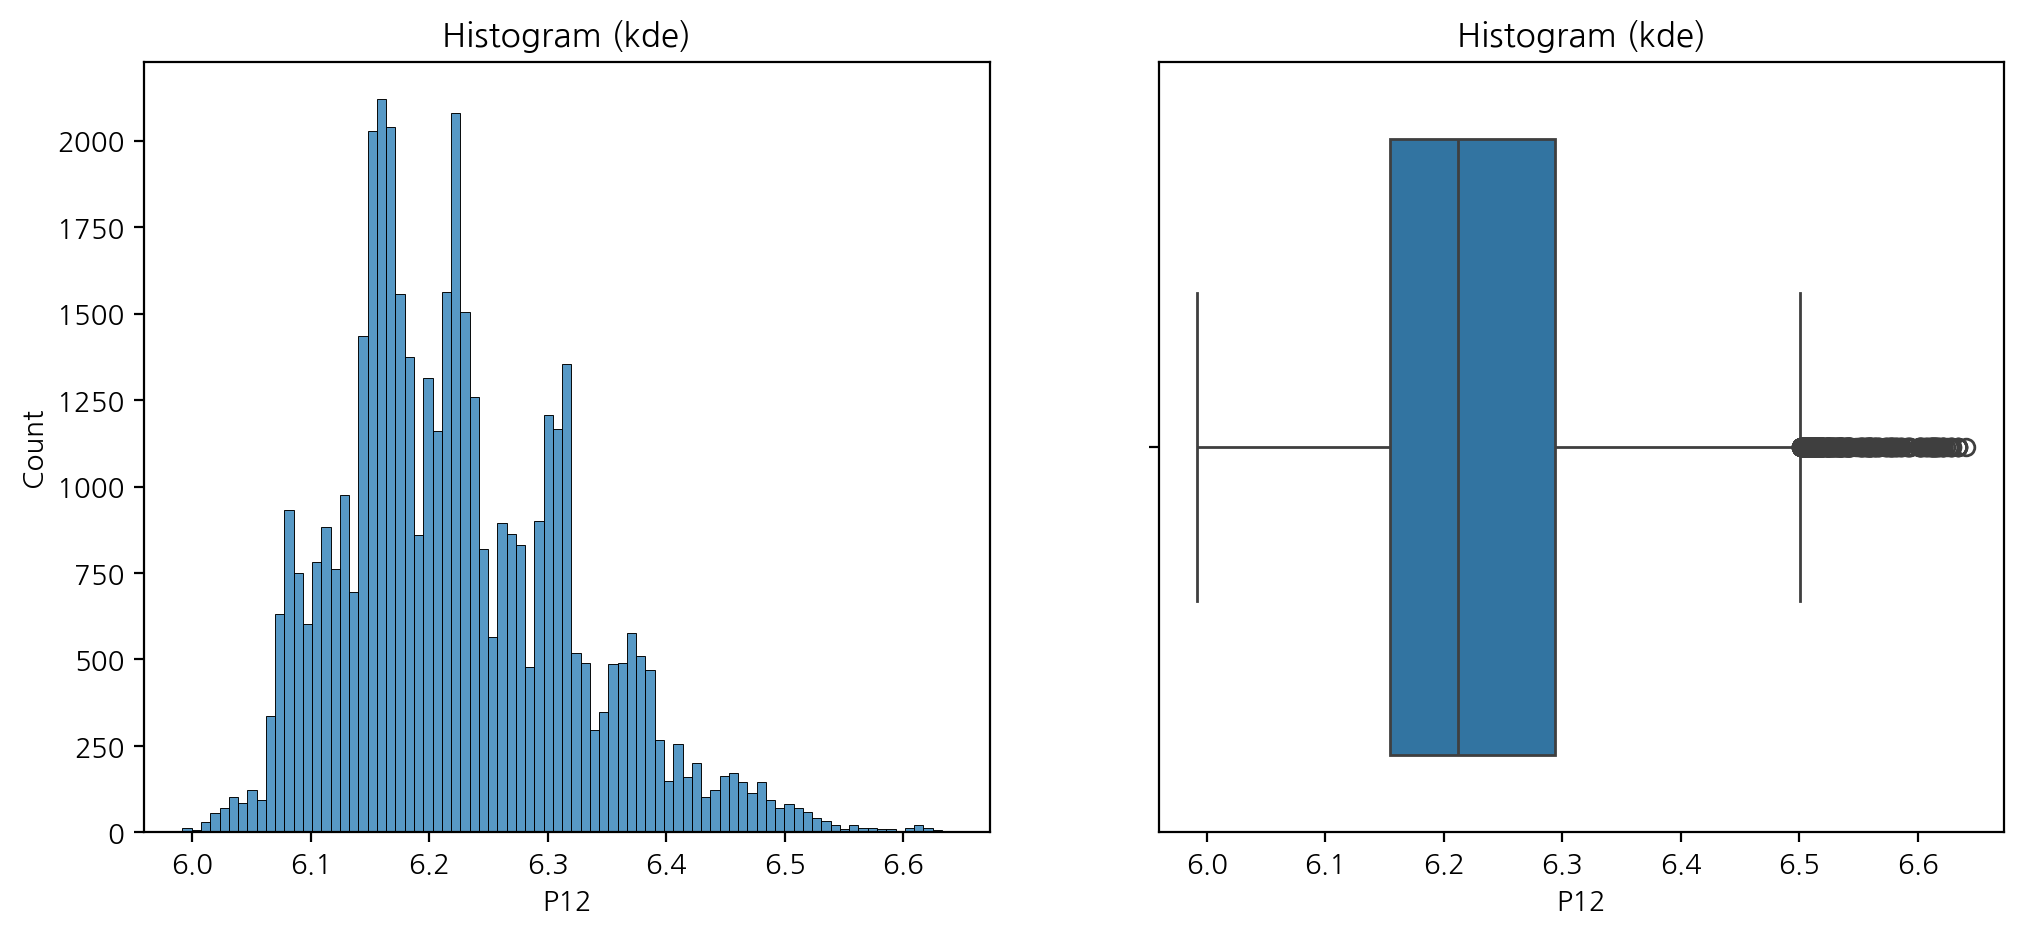

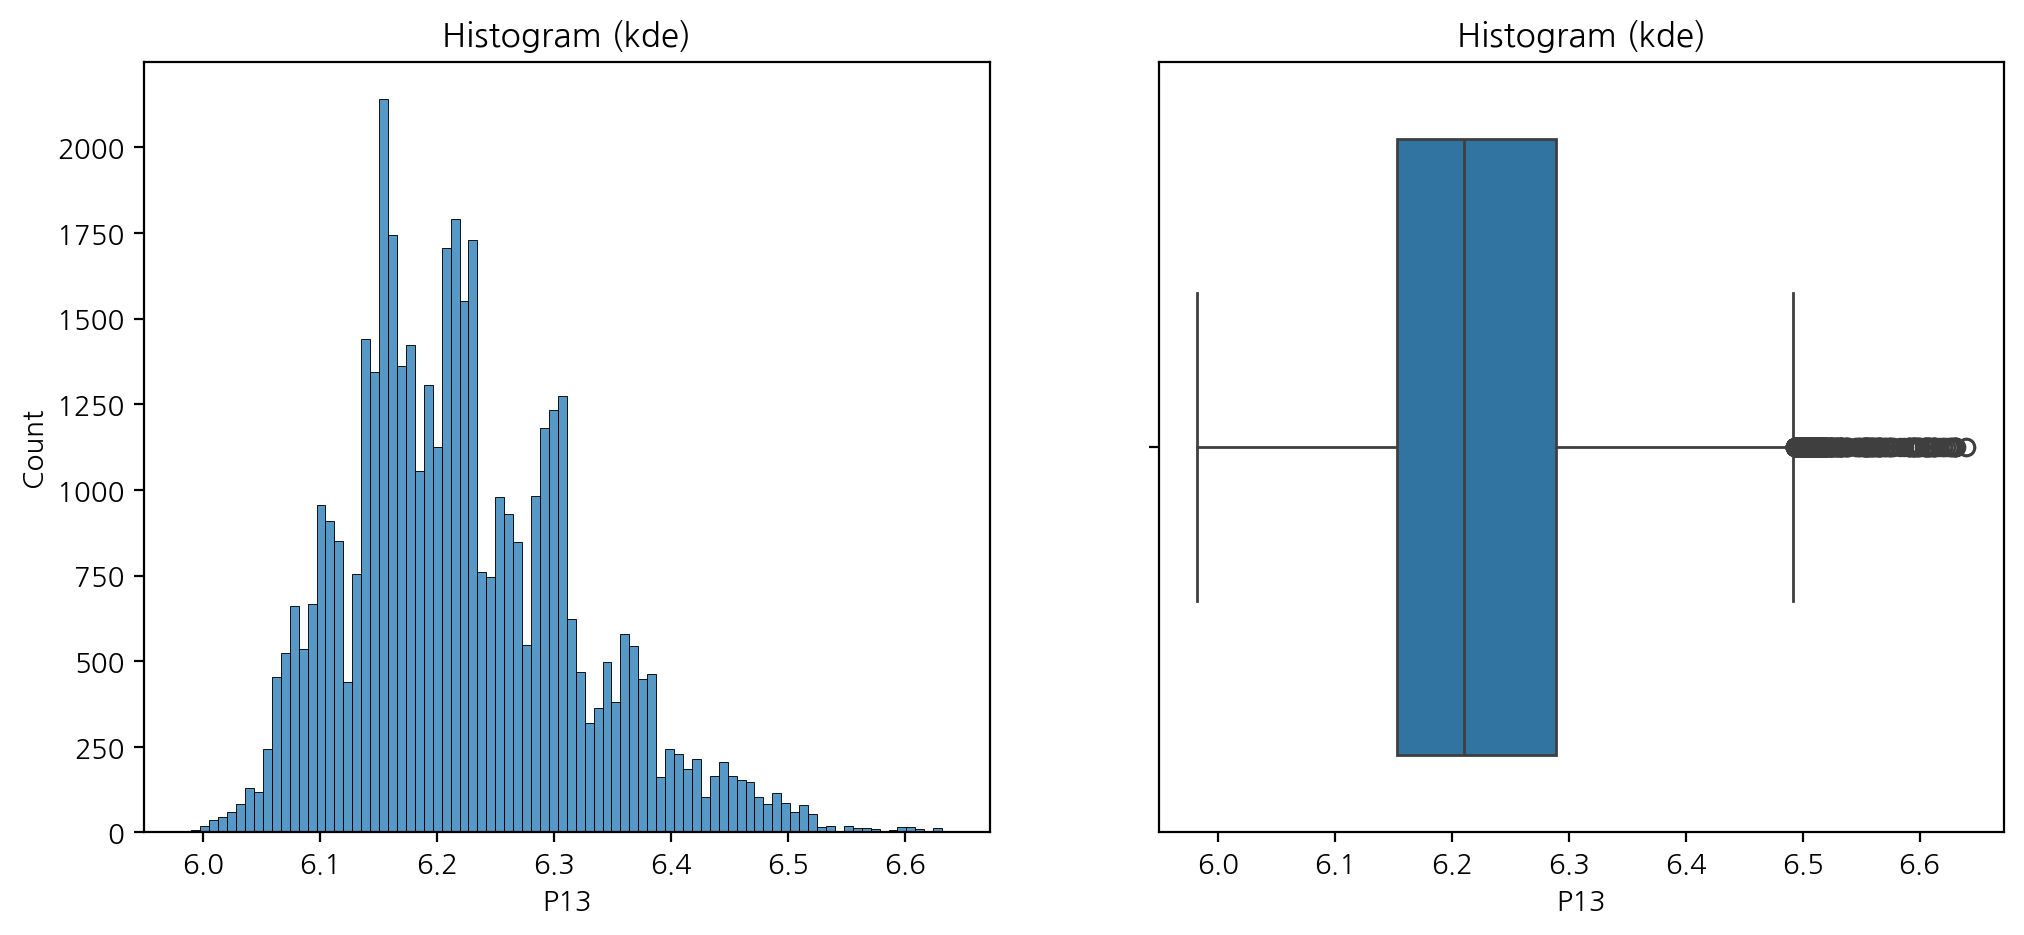

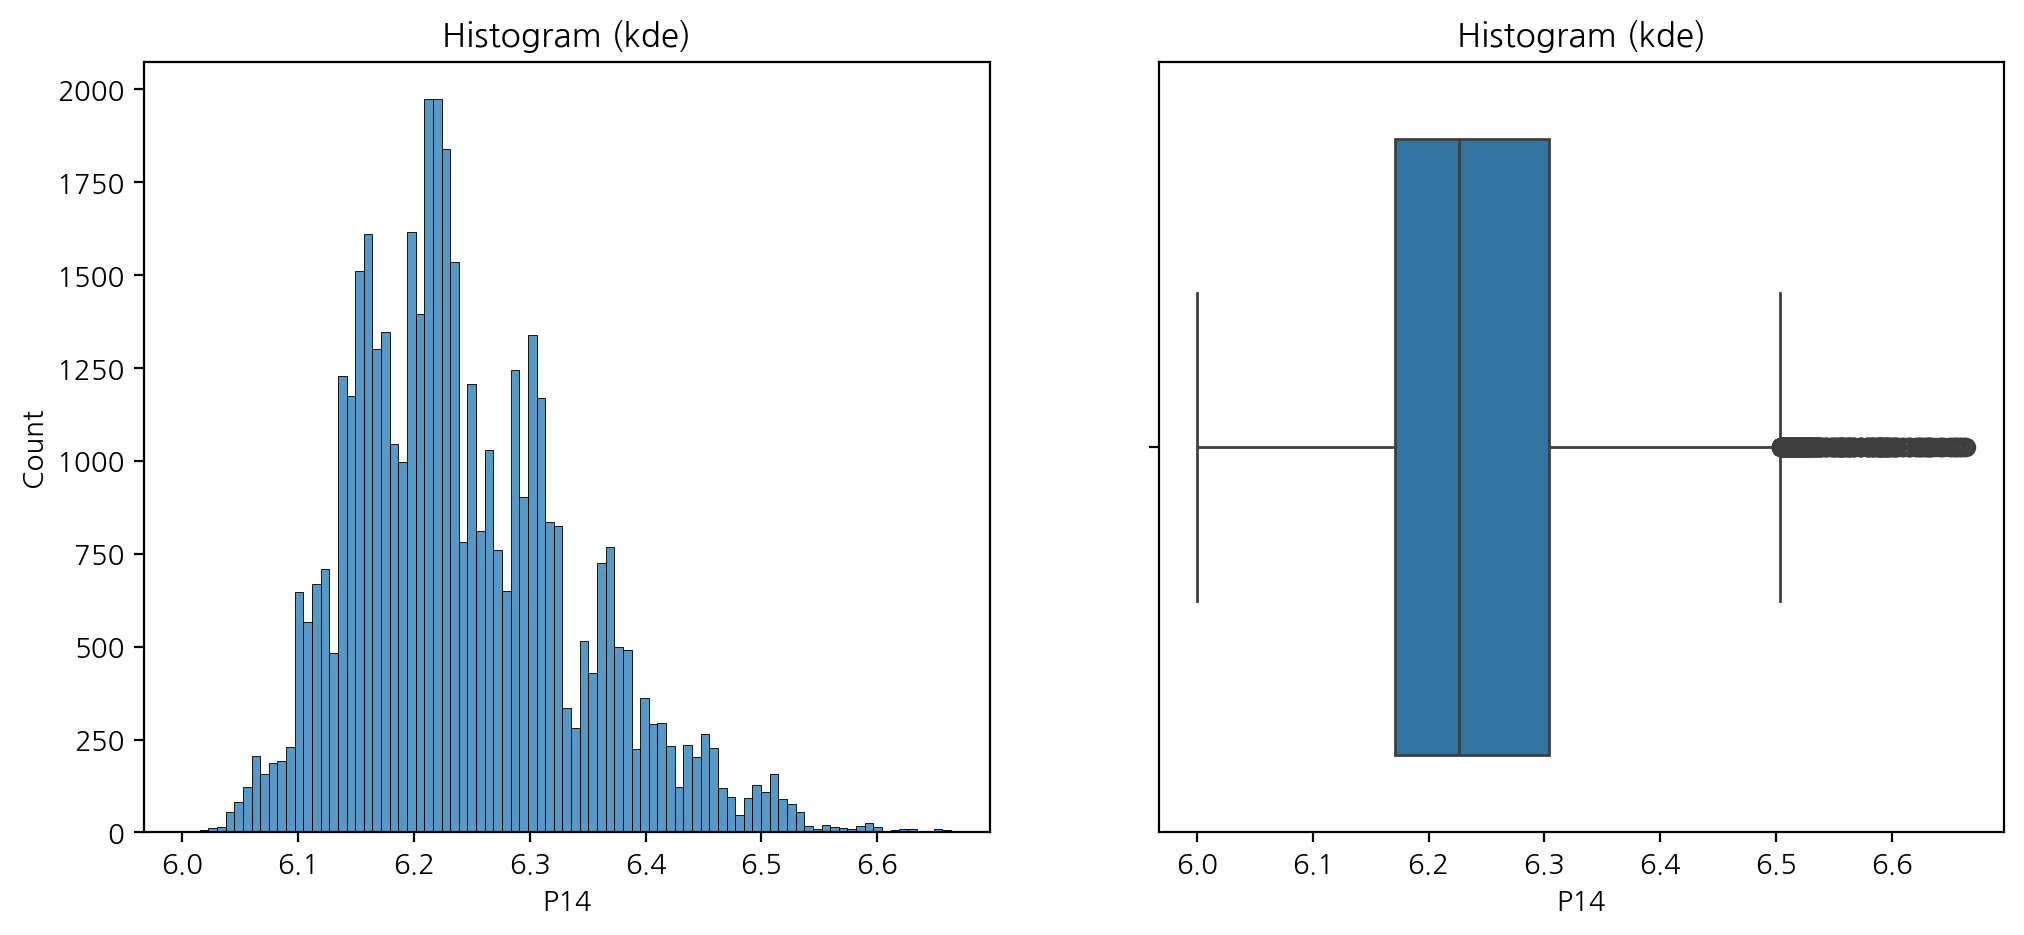

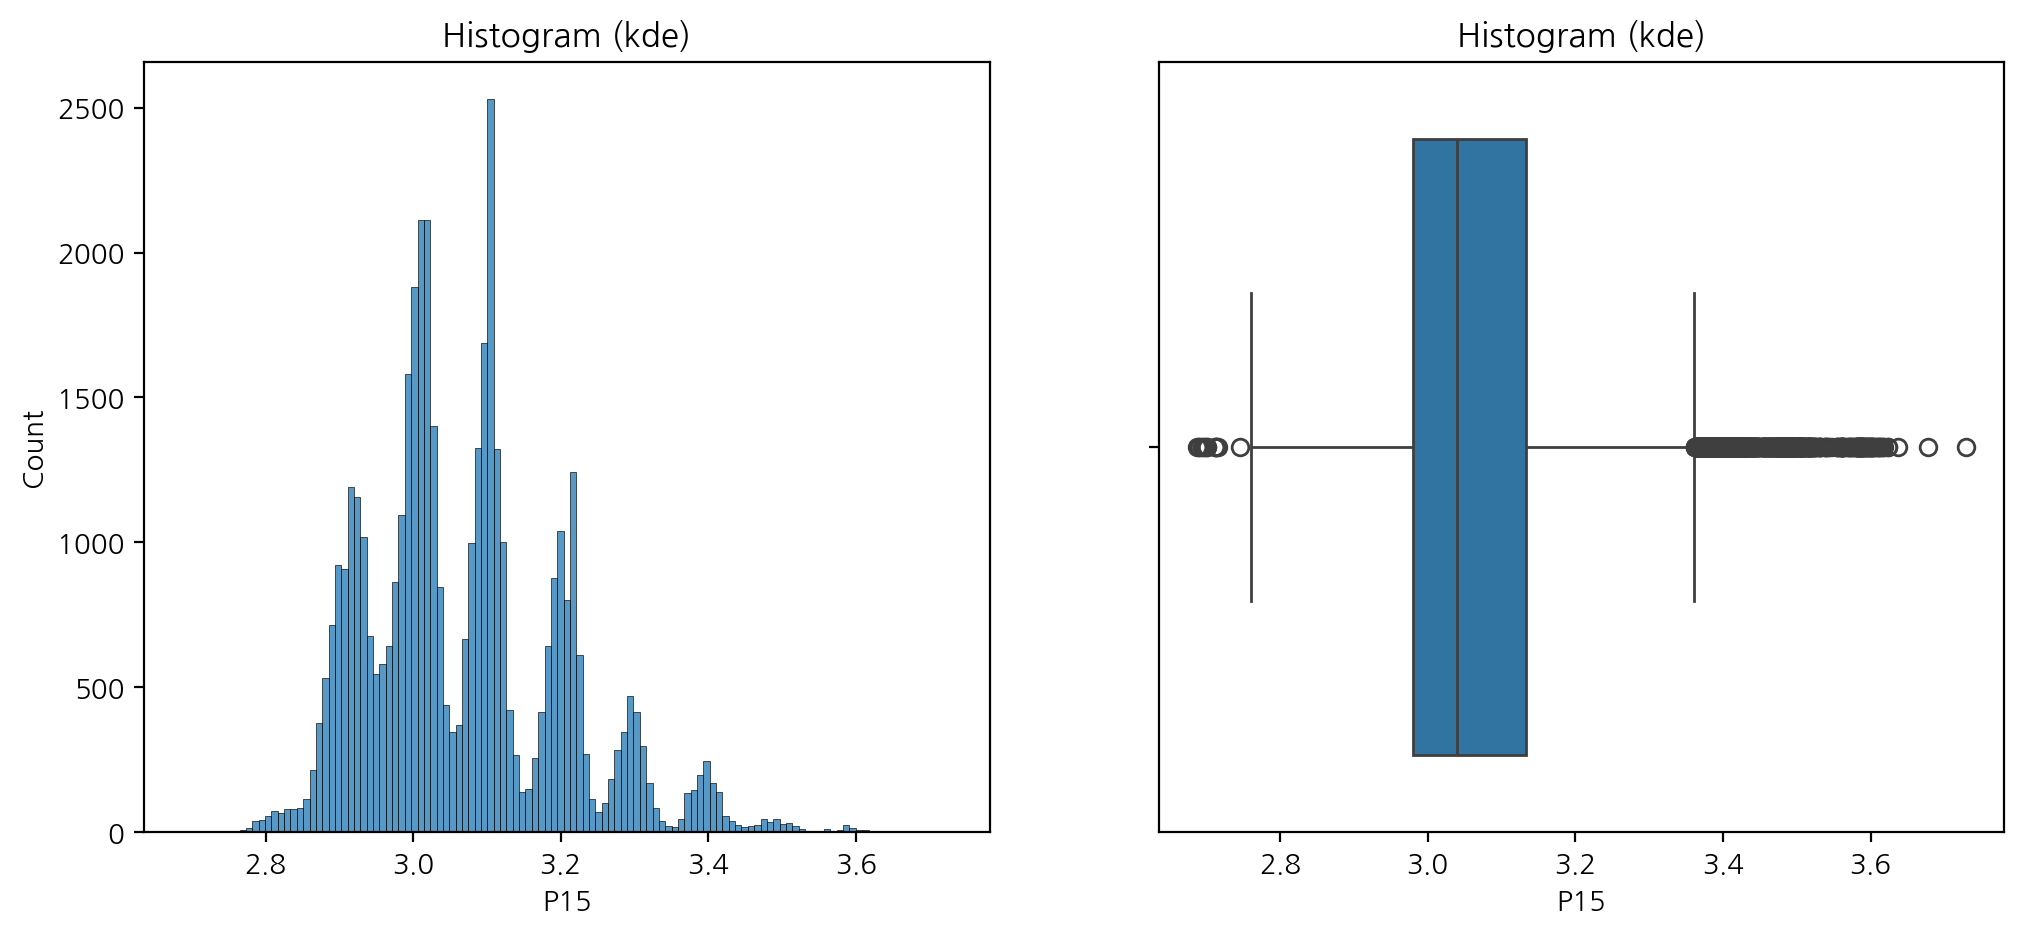

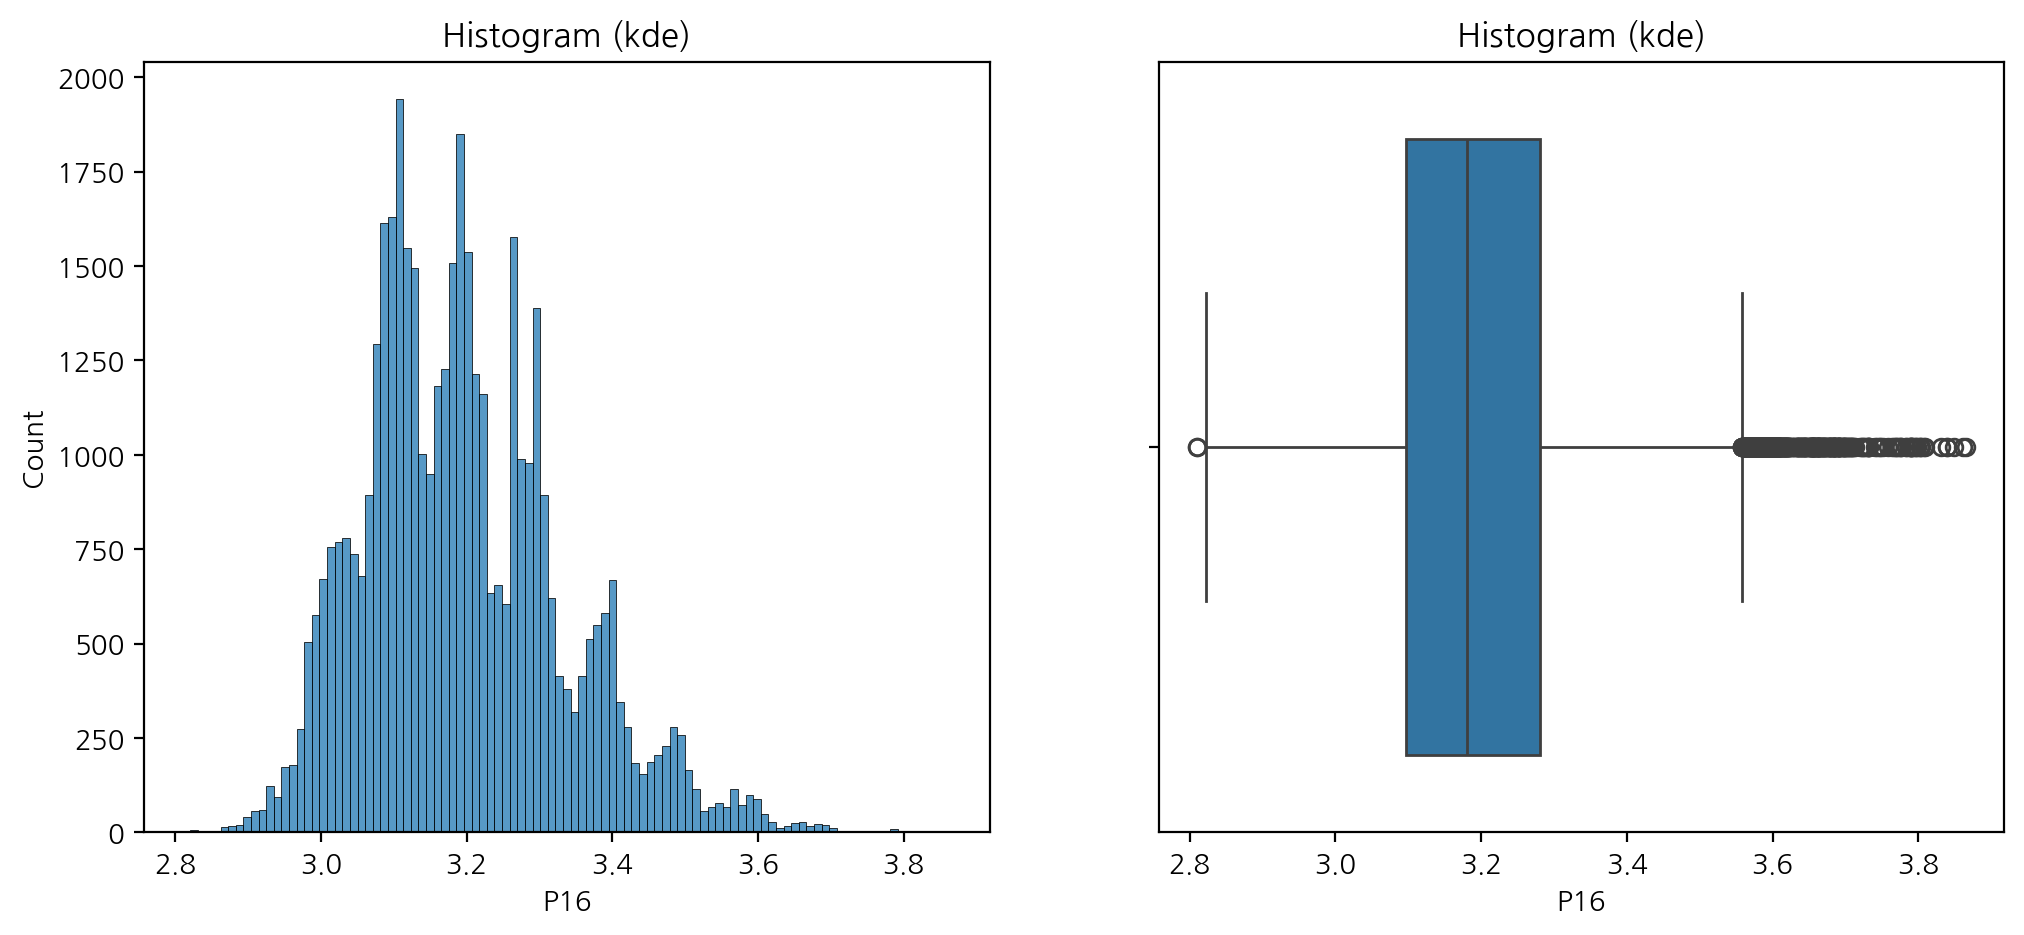

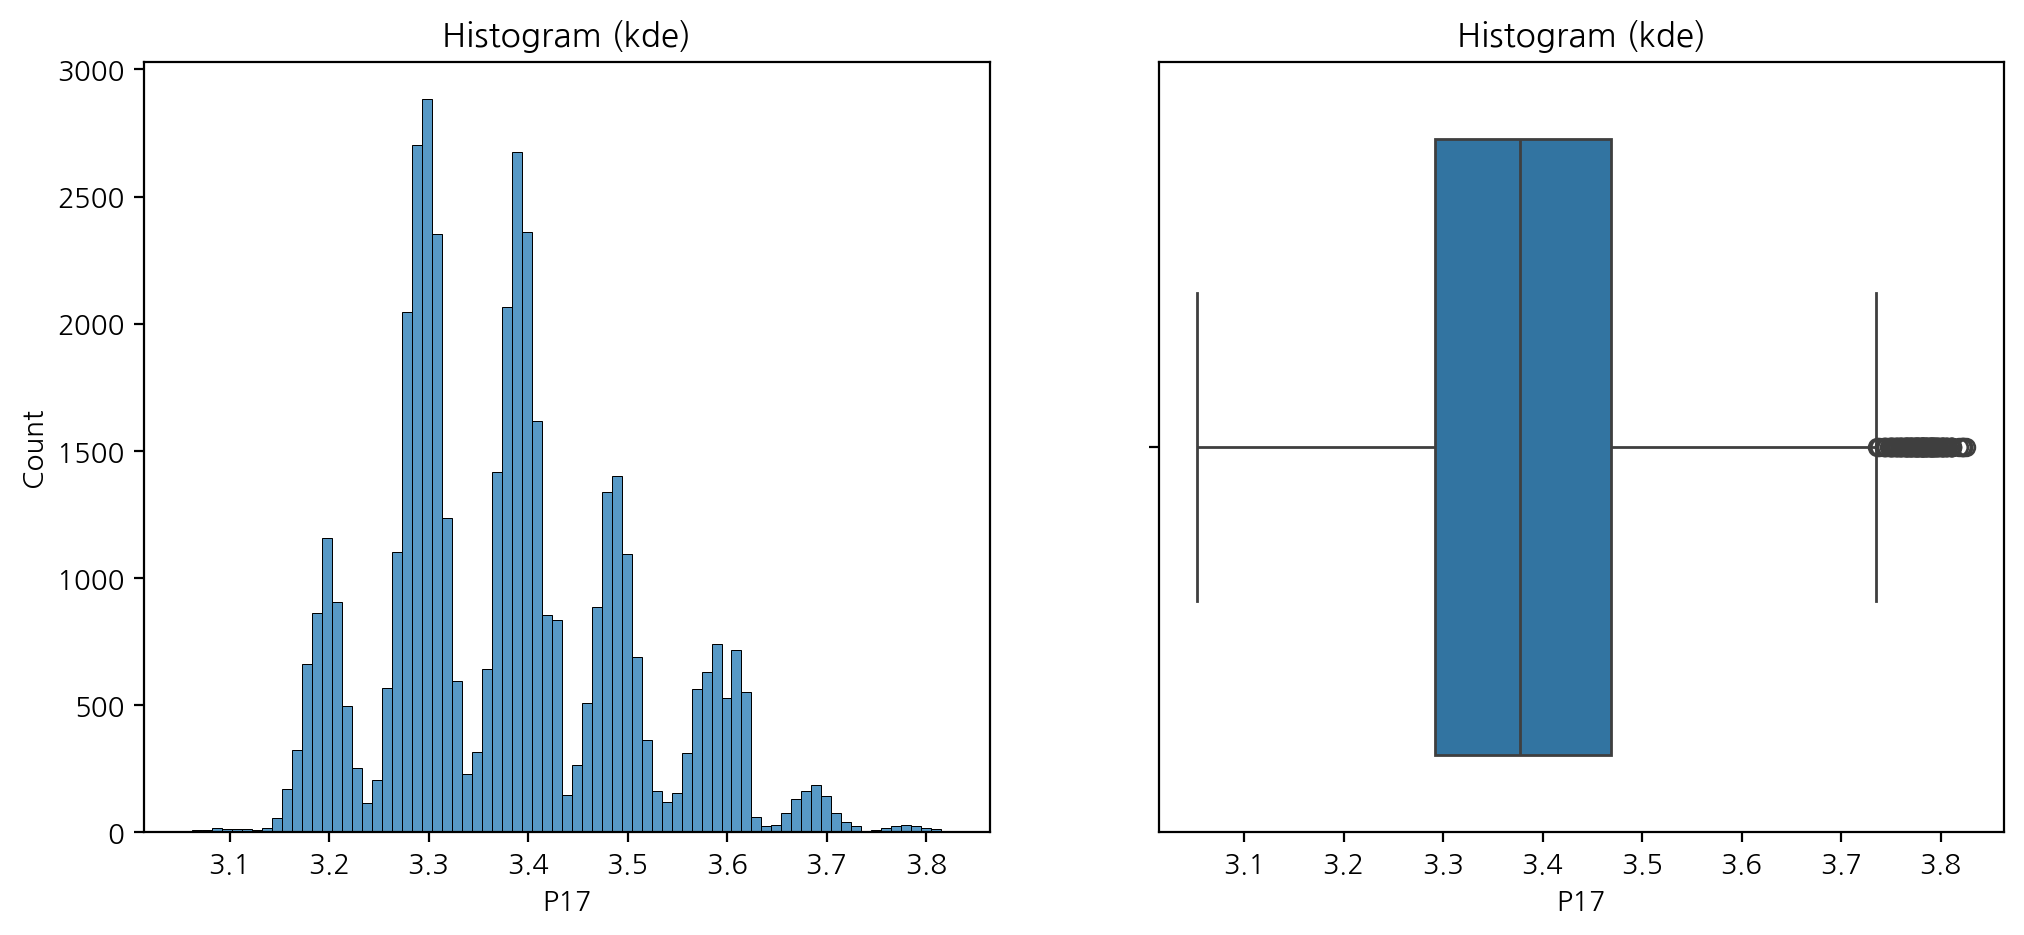

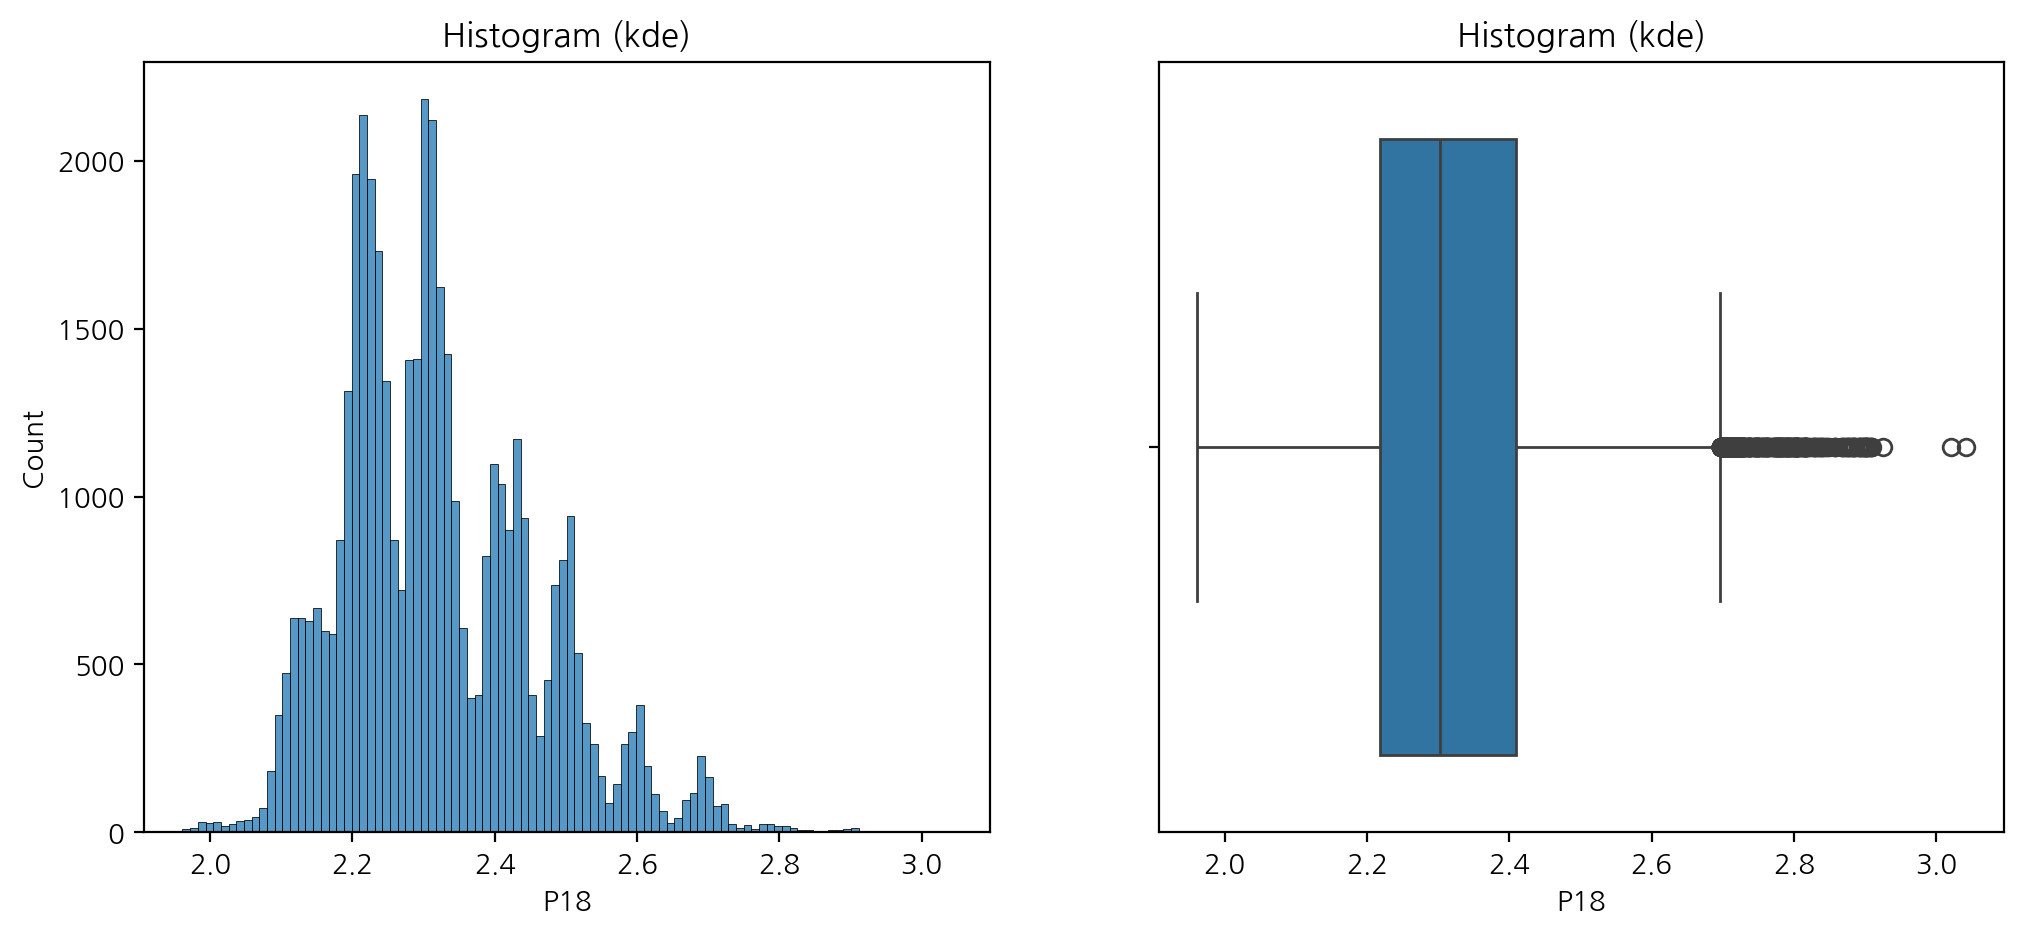

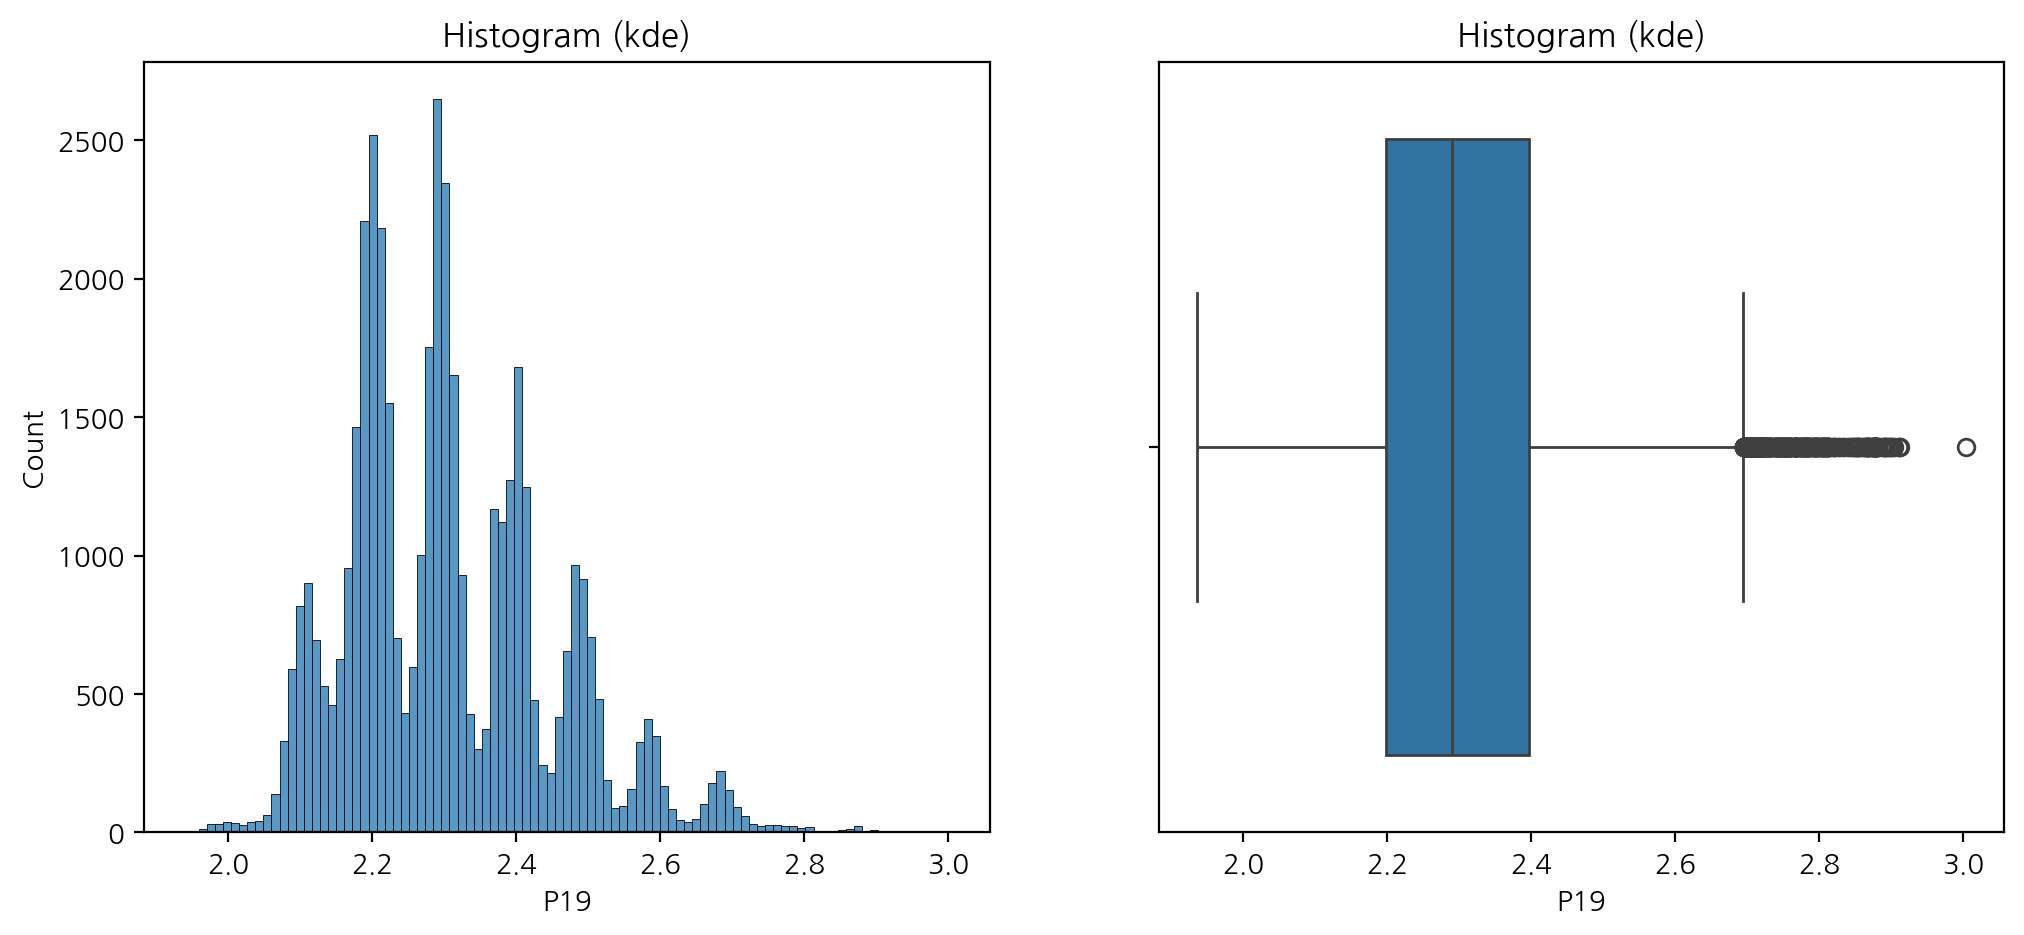

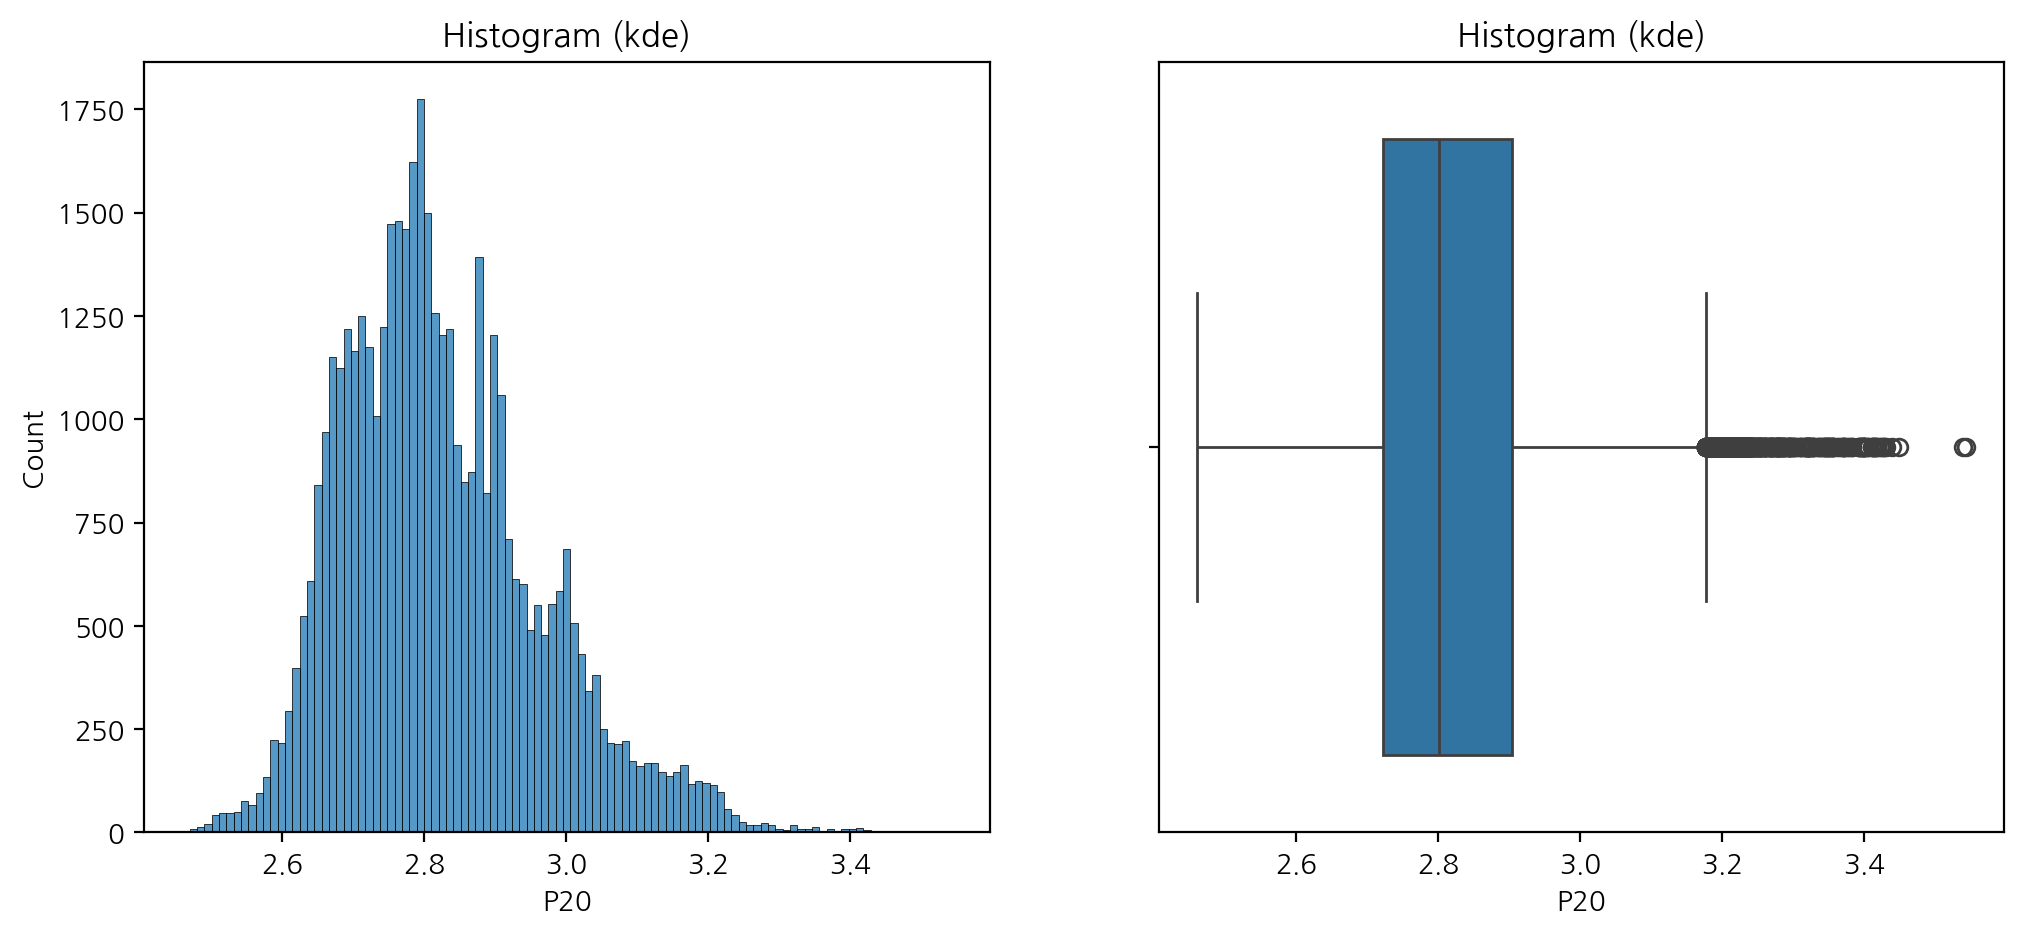

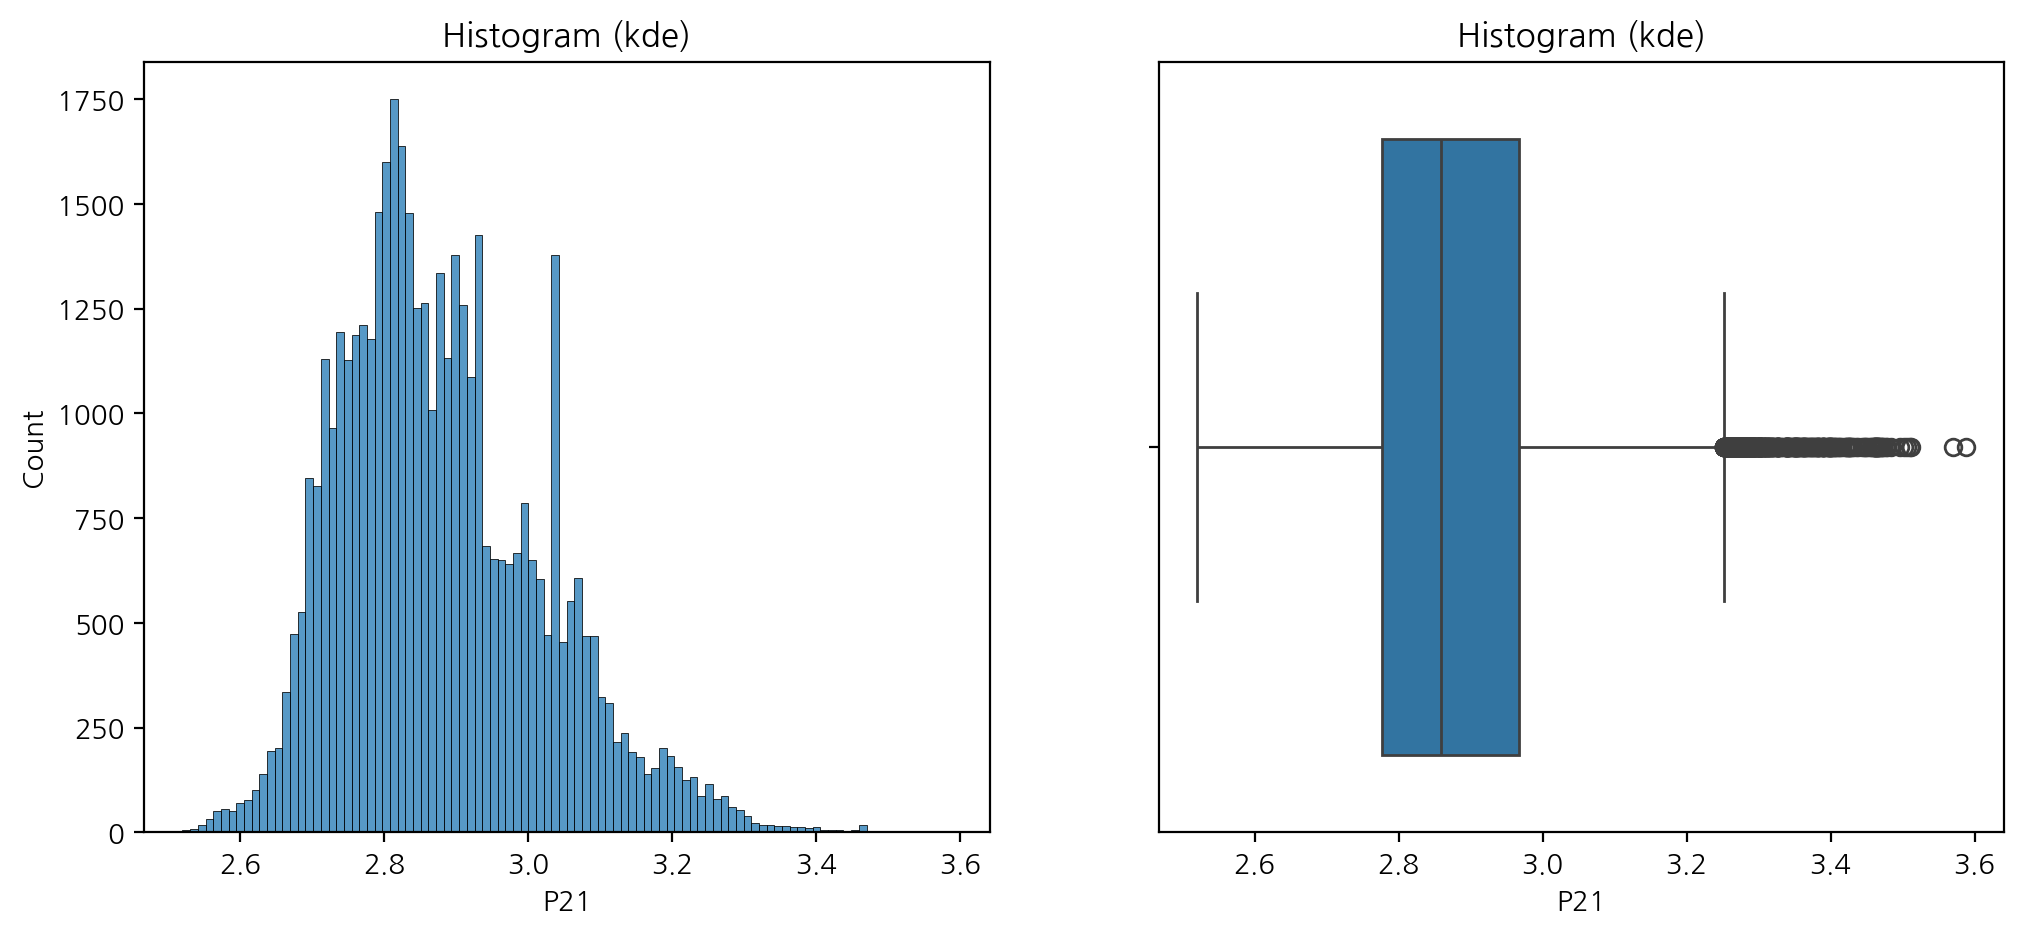

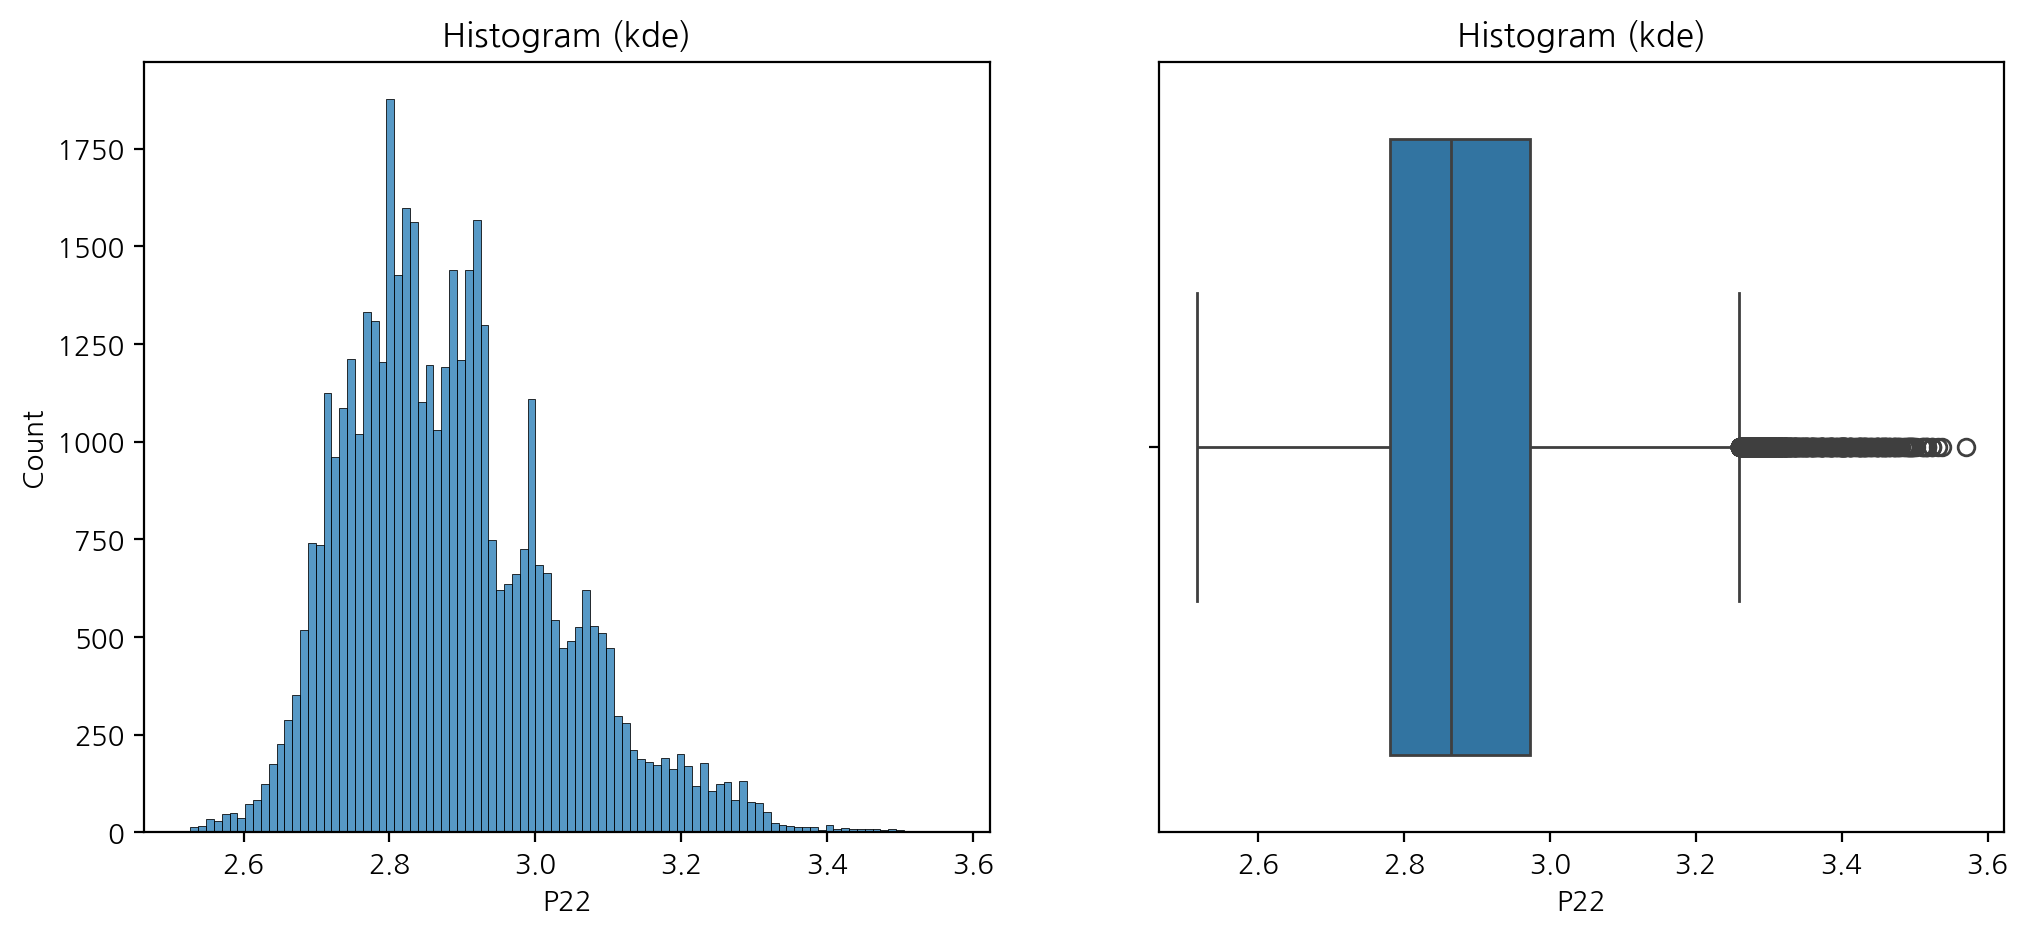

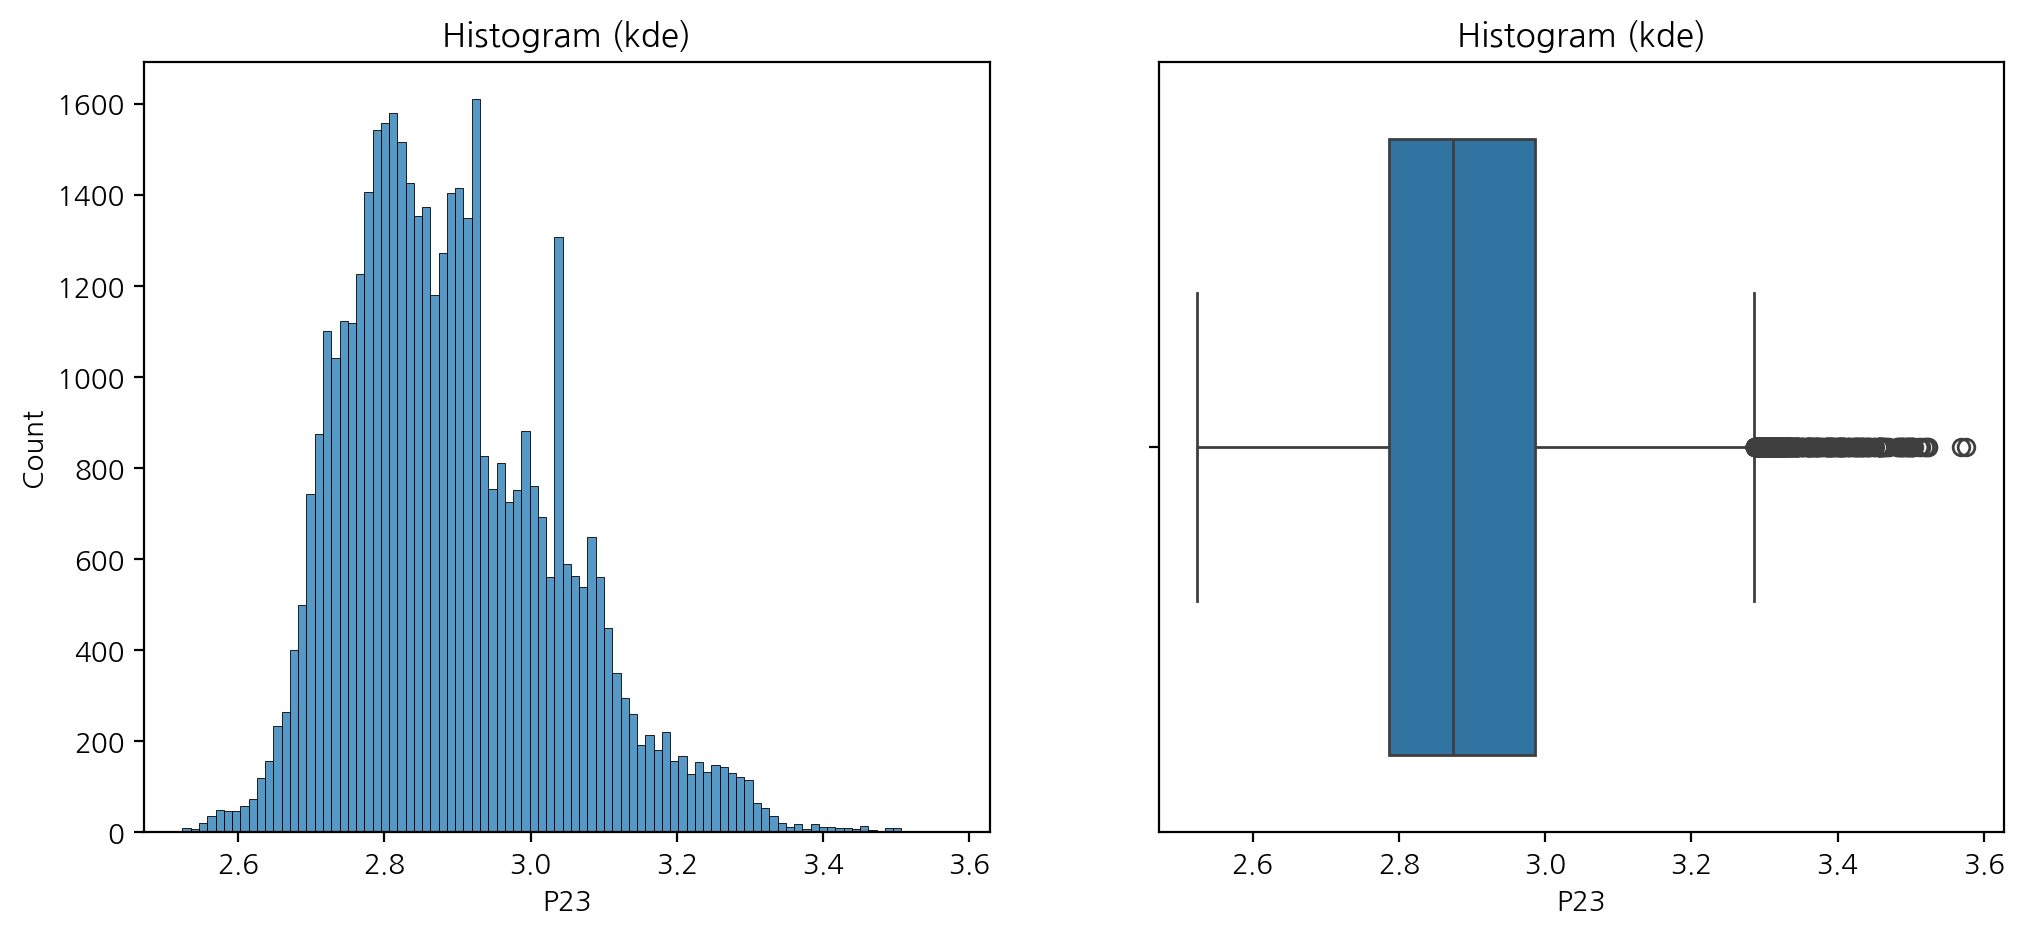

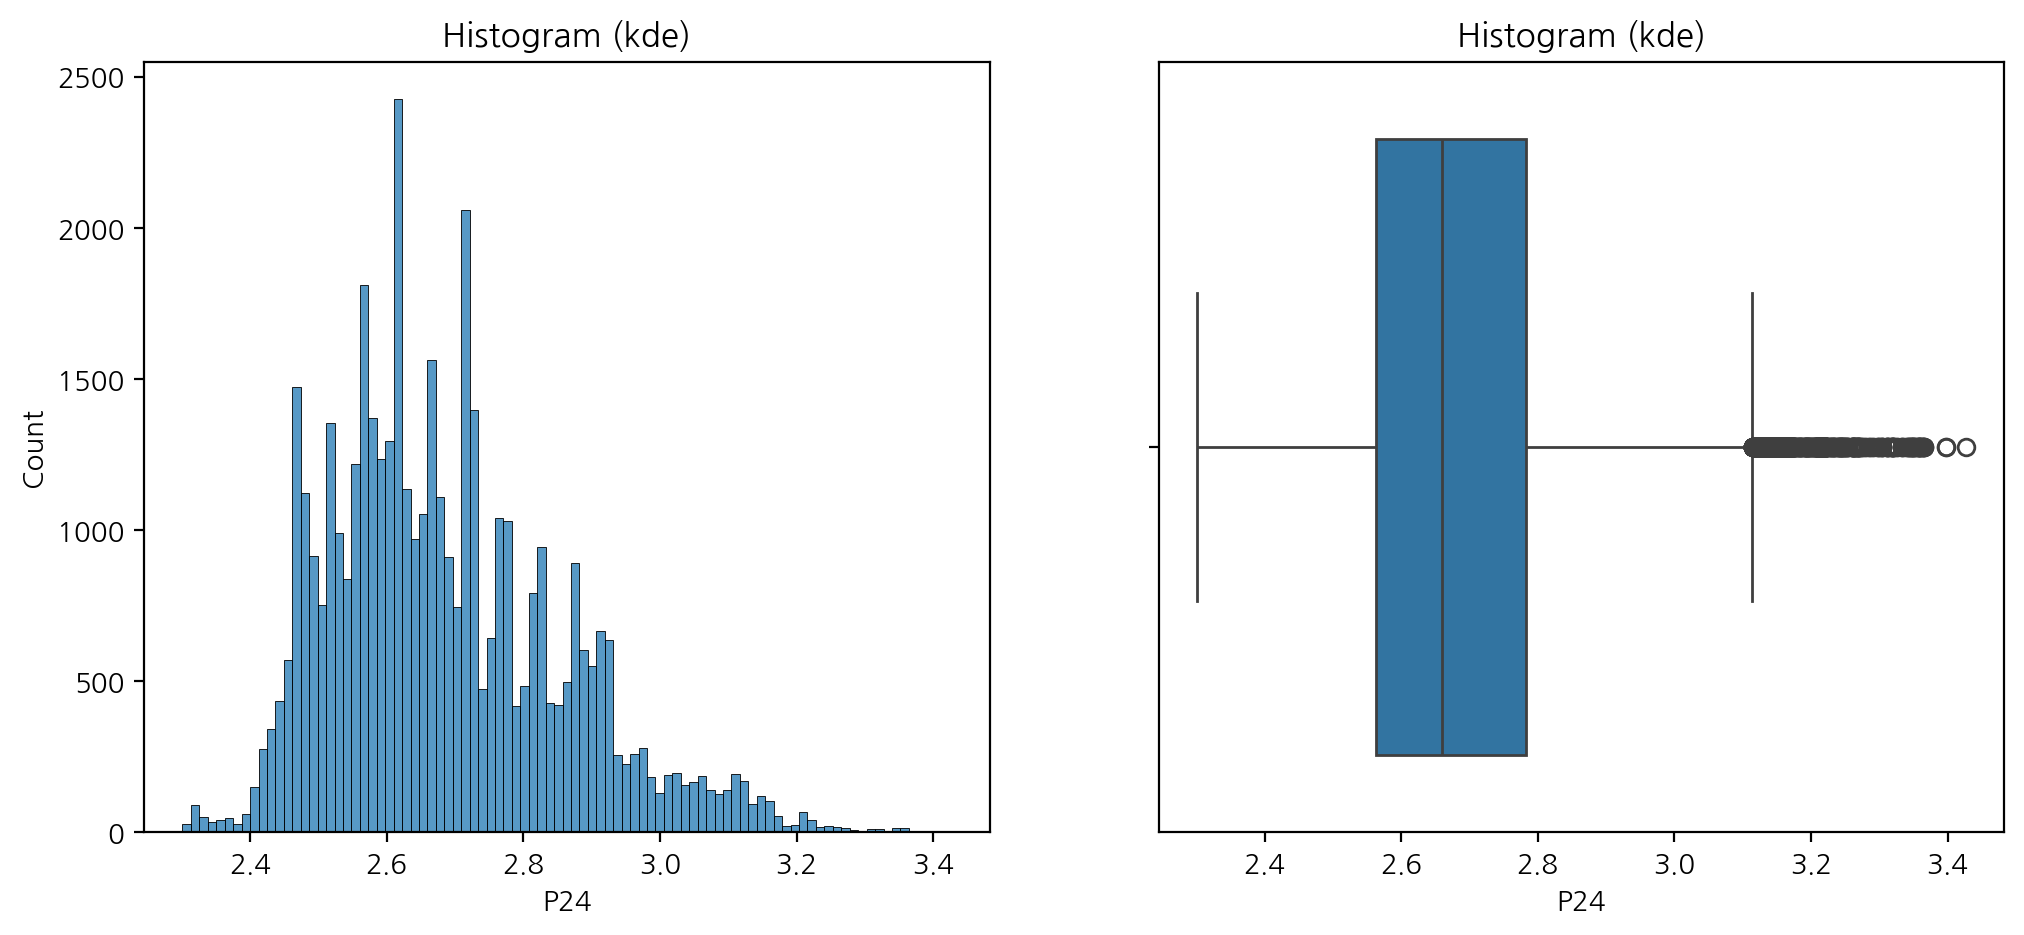

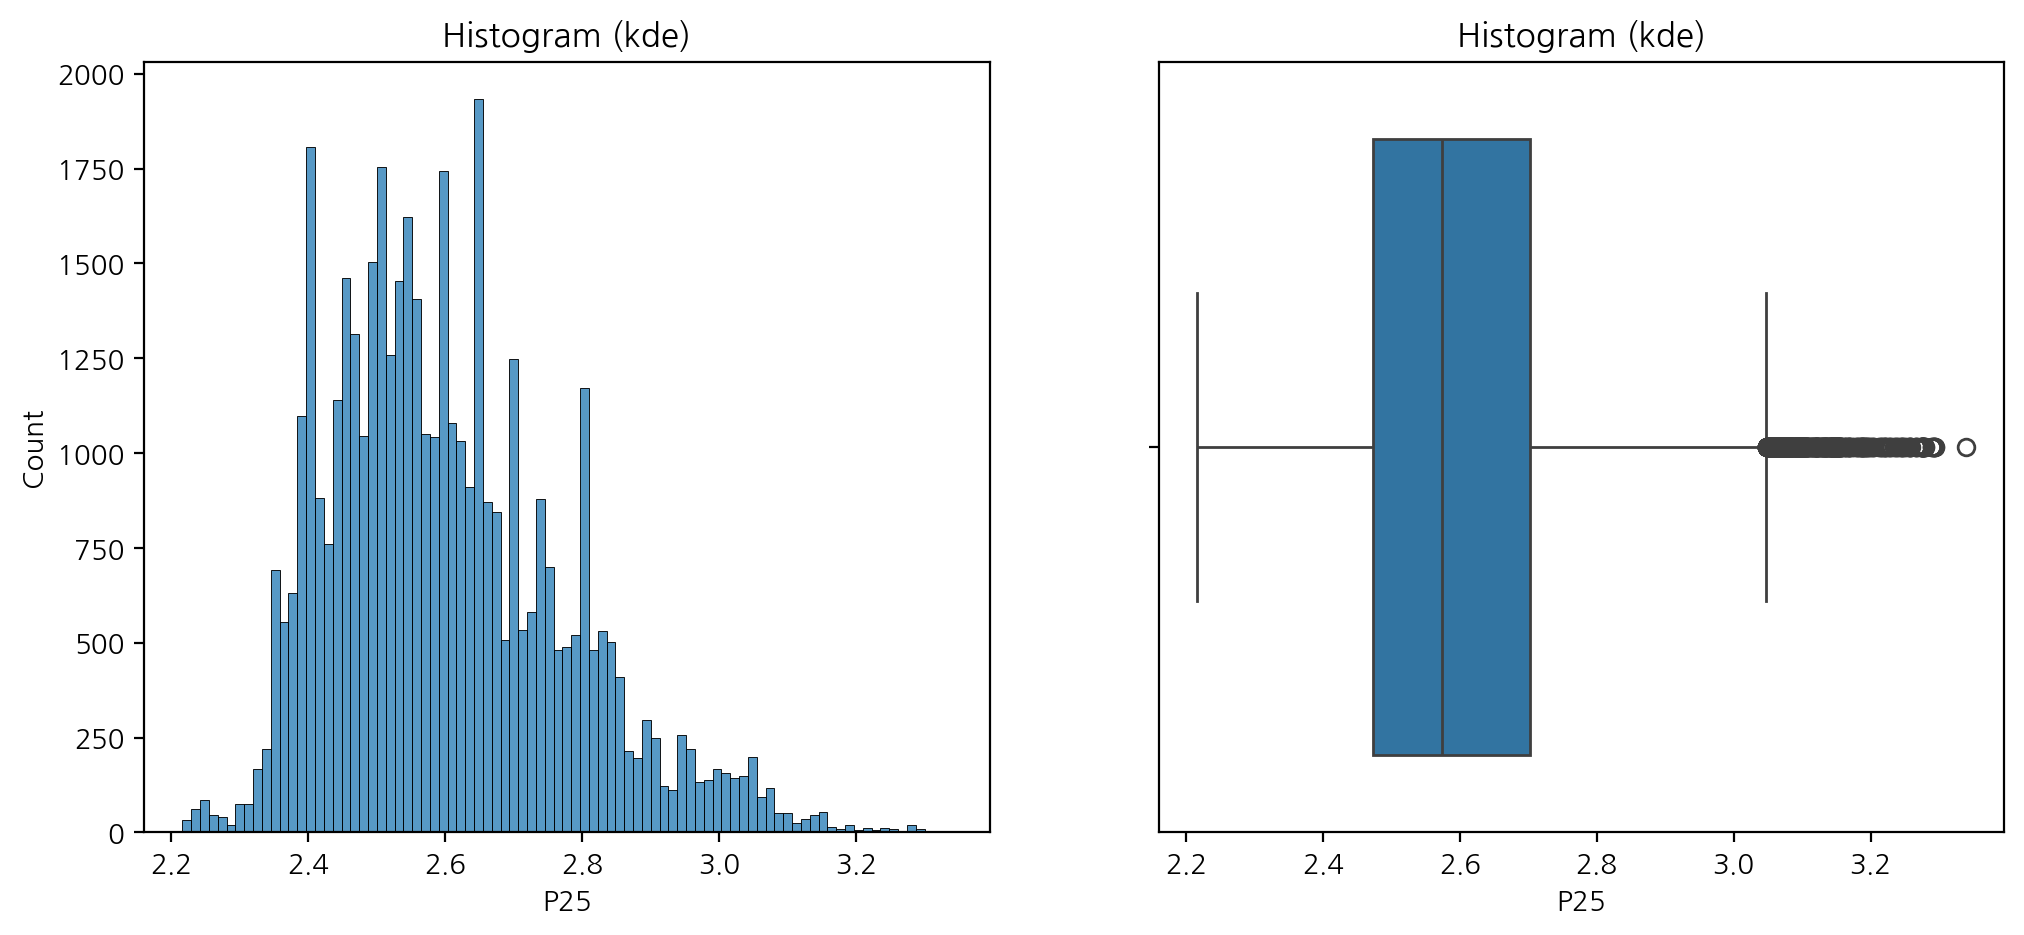

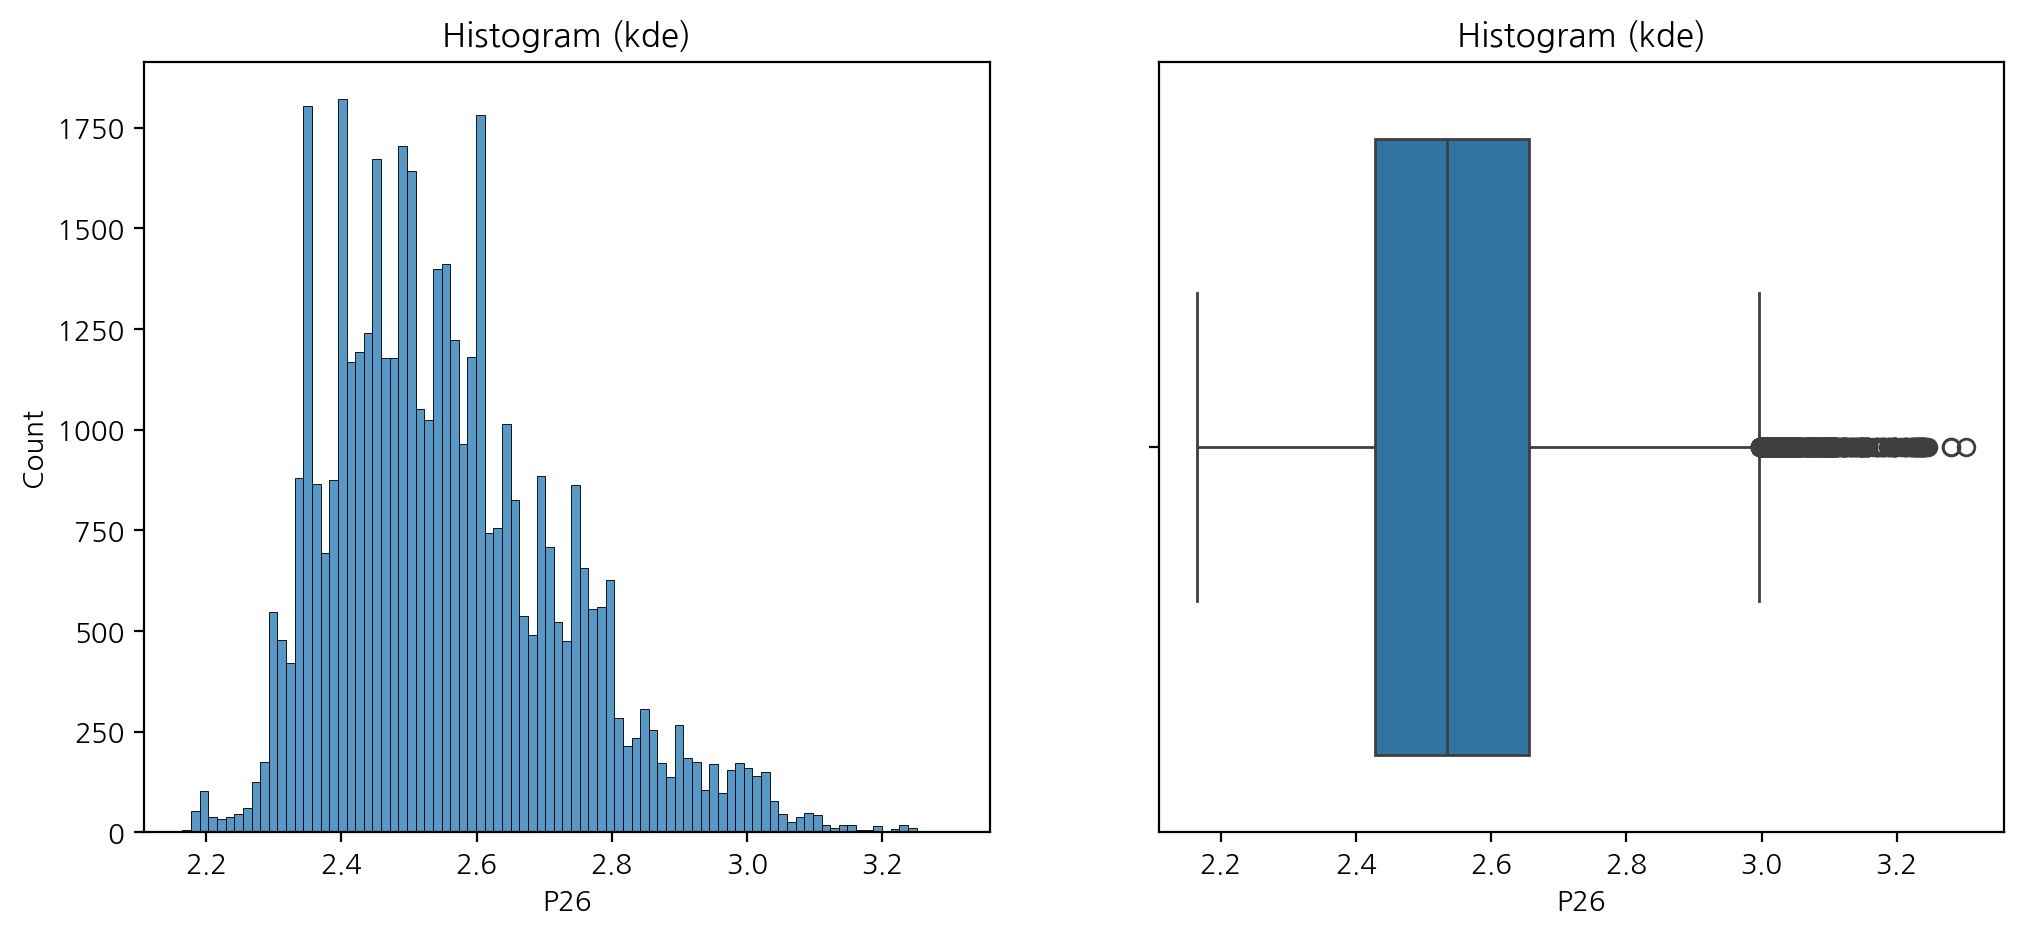

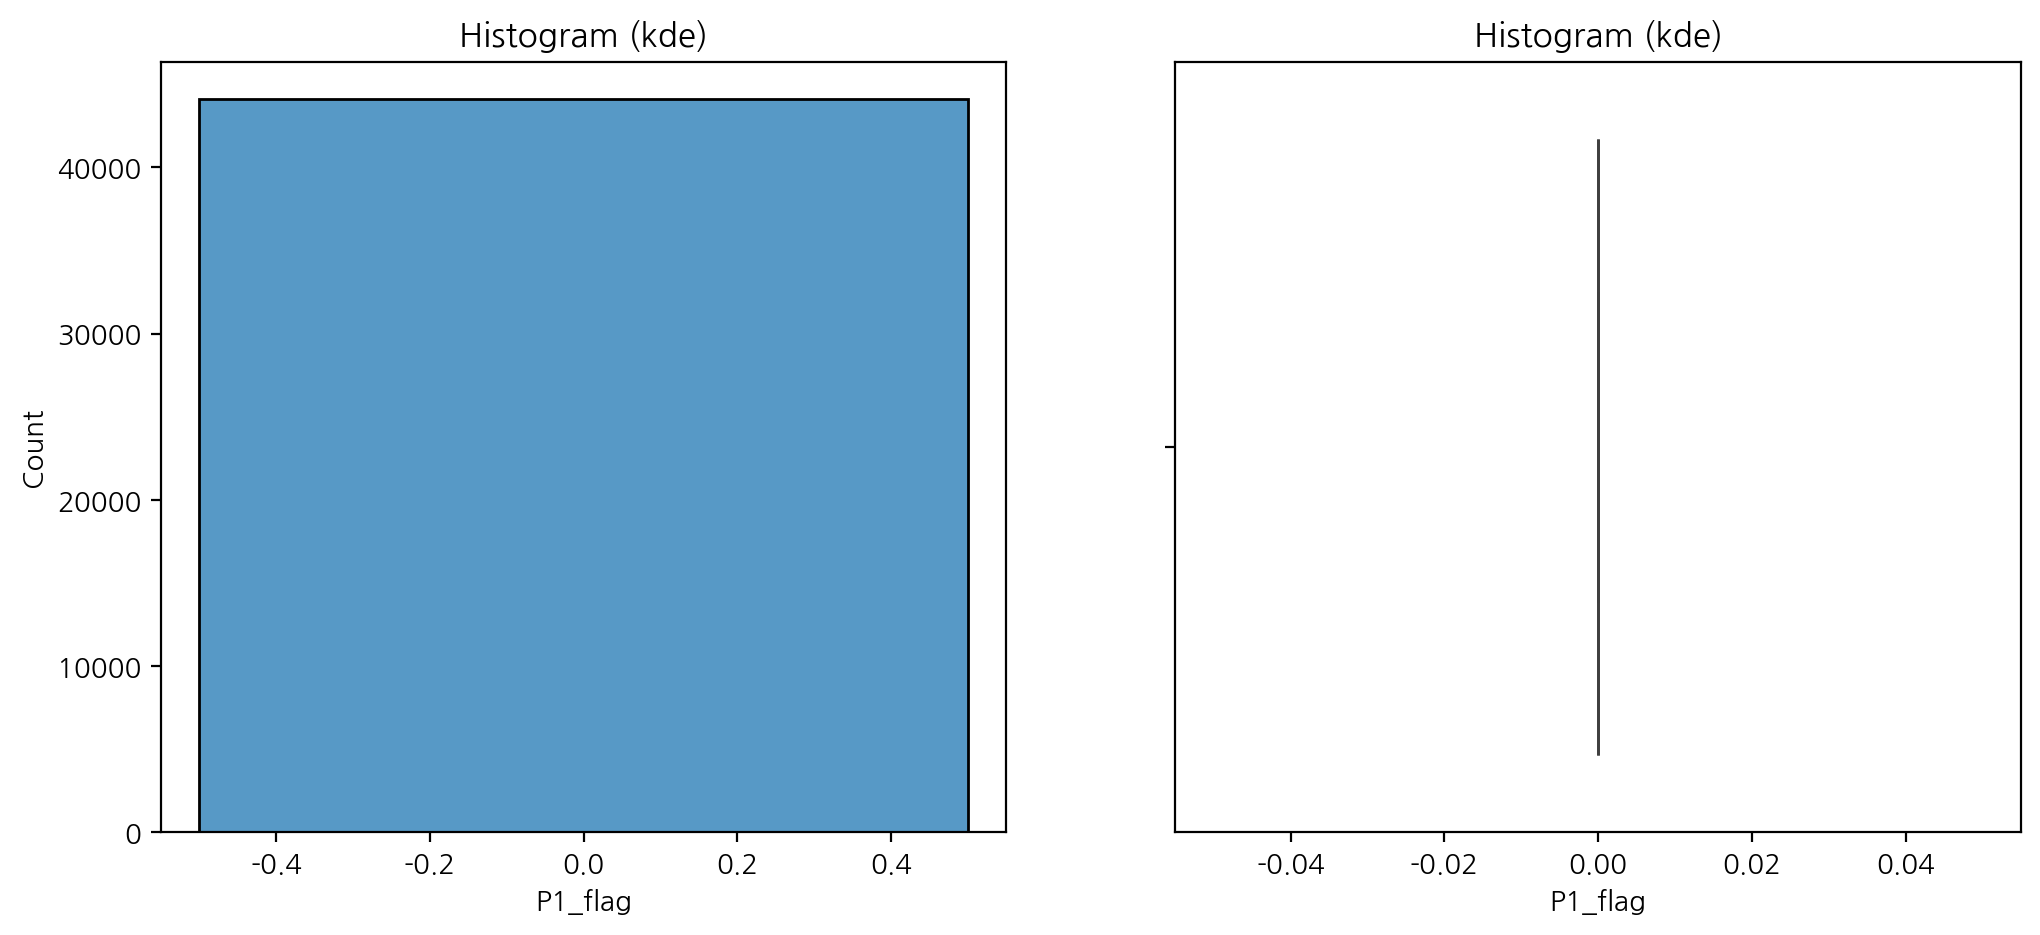

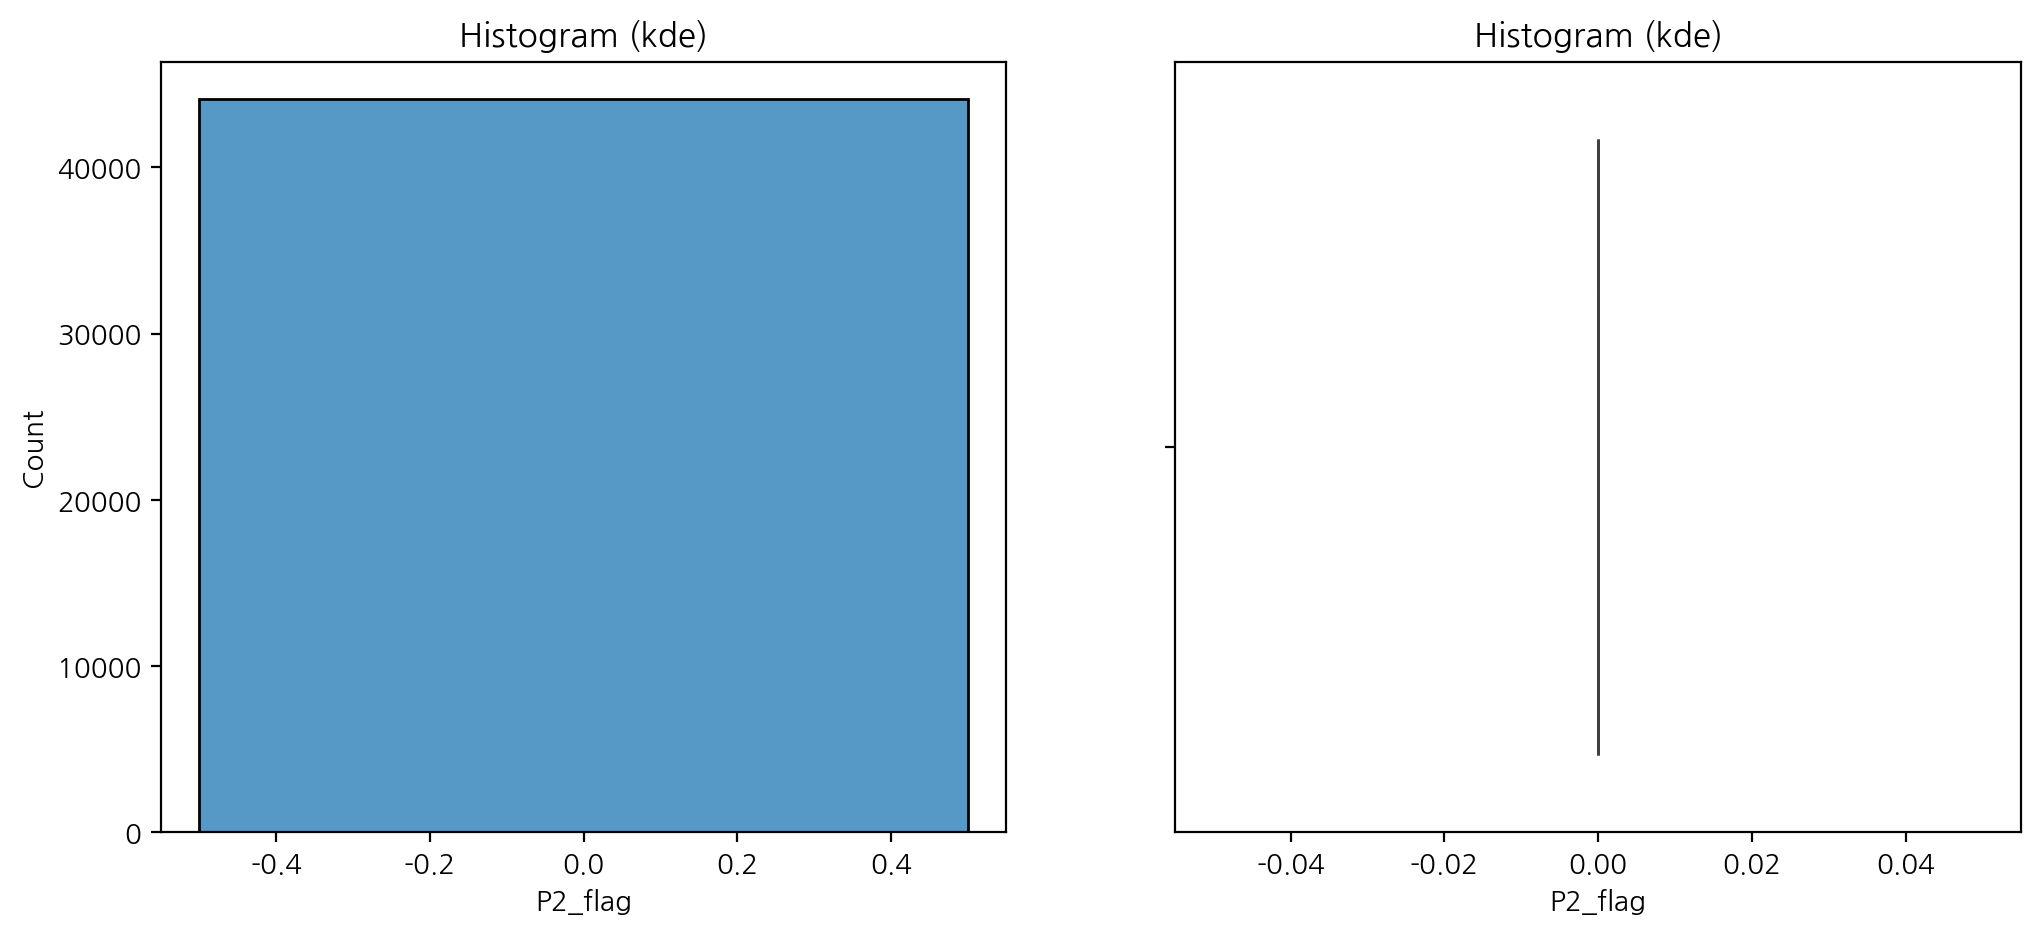

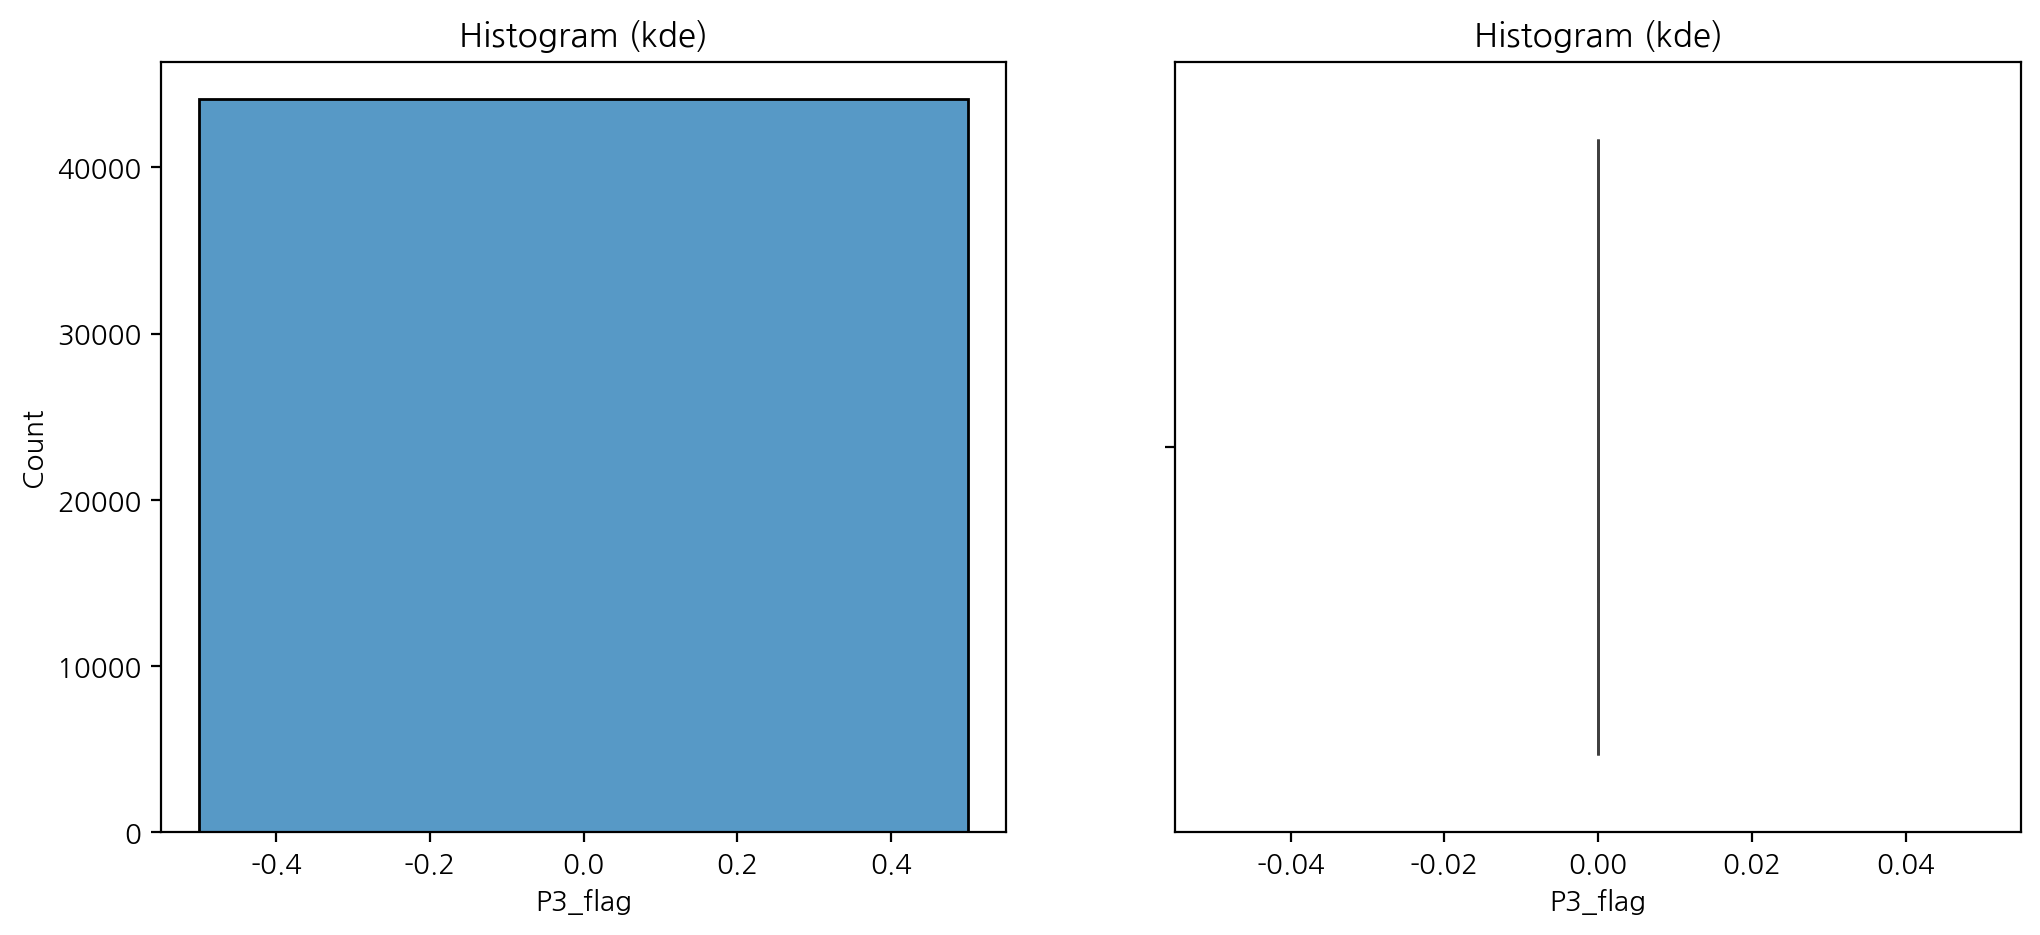

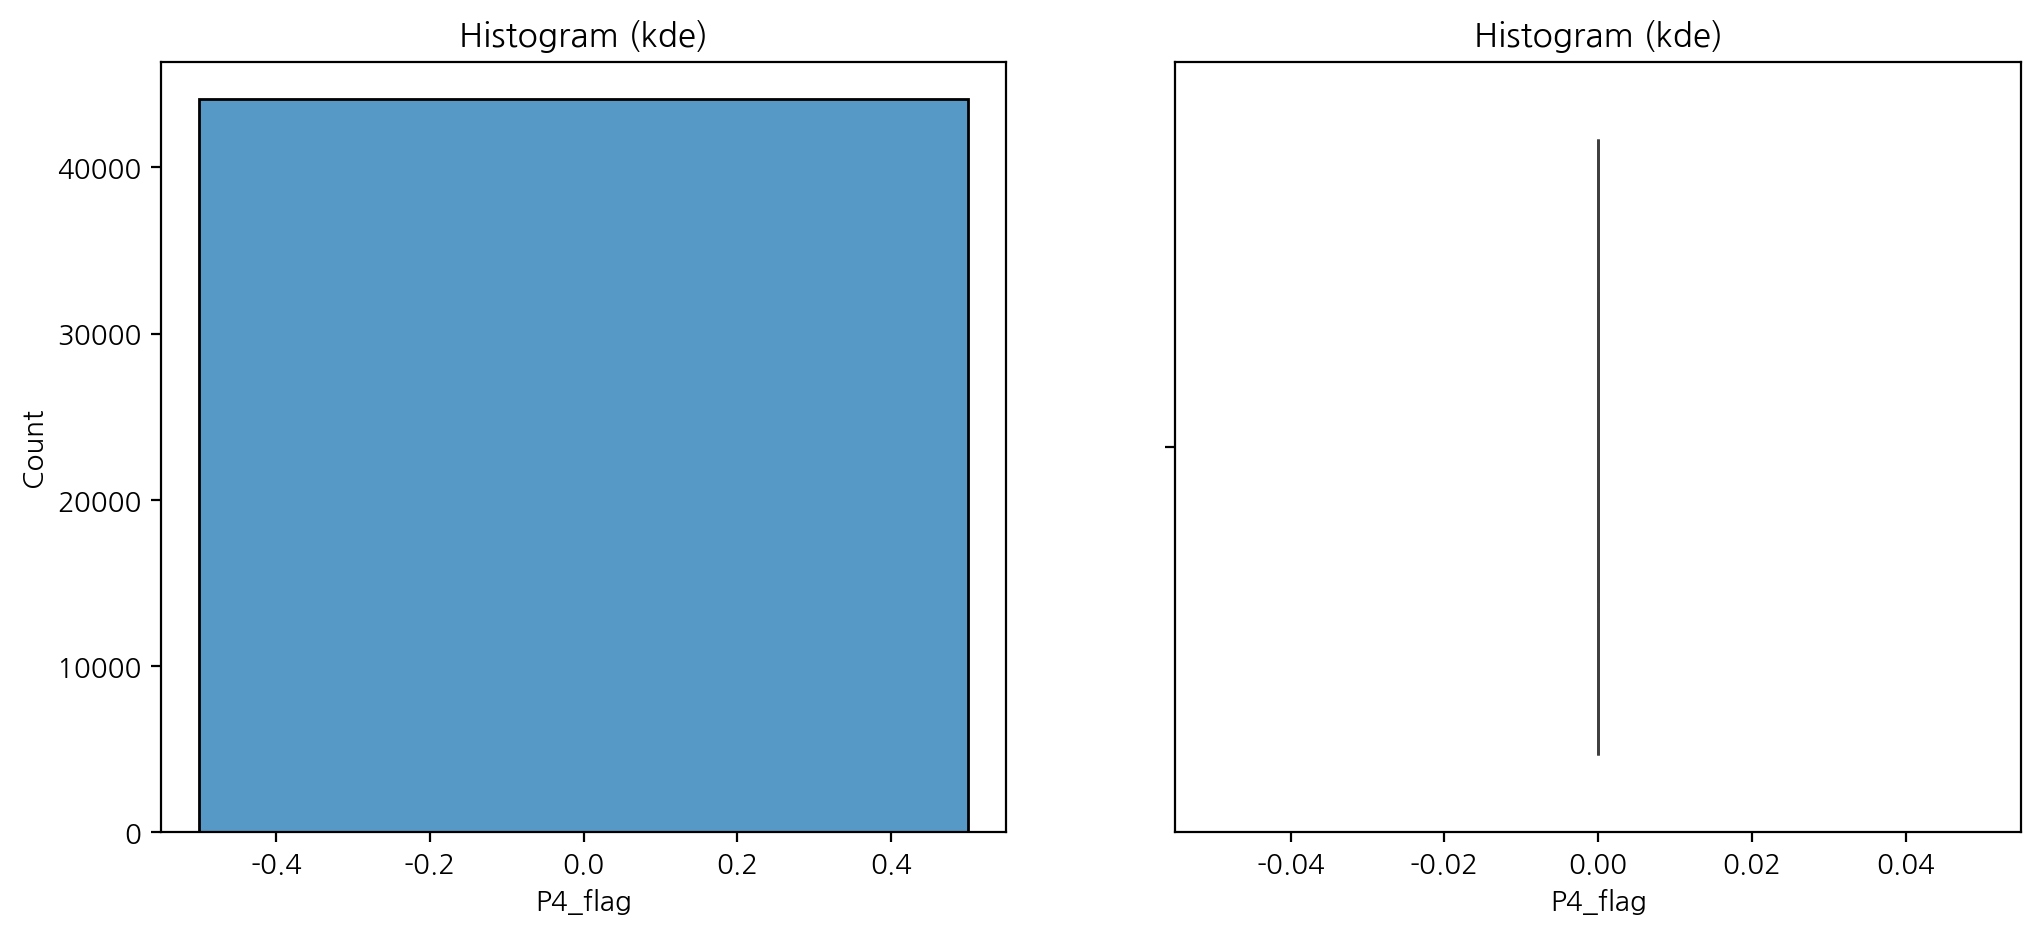

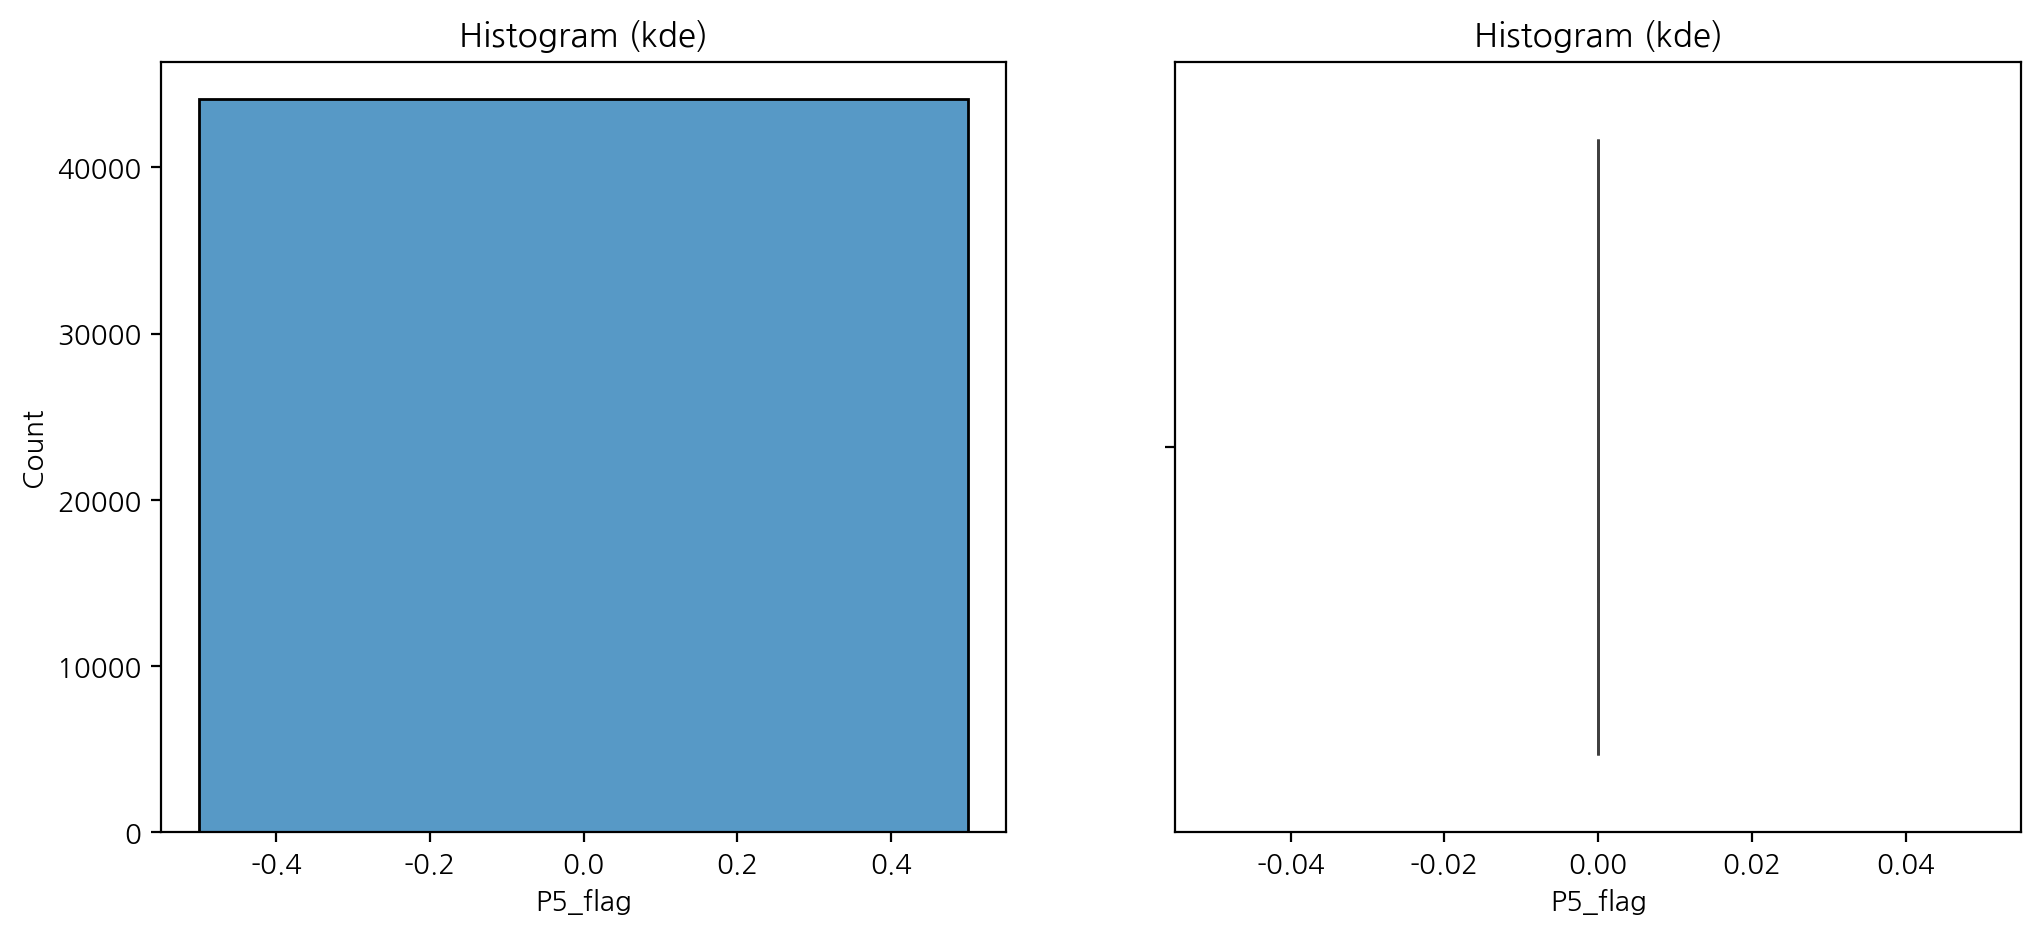

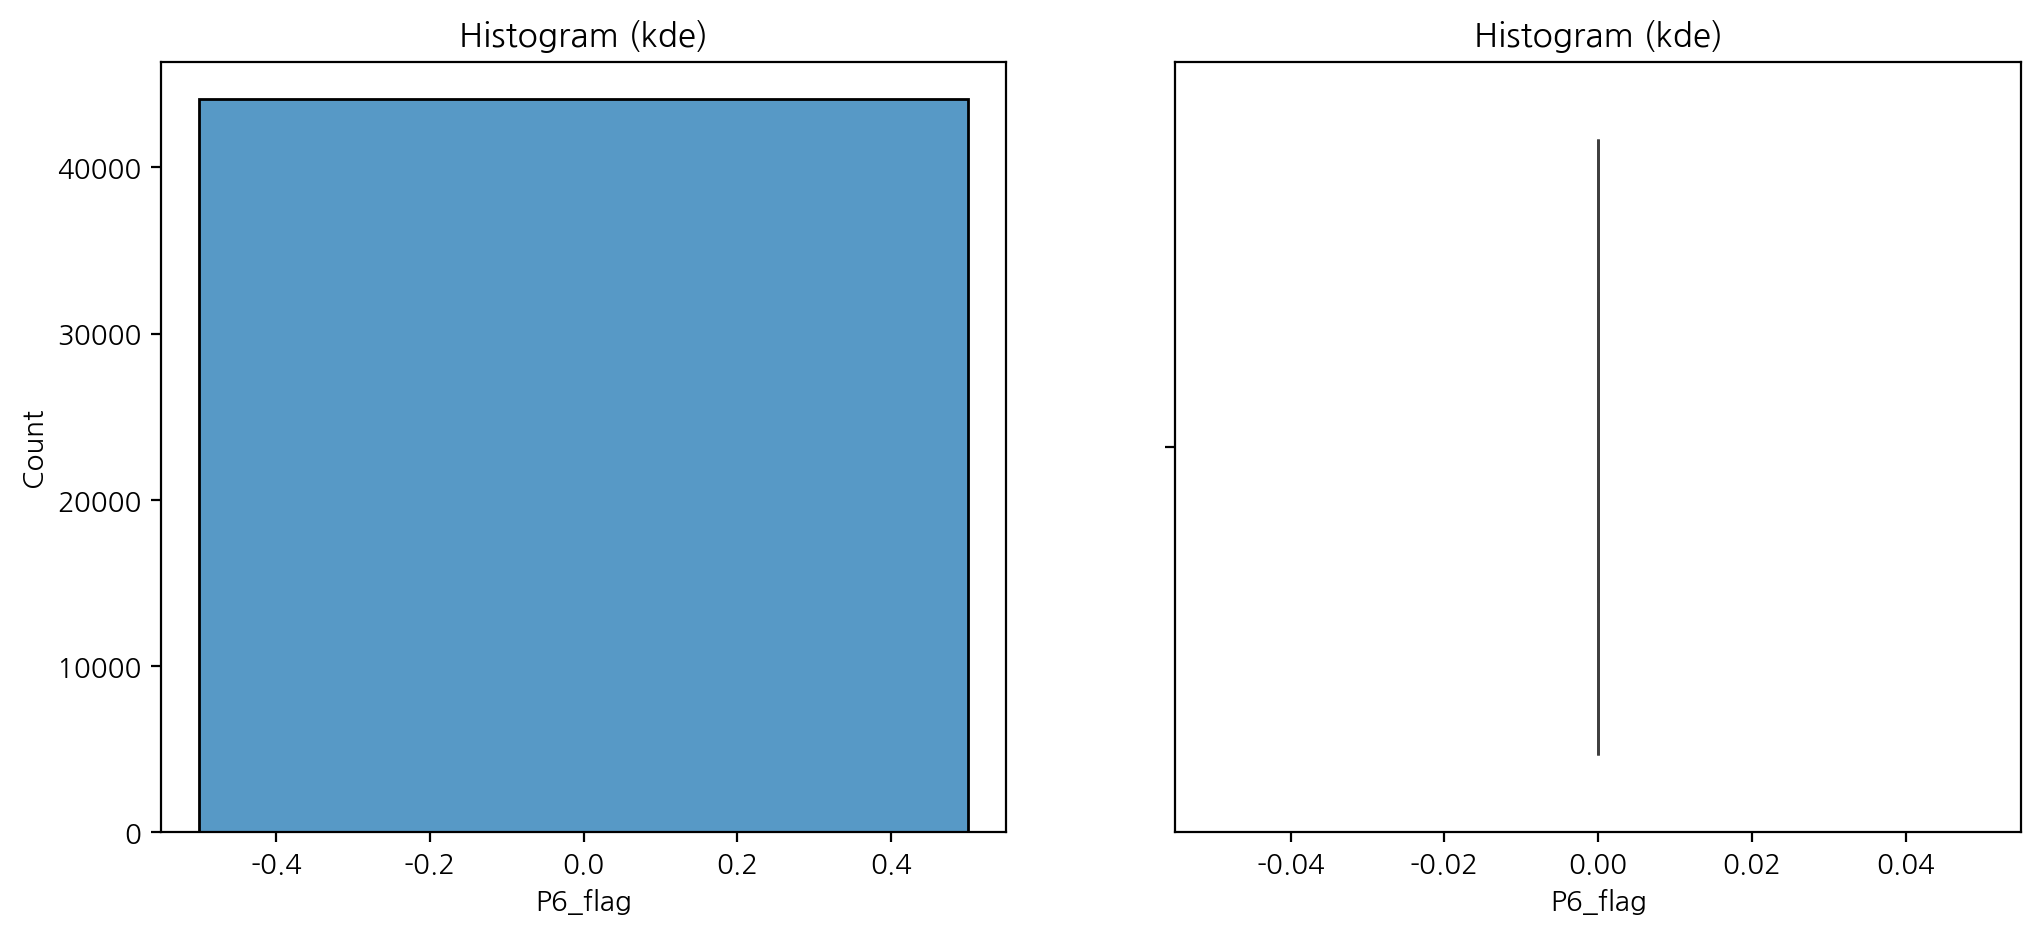

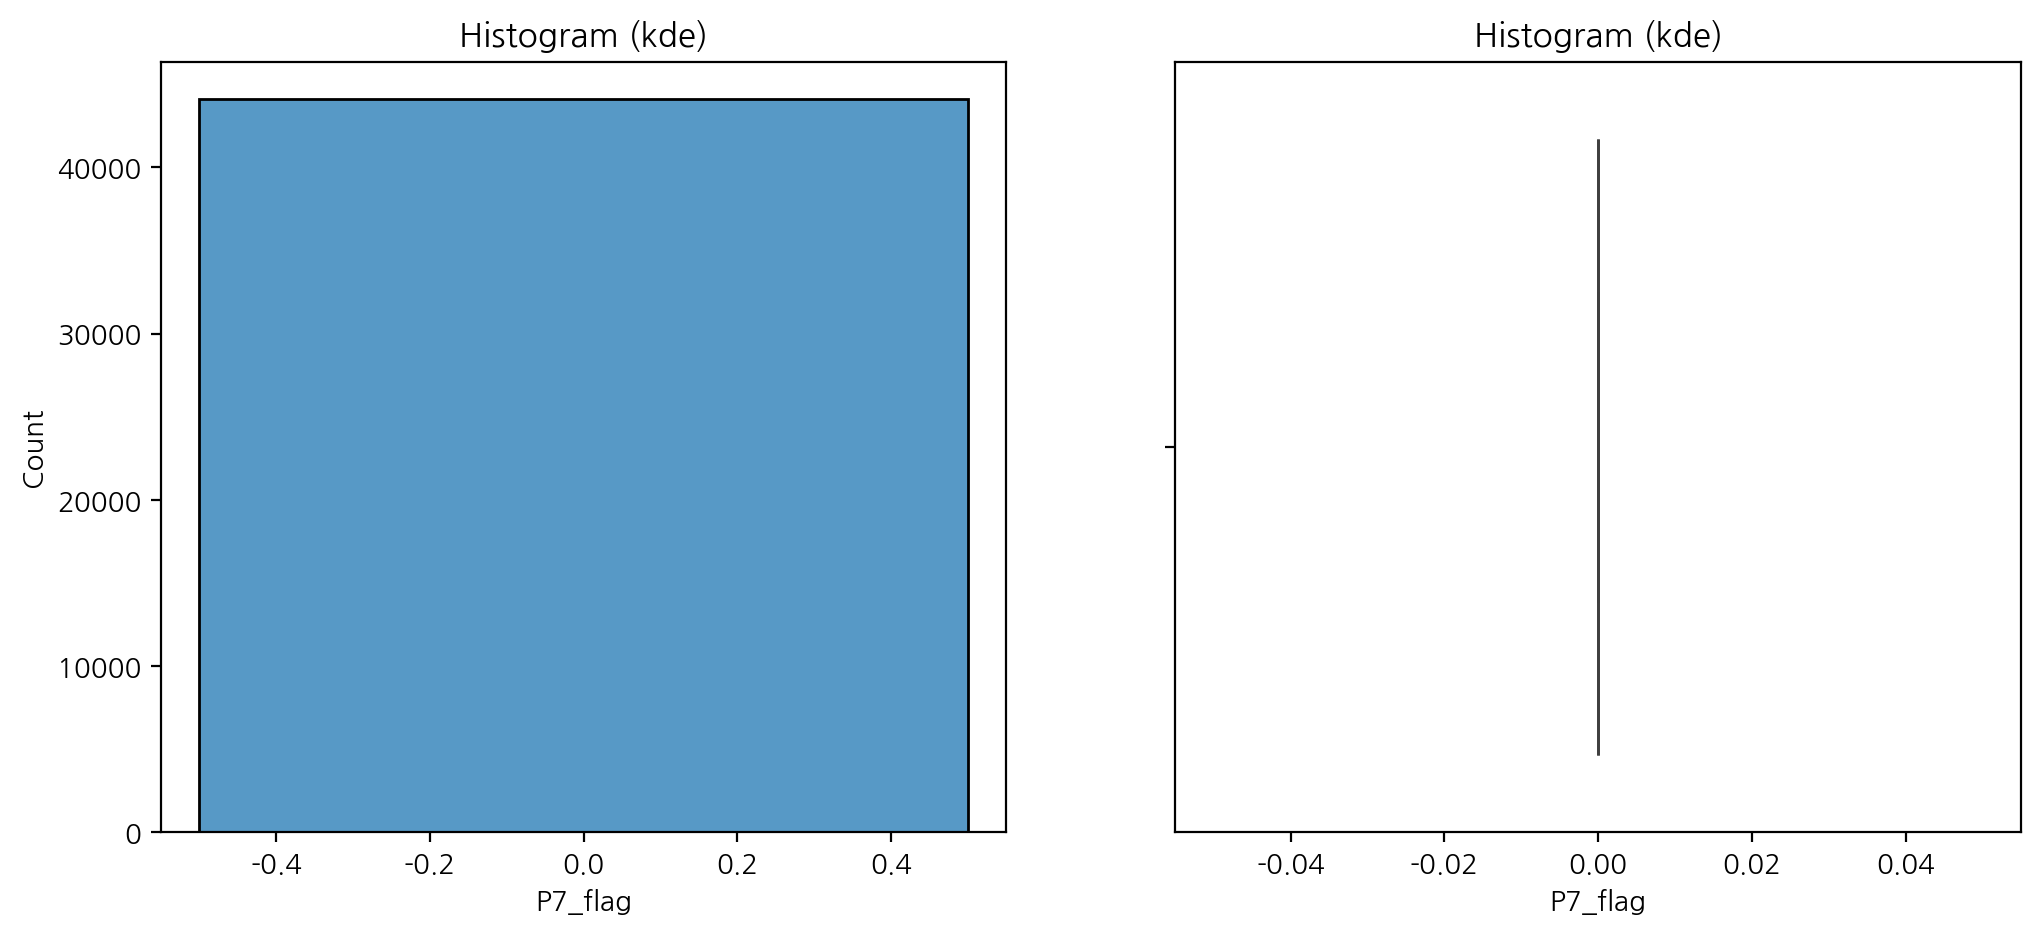

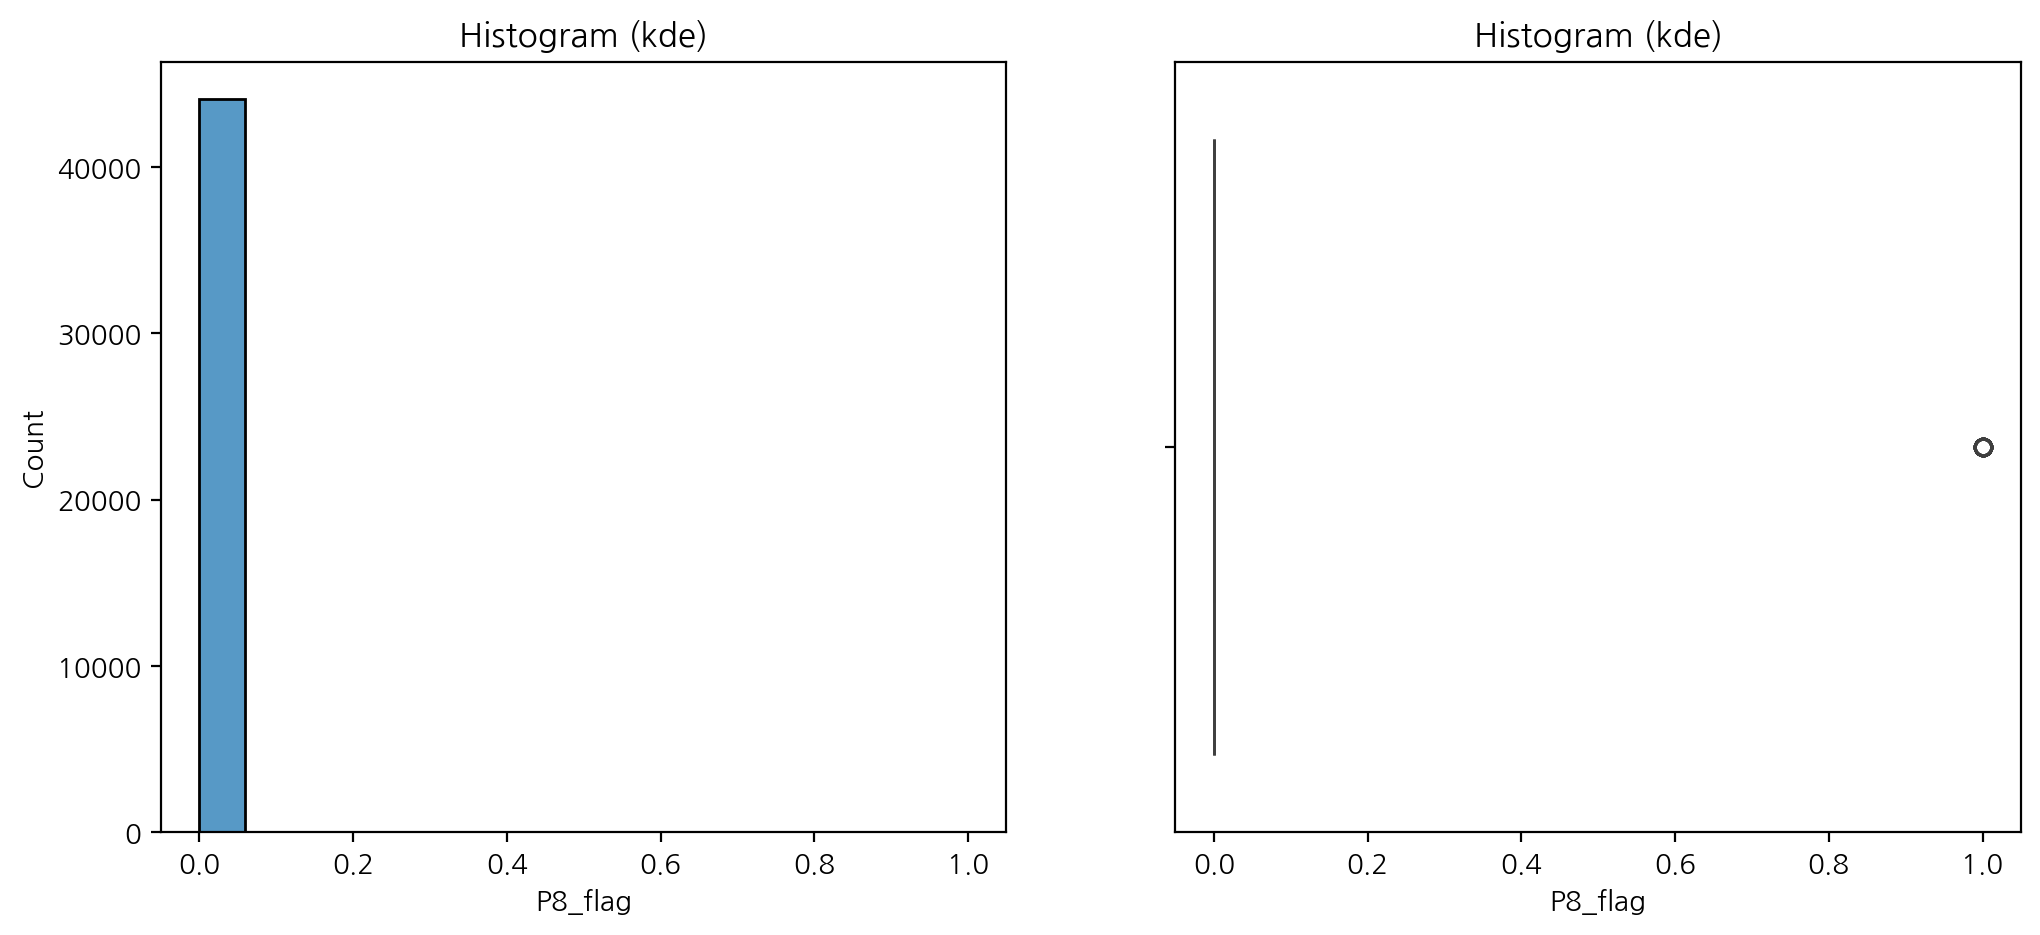

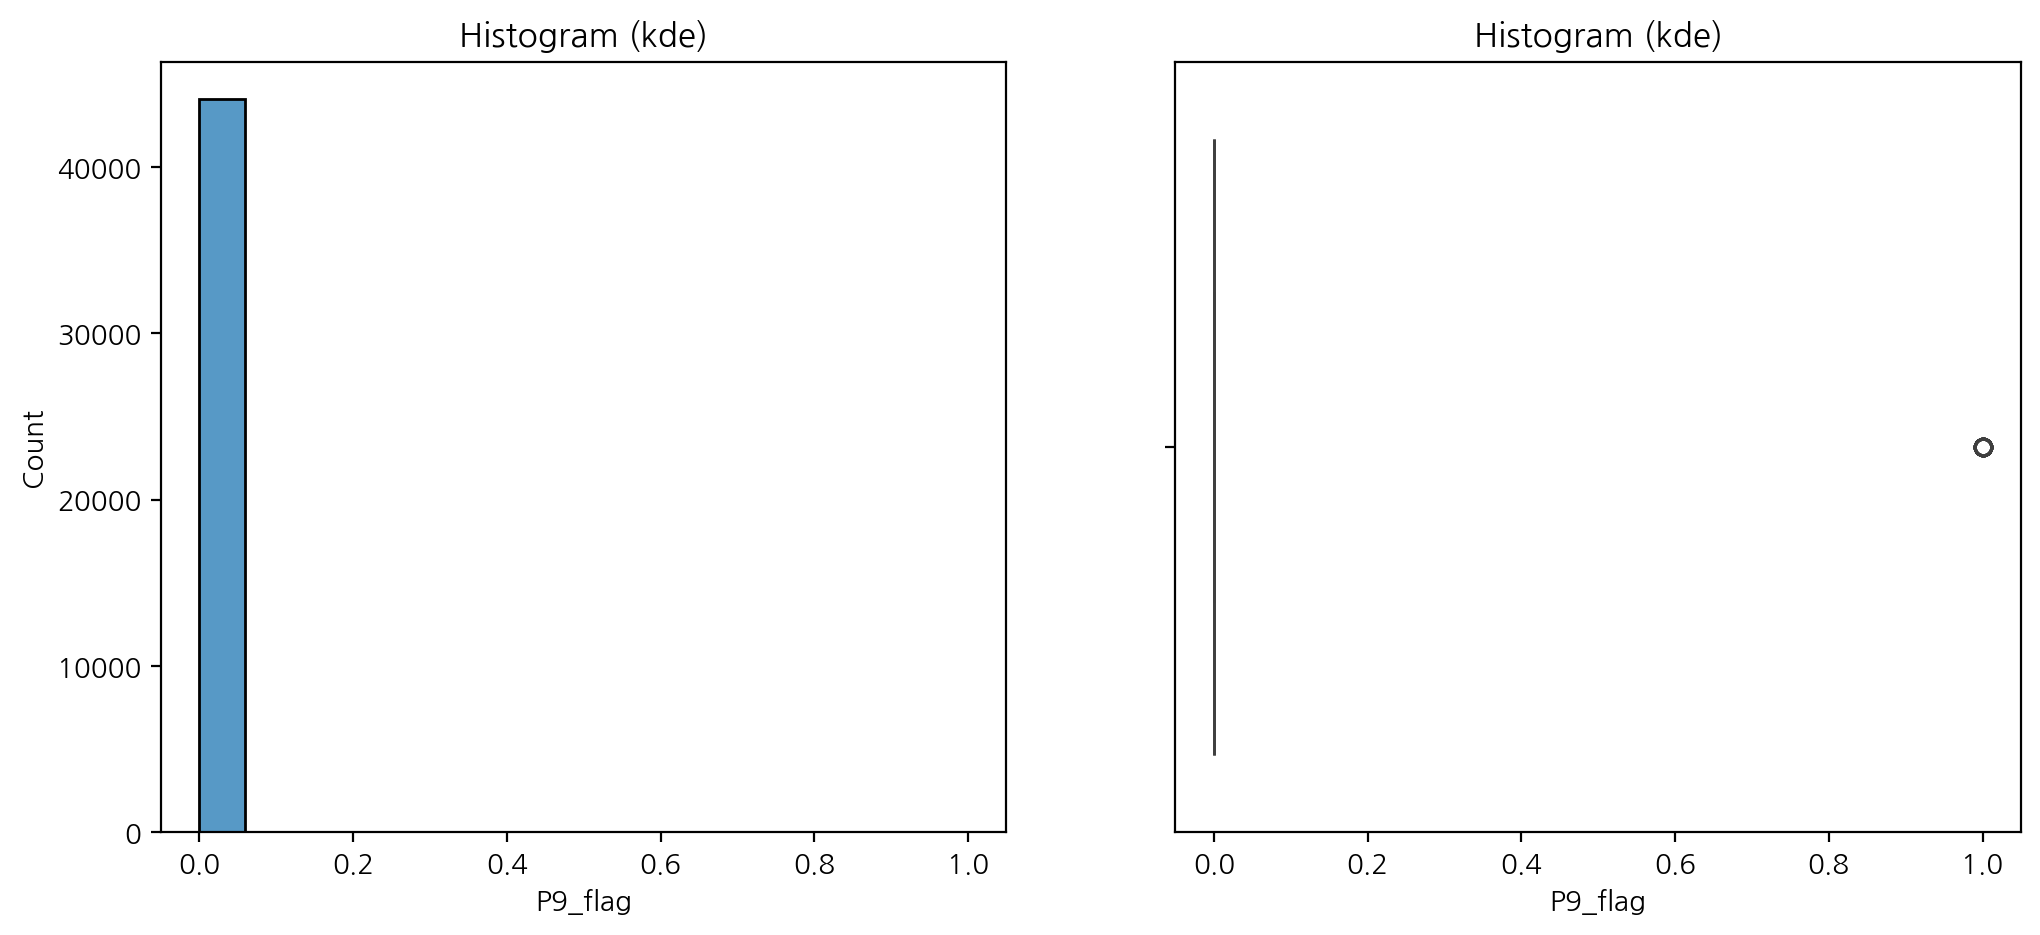

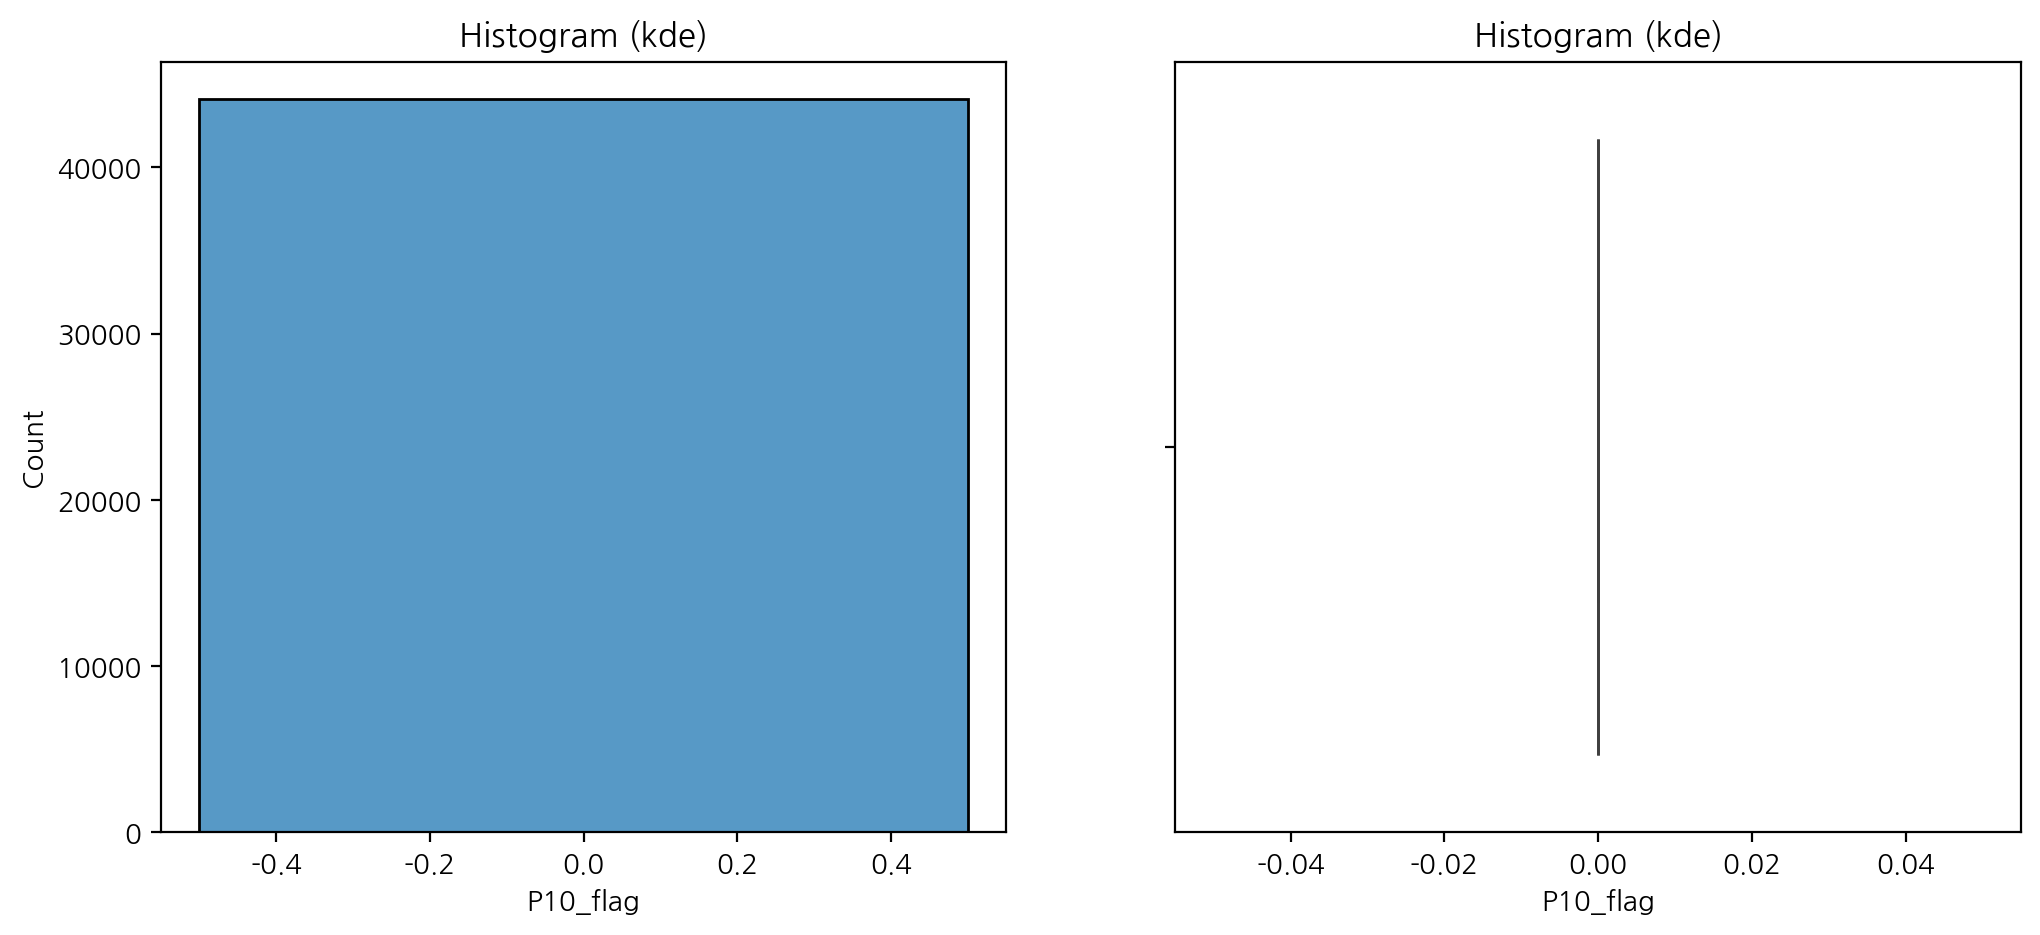

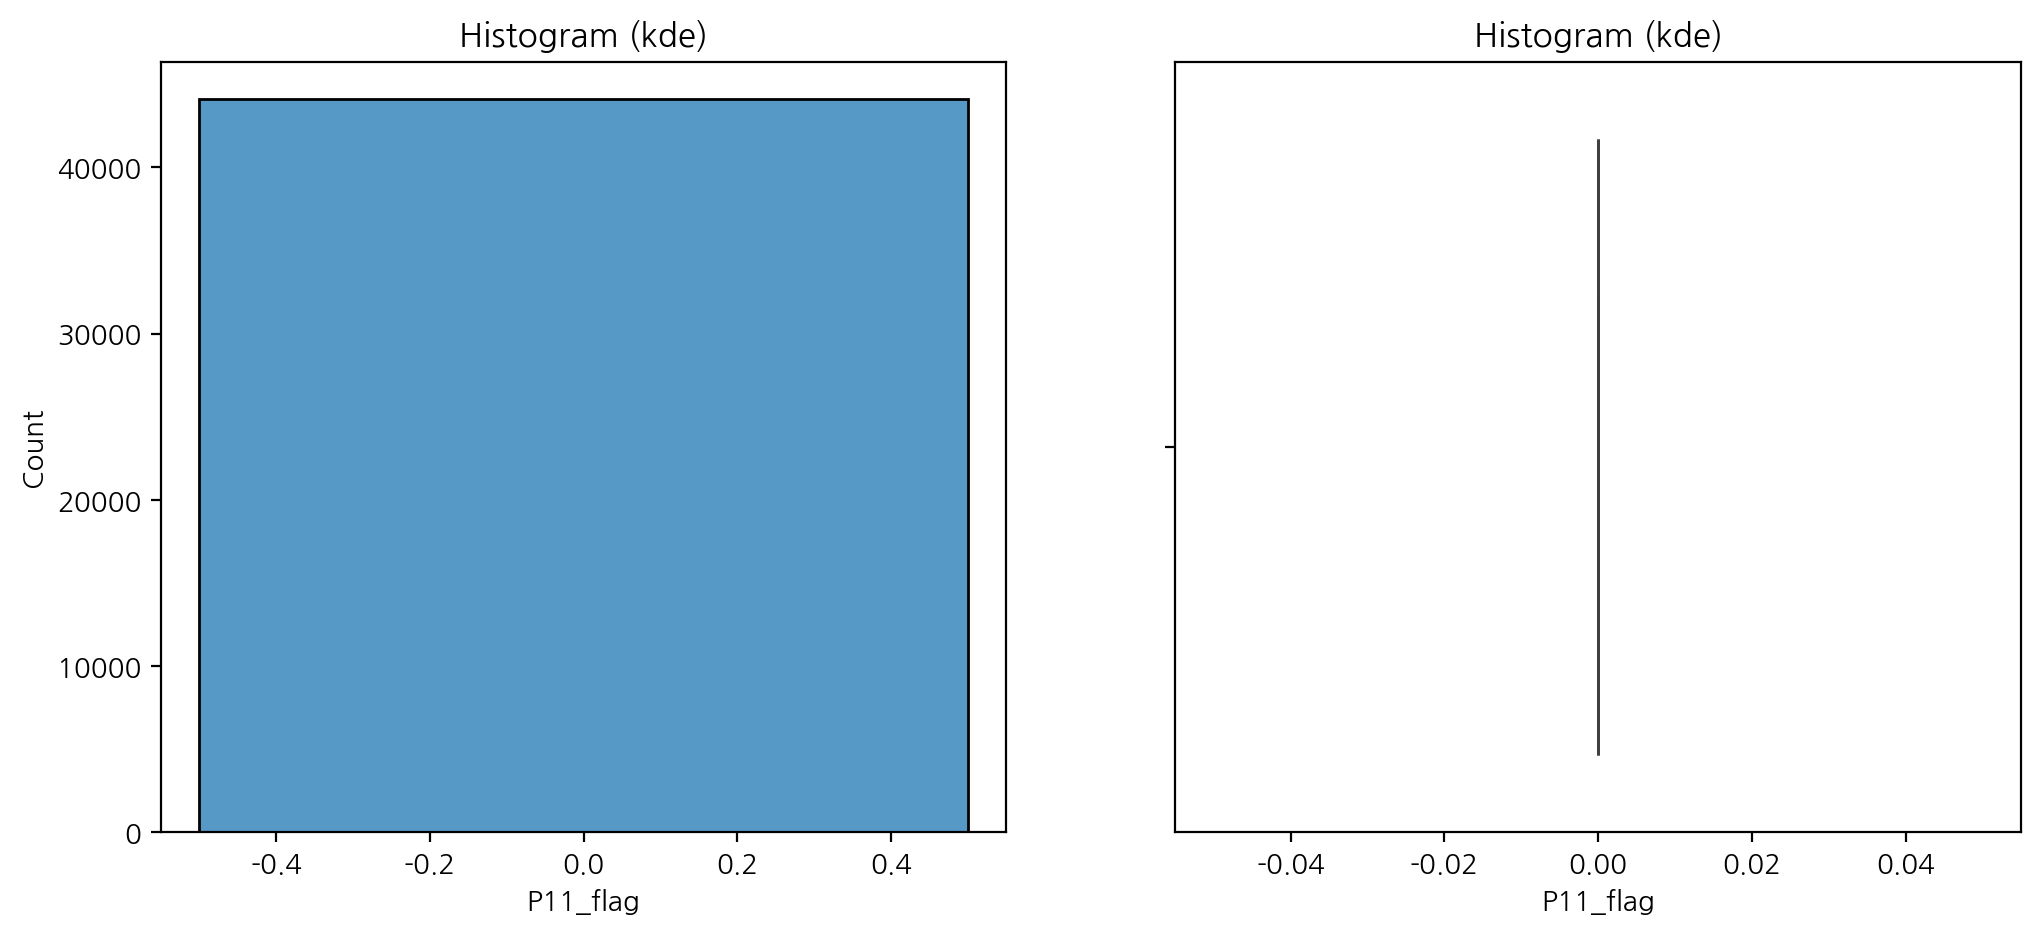

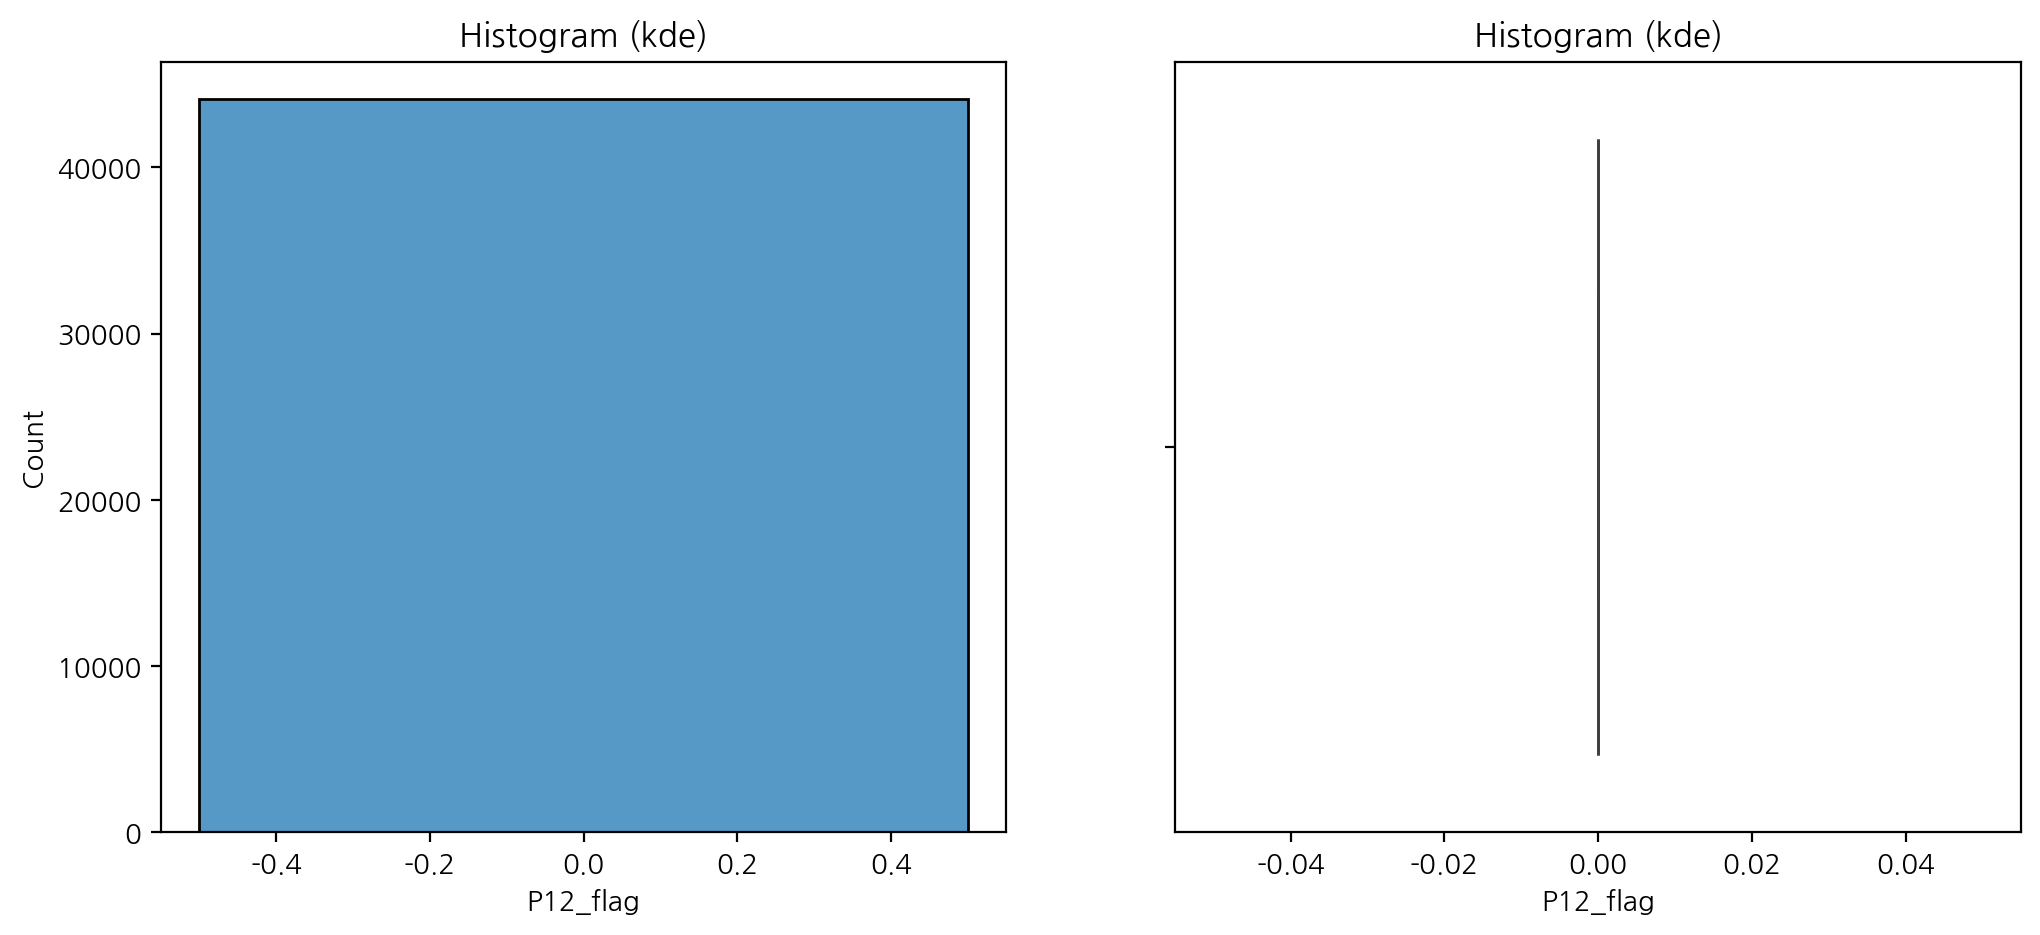

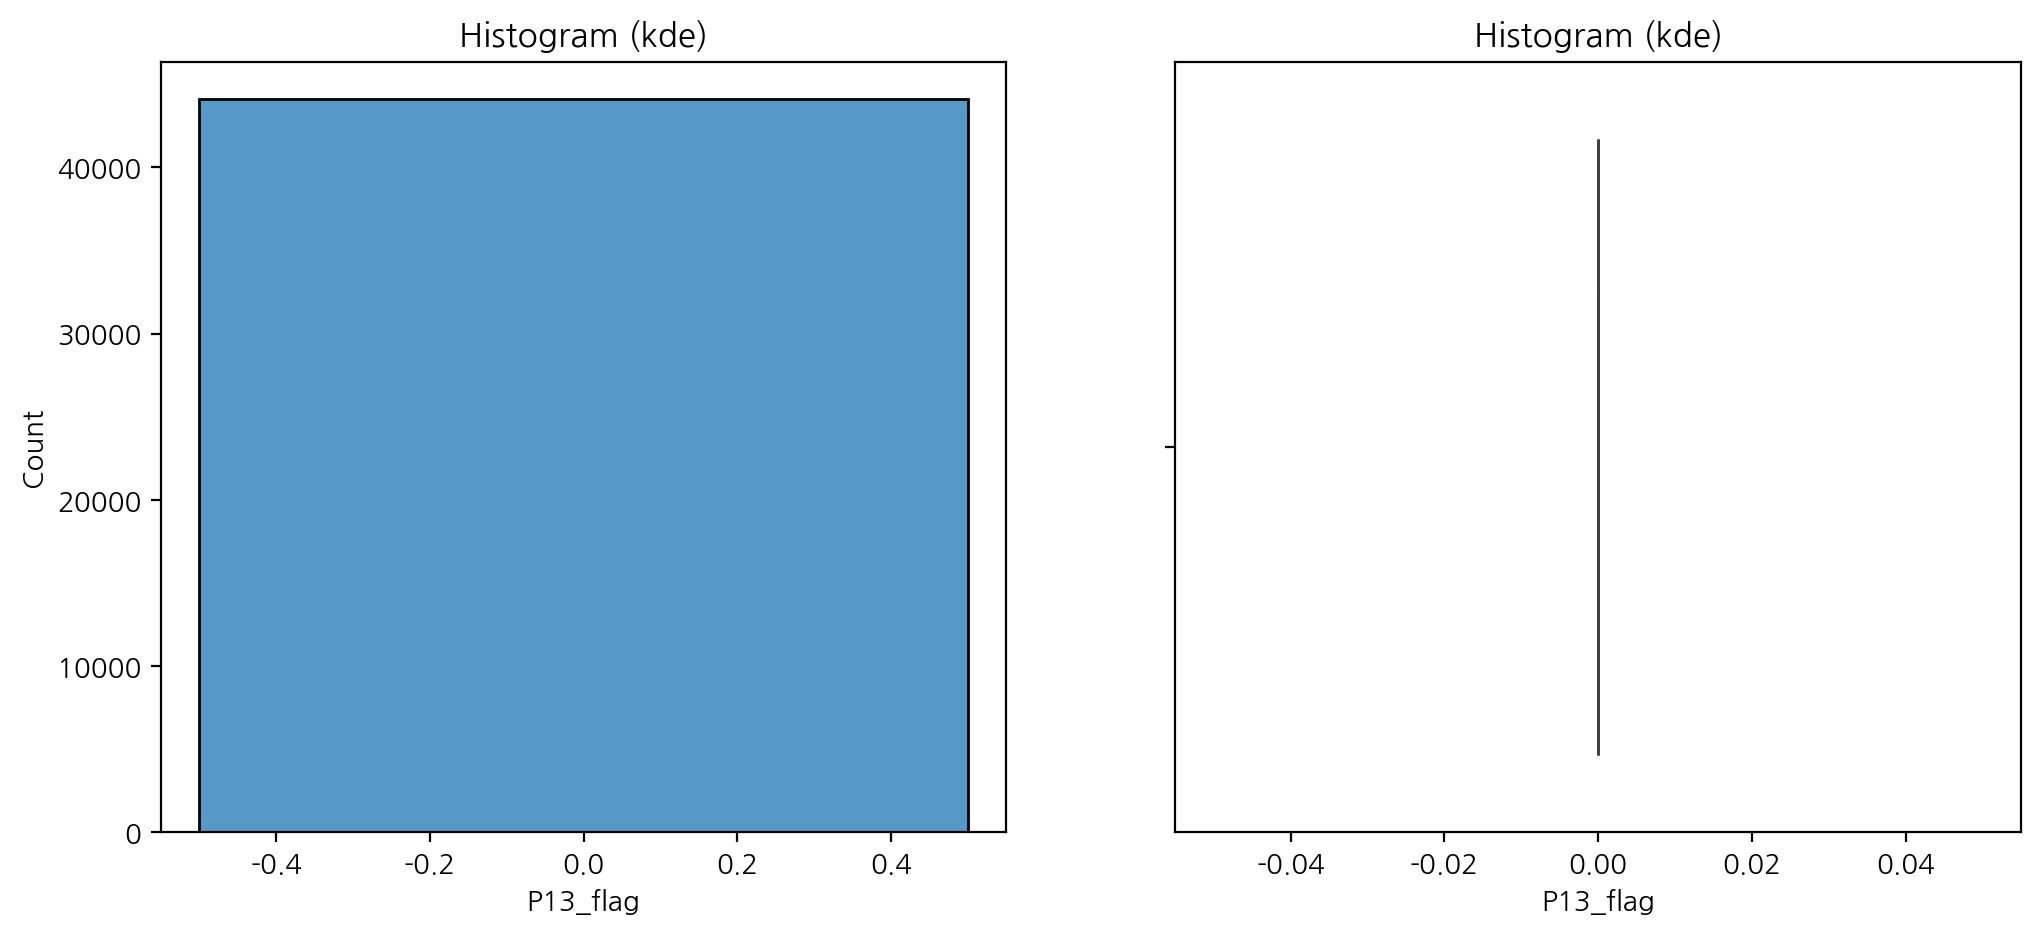

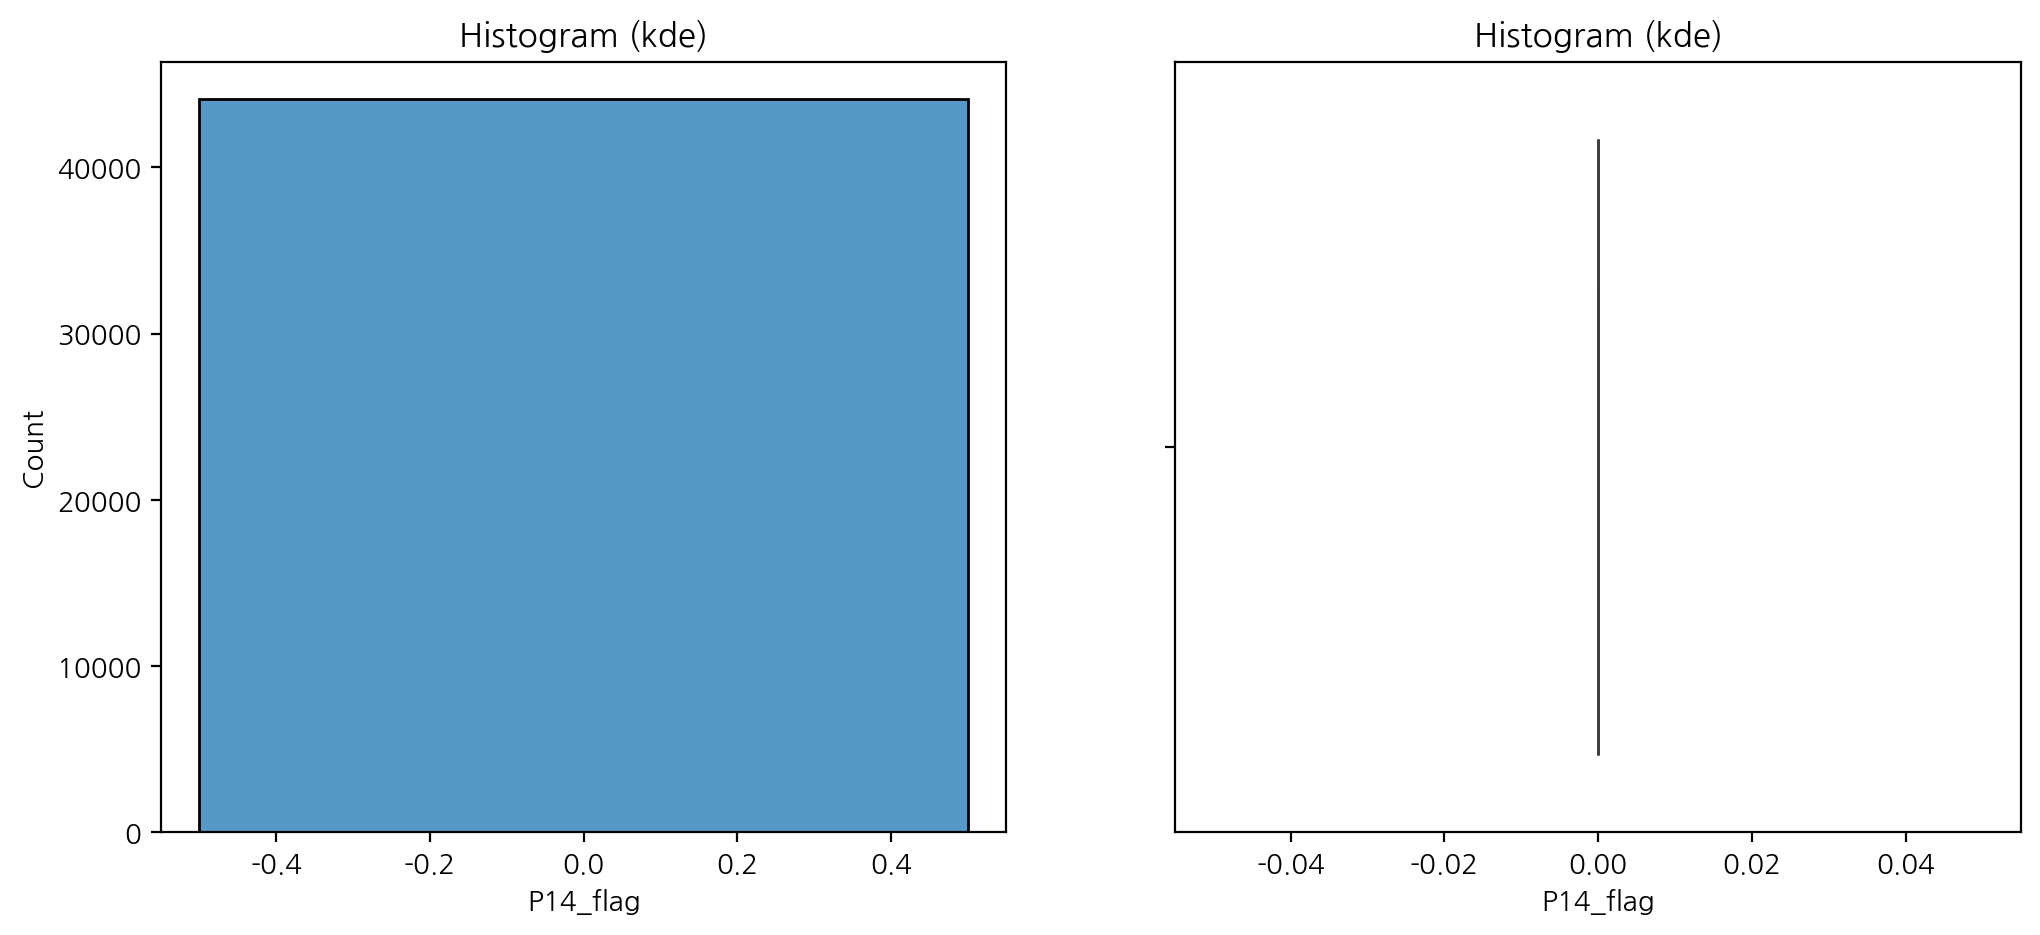

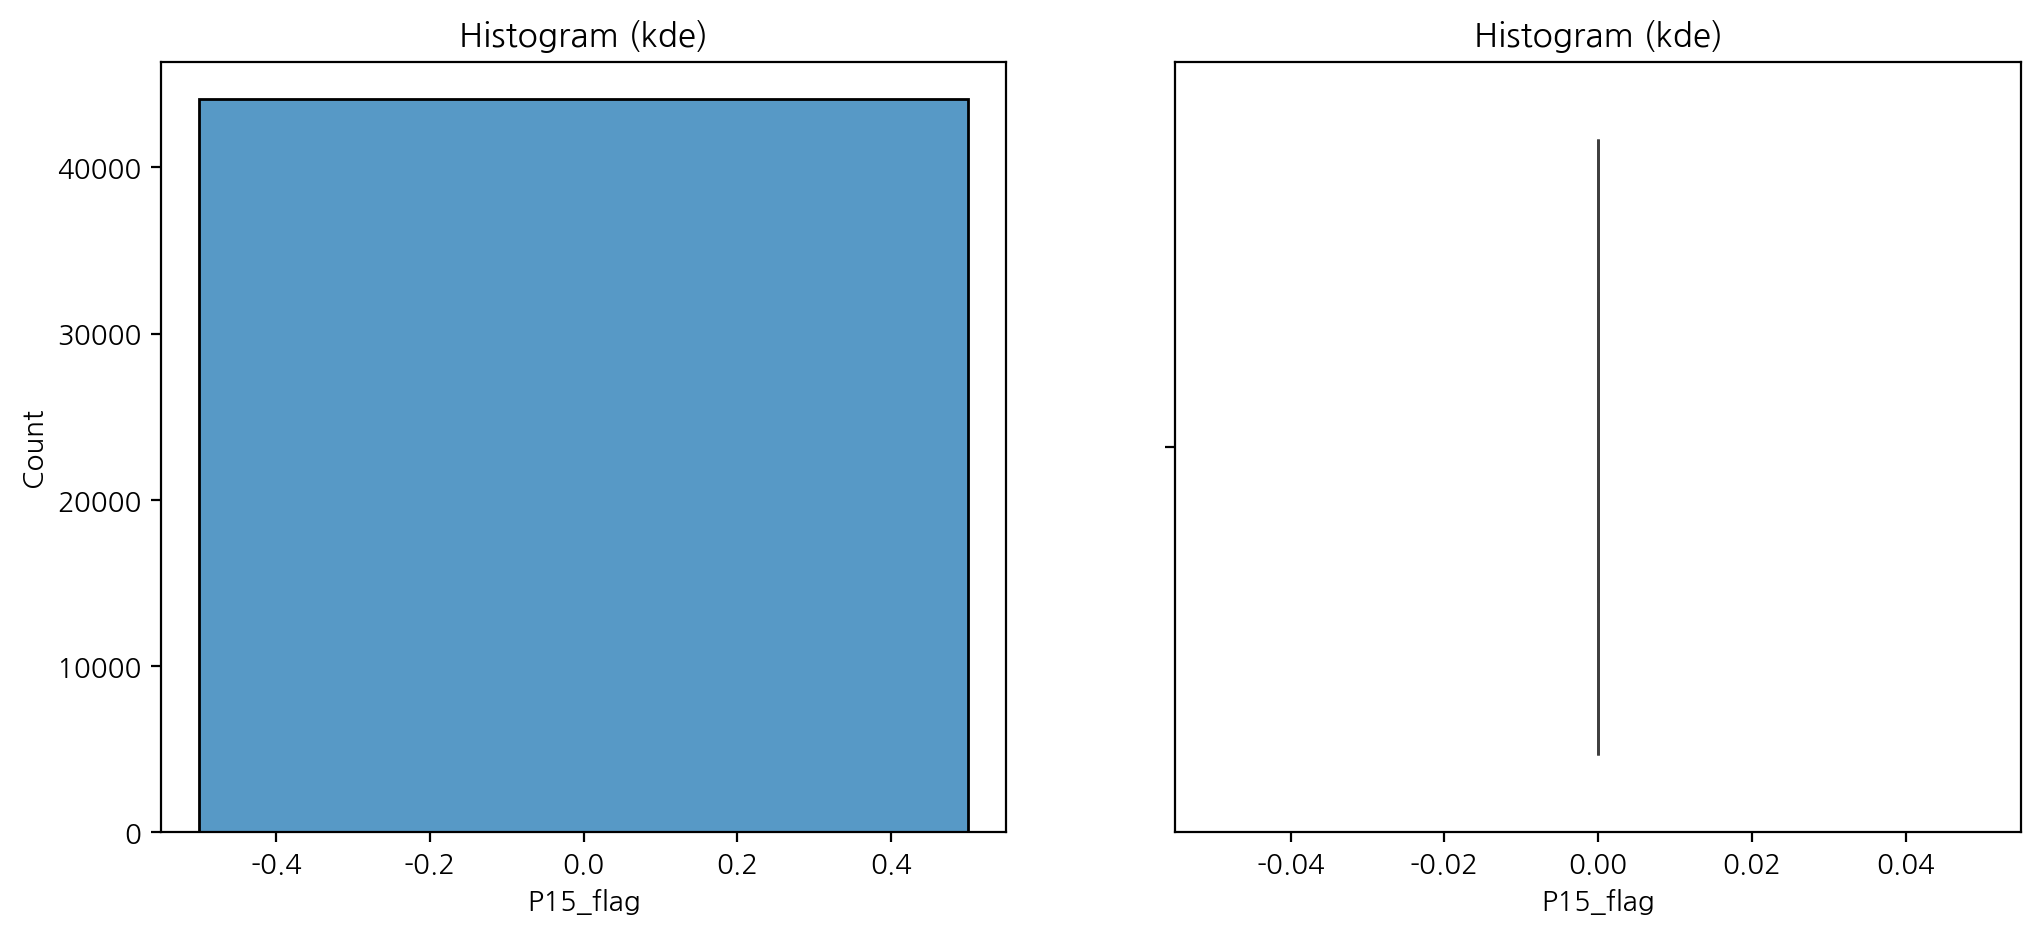

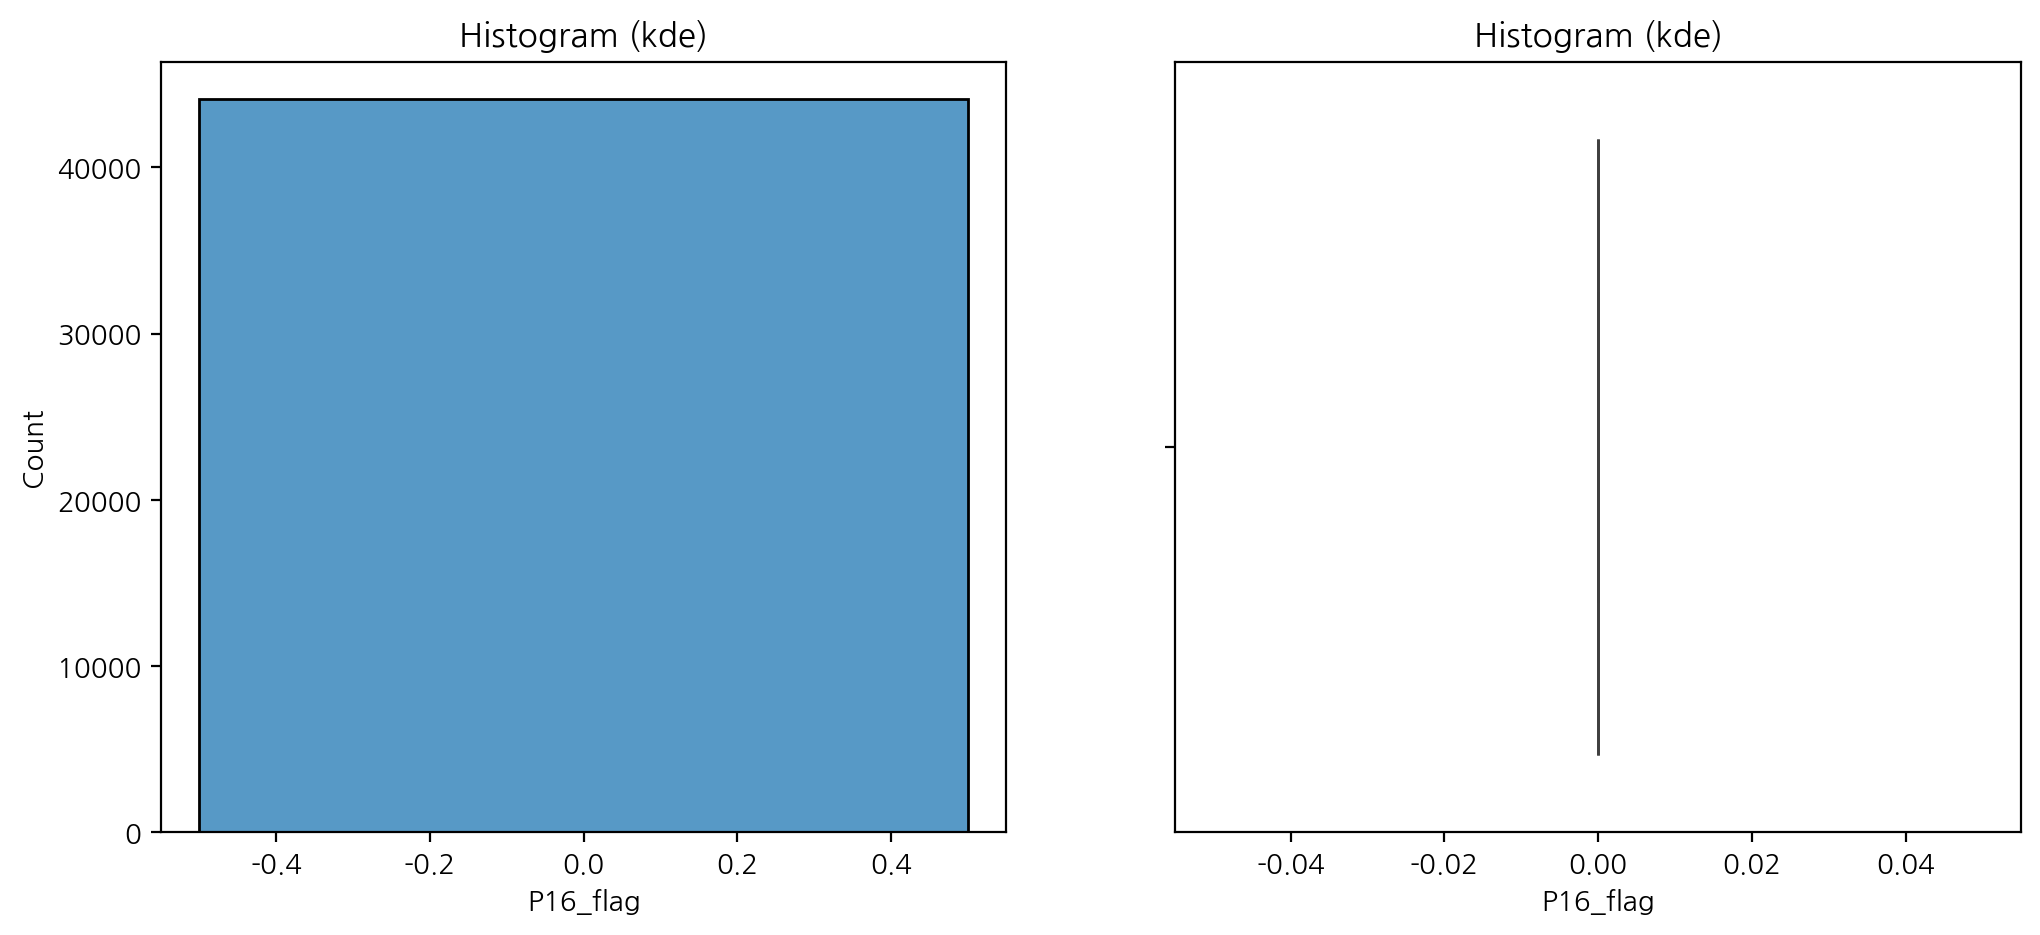

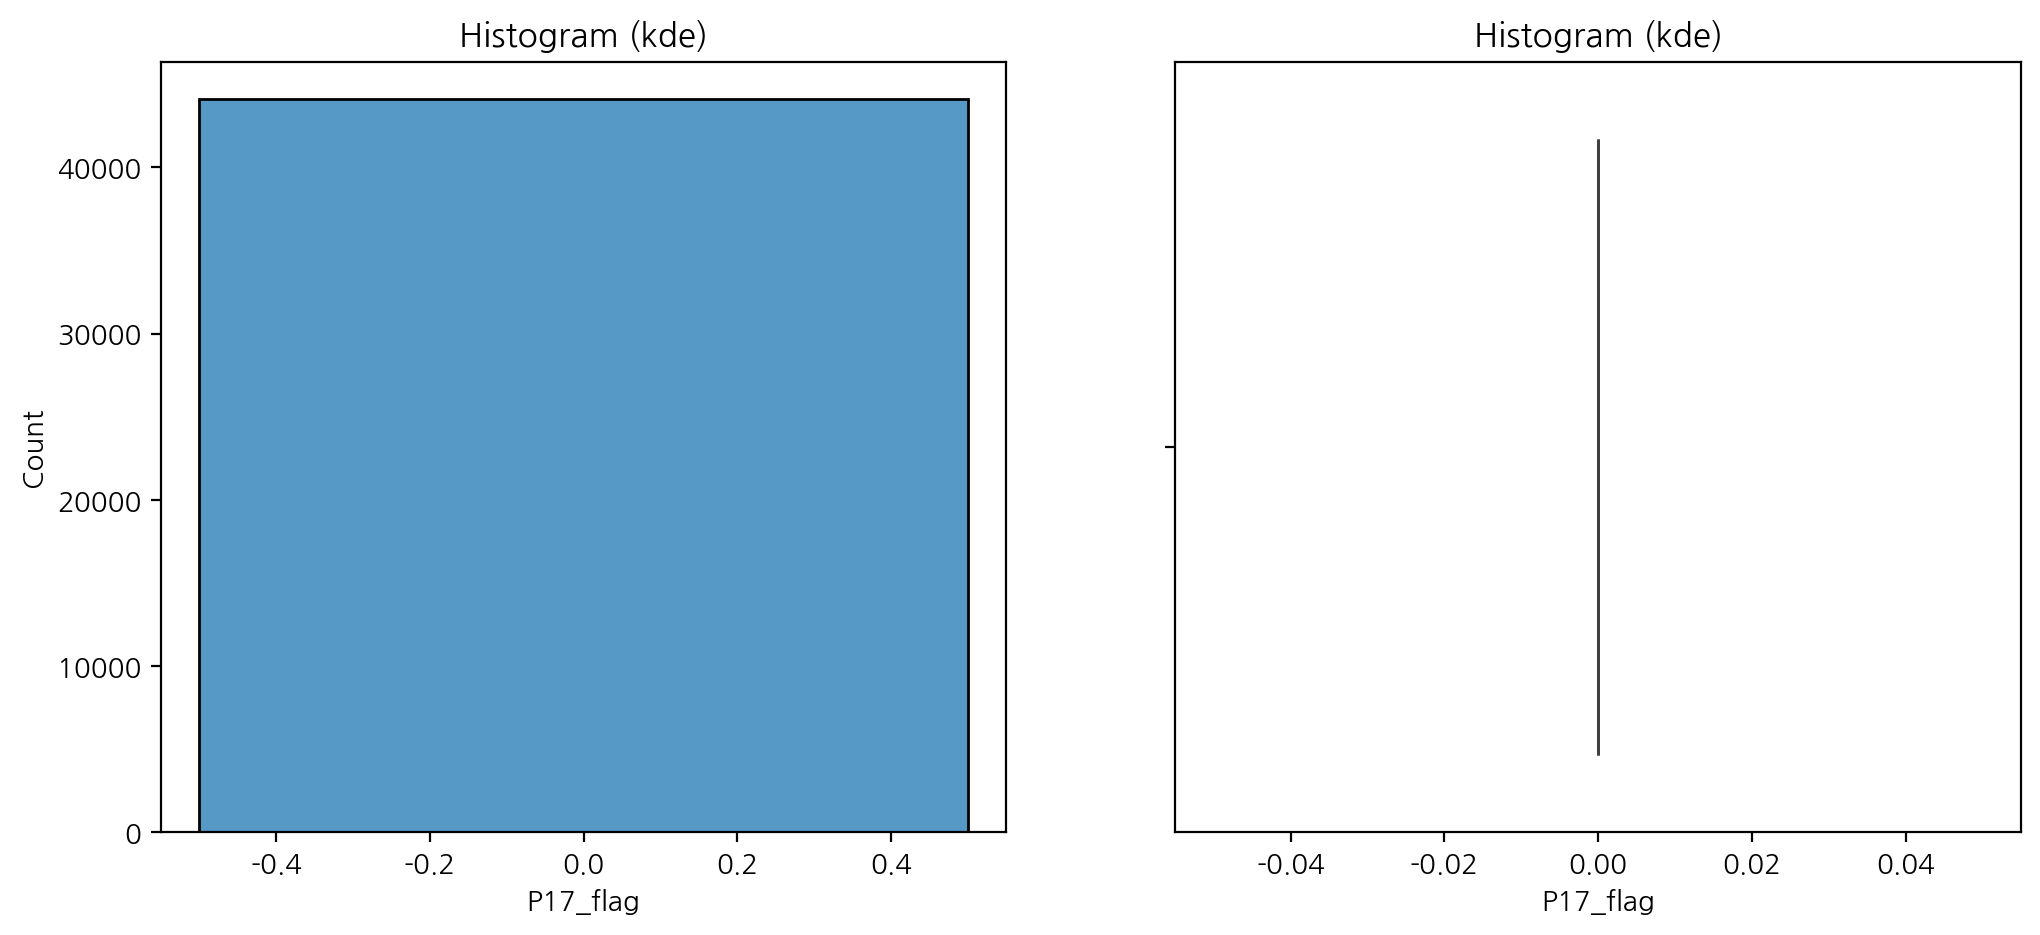

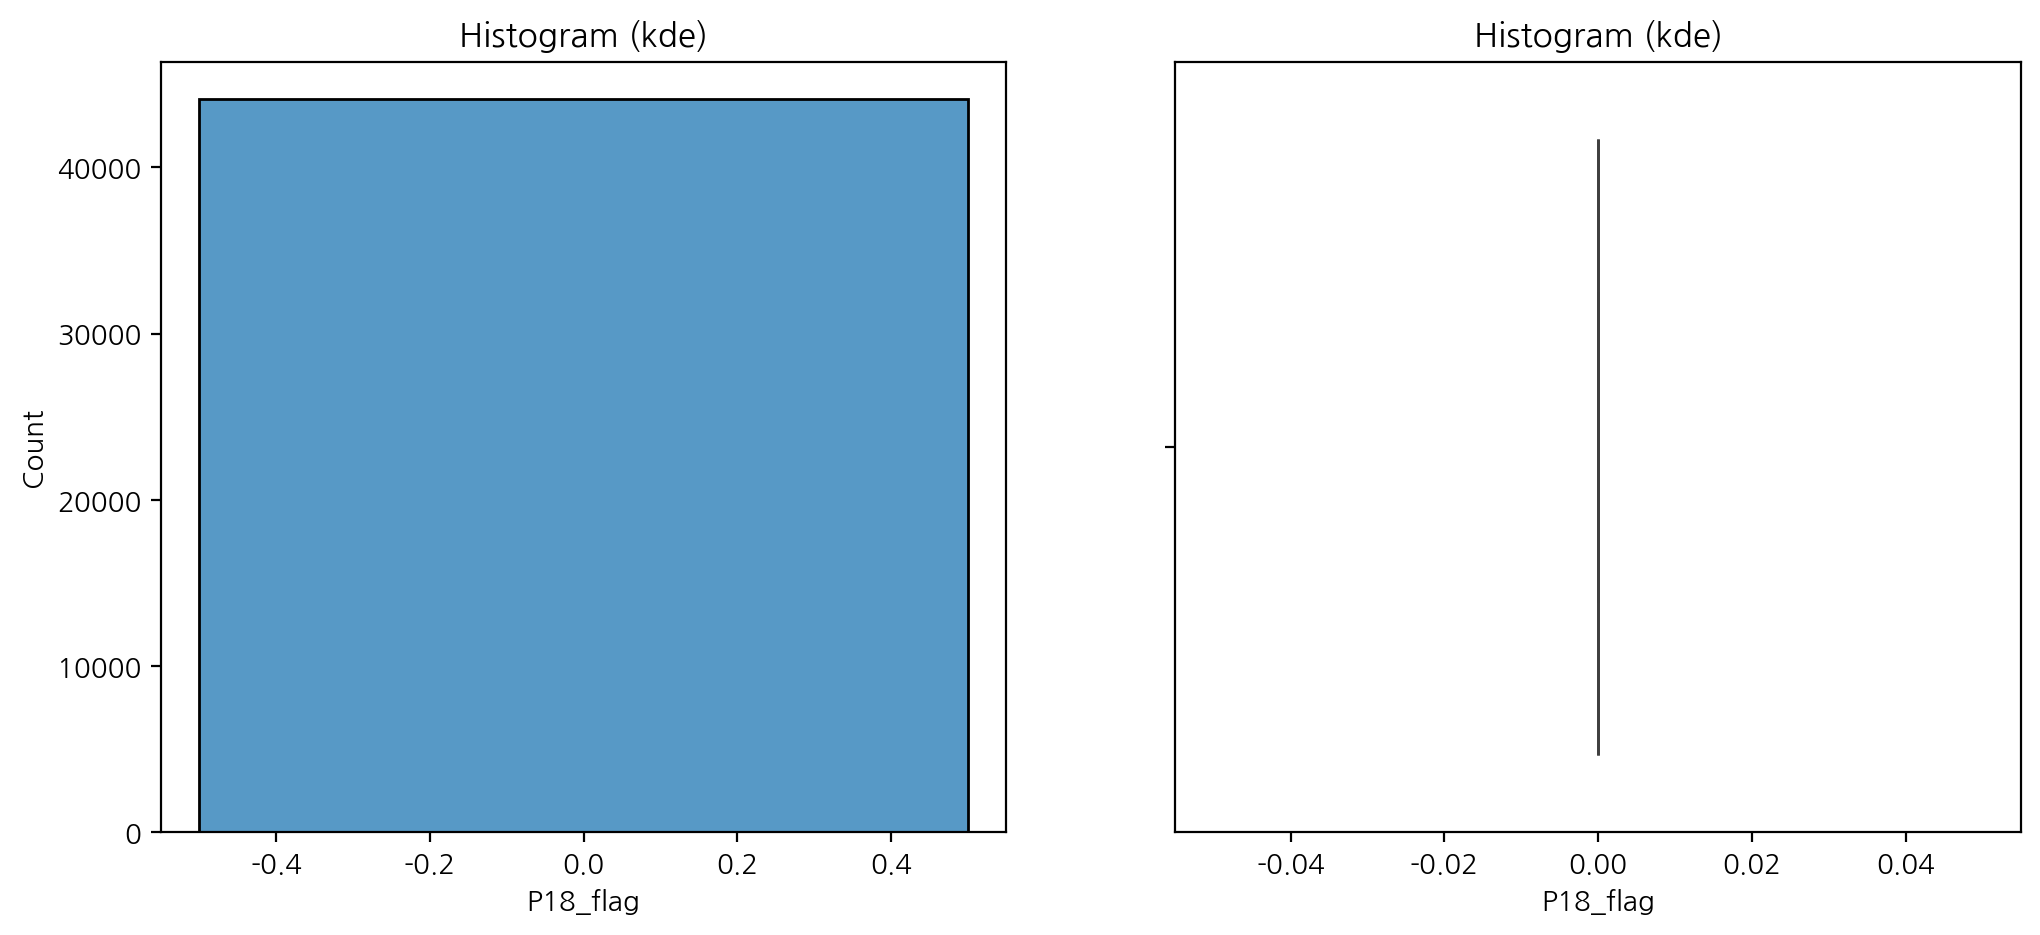

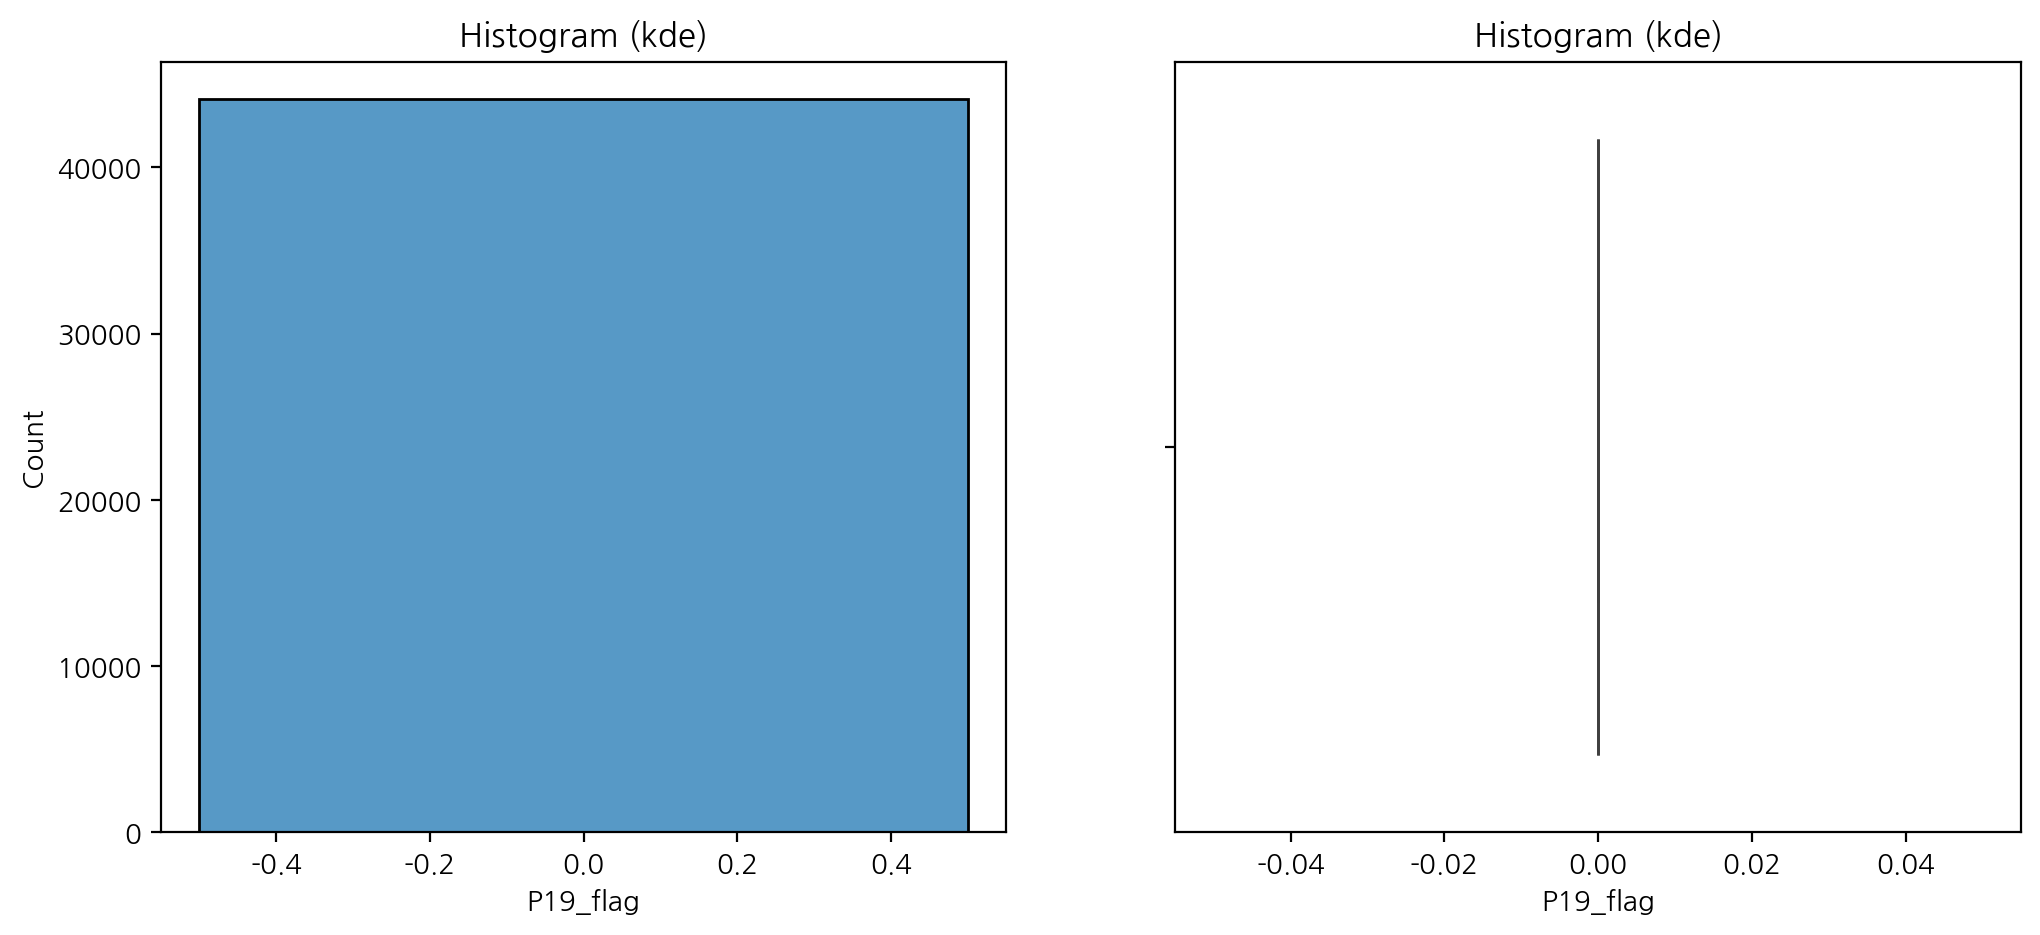

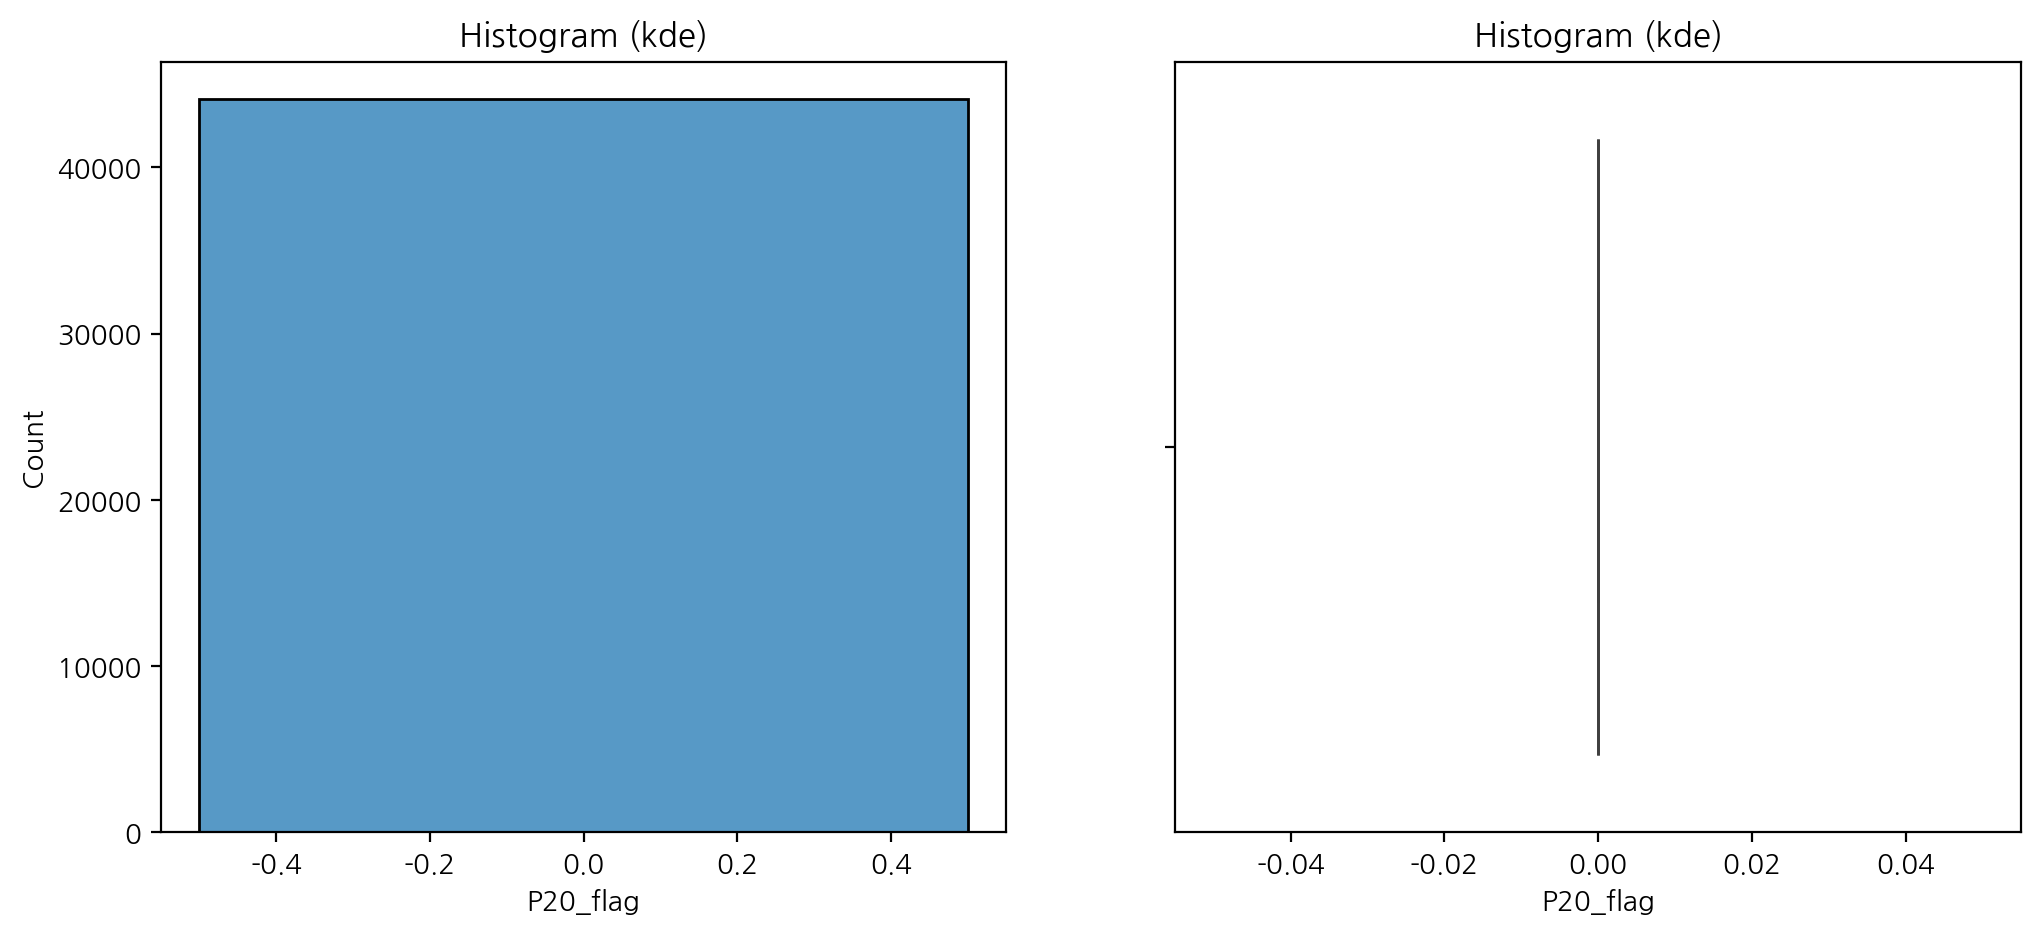

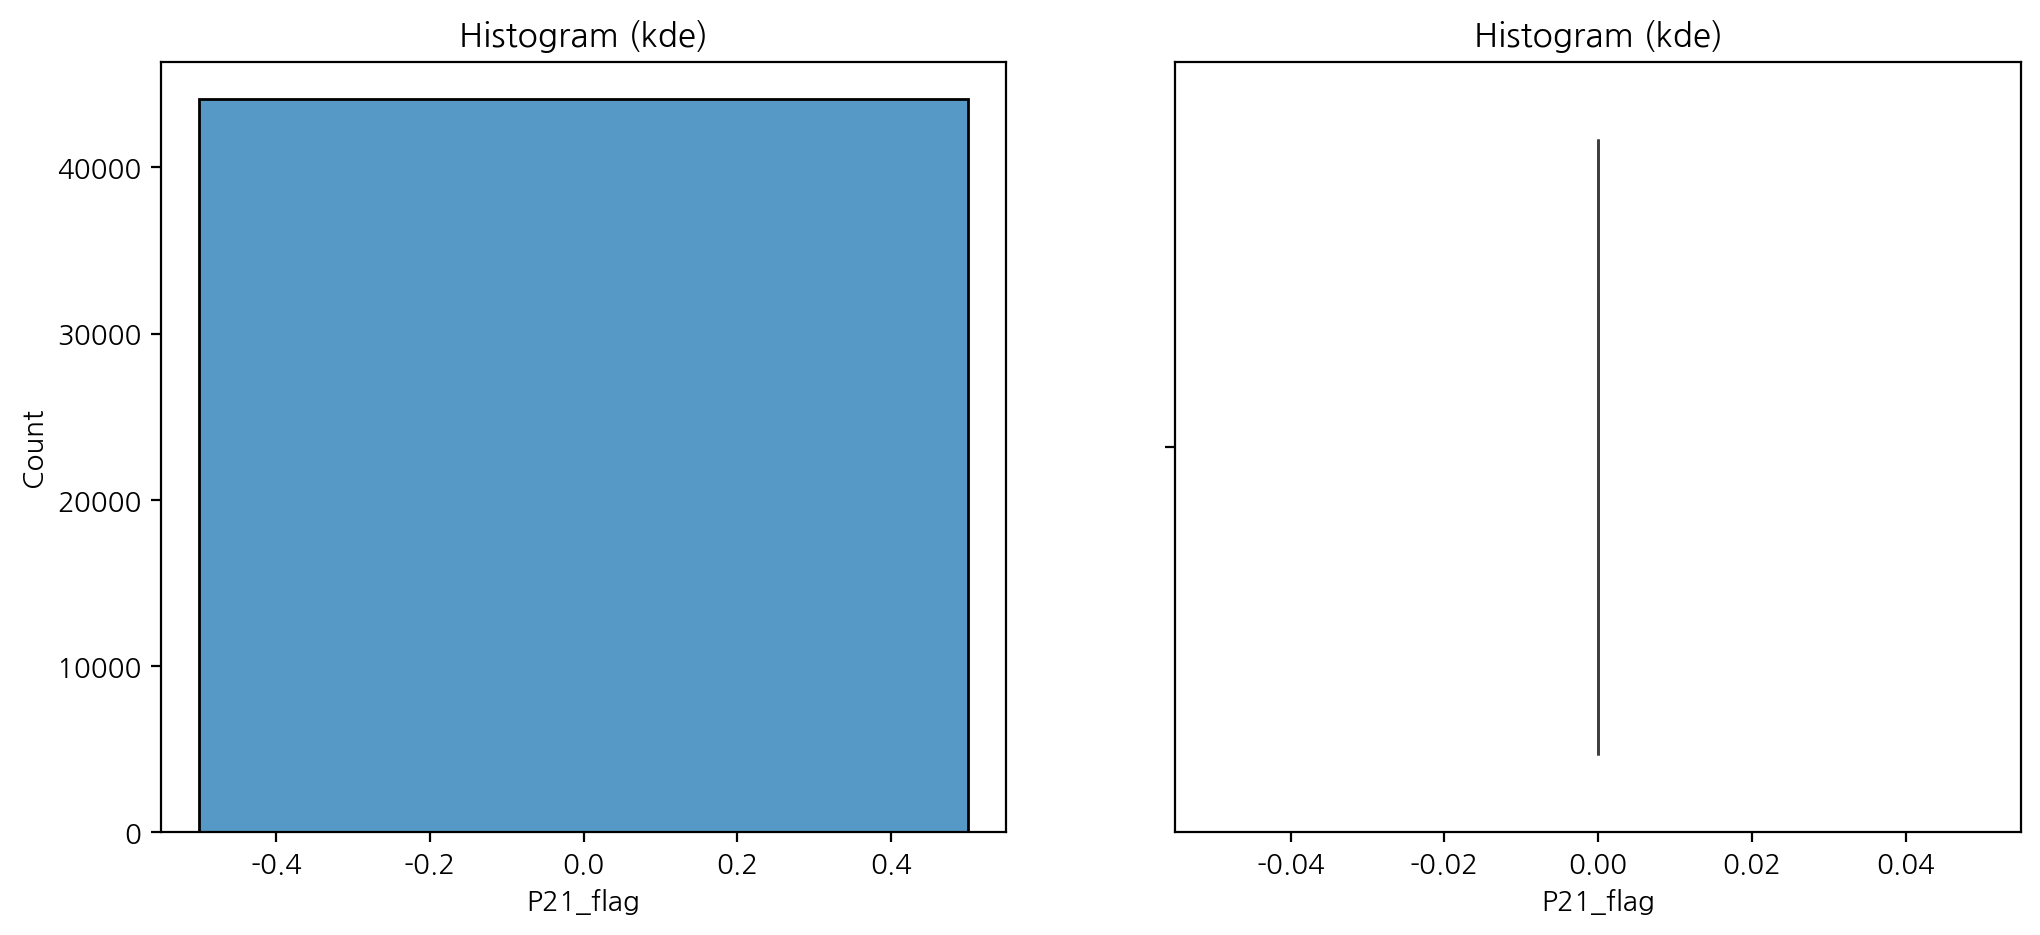

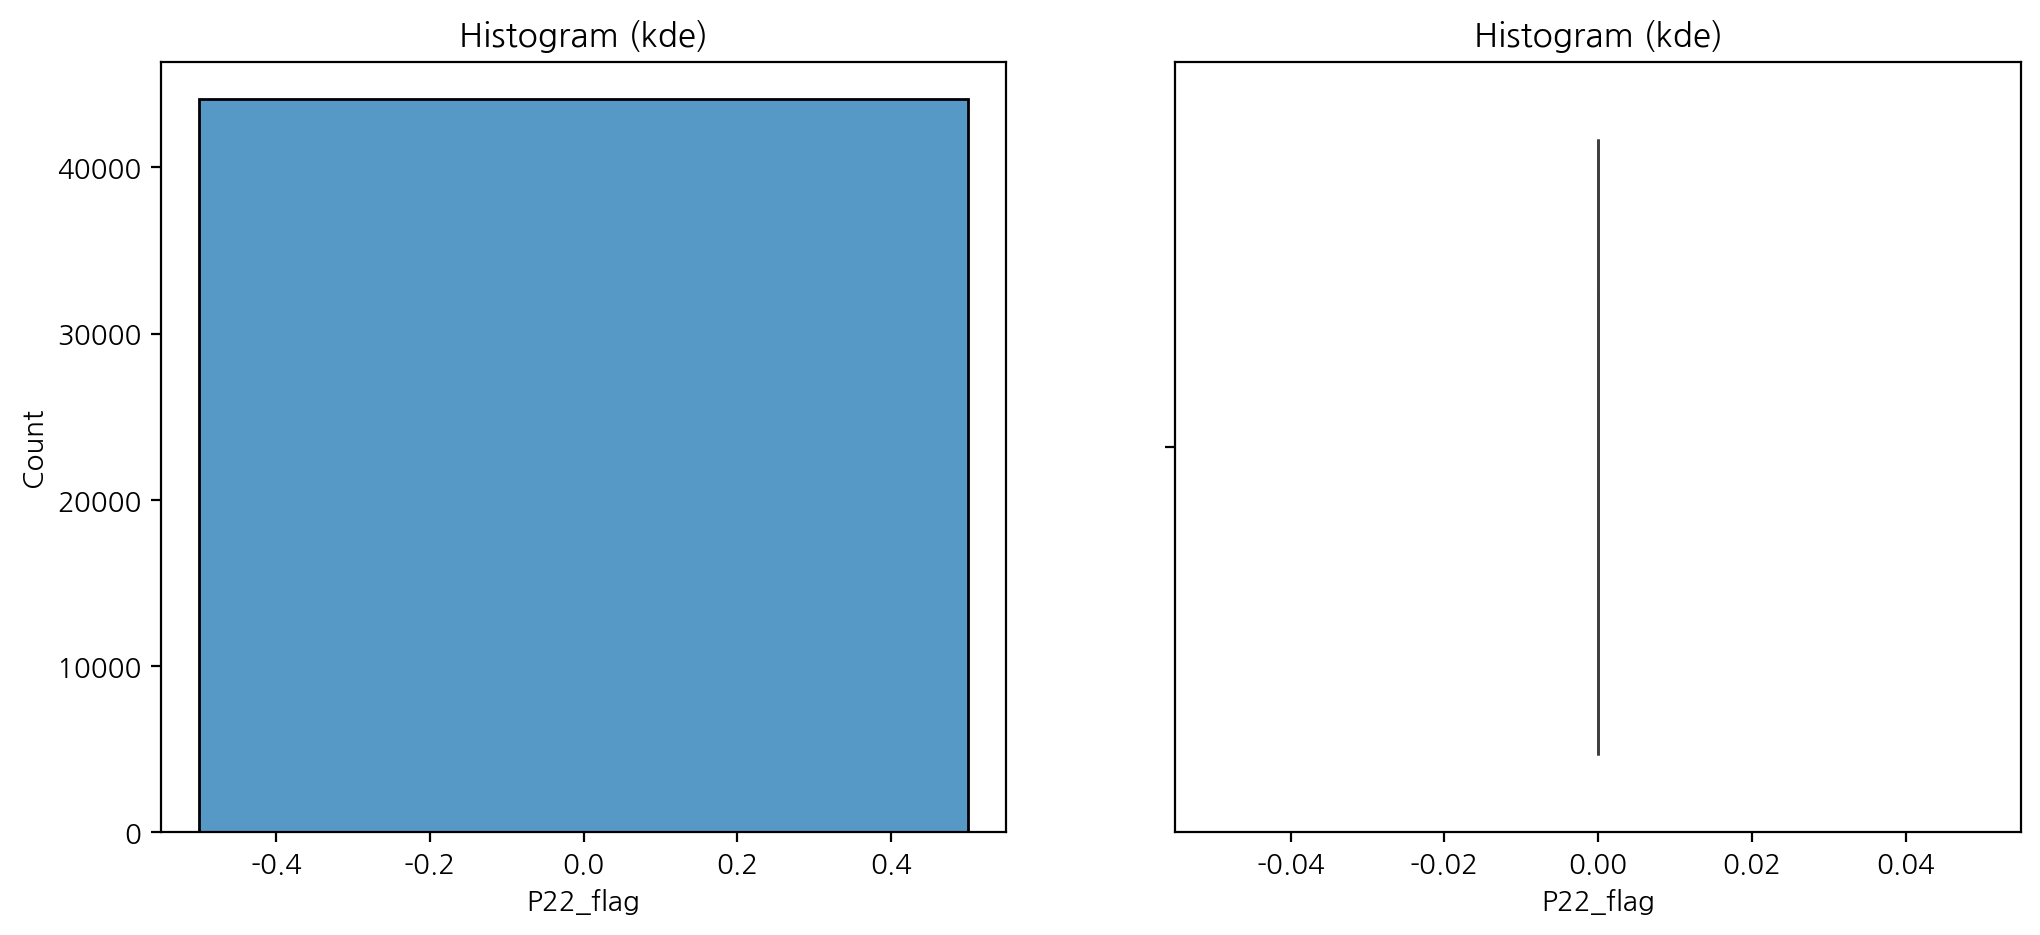

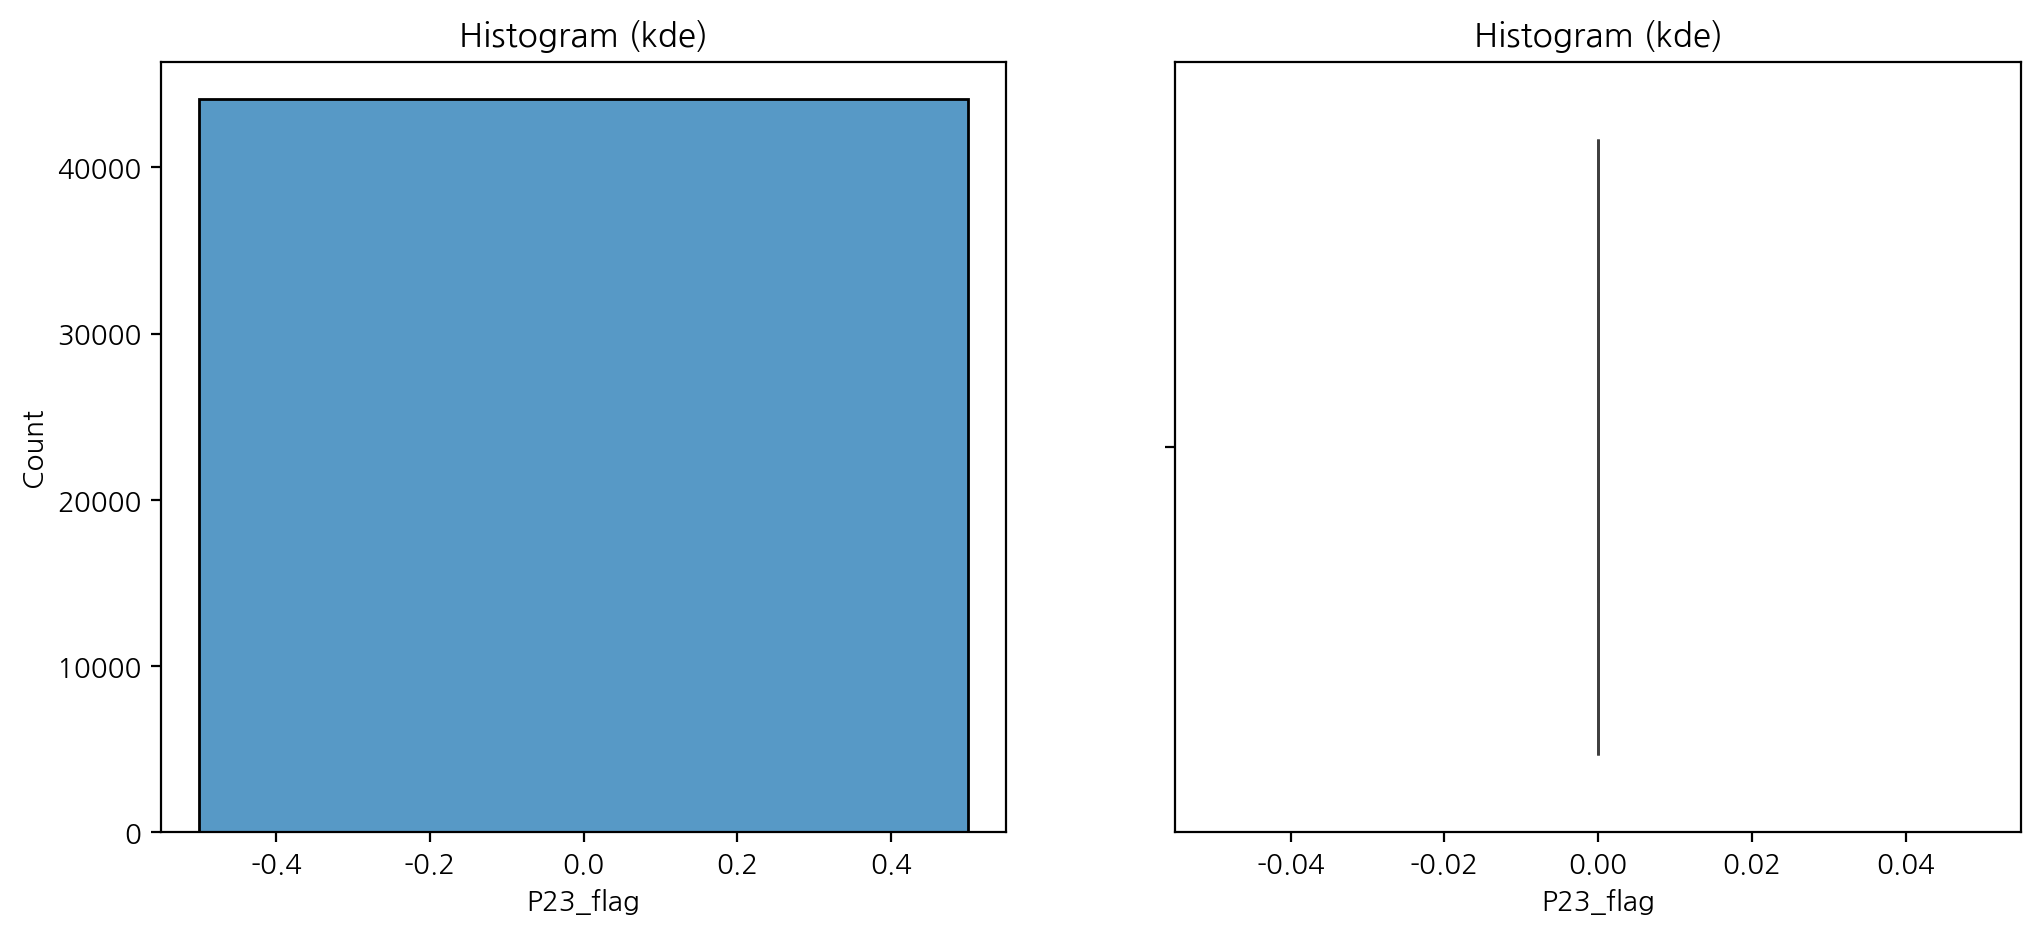

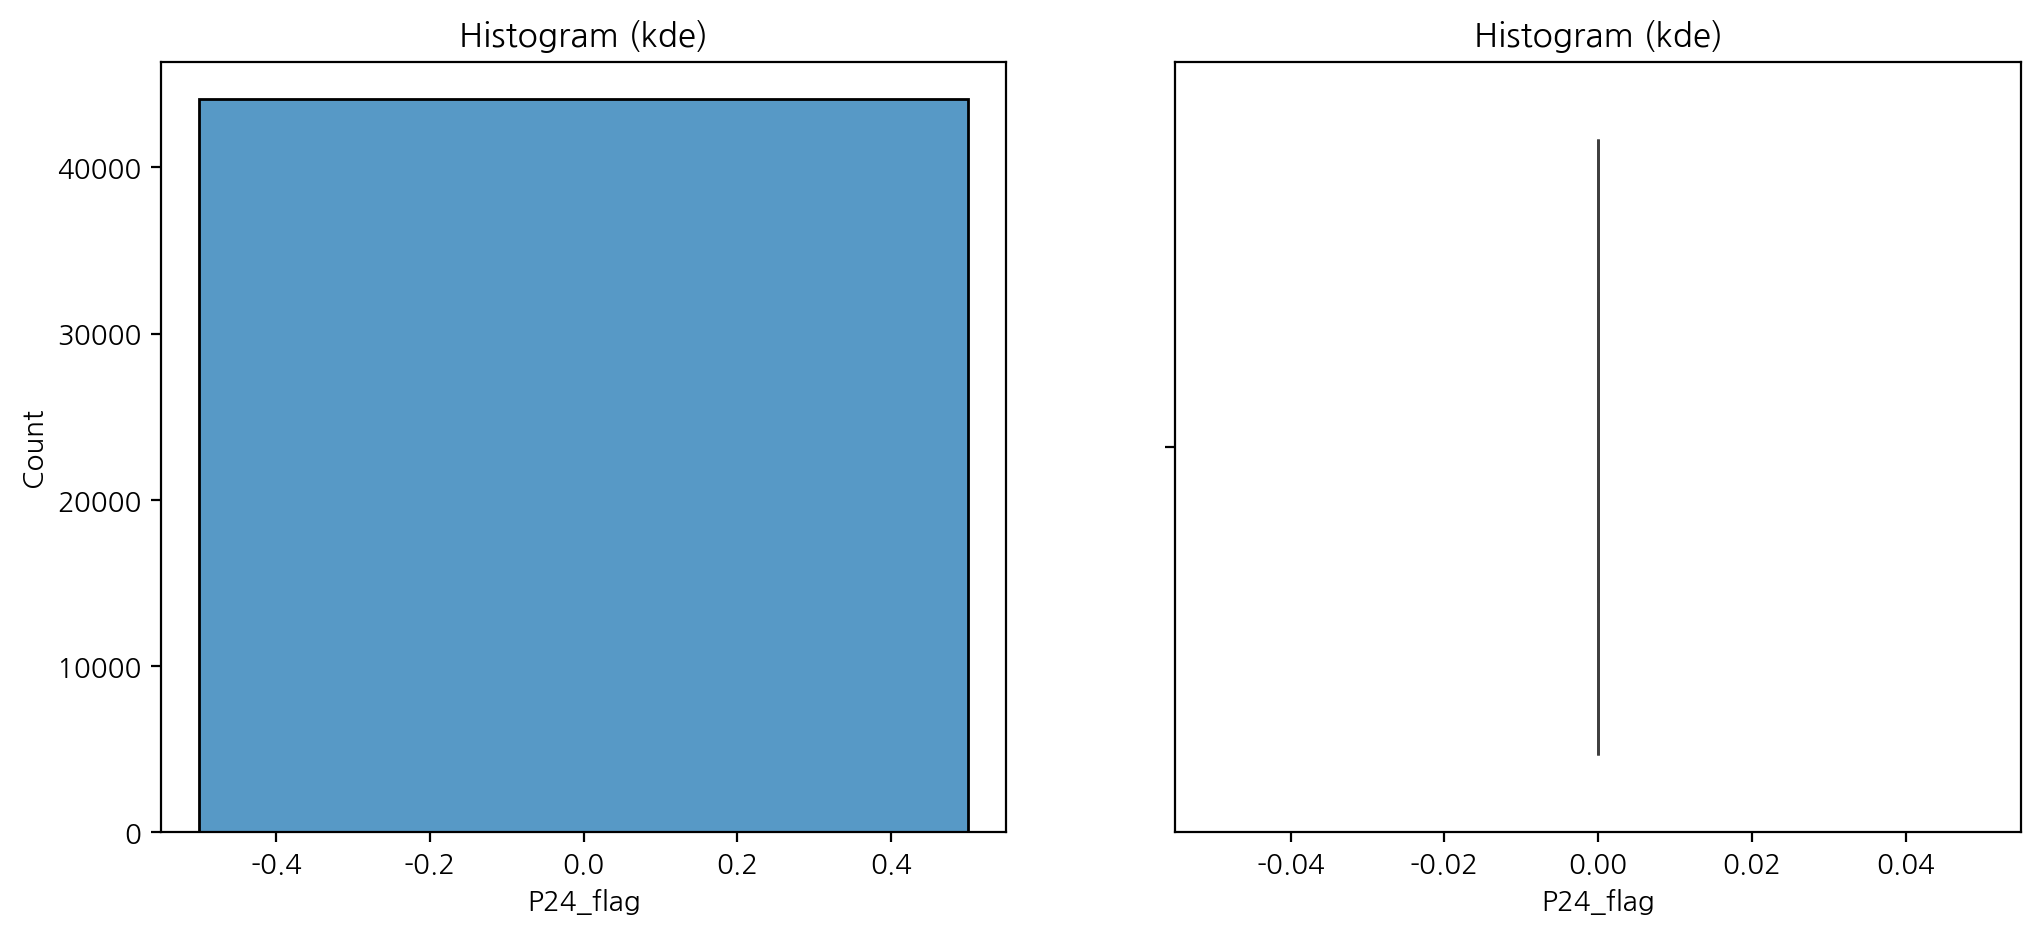

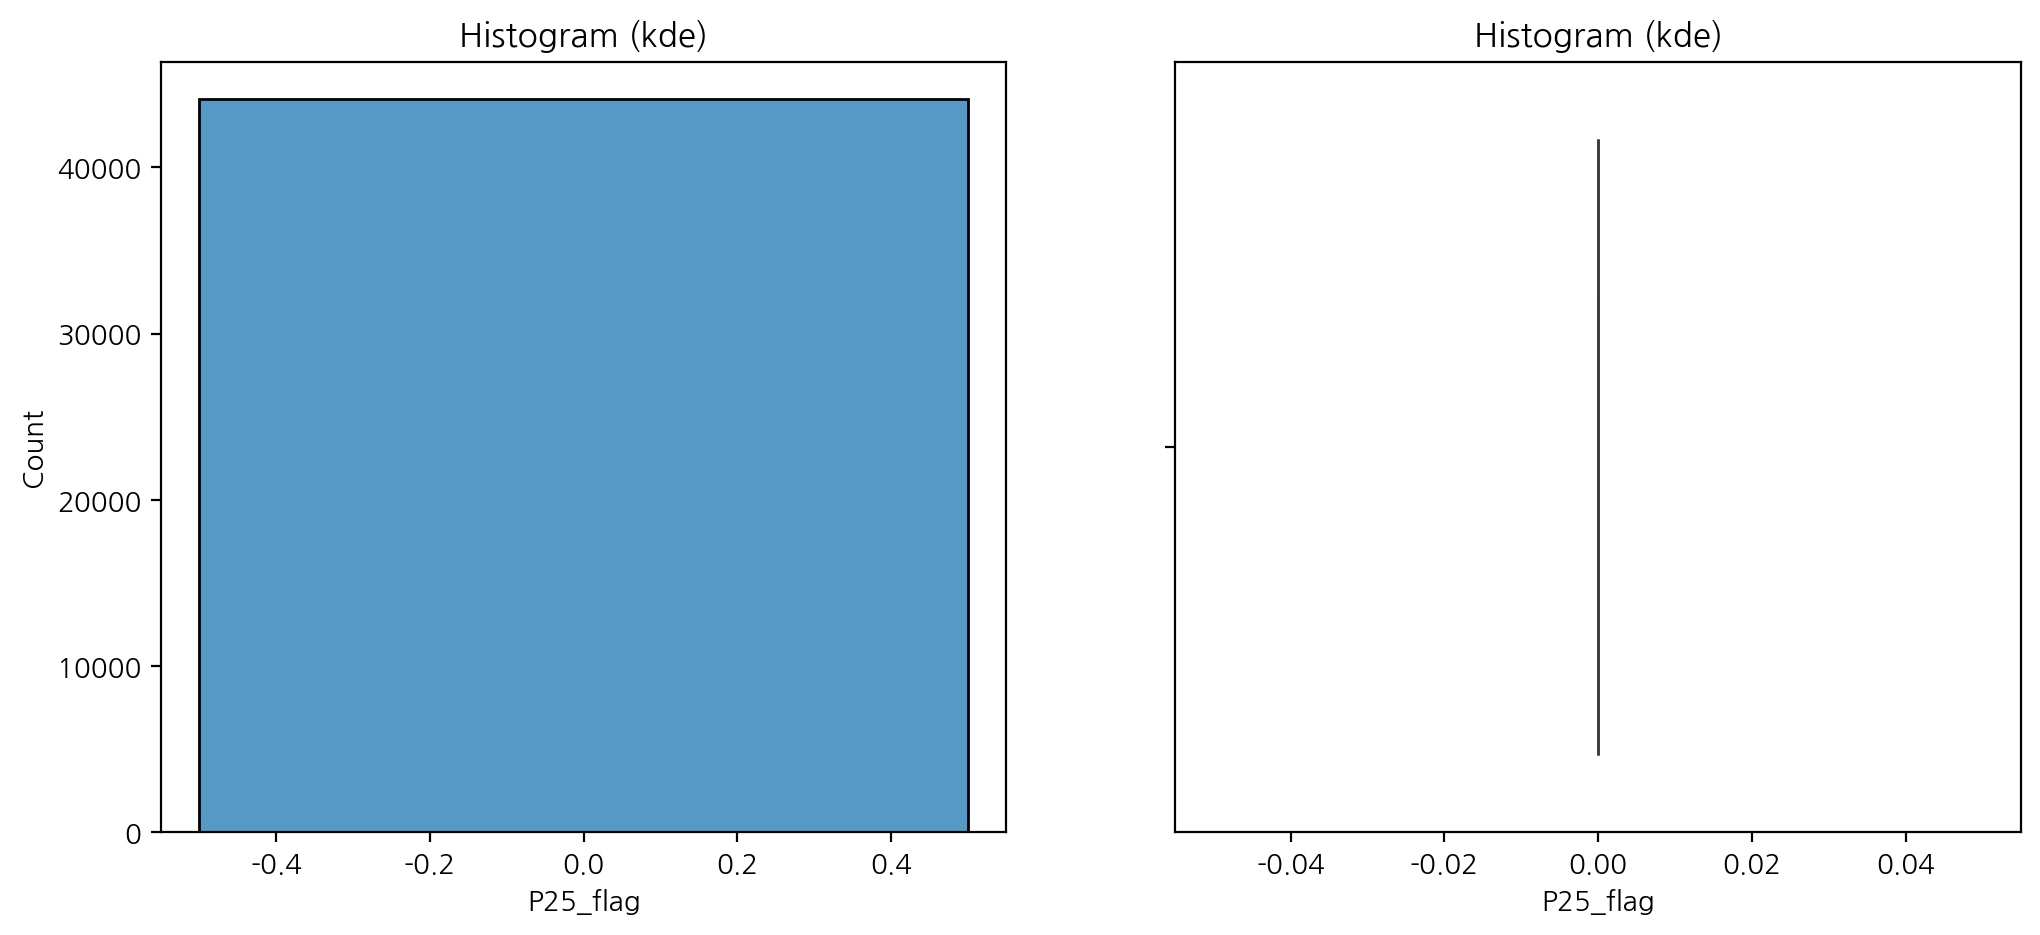

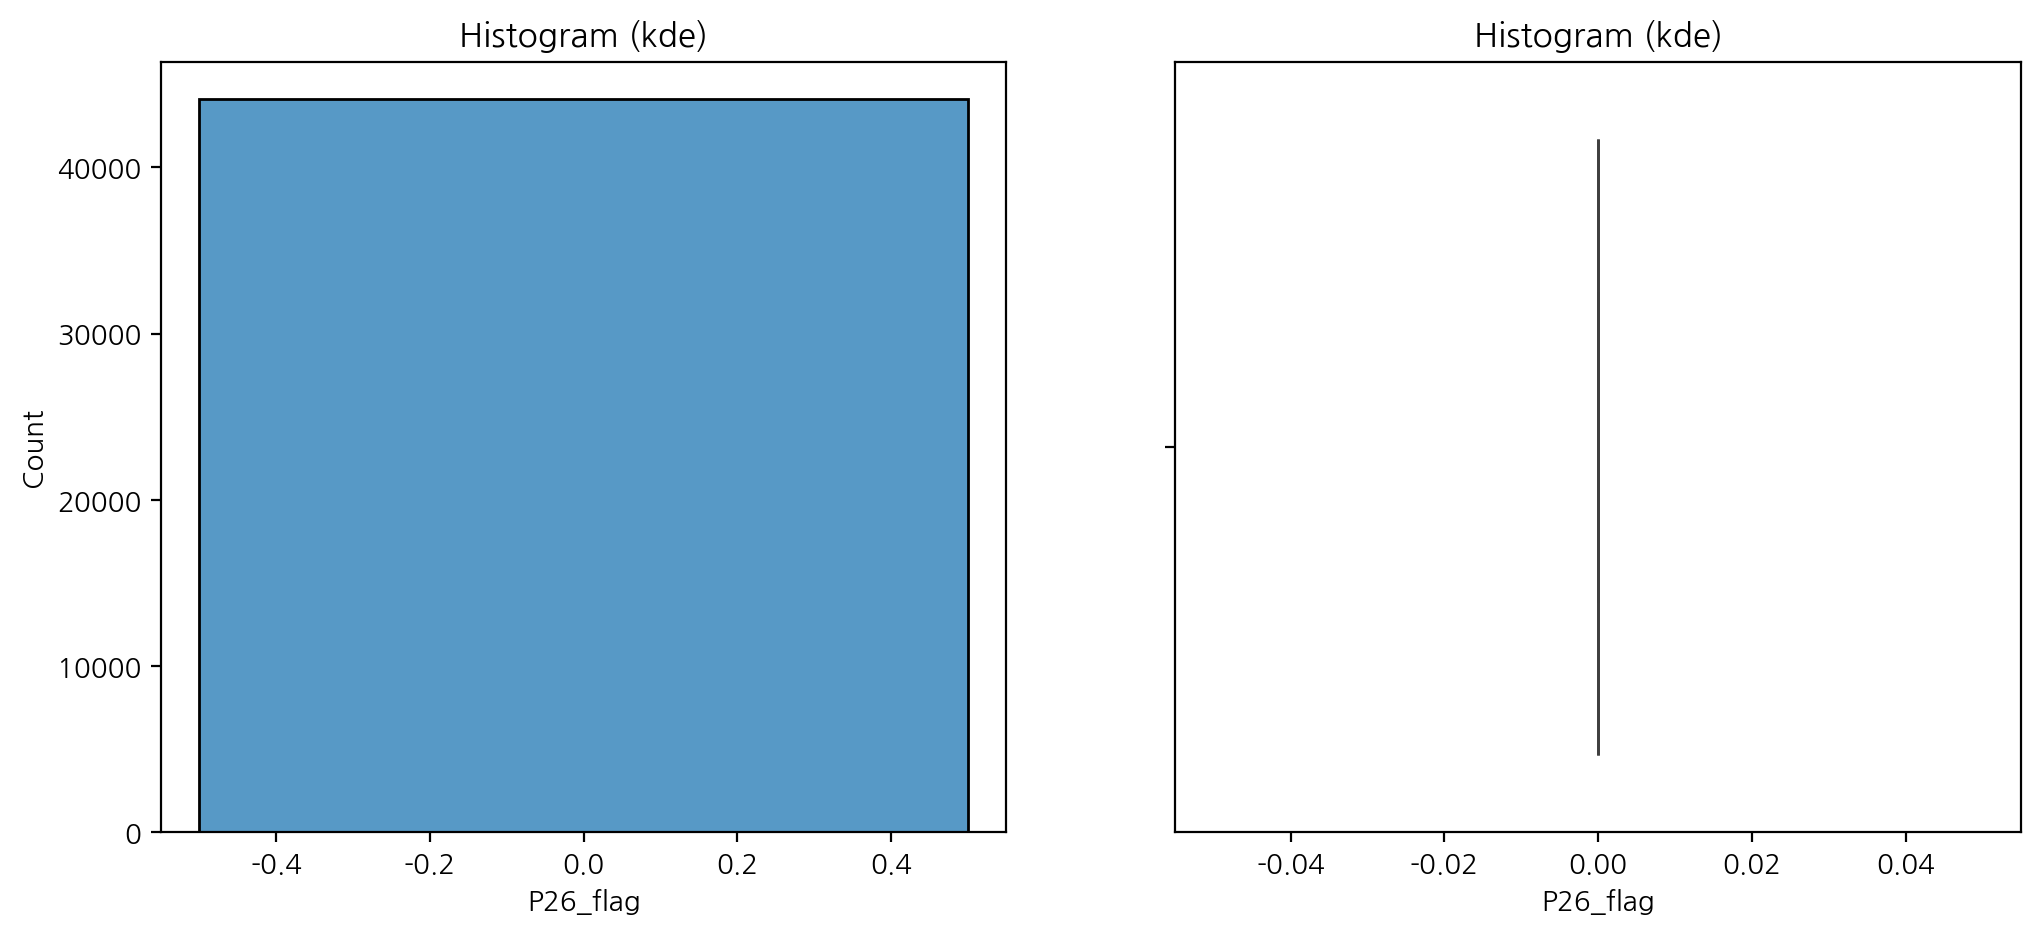

In [14]:
for i in train_a.columns:
    if i=='timestamp' or i==target:
        continue
    univariate_analysis(train_a,i)

In [15]:
# p_flag는 모두 무시하는 것이 좋을 것 같음.
# '_flag'를 포함한 모든 열 제거
train_a = train_a[[col for col in train_a.columns if '_flag' not in col]]


In [19]:
train_a[target].value_counts()

anomaly
0    44071
1       30
Name: count, dtype: int64

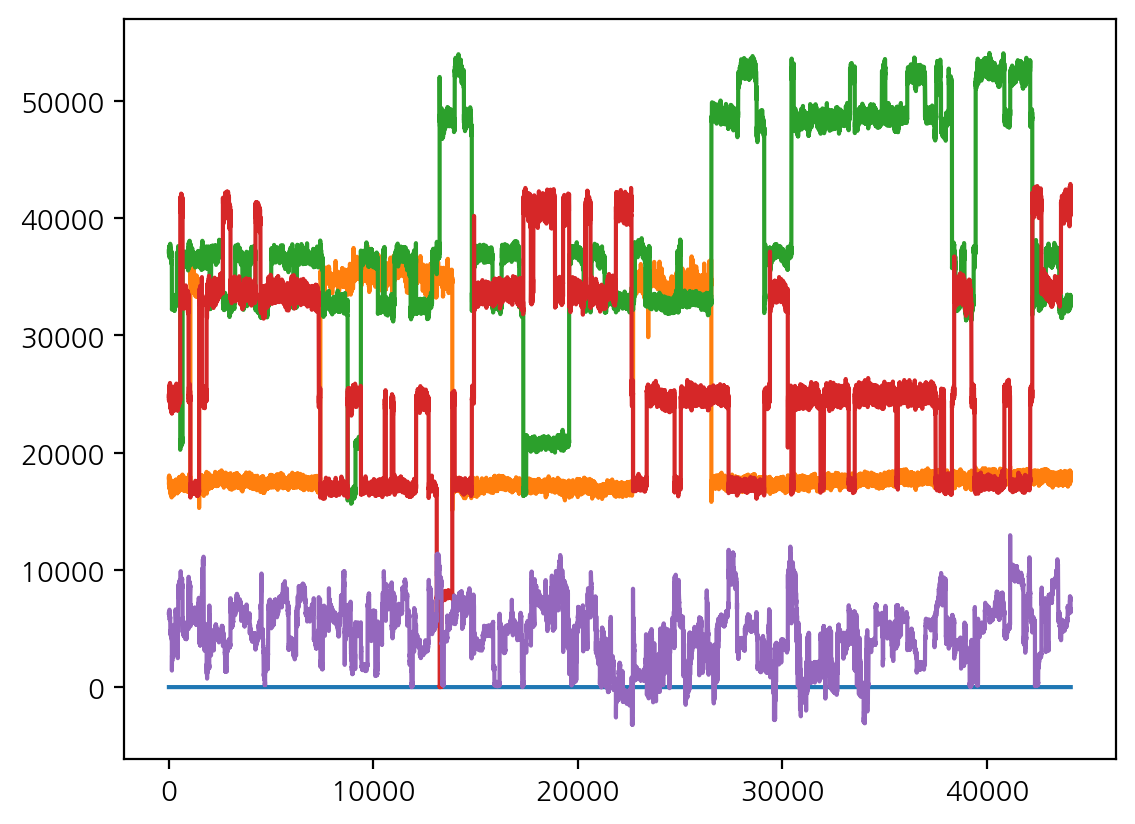

In [35]:
plt.plot(train_a[target])
plt.plot(train_a['Q1'])
plt.plot(train_a['Q2'])
plt.plot(train_a['Q3'])
plt.plot(train_a['Q4'])
plt.plot()
plt.show()

In [38]:
train_a[target].value_counts()

anomaly
0    44071
1       30
Name: count, dtype: int64

In [42]:
# 마지막 부분만 anomaly가 있나..?
train_b[target].value_counts()

anomaly
0    41727
1       33
Name: count, dtype: int64

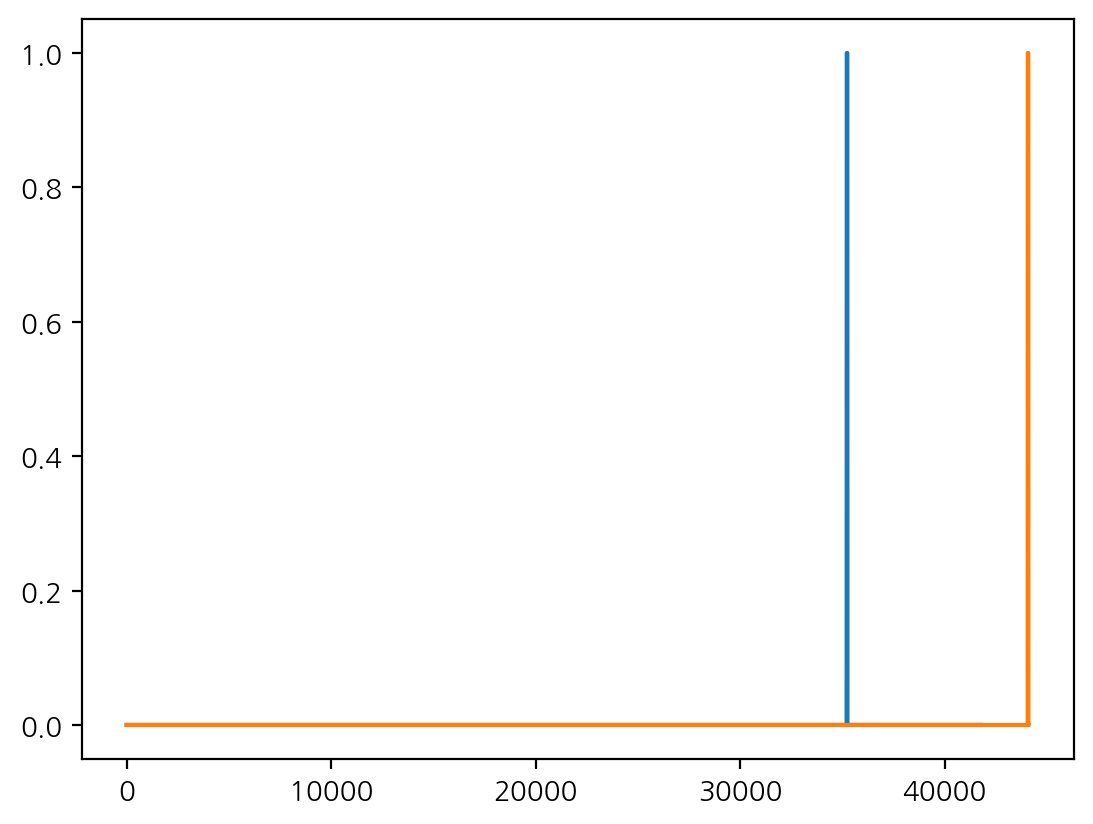

In [45]:
plt.plot(train_b[target])
plt.plot(train_a[target])

plt.show()

In [ ]:
# 이걸 어케 알아..?

## target과의 상관계수

In [25]:
import scipy.stats as spst

def top_correlations(dataframe:pd.DataFrame, target, consider_pVal = False, only_strong = False):
    result = []
    # print(dataframe.columns)
    for i in dataframe.columns:
        if i==target or not pd.api.types.is_numeric_dtype(dataframe[i]):
            continue
        
        if dataframe[i].nunique() <= 1 or dataframe[target].nunique() <= 1:
            continue
        
        try:
            corr, p_val = spst.pearsonr(dataframe[target], dataframe[i])
        except Exception as e:
            print(f"Pearson 계산 중 오류 발생: {e}")
            continue   
        
        
        p_condition = True
        strong_condition = True
        
        if consider_pVal:
            p_condition = p_val < 0.05
            
        if only_strong:
            strong_condition = corr>0.1
        
        if p_condition and strong_condition:
            # print('im in!')
            result.append((corr, p_val, i))
    return sorted(result, reverse=True)

def scatterplot(dataframe:pd.DataFrame, x ,target):
    plt.figure(figsize=(12,4))
    # plt.title(target)
    plt.subplot(1,2,1)
    sns.scatterplot(data=dataframe, x=x,y=target)
    plt.xticks(rotation=45)
    # sns.lineplot(data=dataframe, x=x,y=target)
    
    plt.subplot(1,2,2)
    sns.boxplot(x=target, data=data)
    plt.xticks(rotation=45)
    plt.show()
    
    sns.lmplot(data=dataframe, x=x,y=target)
    plt.show()


<Axes: >

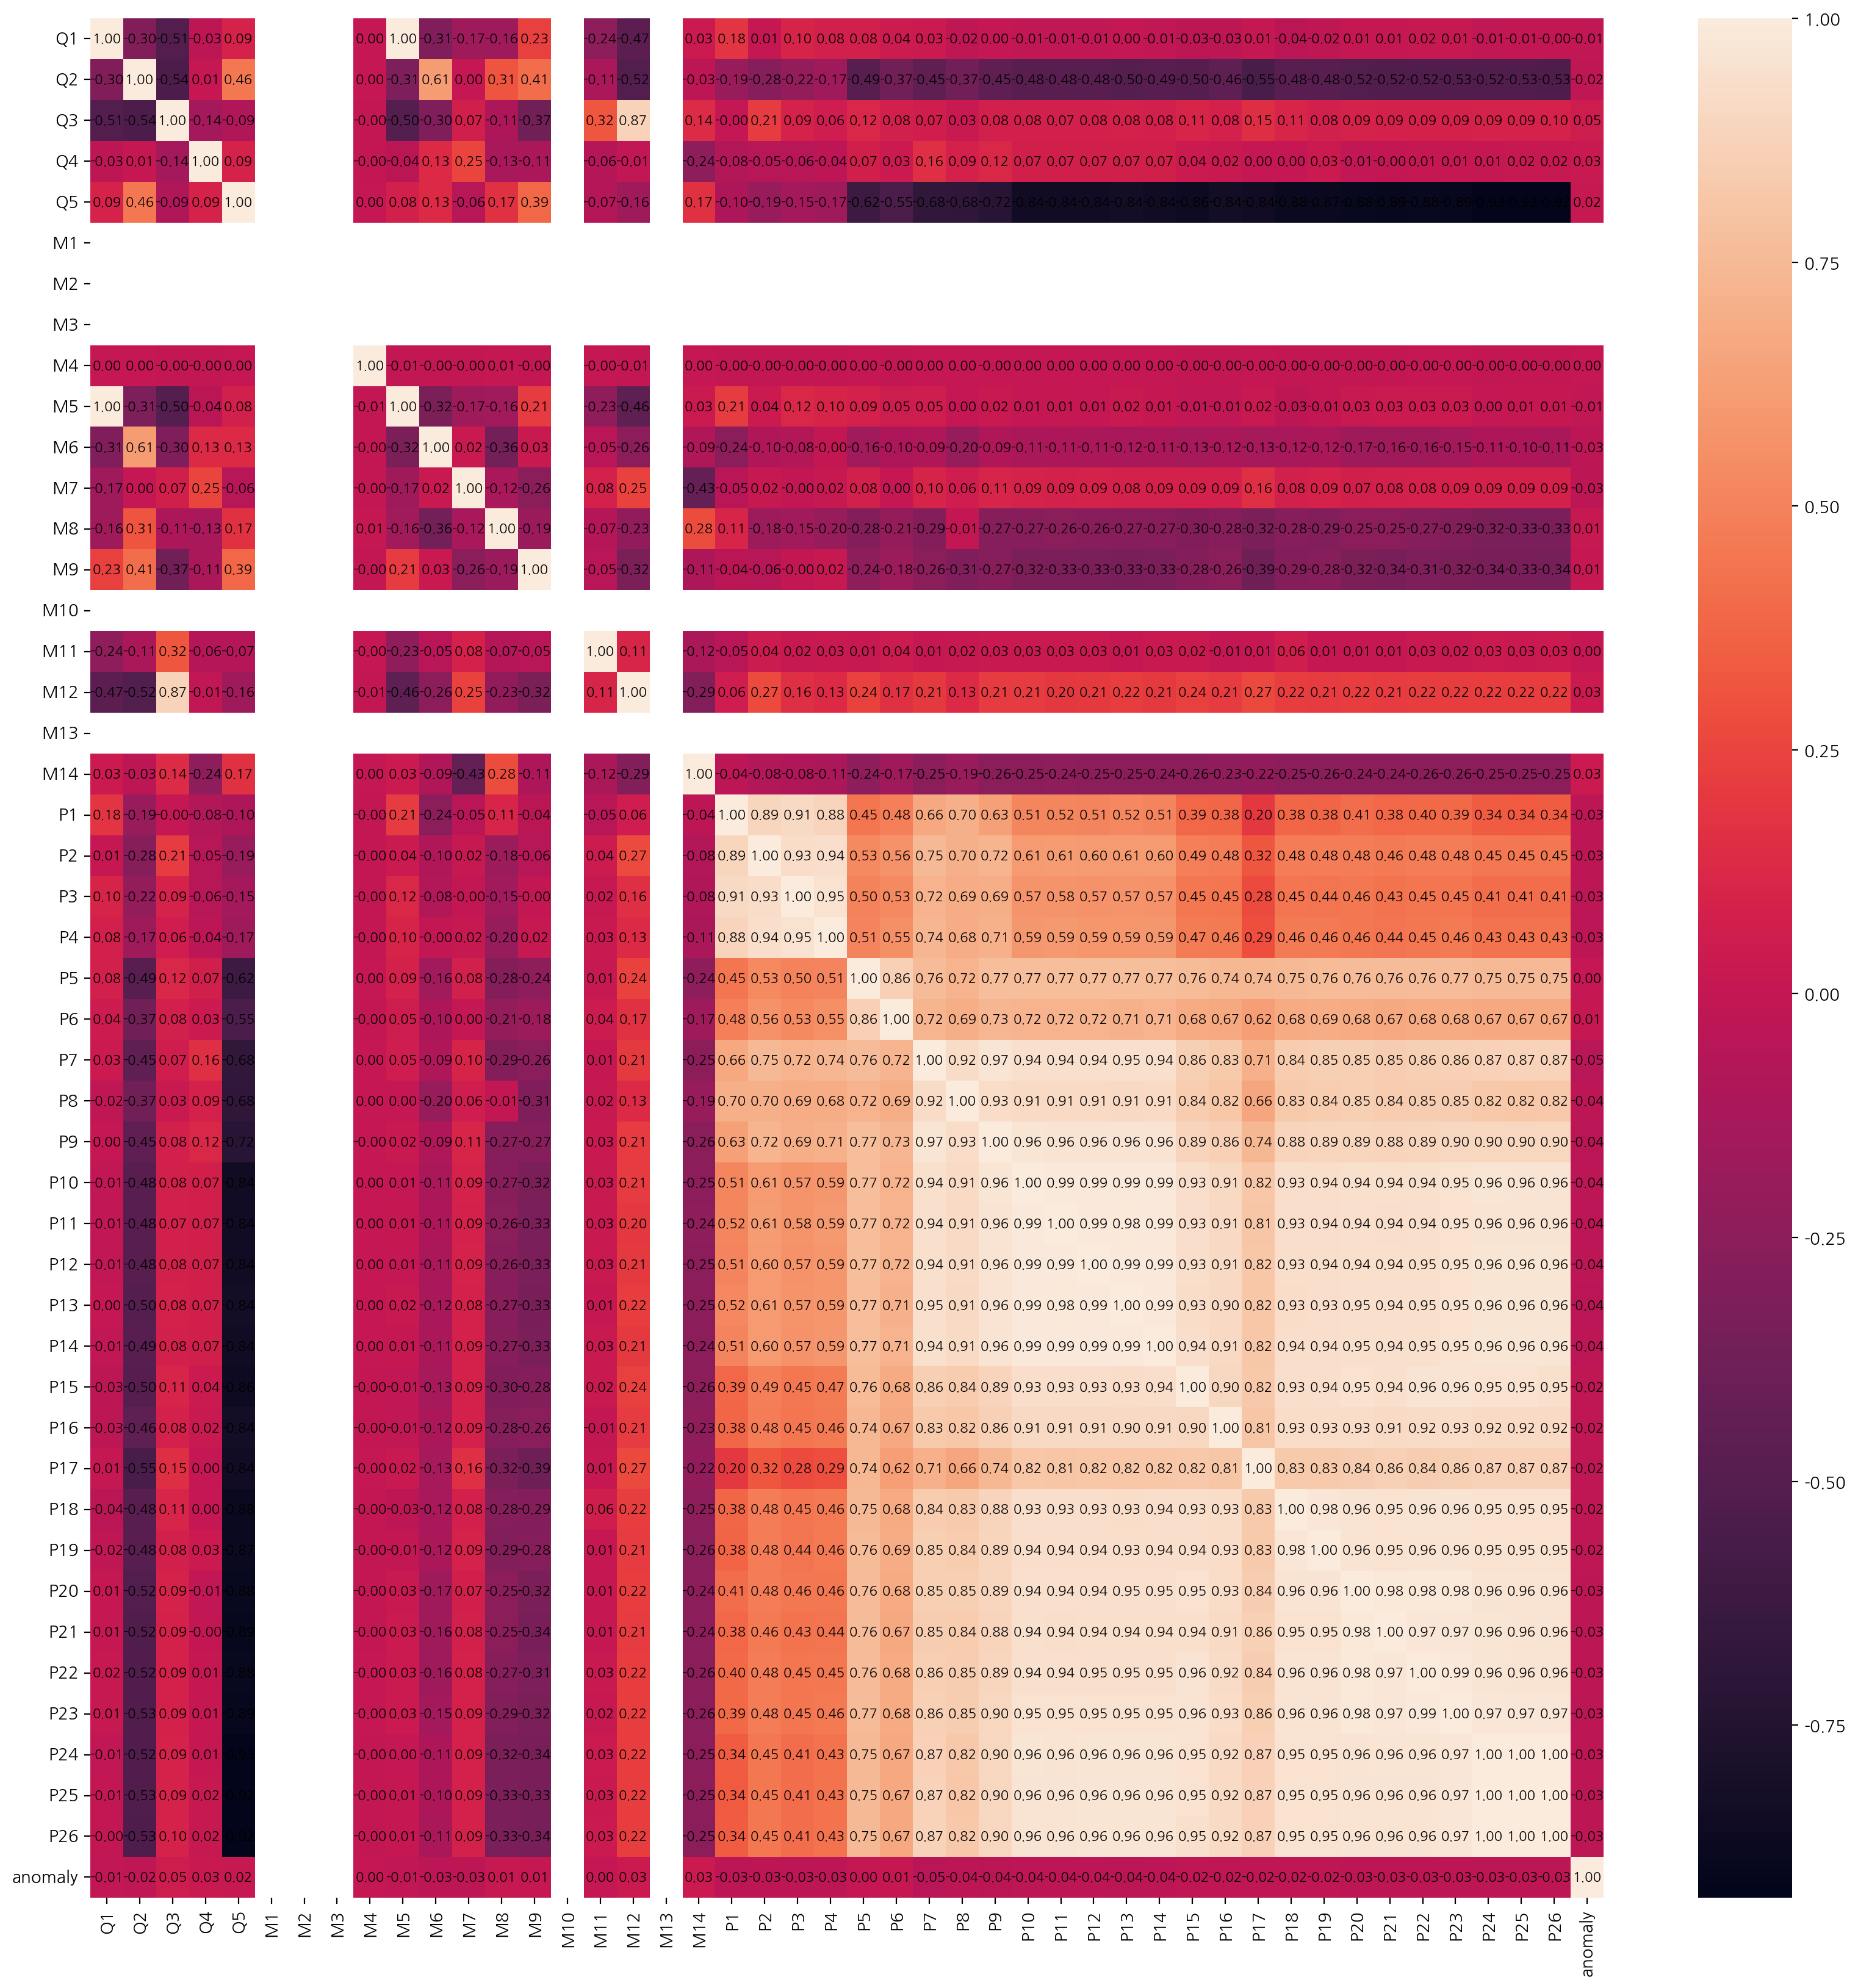

In [24]:
corr_matrix = train_a.corr(numeric_only=True)

plt.figure(figsize=(20, 20))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    fmt=".2f", 
    
    annot_kws={"size": 8, "color": "black"},
    cbar=True,
    xticklabels=corr_matrix.columns,
    yticklabels=corr_matrix.index
)

In [ ]:
# 그림으로 보면 모든 애들이 상관관계가 개떡임.
# rule based는 꿈도 못꿀듯

In [29]:
for i in top_correlations(train_a, target, True, False):
    try:
        print(f'{i[2]} , corr : {i[0]}, p-val : {i[1]}')
    except Exception as e:
        print(f'{i}는 상관분석 불가 \n{i}')

Q3 , corr : 0.048940255975810094, p-val : 8.36854755809133e-25
M12 , corr : 0.03243702732029501, p-val : 9.528372639509932e-12
M14 , corr : 0.029880471114950066, p-val : 3.4696234425559087e-10
Q4 , corr : 0.028566396669212953, p-val : 1.972377772204443e-09
Q5 , corr : 0.017600432610152667, p-val : 0.0002187521569033442
M8 , corr : 0.014262890002030128, p-val : 0.0027416757156779464
M9 , corr : 0.009740713128020164, p-val : 0.040799336513952615
Q1 , corr : -0.012709156346052214, p-val : 0.007608079734249197
M5 , corr : -0.014781715423534356, p-val : 0.0019074463949484866
P17 , corr : -0.016751142703122807, p-val : 0.00043493208000768864
Q2 , corr : -0.016916677772958515, p-val : 0.00038130468189849324
P18 , corr : -0.01872167082516159, p-val : 8.430217395317887e-05
P16 , corr : -0.020243969331344498, p-val : 2.122516310740272e-05
P19 , corr : -0.020695113718178258, p-val : 1.3841191996162851e-05
P15 , corr : -0.02197469919450187, p-val : 3.9278203709674835e-06
M7 , corr : -0.02587790218

In [ ]:
# 바로 lstm으로 들어가..?
# 파이프 구조를 좀 더 보고 싶은데.